<a href="https://colab.research.google.com/github/georgeothon/DataMaster/blob/main/Data_Master_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Master - Case

O objetivo do case é identificar clientes insatisfeitos, dessa forma, temos três tarefas para selecionar clientes para receber uma ação visando maximizar o lucro obtido.

[Santander Customer Satisfaction](https://www.kaggle.com/c/santander-customer-satisfaction/data?select=train.csv)

[Repositório Github]()

### Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

pd.options.display.max_columns = 999
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
seed = 346

### Leitura dos dados

In [3]:
file_path = '/content/drive/MyDrive/Data Master/Dados/train.csv'

train = pd.read_csv(file_path, index_col='ID')
train.head()

var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
ID                                                             
1      2     23                 0.0                      0.0   
3      2     34                 0.0                      0.0   
4      2     23                 0.0                      0.0   
8      2     37                 0.0                    195.0   
10     2     39                 0.0                      0.0   

    imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
ID                                                                              
1                       0.0                      0.0                      0.0   
3                       0.0                      0.0                      0.0   
4                       0.0                      0.0                      0.0   
8                     195.0                      0.0                      0.0   
10                      0.0                      0.0                      0.0   

    imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  imp_op_var40_ult1  \
ID                                                                        
1                       0.0                      0.0                0.0   
3                       0.0                      0.0                0.0   
4                       0.0                      0.0                0.0   
8                       0.0                      0.0                0.0   
10                      0.0                      0.0                0.0   

    imp_op_var41_comer_ult1  imp_op_var41_comer_ult3  imp_op_var41_efect_ult1  \
ID                                                                              
1                       0.0                      0.0                      0.0   
3                       0.0                      0.0                      0.0   
4                       0.0                      0.0                      0.0   
8                     195.0                    195.0                      0.0   
10                      0.0                      0.0                      0.0   

    imp_op_var41_efect_ult3  imp_op_var41_ult1  imp_op_var39_efect_ult1  \
ID                                                                        
1                       0.0                0.0                      0.0   
3                       0.0                0.0                      0.0   
4                       0.0                0.0                      0.0   
8                       0.0              195.0                      0.0   
10                      0.0                0.0                      0.0   

    imp_op_var39_efect_ult3  imp_op_var39_ult1  imp_sal_var16_ult1  \
ID                                                                   
1                       0.0                0.0                 0.0   
3                       0.0                0.0                 0.0   
4                       0.0                0.0                 0.0   
8                       0.0              195.0                 0.0   
10                      0.0                0.0                 0.0   

    ind_var1_0  ind_var1  ind_var2_0  ind_var2  ind_var5_0  ind_var5  \
ID                                                                     
1            0         0           0         0           1         0   
3            0         0           0         0           1         0   
4            0         0           0         0           1         1   
8            0         0           0         0           1         1   
10           0         0           0         0           1         0   

    ind_var6_0  ind_var6  ind_var8_0  ind_var8  ind_var12_0  ind_var12  \
ID                                                                       
1            0         0           0         0            0          0   
3            0         0           0         0            0          0   
4            0         0           0         0            0          0   
8

### Utils

Funções utilizadas para a análise exploratória.

#### Variáveis categóricas

In [4]:
def categorical_summary(col, df):
  """
  Calcula as estatísticas e plota um gráfico de barras
  """
  print('\n' + '='*120 + '\n\n')

  if df.shape == (0,0):
    return 'Data frame vazio!'

  df_aux = df[col]
  freq = df_aux.value_counts(sort=False)

  unique_values = freq.index
  n_unique = freq.shape[0]

  if n_unique == 1:
    try:
      print(col)
      print('Não existe variância!')
      #features.remove(col)
      low_var_feat.append(col)
    except:
      print(f'Variável {col} não está contida na variável features.')
      
  else:

    fig, axes = plt.subplots(figsize=(15,5))
    plt.bar(unique_values, freq.values)
    plt.ylabel('Frequência Absoluta')
    plt.xlabel(col)
    plt.title(f'Distribuição da variável {col}')
    plt.show()

    print(f'\n Quantidade de valores únicos: {n_unique}')
    print(f' Valores únicos: {unique_values}\n')

    display(freq)
    total = freq.sum()
    display(freq/total)

#### Variáveis numéricas

In [5]:
def numerical_summary(col, df, lower_limit=0.01, upper_limit=0.99, bins=50):
  """
  Calcula as estatísticas de distribuição e plota um boxplot e um histograma
  """
  print('\n' + '='*120 + '\n\n')

  if df.shape == (0,0):
    print(col)
    print('Dataframe vazio.')
    return

  if df[col].var() == 0:
    try:
      print(col)
      print('Não existe variância!')
      #features.remove(col)
      low_var_feat.append(col)
    except:
      print(f'Variável {col} não está contida na variável features.')
    return

  df_fil = df[(df[col] > df[col].quantile(lower_limit)) & (df[col] < df[col].quantile(upper_limit))]

  fig = plt.subplots(figsize=(15,10))

  plt.subplot(2,1,1)
  sns.boxplot(df[col])
  plt.title(f'Boxplot da variável {col}')
  plt.xlabel('')

  plt.subplot(2,1,2)
  sns.histplot(df_fil[col], bins=bins)
  plt.title(f'Distribuição da variável {col}')
  plt.show()

  df_summary = df[col].describe()
  display(df_summary)

## Análise Exploratória

In [6]:
nrow, ncol = train.shape
print(f'Para os dados de treino temos {nrow} observações e {ncol} colunas')

Para os dados de treino temos 76020 observações e 370 colunas


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76020 entries, 1 to 151838
Columns: 370 entries, var3 to TARGET
dtypes: float64(111), int64(259)
memory usage: 215.2 MB


In [8]:
train.dtypes.value_counts()

int64      259
float64    111
dtype: int64

O dataset é composto apenas por valores numéricos.

### Separação entre dados de treino e teste

Vamos separar os dados em um conjunto de treinamento para construção do modelo e um segundo conjunto para validar a performance dos modelos em dados não utilizados no treinamento. 

Divisão: 70% treino e 30% teste

In [9]:
df_train, df_test = train_test_split(train, test_size=.3, random_state=seed)

In [10]:
df_train.shape, df_test.shape

((53214, 370), (22806, 370))

In [11]:
features = df_train.columns.drop('TARGET').to_list()

Um cuidado que temos que tomar é evitar que o mesmo cliente esteja nos dados de treino e de testes (*Data Leakage*), logo, vamos verificar se algum `id`aparece nos dois conjuntos.

In [12]:
# Verifica se algum id de treina está contido na base de teste
df_train_id = list(set(df_train.index))
df_test_id = list(set(df_test.index))

len(df_train_id) + len(df_test_id) == len(set(df_train_id + df_test_id))

True

Partindo do pressuposto de que o `id` é único por pessoa, não temos nenhuma pessoas aparecendo nos dois conjuntos.



### Existem dados duplicados?

In [13]:
df_train.duplicated().sum()

3075

Temos 3075 observações duplicadas nos dados de treinamento.

Vamos observar algumas linhas que estão duplicadas.

In [14]:
df_train[df_train.duplicated()].head()

var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
ID                                                                 
113487     2     23                 0.0                      0.0   
77121      2     23                 0.0                      0.0   
45108      2     23                 0.0                      0.0   
29751      2     23                 0.0                      0.0   
73645      2     23                 0.0                      0.0   

        imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  \
ID                                                         
113487                      0.0                      0.0   
77121                       0.0                      0.0   
45108                       0.0                      0.0   
29751                       0.0                      0.0   
73645                       0.0                      0.0   

        imp_op_var40_comer_ult3  imp_op_var40_efect_ult1  \
ID                                                         
113487                      0.0                      0.0   
77121                       0.0                      0.0   
45108                       0.0                      0.0   
29751                       0.0                      0.0   
73645                       0.0                      0.0   

        imp_op_var40_efect_ult3  imp_op_var40_ult1  imp_op_var41_comer_ult1  \
ID                                                                            
113487                      0.0                0.0                      0.0   
77121                       0.0                0.0                      0.0   
45108                       0.0                0.0                      0.0   
29751                       0.0                0.0                      0.0   
73645                       0.0                0.0                      0.0   

        imp_op_var41_comer_ult3  imp_op_var41_efect_ult1  \
ID                                                         
113487                      0.0                      0.0   
77121                       0.0                      0.0   
45108                       0.0                      0.0   
29751                       0.0                      0.0   
73645                       0.0                      0.0   

        imp_op_var41_efect_ult3  imp_op_var41_ult1  imp_op_var39_efect_ult1  \
ID                                                                            
113487                      0.0                0.0                      0.0   
77121                       0.0                0.0                      0.0   
45108                       0.0                0.0                      0.0   
29751                       0.0                0.0                      0.0   
73645                       0.0                0.0                      0.0   

        imp_op_var39_efect_ult3  imp_op_var39_ult1  imp_sal_var16_ult1  \
ID                                                                       
113487                      0.0                0.0                 0.0   
77121                       0.0                0.0                 0.0   
45108                       0.0                0.0                 0.0   
29751                       0.0                0.0                 0.0   
73645                       0.0                0.0                 0.0   

        ind_var1_0  ind_var1  ind_var2_0  ind_var2  ind_var5_0  ind_var5  \
ID                                                                         
113487           0         0           0         0           1         0   
77121            0         0           0         0           1         0   
45108            0         0           0         0           1         0   
29751            0         0           0         0           1         0   
73645            0         0           0         0           1         0   

        ind_var6_0  ind_var6  ind_var8_0  ind_var8  ind_var12_0  ind_var12  \
ID                            

Como as variáveis são anonimizadas e temos muitos zeros, é possível que um mesmo cliente possa ser representado pelo mesmo vetor aletório que alguns outros.

A variável `id` também aparece em duplicidade?

In [15]:
df_train.index.duplicated().sum()

0

Cada observação tem seu própio `id`.

Existem dados iguais com valores diferentes para o target?

In [16]:
df_train[features].duplicated().sum()

3171

Temos mais de 100 clientes com *features* iguais, porém com target diferente.

In [17]:
df_aux = df_train[df_train[features].duplicated()] \
                                    .groupby(features) \
                                    .agg({'TARGET':['mean','count']})

# filtrando linhas que contém mesmas features e targets diferentes
df_aux[(df_aux['TARGET']['mean'] != 0) & (df_aux['TARGET']['mean'] != 1)].describe()

TARGET            
            mean       count
count  63.000000   63.000000
mean    0.226069   23.507937
std     0.139653   62.711802
min     0.024440    2.000000
25%     0.111111    6.500000
50%     0.200000   12.000000
75%     0.299233   18.500000
max     0.500000  491.000000

Temos apenas 63 casos (considerando os valores duplicados) com ao menos uma observação diferente, e dado a cardinalidade do conjunto de treinamento, é possível que não cause um impacto grande na performance do modelo. Podemos testar algumas abordagens para lidar com o problema.

Agora vamos explorar algumas estatísticas descritivas dos dados de treino.

In [18]:
df_train.describe()

var3         var15  imp_ent_var16_ult1  \
count   53214.000000  53214.000000        53214.000000   
mean    -1463.045138     33.226651           89.758809   
std     38257.860031     12.983755         1694.719341   
min   -999999.000000      5.000000            0.000000   
25%         2.000000     23.000000            0.000000   
50%         2.000000     28.000000            0.000000   
75%         2.000000     40.000000            0.000000   
max       235.000000    105.000000       210000.000000   

       imp_op_var39_comer_ult1  imp_op_var39_comer_ult3  \
count             53214.000000             53214.000000   
mean                 71.888849               118.524760   
std                 338.626051               541.468443   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max               12888.030000             21024.810000   

       imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
count             53214.000000             53214.000000   
mean                  3.191429                 6.020384   
std                  84.162122               146.578430   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max                8237.820000             11073.570000   

       imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  imp_op_var40_ult1  \
count             53214.000000             53214.000000       53214.000000   
mean                  0.472097                 0.636301           2.717256   
std                  35.011289                40.314602          80.872088   
min                   0.000000                 0.000000           0.000000   
25%                   0.000000                 0.000000           0.000000   
50%                   0.000000                 0.000000           0.000000   
75%                   0.000000                 0.000000           0.000000   
max                6600.000000              6600.000000        8237.820000   

       imp_op_var41_comer_ult1  imp_op_var41_comer_ult3  \
count             53214.000000             53214.000000   
mean                 68.697420               112.504376   
std                 322.665239               511.057375   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max               12888.030000             16566.810000   

       imp_op_var41_efect_ult1  imp_op_var41_efect_ult3  imp_op_var41_ult1  \
count             53214.000000             53214.000000       53214.000000   
mean                 68.702152               112.770960         137.868790   
std                 564.567710               879.657423         725.606884   
min                   0.000000                 0.000000           0.000000   
25%                   0.000000                 0.000000           0.000000   
50%                   0.000000                 0.000000           0.000000   
75%                   0.000000                 0.000000           0.000000   
max               45990.000000             96870.000000       47598.090000   

       imp_op_var39_efect_ult1  imp_op_var39_efect_ult3  imp_op_var39_ult1  \
count             53214.000000             53214.000000       53214.000000   
mean                 69.174249               113.407261         140.586046   
std                 568.483832               883.628481         738.334828   
min                   0.000000                 0.000000           0.000000   
25%                   0.000000                 0.000000           0.000000   
50%                   0

- Uma as primeiras coisas a se observar é que existem muitas variáveis com mais de 25% dos valores zerados, temos que considerar isso na escolha do modelo e fazer alguns testes para selecionar as variáveis mais importantes.

- Aparentemente, existem alguns prefixos para os nomes das variáveis e é valido investigar se eles trazer algumas informação.

### A variável resposta está balanceada?

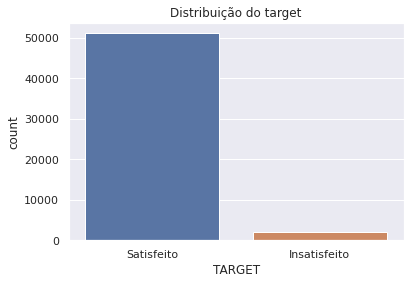

0    51155
1     2059
Name: TARGET, dtype: int64

0    0.961307
1    0.038693
Name: TARGET, dtype: float64

In [19]:
sns.countplot(data=df_train, x='TARGET')
plt.title('Distribuição do target')
plt.xticks([0,1],['Satisfeito', 'Insatisfeito'])
plt.show()

display(df_train['TARGET'].value_counts())
display(df_train['TARGET'].value_counts(normalize=True))

Temos um problema desbalanceado, ou seja, temos muito mais clientes satisfeitos do que insatisfeitos, é necessário utilizar métricas que lidem bem com dados desabalanceados.

### Existem valores marcados como nulos?

In [20]:
df_train.isnull().sum().sort_values()

var3                         0
imp_venta_var44_ult1         0
imp_venta_var44_hace3        0
imp_trasp_var33_out_ult1     0
imp_trasp_var33_out_hace3    0
                            ..
num_op_var40_hace2           0
num_var25                    0
num_var25_0                  0
num_op_var41_ult3            0
TARGET                       0
Length: 370, dtype: int64

Não temos valores marcados como faltantes no formato NaN. É necessario verificar se existem valores faltantes em outros formatos.

### Os dados são esparsos?

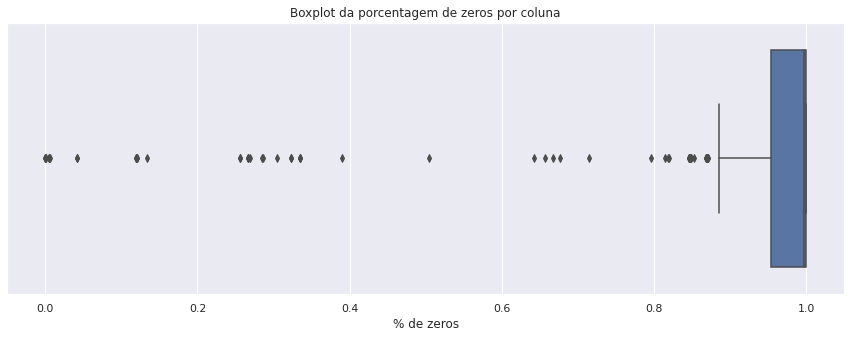

count    369.000000
mean       0.908958
std        0.224171
min        0.000000
25%        0.953659
50%        0.997106
75%        0.999944
max        1.000000
dtype: float64

In [21]:
zeros_by_col = (df_train[features] == 0).mean()

fig = plt.subplots(figsize=(15,5))
sns.boxplot(x=zeros_by_col)
plt.title('Boxplot da porcentagem de zeros por coluna')
plt.xlabel('% de zeros')
plt.show()

display(zeros_by_col.describe())

In [22]:
369-(zeros_by_col >= .8).sum()

36

333 das 369 da variáveis tem mais de 80% dos valores iguais a zero, vamos analisar primeiro as variáveis com menos de 80% dos valores iguais a zero.

In [23]:
zeros_by_col.sort_values().head(30)

var38                       0.000000
var15                       0.000000
var3                        0.000977
ind_var30_0                 0.004679
num_var30_0                 0.004679
var36                       0.005431
num_var42_0                 0.005995
num_var5_0                  0.042357
ind_var5_0                  0.042357
ind_var39_0                 0.118878
num_var39_0                 0.118878
ind_var41_0                 0.120419
num_var41_0                 0.120419
num_meses_var39_vig_ult3    0.133424
num_var4                    0.256079
num_var35                   0.256079
saldo_var30                 0.266133
ind_var30                   0.266133
num_var30                   0.266133
num_meses_var5_ult3         0.269741
saldo_var42                 0.285338
num_var42                   0.286804
saldo_medio_var5_hace2      0.305033
saldo_medio_var5_ult3       0.323223
saldo_medio_var5_ult1       0.323223
saldo_var5                  0.335213
ind_var5                    0.335213
n

In [24]:
df_train[zeros_by_col.sort_values().head(30).index].describe()

var38         var15           var3   ind_var30_0   num_var30_0  \
count  5.321400e+04  53214.000000   53214.000000  53214.000000  53214.000000   
mean   1.174082e+05     33.226651   -1463.045138      0.995321      3.370504   
std    1.867800e+05     12.983755   38257.860031      0.068245      1.268667   
min    5.163750e+03      5.000000 -999999.000000      0.000000      0.000000   
25%    6.794788e+04     23.000000       2.000000      1.000000      3.000000   
50%    1.061134e+05     28.000000       2.000000      1.000000      3.000000   
75%    1.185371e+05     40.000000       2.000000      1.000000      3.000000   
max    2.203474e+07    105.000000     235.000000      1.000000     24.000000   

              var36   num_var42_0    num_var5_0    ind_var5_0   ind_var39_0  \
count  53214.000000  53214.000000  53214.000000  53214.000000  53214.000000   
mean      40.376405      3.203461      2.892547      0.957643      0.881122   
std       47.347523      0.856582      0.659003      0.201405      0.323649   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      3.000000      3.000000      1.000000      1.000000   
50%        3.000000      3.000000      3.000000      1.000000      1.000000   
75%       99.000000      3.000000      3.000000      1.000000      1.000000   
max       99.000000     15.000000     15.000000      1.000000      1.000000   

        num_var39_0   ind_var41_0   num_var41_0  num_meses_var39_vig_ult3  \
count  53214.000000  53214.000000  53214.000000              53214.000000   
mean       2.725392      0.879581      2.699797                  1.594054   
std        1.139790      0.325454      1.106588                  0.719205   
min        0.000000      0.000000      0.000000                  0.000000   
25%        3.000000      1.000000      3.000000                  1.000000   
50%        3.000000      1.000000      3.000000                  2.000000   
75%        3.000000      1.000000      3.000000                  2.000000   
max       33.000000      1.000000     33.000000                  3.000000   

           num_var4     num_var35   saldo_var30     ind_var30     num_var30  \
count  53214.000000  53214.000000  5.321400e+04  53214.000000  53214.000000   
mean       1.081106      3.303698  1.365846e+04      0.733867      2.387924   
std        0.910395      2.871312  6.104655e+04      0.441939      1.639767   
min        0.000000      0.000000 -4.942260e+03      0.000000      0.000000   
25%        0.000000      0.000000  0.000000e+00      0.000000      0.000000   
50%        1.000000      3.000000  3.000000e+00      1.000000      3.000000   
75%        1.000000      3.000000  2.409675e+02      1.000000      3.000000   
max        7.000000     36.000000  2.835348e+06      1.000000     21.000000   

       num_meses_var5_ult3   saldo_var42     num_var42  \
count         53214.000000  5.321400e+04  53214.000000   
mean              1.982148  7.158061e+03      2.223531   
std               1.298576  4.786330e+04      1.496782   
min               0.000000 -4.942260e+03      0.000000   
25%               0.000000  0.000000e+00      0.000000   
50%               3.000000  3.000000e+00      3.000000   
75%               3.000000  1.200000e+02      3.000000   
max               3.000000  2.835348e+06     15.000000   

       saldo_medio_var5_hace2  saldo_medio_var5_ult3  saldo_medio_var5_ult1  \
count            53214.000000           53214.000000           53214.000000   
mean              1572.493515            1054.379049            1088.899443   
std              11500.407099            7721.713533            9603.361364   
min                -52.740000            -173.640000            -733.050000   
25%                  0.000000               0.000000               0.000000   
50%                  3.000000               2.730000               3.000000   
75%                 90.000000              83.790000              90.000000   
max             7511

Na coluna var3 o valor -999999 pode indicar missing. 

In [25]:
(df_train['var3'] == df_train['var3'].min()).mean()

0.0014657796820385612

Temos apenas 0.1% dos valores marcados como -999999 na variável `var3`.

### O nome as variáveis traz alguma informação?

In [26]:
features

['var3',
 'var15',
 'imp_ent_var16_ult1',
 'imp_op_var39_comer_ult1',
 'imp_op_var39_comer_ult3',
 'imp_op_var40_comer_ult1',
 'imp_op_var40_comer_ult3',
 'imp_op_var40_efect_ult1',
 'imp_op_var40_efect_ult3',
 'imp_op_var40_ult1',
 'imp_op_var41_comer_ult1',
 'imp_op_var41_comer_ult3',
 'imp_op_var41_efect_ult1',
 'imp_op_var41_efect_ult3',
 'imp_op_var41_ult1',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_sal_var16_ult1',
 'ind_var1_0',
 'ind_var1',
 'ind_var2_0',
 'ind_var2',
 'ind_var5_0',
 'ind_var5',
 'ind_var6_0',
 'ind_var6',
 'ind_var8_0',
 'ind_var8',
 'ind_var12_0',
 'ind_var12',
 'ind_var13_0',
 'ind_var13_corto_0',
 'ind_var13_corto',
 'ind_var13_largo_0',
 'ind_var13_largo',
 'ind_var13_medio_0',
 'ind_var13_medio',
 'ind_var13',
 'ind_var14_0',
 'ind_var14',
 'ind_var17_0',
 'ind_var17',
 'ind_var18_0',
 'ind_var18',
 'ind_var19',
 'ind_var20_0',
 'ind_var20',
 'ind_var24_0',
 'ind_var24',
 'ind_var25_cte',
 'ind_var26_0',
 'ind_var

### Hipóteses sobre o tipo das variáveis


Observando os nomes das variáveis e os dados chegamos a algumas hipóteses:


- Variáveis com prefixo `imp` podem ser contínuas
- Variáveis com prefixo `ind` podem ser binarias
- Variáveis com prefixo `num` podem ser categóricas (cadinalidade maior que 2)
- Variáveis com prefixo `saldo`, `delta` e `var` podem ser contínuas

#### Prefixo das variáveis

In [27]:
prefix_array = np.array(list(map(lambda x: (x[:3], x), features)))
prefix_array[:10,:]

array([['var', 'var3'],
       ['var', 'var15'],
       ['imp', 'imp_ent_var16_ult1'],
       ['imp', 'imp_op_var39_comer_ult1'],
       ['imp', 'imp_op_var39_comer_ult3'],
       ['imp', 'imp_op_var40_comer_ult1'],
       ['imp', 'imp_op_var40_comer_ult3'],
       ['imp', 'imp_op_var40_efect_ult1'],
       ['imp', 'imp_op_var40_efect_ult3'],
       ['imp', 'imp_op_var40_ult1']], dtype='<U29')

In [28]:
np.unique(prefix_array[:,0])

array(['del', 'imp', 'ind', 'num', 'sal', 'var'], dtype='<U29')

Temos 6 prefixos diferentes para as variáveis:

  `delta`, `imp`, `ind`, `num`, `saldo` e `var`

E abaixo temos a distribuição dos prefixos.

In [29]:
pd.DataFrame(prefix_array, columns=['Prefix', 'Var'])['Prefix'].value_counts(normalize=True)

num    0.387534
ind    0.203252
sal    0.192412
imp    0.132791
del    0.070461
var    0.013550
Name: Prefix, dtype: float64

In [30]:
num_features = prefix_array[prefix_array[:,0] == 'num', 1].tolist() 
ind_features = prefix_array[prefix_array[:,0] == 'ind', 1].tolist()
saldo_features = prefix_array[prefix_array[:,0] == 'sal', 1].tolist()
imp_features = prefix_array[prefix_array[:,0] == 'imp', 1].tolist()
delta_features = prefix_array[prefix_array[:,0] == 'del', 1].tolist()
var_features = prefix_array[prefix_array[:,0] == 'var', 1].tolist() 

#### Prefixo `ind`



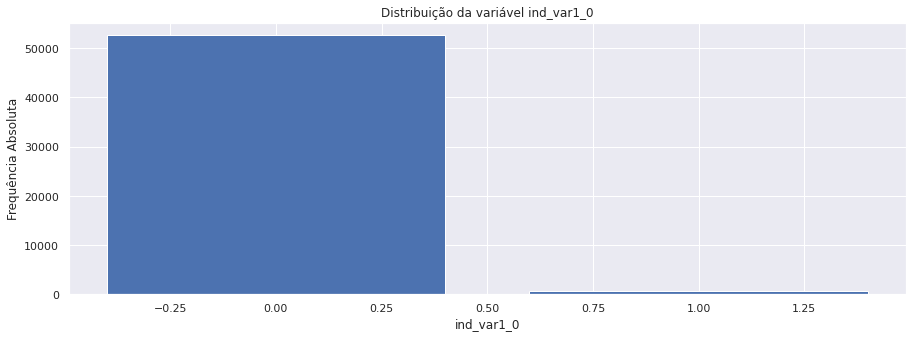


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    52604
1      610
Name: ind_var1_0, dtype: int64

0    0.988537
1    0.011463
Name: ind_var1_0, dtype: float64

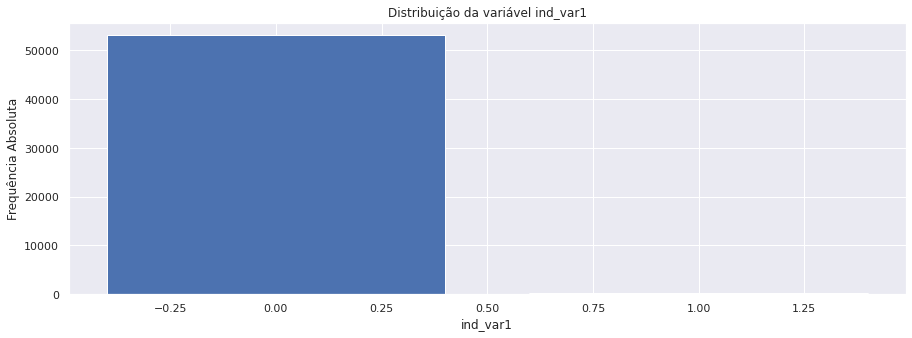


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    53019
1      195
Name: ind_var1, dtype: int64

0    0.996336
1    0.003664
Name: ind_var1, dtype: float64




ind_var2_0
Não existe variância!
Variável ind_var2_0 não está contida na variável features.



ind_var2
Não existe variância!
Variável ind_var2 não está contida na variável features.





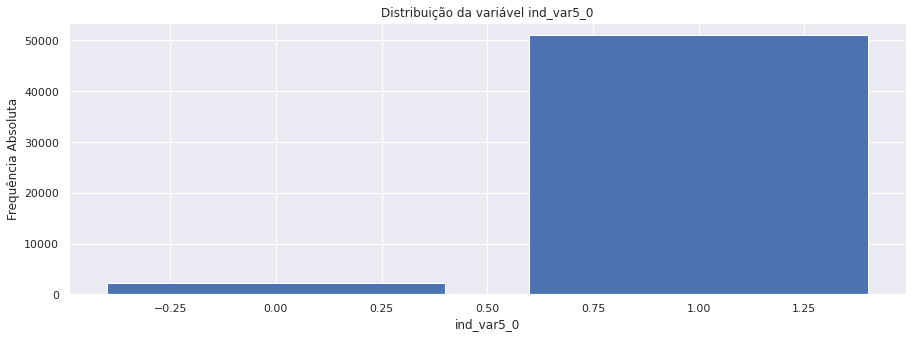


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0     2254
1    50960
Name: ind_var5_0, dtype: int64

0    0.042357
1    0.957643
Name: ind_var5_0, dtype: float64

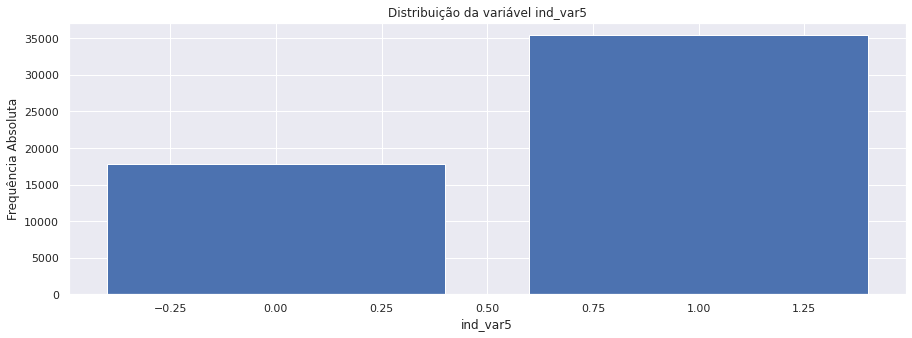


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    17838
1    35376
Name: ind_var5, dtype: int64

0    0.335213
1    0.664787
Name: ind_var5, dtype: float64

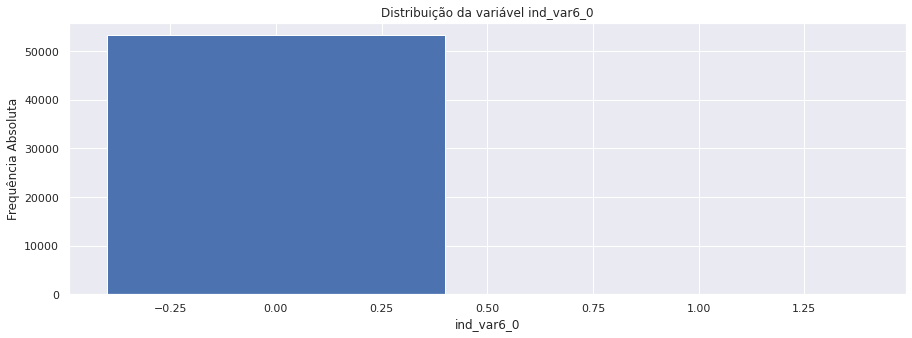


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    53208
1        6
Name: ind_var6_0, dtype: int64

0    0.999887
1    0.000113
Name: ind_var6_0, dtype: float64

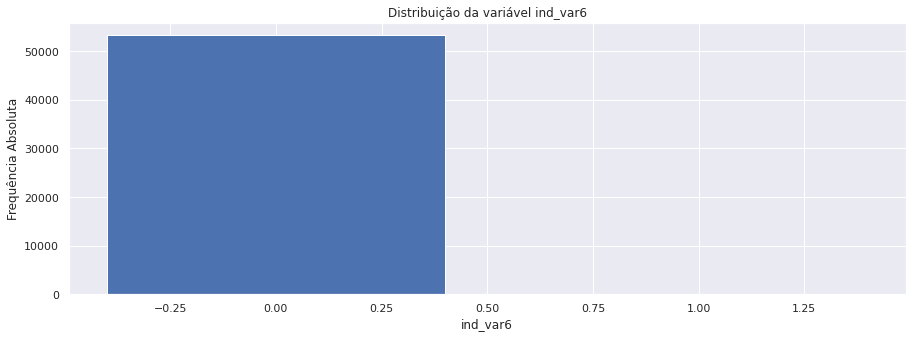


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    53212
1        2
Name: ind_var6, dtype: int64

0    0.999962
1    0.000038
Name: ind_var6, dtype: float64

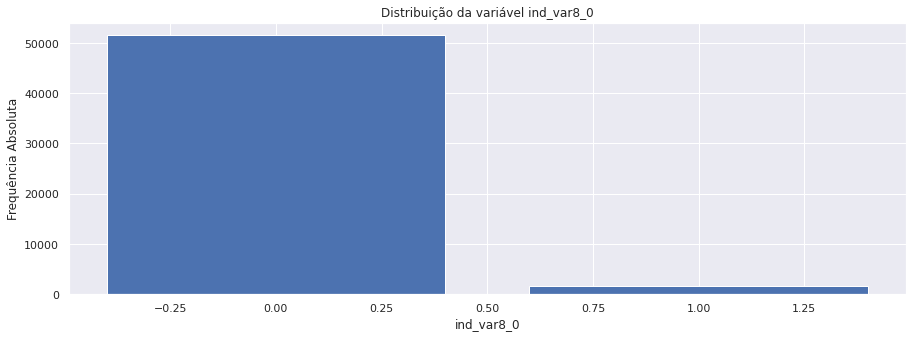


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    51466
1     1748
Name: ind_var8_0, dtype: int64

0    0.967152
1    0.032848
Name: ind_var8_0, dtype: float64

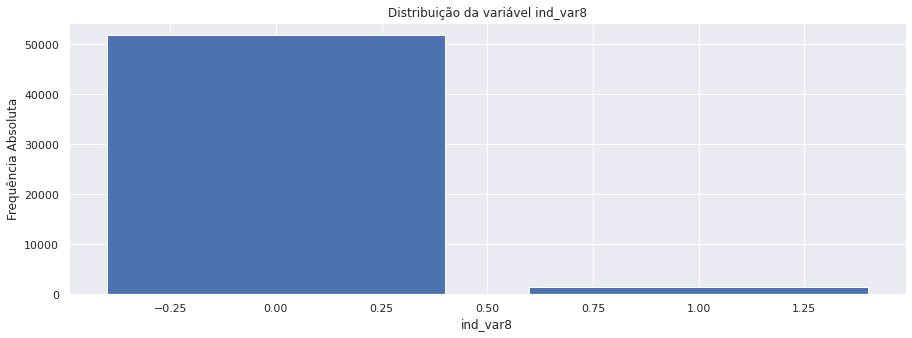


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    51688
1     1526
Name: ind_var8, dtype: int64

0    0.971323
1    0.028677
Name: ind_var8, dtype: float64

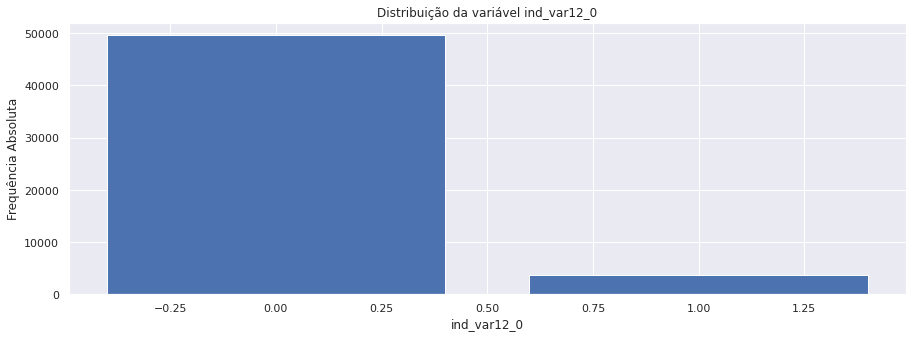


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    49575
1     3639
Name: ind_var12_0, dtype: int64

0    0.931616
1    0.068384
Name: ind_var12_0, dtype: float64

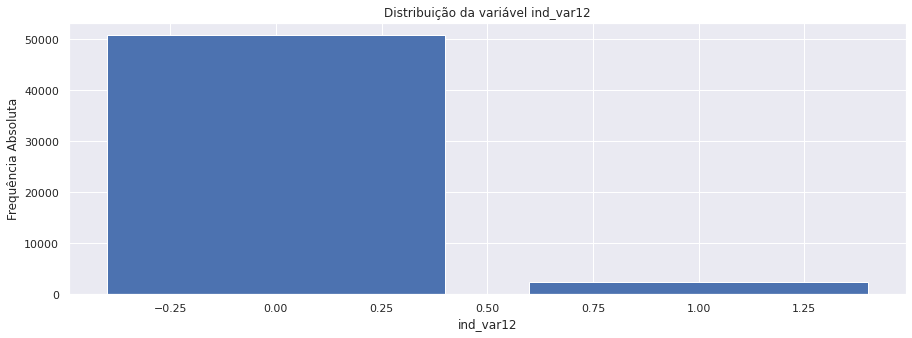


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    50748
1     2466
Name: ind_var12, dtype: int64

0    0.953659
1    0.046341
Name: ind_var12, dtype: float64

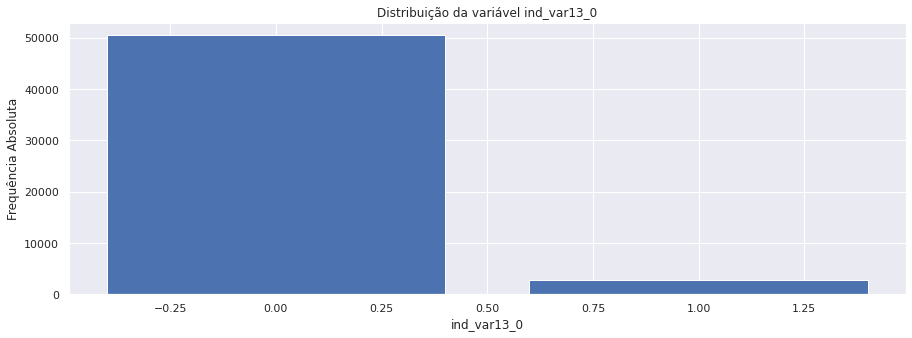


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    50432
1     2782
Name: ind_var13_0, dtype: int64

0    0.947721
1    0.052279
Name: ind_var13_0, dtype: float64

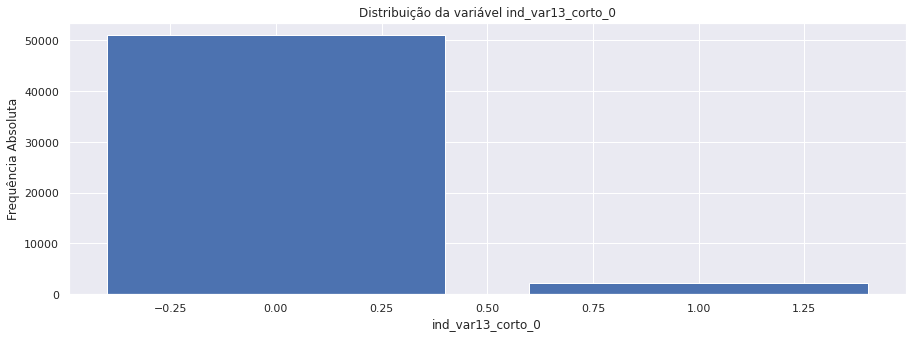


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    50936
1     2278
Name: ind_var13_corto_0, dtype: int64

0    0.957192
1    0.042808
Name: ind_var13_corto_0, dtype: float64

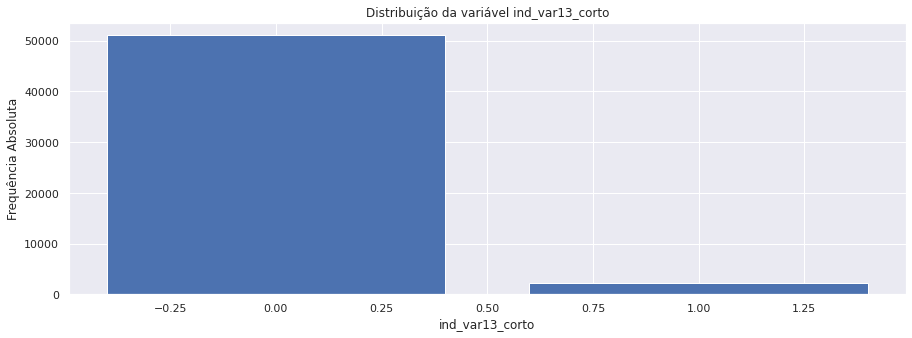


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    51011
1     2203
Name: ind_var13_corto, dtype: int64

0    0.958601
1    0.041399
Name: ind_var13_corto, dtype: float64

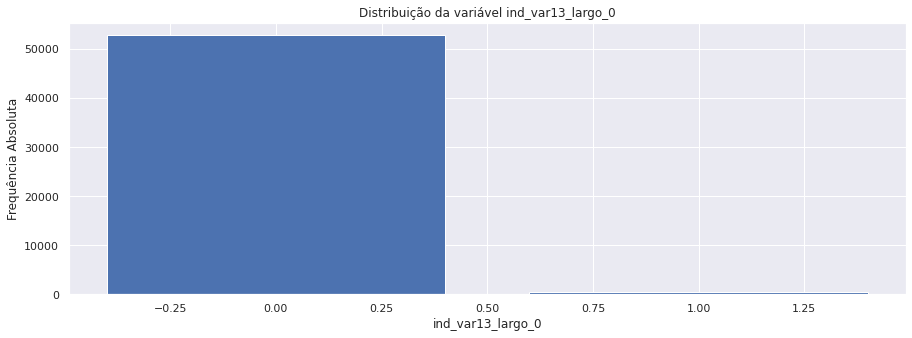


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    52671
1      543
Name: ind_var13_largo_0, dtype: int64

0    0.989796
1    0.010204
Name: ind_var13_largo_0, dtype: float64

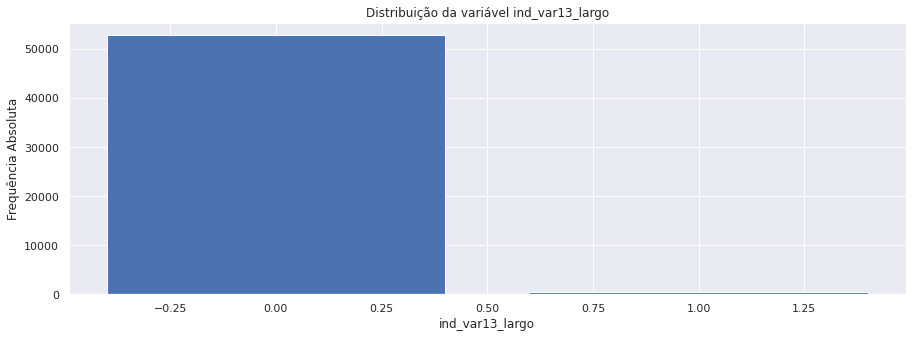


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    52680
1      534
Name: ind_var13_largo, dtype: int64

0    0.989965
1    0.010035
Name: ind_var13_largo, dtype: float64

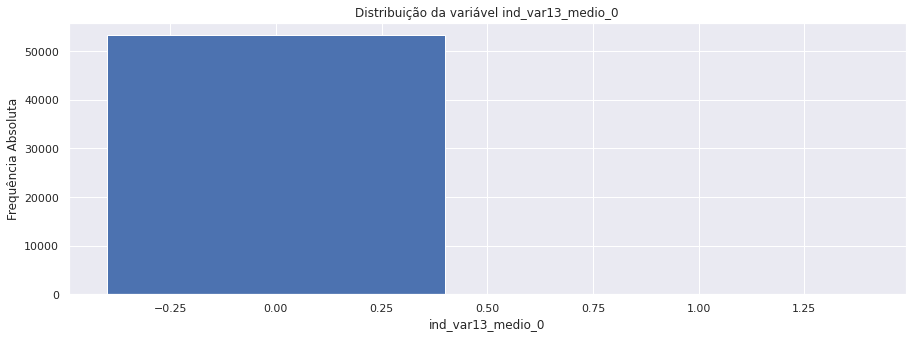


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    53212
1        2
Name: ind_var13_medio_0, dtype: int64

0    0.999962
1    0.000038
Name: ind_var13_medio_0, dtype: float64

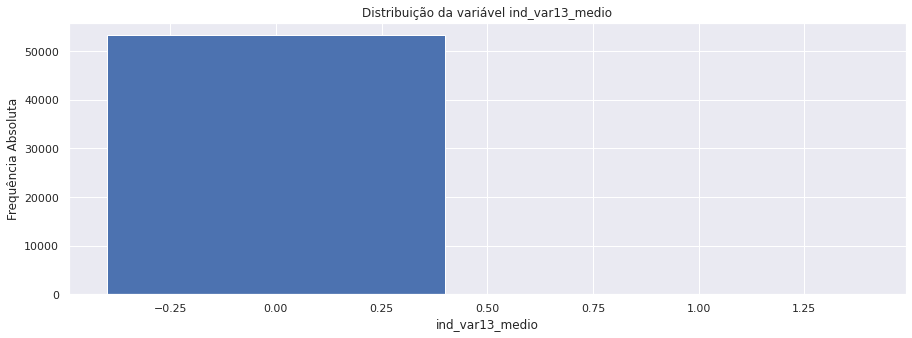


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    53212
1        2
Name: ind_var13_medio, dtype: int64

0    0.999962
1    0.000038
Name: ind_var13_medio, dtype: float64

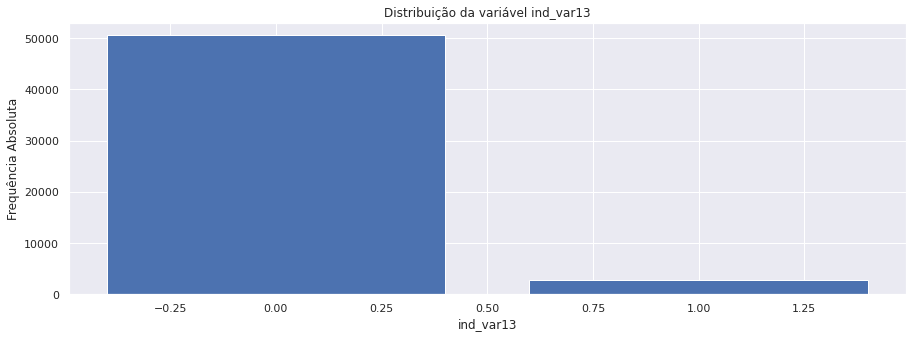


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    50505
1     2709
Name: ind_var13, dtype: int64

0    0.949092
1    0.050908
Name: ind_var13, dtype: float64

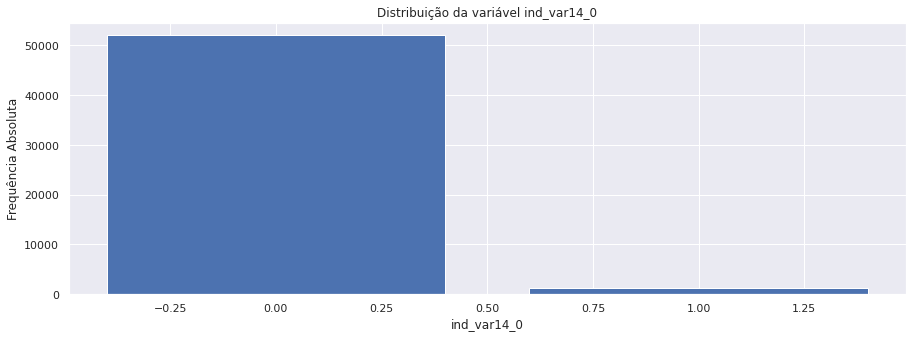


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    51959
1     1255
Name: ind_var14_0, dtype: int64

0    0.976416
1    0.023584
Name: ind_var14_0, dtype: float64

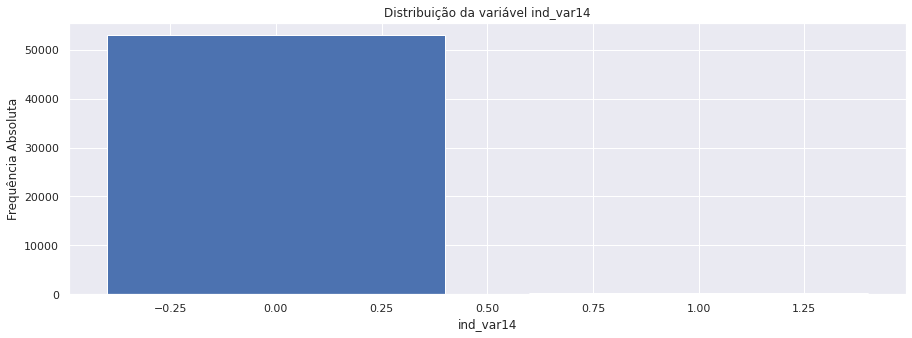


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    52931
1      283
Name: ind_var14, dtype: int64

0    0.994682
1    0.005318
Name: ind_var14, dtype: float64

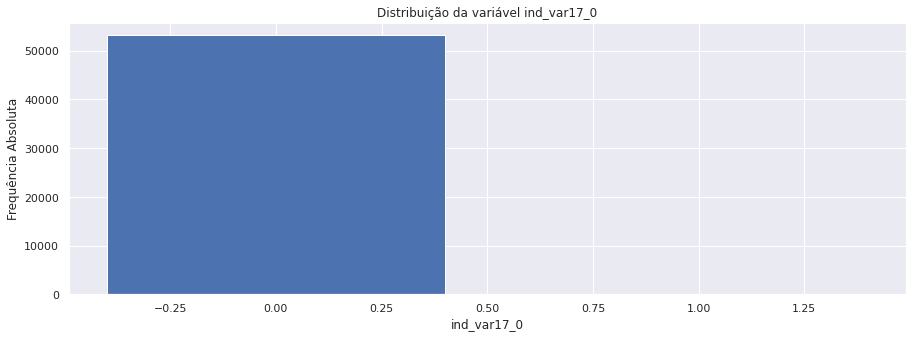


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    53111
1      103
Name: ind_var17_0, dtype: int64

0    0.998064
1    0.001936
Name: ind_var17_0, dtype: float64

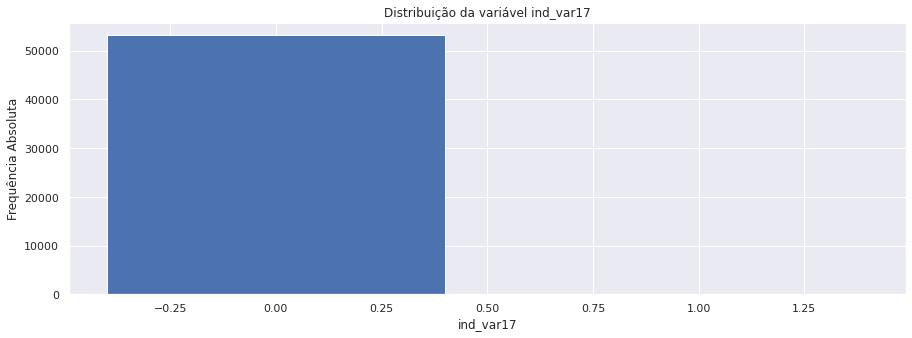


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    53134
1       80
Name: ind_var17, dtype: int64

0    0.998497
1    0.001503
Name: ind_var17, dtype: float64

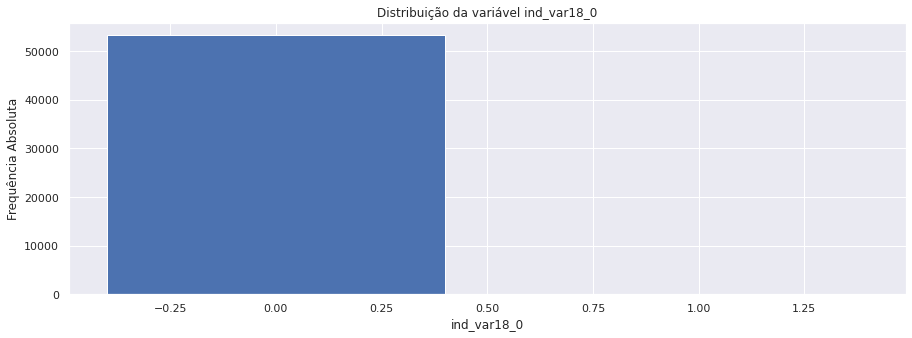


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    53213
1        1
Name: ind_var18_0, dtype: int64

0    0.999981
1    0.000019
Name: ind_var18_0, dtype: float64

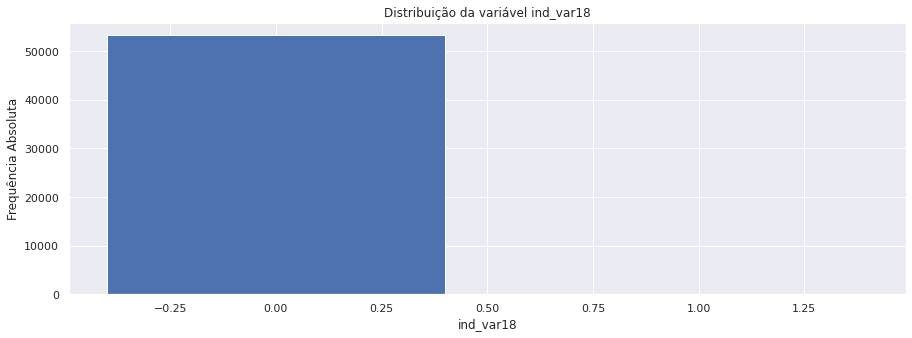


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    53213
1        1
Name: ind_var18, dtype: int64

0    0.999981
1    0.000019
Name: ind_var18, dtype: float64

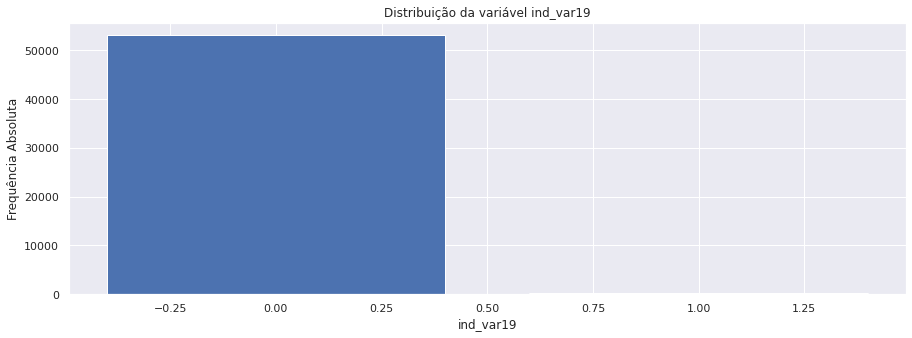


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    52983
1      231
Name: ind_var19, dtype: int64

0    0.995659
1    0.004341
Name: ind_var19, dtype: float64

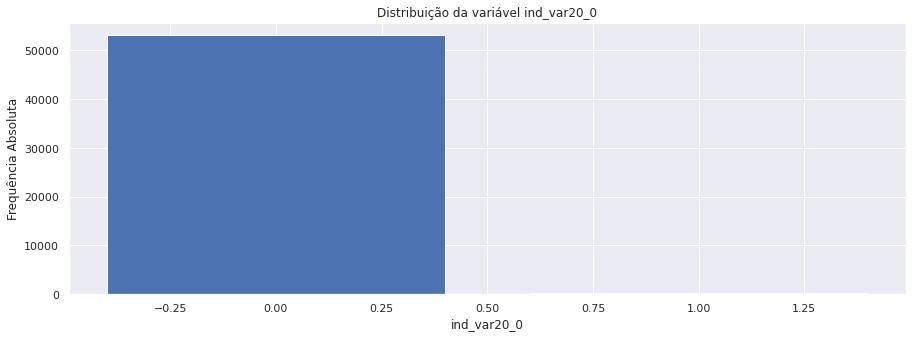


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    53018
1      196
Name: ind_var20_0, dtype: int64

0    0.996317
1    0.003683
Name: ind_var20_0, dtype: float64

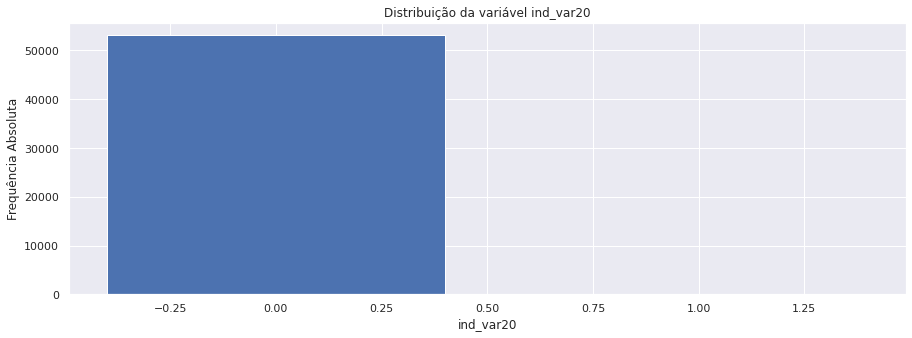


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    53067
1      147
Name: ind_var20, dtype: int64

0    0.997238
1    0.002762
Name: ind_var20, dtype: float64

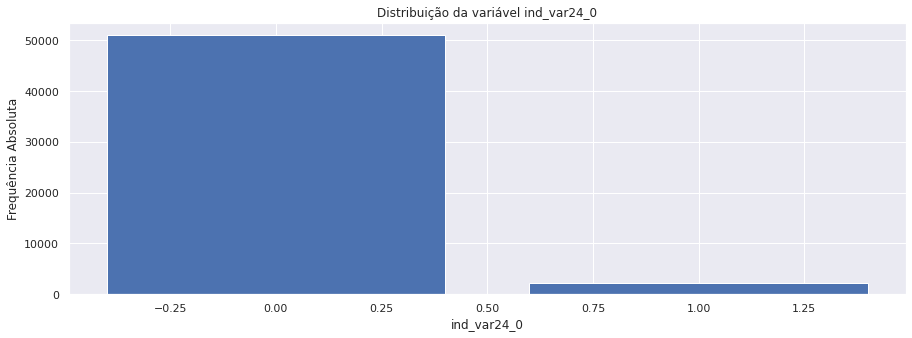


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    50915
1     2299
Name: ind_var24_0, dtype: int64

0    0.956797
1    0.043203
Name: ind_var24_0, dtype: float64

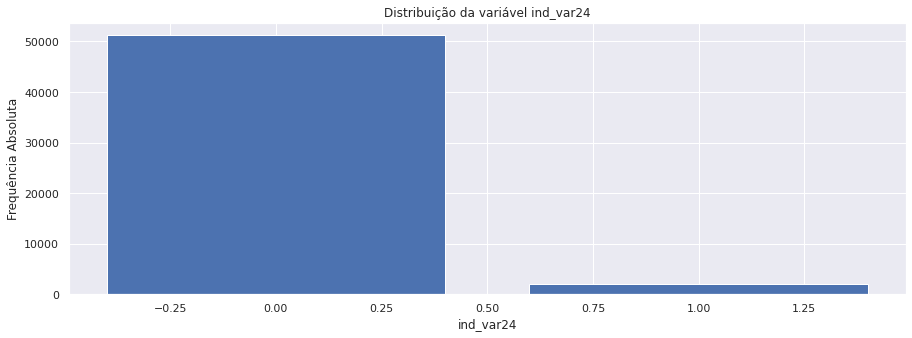


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    51160
1     2054
Name: ind_var24, dtype: int64

0    0.961401
1    0.038599
Name: ind_var24, dtype: float64

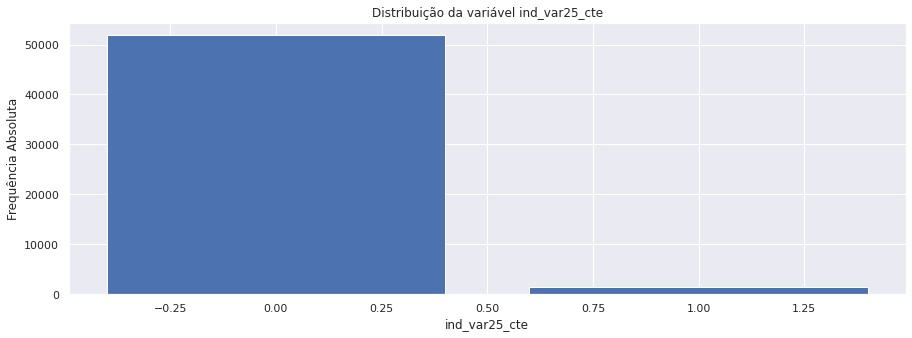


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    51823
1     1391
Name: ind_var25_cte, dtype: int64

0    0.97386
1    0.02614
Name: ind_var25_cte, dtype: float64

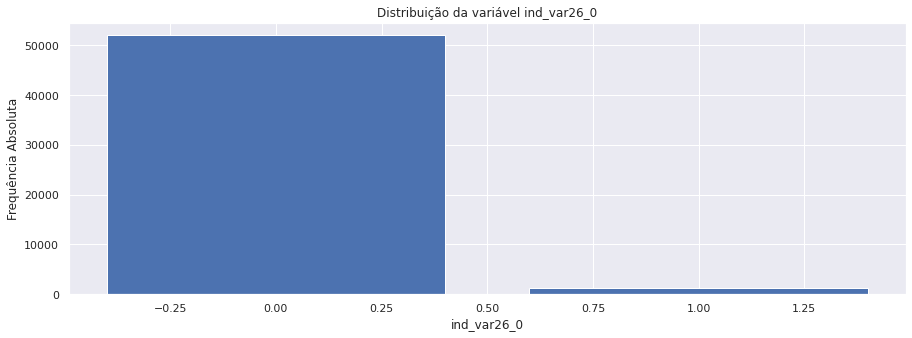


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    51922
1     1292
Name: ind_var26_0, dtype: int64

0    0.975721
1    0.024279
Name: ind_var26_0, dtype: float64

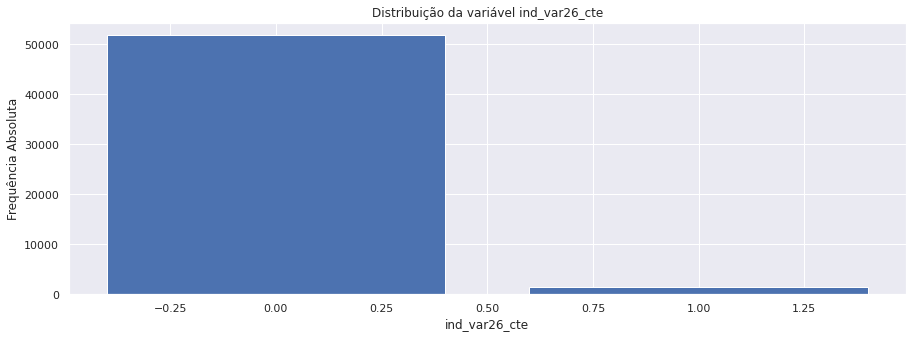


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    51765
1     1449
Name: ind_var26_cte, dtype: int64

0    0.97277
1    0.02723
Name: ind_var26_cte, dtype: float64

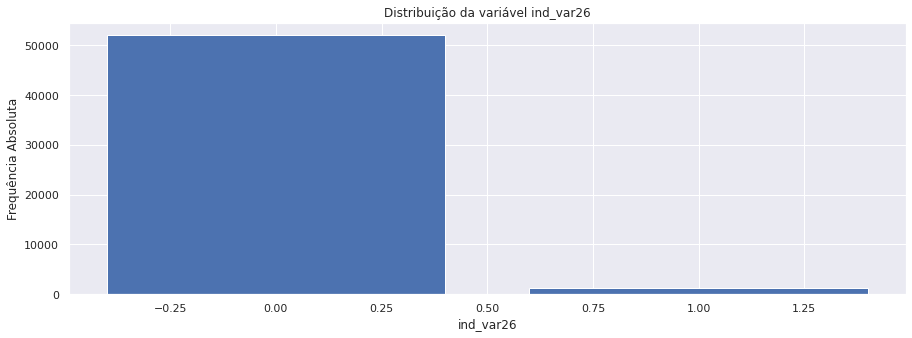


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    51922
1     1292
Name: ind_var26, dtype: int64

0    0.975721
1    0.024279
Name: ind_var26, dtype: float64

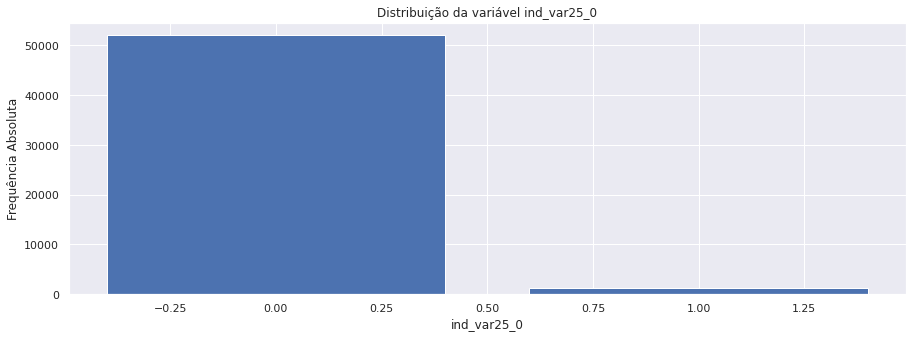


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    51972
1     1242
Name: ind_var25_0, dtype: int64

0    0.97666
1    0.02334
Name: ind_var25_0, dtype: float64

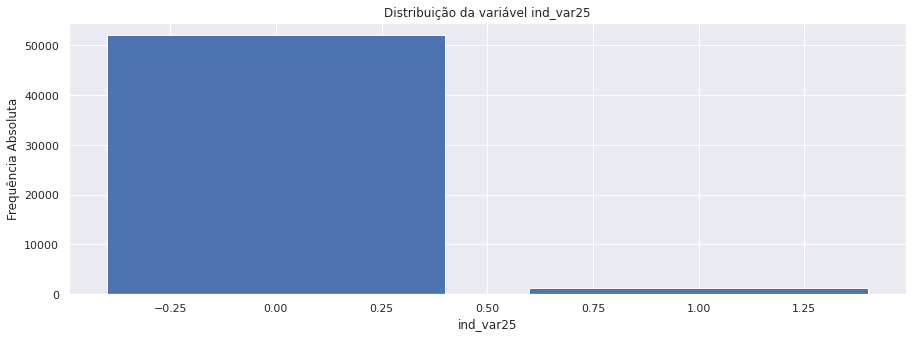


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    51972
1     1242
Name: ind_var25, dtype: int64

0    0.97666
1    0.02334
Name: ind_var25, dtype: float64




ind_var27_0
Não existe variância!
Variável ind_var27_0 não está contida na variável features.



ind_var28_0
Não existe variância!
Variável ind_var28_0 não está contida na variável features.



ind_var28
Não existe variância!
Variável ind_var28 não está contida na variável features.



ind_var27
Não existe variância!
Variável ind_var27 não está contida na variável features.





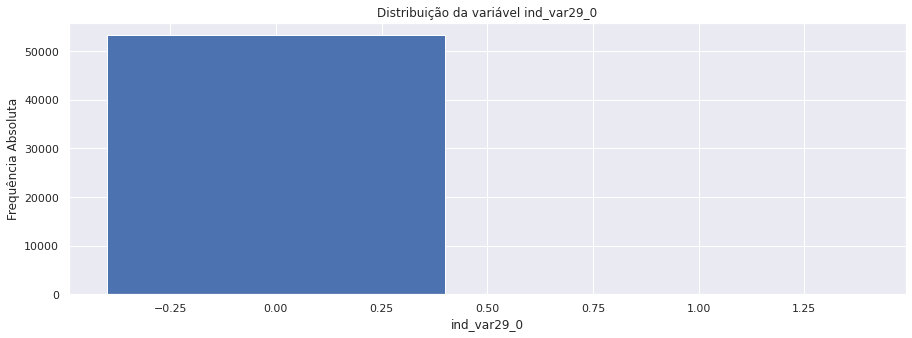


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    53208
1        6
Name: ind_var29_0, dtype: int64

0    0.999887
1    0.000113
Name: ind_var29_0, dtype: float64

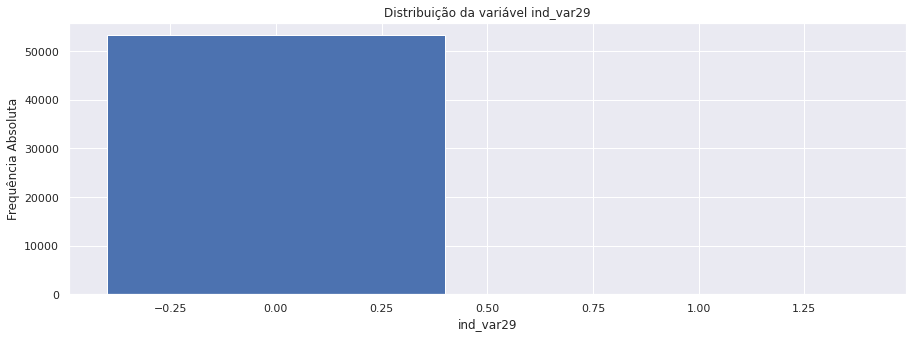


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    53212
1        2
Name: ind_var29, dtype: int64

0    0.999962
1    0.000038
Name: ind_var29, dtype: float64

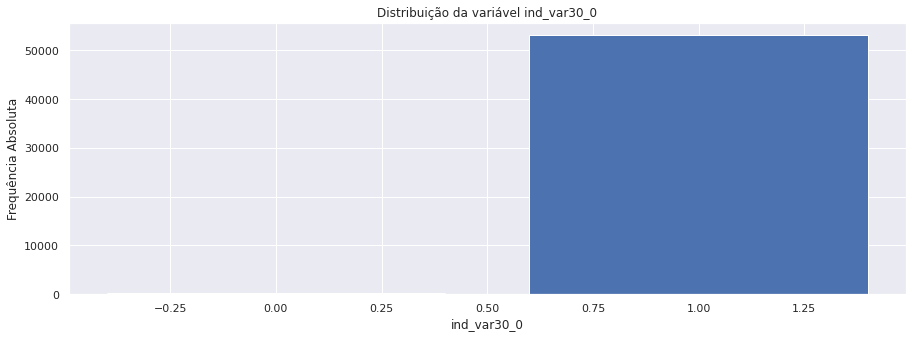


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0      249
1    52965
Name: ind_var30_0, dtype: int64

0    0.004679
1    0.995321
Name: ind_var30_0, dtype: float64

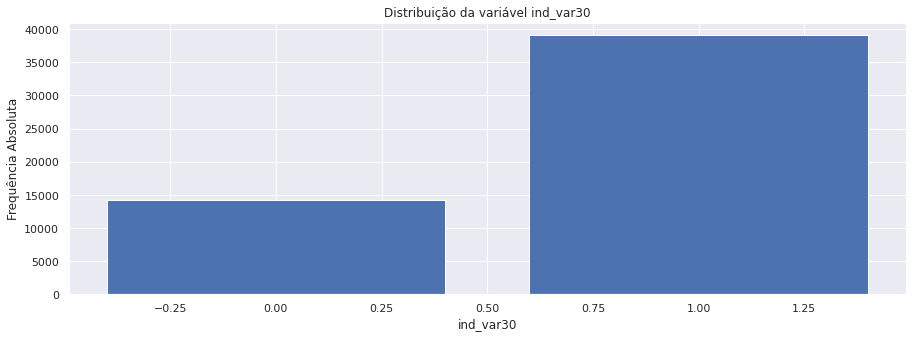


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    14162
1    39052
Name: ind_var30, dtype: int64

0    0.266133
1    0.733867
Name: ind_var30, dtype: float64

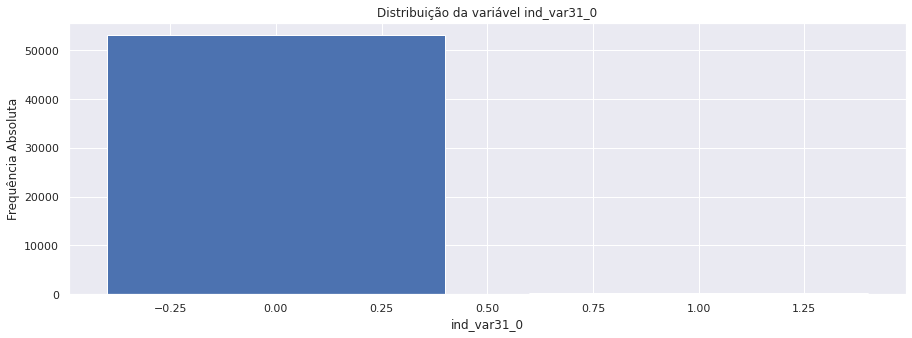


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    52978
1      236
Name: ind_var31_0, dtype: int64

0    0.995565
1    0.004435
Name: ind_var31_0, dtype: float64

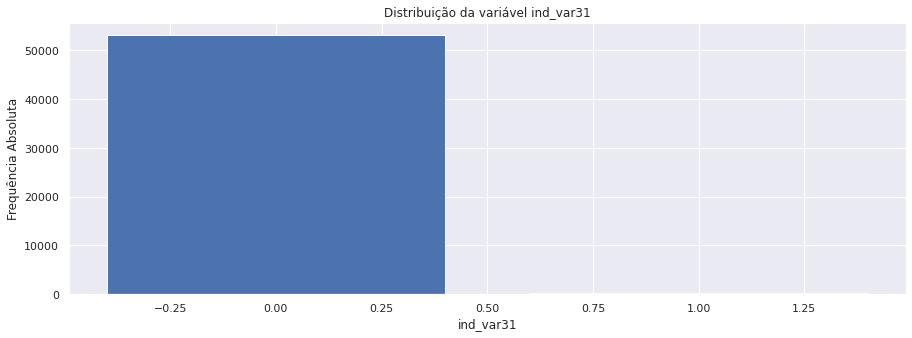


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    53018
1      196
Name: ind_var31, dtype: int64

0    0.996317
1    0.003683
Name: ind_var31, dtype: float64

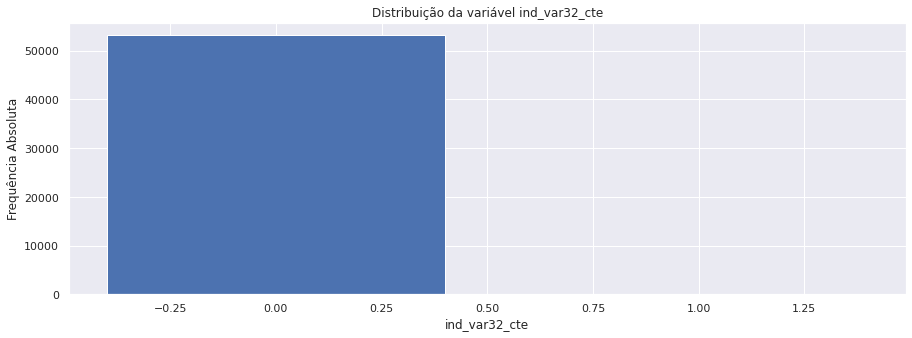


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    53152
1       62
Name: ind_var32_cte, dtype: int64

0    0.998835
1    0.001165
Name: ind_var32_cte, dtype: float64

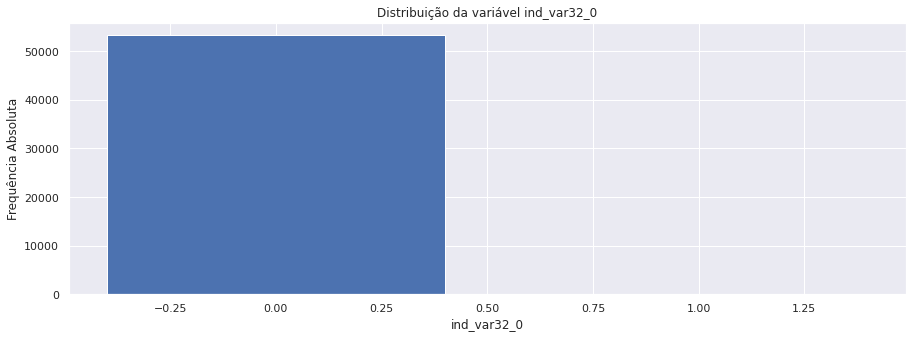


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    53160
1       54
Name: ind_var32_0, dtype: int64

0    0.998985
1    0.001015
Name: ind_var32_0, dtype: float64

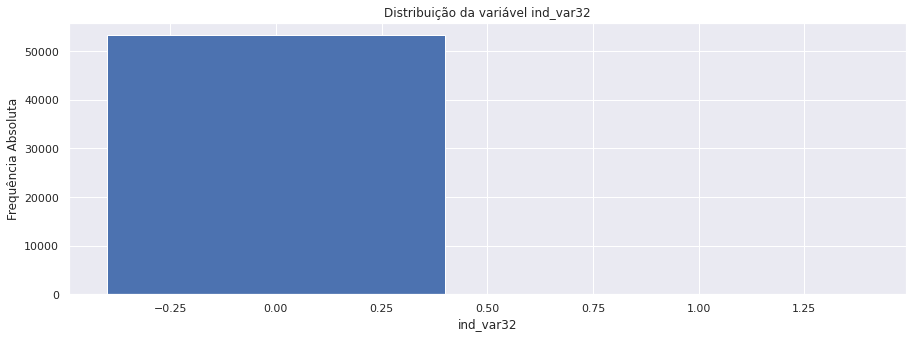


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    53160
1       54
Name: ind_var32, dtype: int64

0    0.998985
1    0.001015
Name: ind_var32, dtype: float64

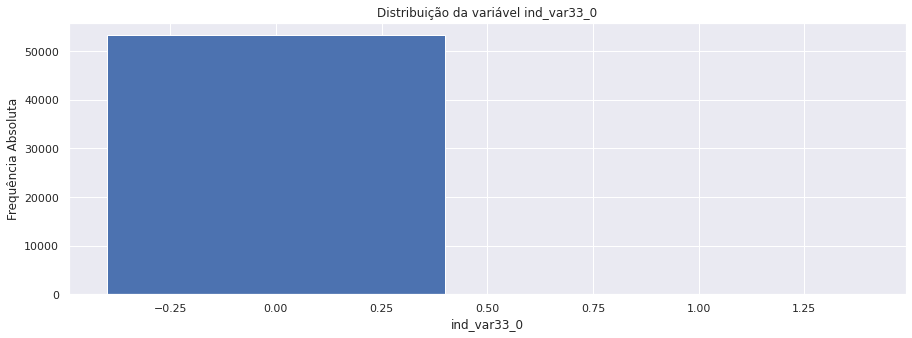


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    53178
1       36
Name: ind_var33_0, dtype: int64

0    0.999323
1    0.000677
Name: ind_var33_0, dtype: float64

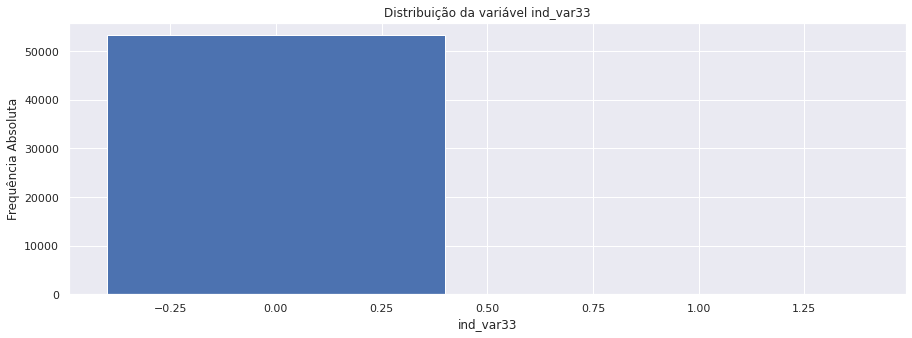


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    53186
1       28
Name: ind_var33, dtype: int64

0    0.999474
1    0.000526
Name: ind_var33, dtype: float64

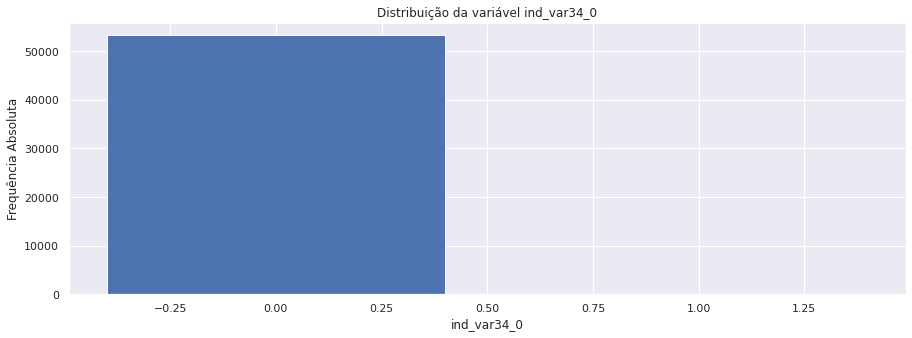


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    53213
1        1
Name: ind_var34_0, dtype: int64

0    0.999981
1    0.000019
Name: ind_var34_0, dtype: float64

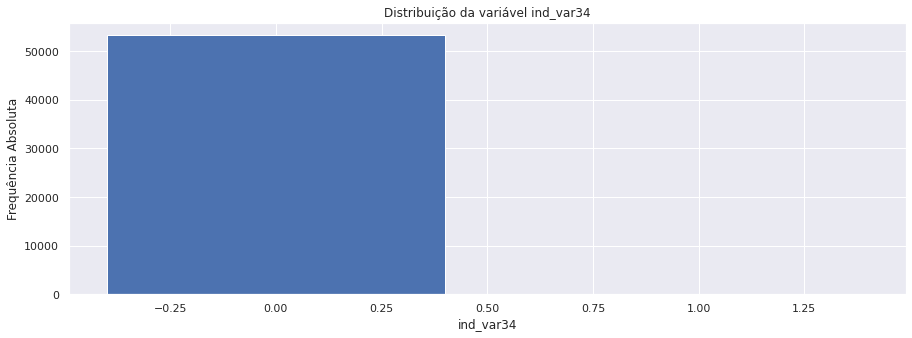


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    53213
1        1
Name: ind_var34, dtype: int64

0    0.999981
1    0.000019
Name: ind_var34, dtype: float64

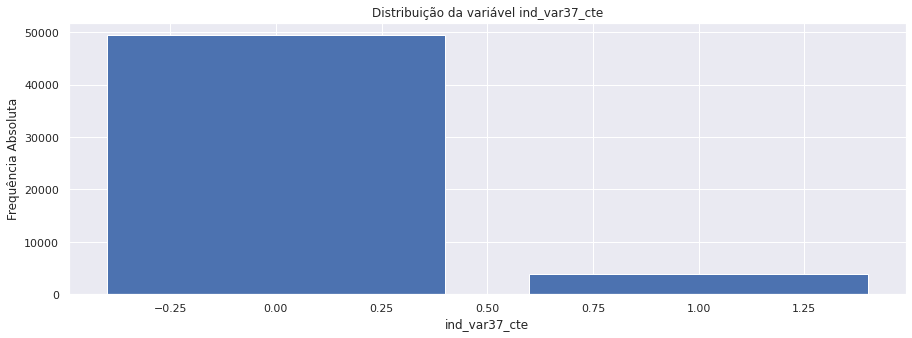


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    49384
1     3830
Name: ind_var37_cte, dtype: int64

0    0.928026
1    0.071974
Name: ind_var37_cte, dtype: float64

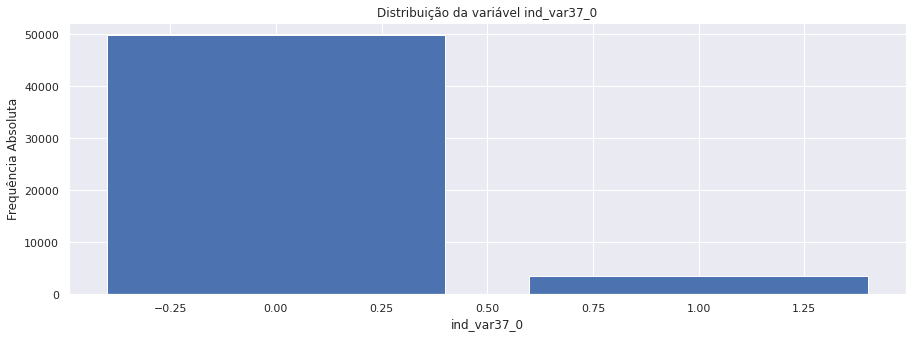


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    49753
1     3461
Name: ind_var37_0, dtype: int64

0    0.934961
1    0.065039
Name: ind_var37_0, dtype: float64

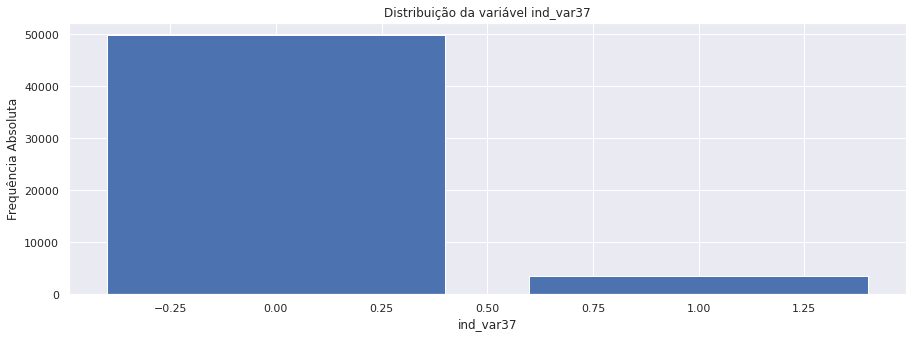


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    49753
1     3461
Name: ind_var37, dtype: int64

0    0.934961
1    0.065039
Name: ind_var37, dtype: float64

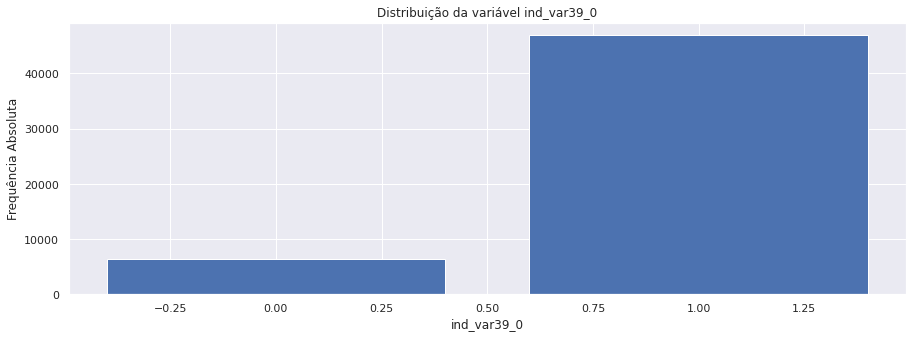


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0     6326
1    46888
Name: ind_var39_0, dtype: int64

0    0.118878
1    0.881122
Name: ind_var39_0, dtype: float64

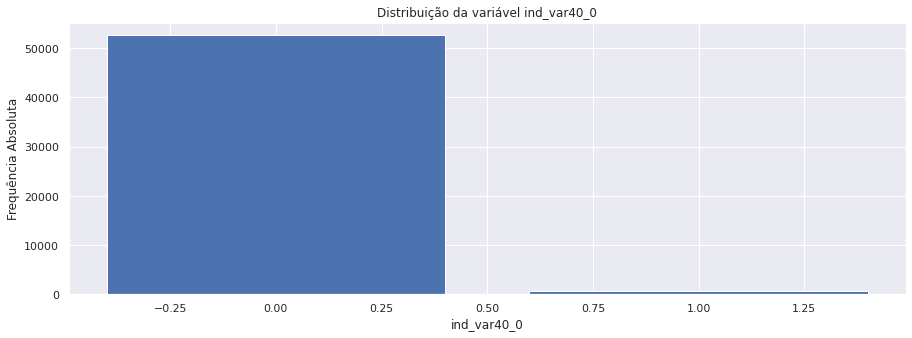


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    52606
1      608
Name: ind_var40_0, dtype: int64

0    0.988574
1    0.011426
Name: ind_var40_0, dtype: float64

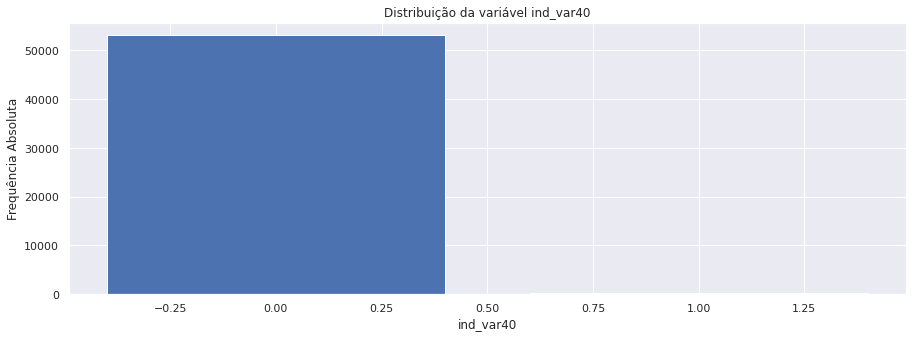


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    53021
1      193
Name: ind_var40, dtype: int64

0    0.996373
1    0.003627
Name: ind_var40, dtype: float64

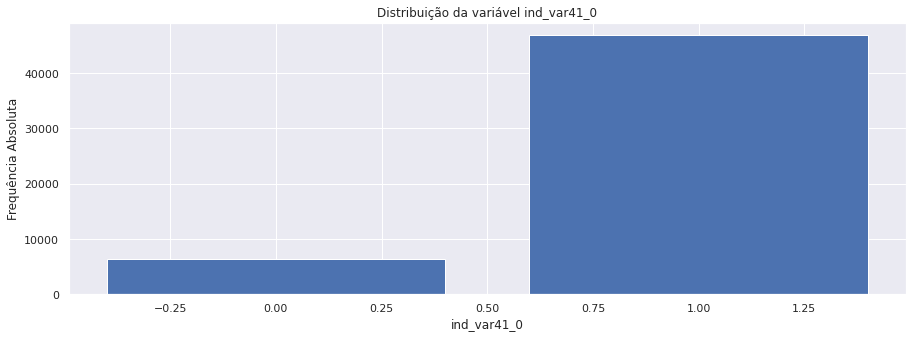


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0     6408
1    46806
Name: ind_var41_0, dtype: int64

0    0.120419
1    0.879581
Name: ind_var41_0, dtype: float64




ind_var41
Não existe variância!
Variável ind_var41 não está contida na variável features.





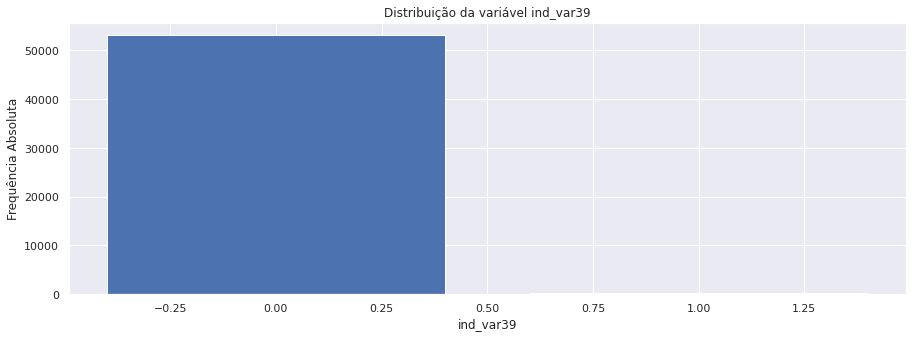


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    53021
1      193
Name: ind_var39, dtype: int64

0    0.996373
1    0.003627
Name: ind_var39, dtype: float64

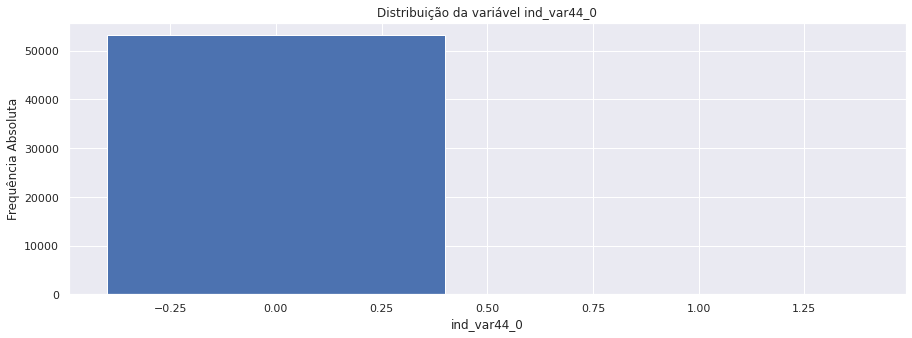


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    53109
1      105
Name: ind_var44_0, dtype: int64

0    0.998027
1    0.001973
Name: ind_var44_0, dtype: float64

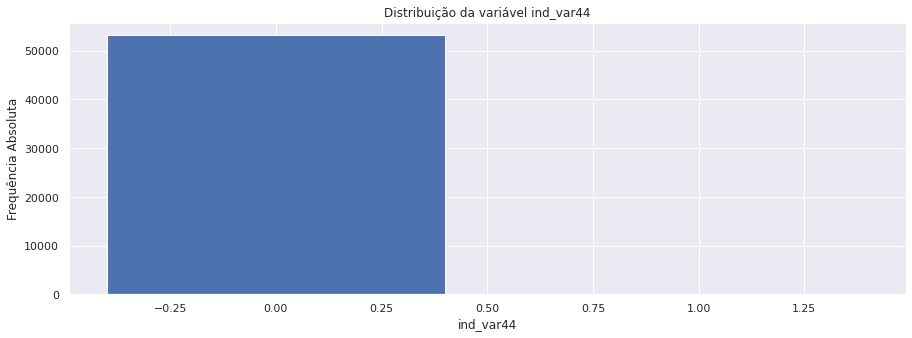


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    53120
1       94
Name: ind_var44, dtype: int64

0    0.998234
1    0.001766
Name: ind_var44, dtype: float64




ind_var46_0
Não existe variância!
Variável ind_var46_0 não está contida na variável features.



ind_var46
Não existe variância!
Variável ind_var46 não está contida na variável features.





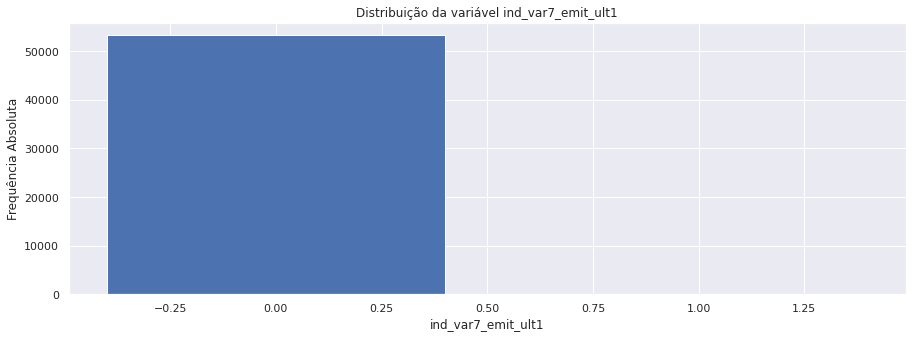


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    53212
1        2
Name: ind_var7_emit_ult1, dtype: int64

0    0.999962
1    0.000038
Name: ind_var7_emit_ult1, dtype: float64

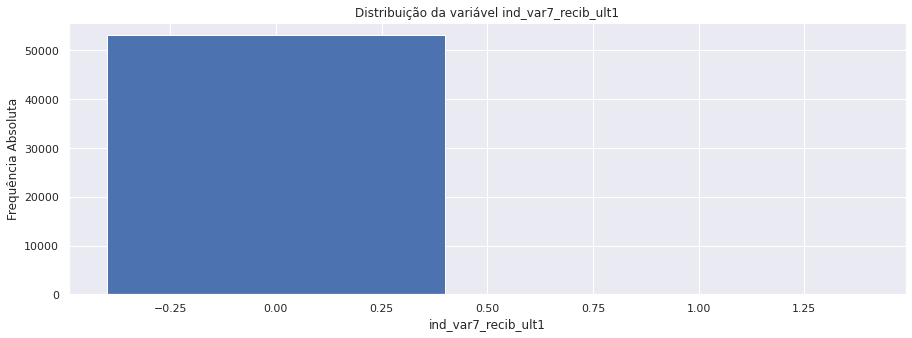


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    53069
1      145
Name: ind_var7_recib_ult1, dtype: int64

0    0.997275
1    0.002725
Name: ind_var7_recib_ult1, dtype: float64

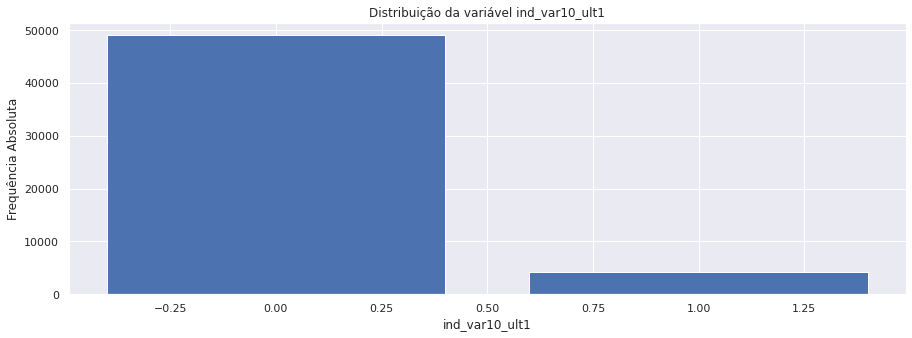


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    48937
1     4277
Name: ind_var10_ult1, dtype: int64

0    0.919626
1    0.080374
Name: ind_var10_ult1, dtype: float64

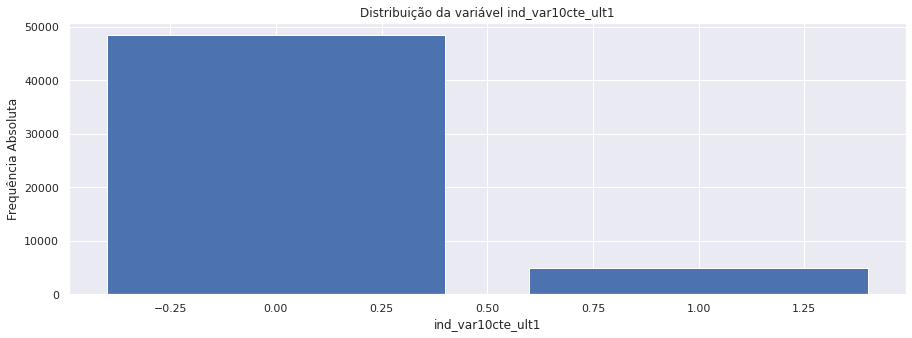


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    48340
1     4874
Name: ind_var10cte_ult1, dtype: int64

0    0.908408
1    0.091592
Name: ind_var10cte_ult1, dtype: float64

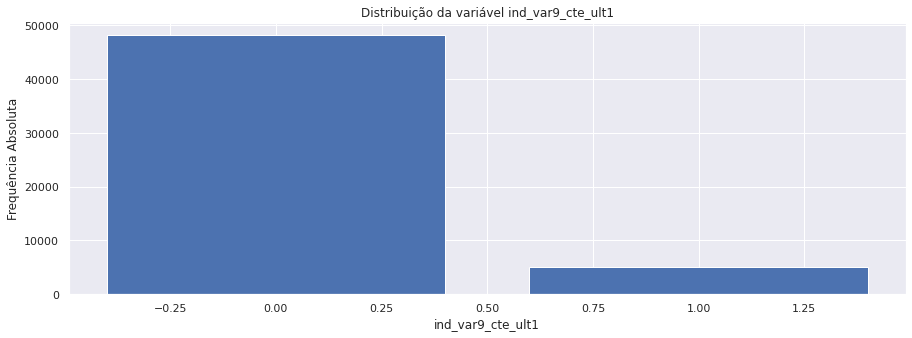


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    48085
1     5129
Name: ind_var9_cte_ult1, dtype: int64

0    0.903616
1    0.096384
Name: ind_var9_cte_ult1, dtype: float64

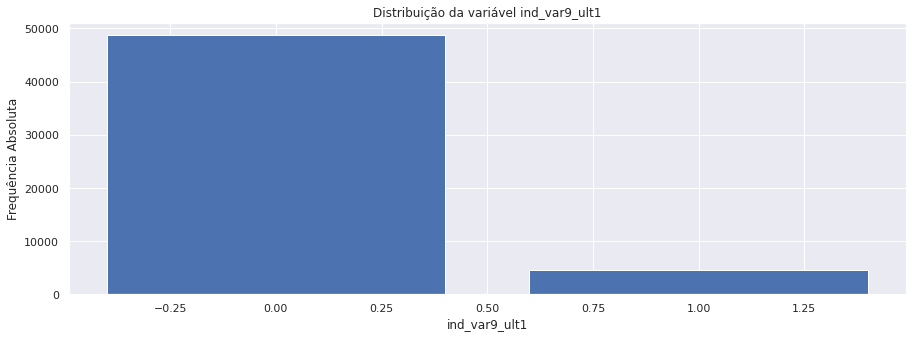


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    48664
1     4550
Name: ind_var9_ult1, dtype: int64

0    0.914496
1    0.085504
Name: ind_var9_ult1, dtype: float64

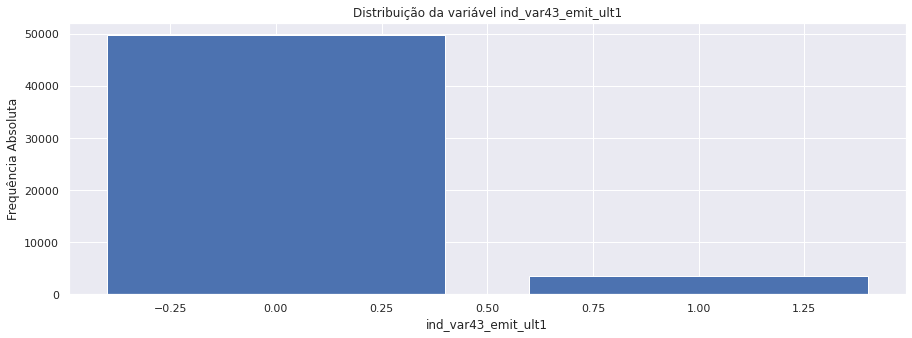


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    49654
1     3560
Name: ind_var43_emit_ult1, dtype: int64

0    0.9331
1    0.0669
Name: ind_var43_emit_ult1, dtype: float64

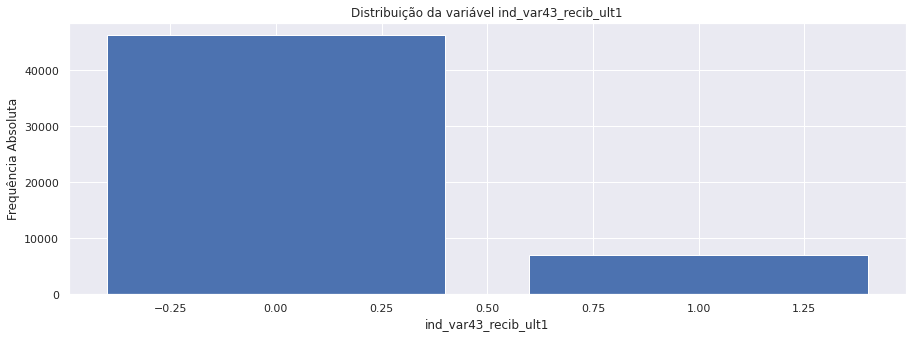


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([0, 1], dtype='int64')



0    46229
1     6985
Name: ind_var43_recib_ult1, dtype: int64

0    0.868738
1    0.131262
Name: ind_var43_recib_ult1, dtype: float64

In [31]:
for col in ind_features:
  categorical_summary(col, df_train)

As variáveis com prefixo `ind` são binárias, algumas não não possuem variância e a maioria delas é desbalanceda.

#### Prefixo `num`

Para as variáveis que começam com `num` vamos avaliar primeiro as variáveis com menos de 50% dos valores iguais a zeros e depois o restante para faciliar as análises.

In [32]:
num_cond = zeros_by_col[num_features] < .5

num_features_low_zeros = zeros_by_col[num_features][num_cond].index
num_features_high_zeros = zeros_by_col[num_features][~num_cond].index

num_features_low_zeros

Index(['num_var4', 'num_var5_0', 'num_var5', 'num_var30_0', 'num_var30',
       'num_var35', 'num_var39_0', 'num_var41_0', 'num_var42_0', 'num_var42',
       'num_meses_var5_ult3', 'num_meses_var39_vig_ult3'],
      dtype='object')

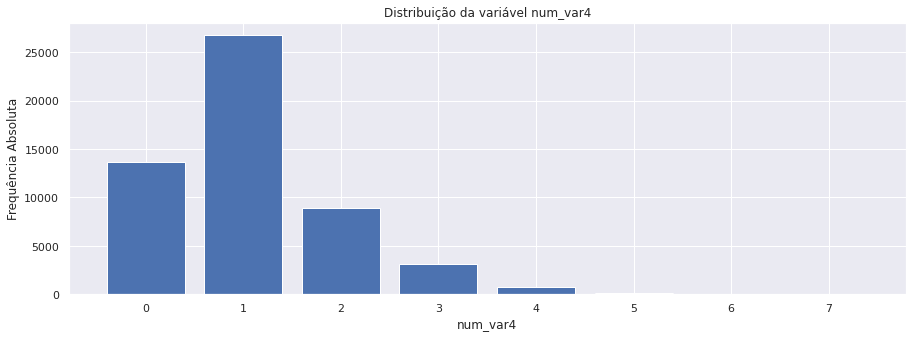


 Quantidade de valores únicos: 8
 Valores únicos: Int64Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int64')



0    13627
1    26727
2     8881
3     3088
4      715
5      144
6       27
7        5
Name: num_var4, dtype: int64

0    0.256079
1    0.502255
2    0.166892
3    0.058030
4    0.013436
5    0.002706
6    0.000507
7    0.000094
Name: num_var4, dtype: float64

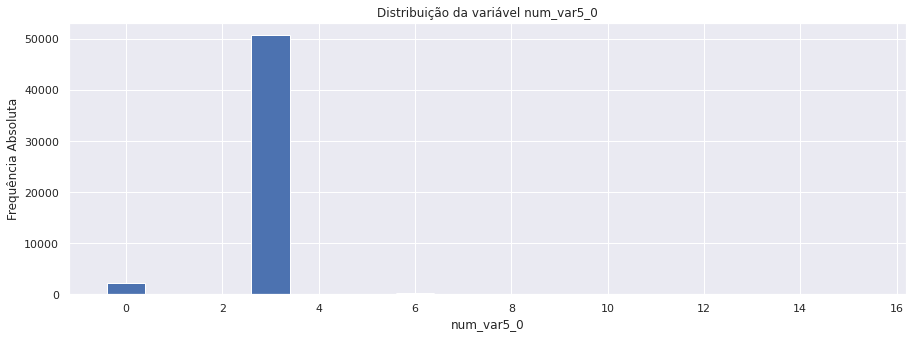


 Quantidade de valores únicos: 5
 Valores únicos: Int64Index([0, 3, 6, 9, 15], dtype='int64')



0      2254
3     50623
6       330
9         5
15        2
Name: num_var5_0, dtype: int64

0     0.042357
3     0.951310
6     0.006201
9     0.000094
15    0.000038
Name: num_var5_0, dtype: float64

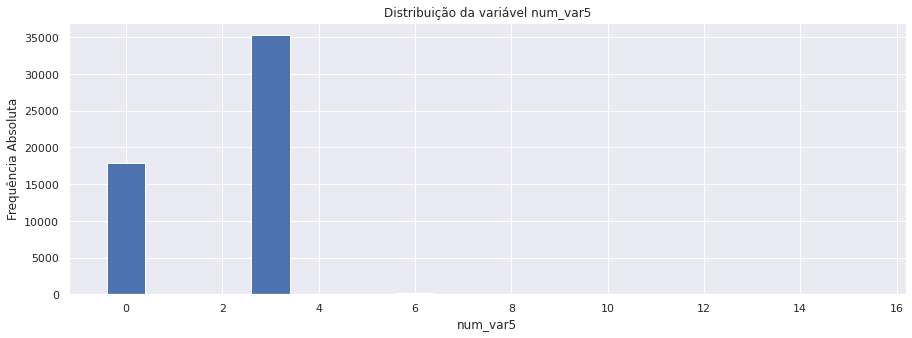


 Quantidade de valores únicos: 5
 Valores únicos: Int64Index([0, 3, 6, 9, 15], dtype='int64')



0     17838
3     35247
6       126
9         2
15        1
Name: num_var5, dtype: int64

0     0.335213
3     0.662363
6     0.002368
9     0.000038
15    0.000019
Name: num_var5, dtype: float64

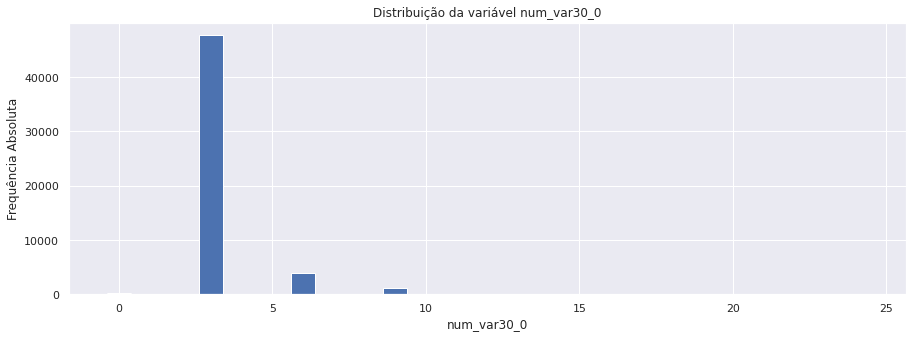


 Quantidade de valores únicos: 9
 Valores únicos: Int64Index([0, 3, 6, 9, 12, 15, 18, 21, 24], dtype='int64')



0       249
3     47619
6      3996
9      1244
12       93
15       10
18        1
21        1
24        1
Name: num_var30_0, dtype: int64

0     0.004679
3     0.894858
6     0.075093
9     0.023377
12    0.001748
15    0.000188
18    0.000019
21    0.000019
24    0.000019
Name: num_var30_0, dtype: float64

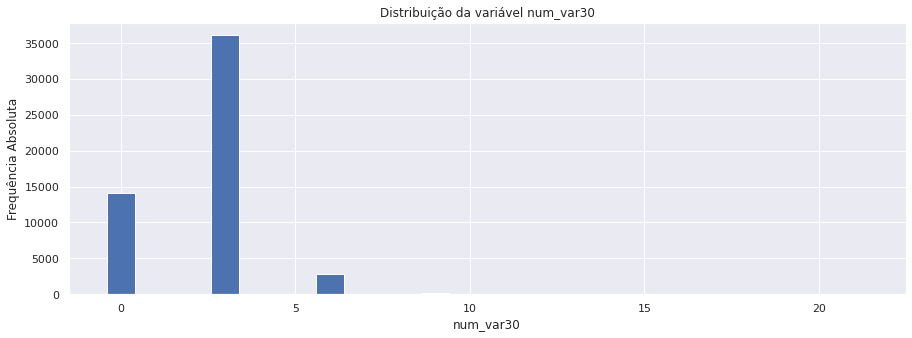


 Quantidade de valores únicos: 8
 Valores únicos: Int64Index([0, 3, 6, 9, 12, 15, 18, 21], dtype='int64')



0     14162
3     36024
6      2783
9       223
12       15
15        5
18        1
21        1
Name: num_var30, dtype: int64

0     0.266133
3     0.676965
6     0.052298
9     0.004191
12    0.000282
15    0.000094
18    0.000019
21    0.000019
Name: num_var30, dtype: float64

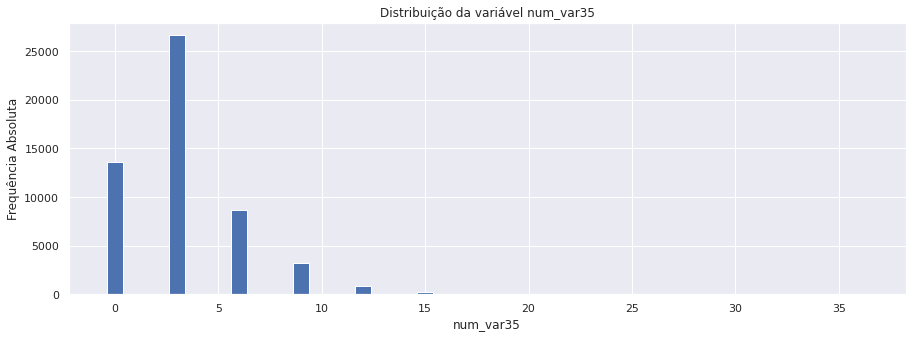


 Quantidade de valores únicos: 13
 Valores únicos: Int64Index([0, 33, 3, 36, 6, 9, 12, 15, 18, 21, 24, 27, 30], dtype='int64')



0     13627
33        2
3     26582
36        1
6      8621
9      3201
12      877
15      225
18       55
21       13
24        5
27        4
30        1
Name: num_var35, dtype: int64

0     0.256079
33    0.000038
3     0.499530
36    0.000019
6     0.162006
9     0.060153
12    0.016481
15    0.004228
18    0.001034
21    0.000244
24    0.000094
27    0.000075
30    0.000019
Name: num_var35, dtype: float64

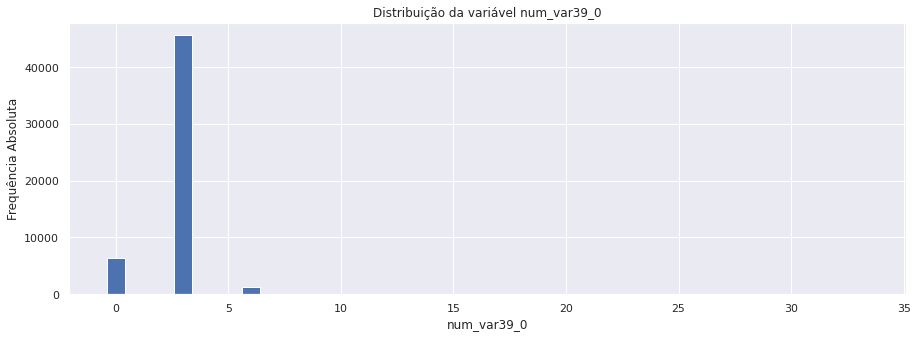


 Quantidade de valores únicos: 9
 Valores únicos: Int64Index([0, 33, 3, 6, 9, 12, 15, 18, 21], dtype='int64')



0      6326
33        1
3     45543
6      1259
9        76
12        5
15        2
18        1
21        1
Name: num_var39_0, dtype: int64

0     0.118878
33    0.000019
3     0.855846
6     0.023659
9     0.001428
12    0.000094
15    0.000038
18    0.000019
21    0.000019
Name: num_var39_0, dtype: float64

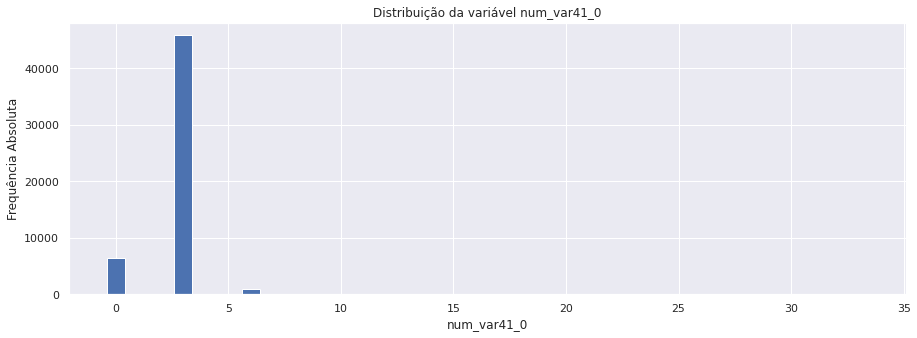


 Quantidade de valores únicos: 9
 Valores únicos: Int64Index([0, 33, 3, 6, 9, 12, 15, 18, 21], dtype='int64')



0      6408
33        1
3     45803
6       945
9        50
12        3
15        2
18        1
21        1
Name: num_var41_0, dtype: int64

0     0.120419
33    0.000019
3     0.860732
6     0.017758
9     0.000940
12    0.000056
15    0.000038
18    0.000019
21    0.000019
Name: num_var41_0, dtype: float64

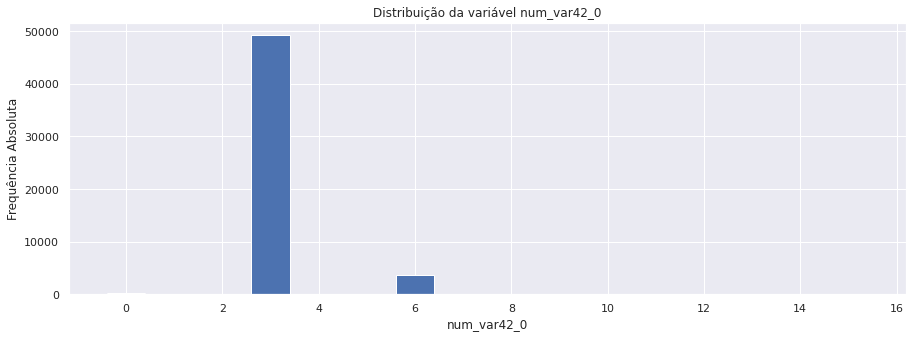


 Quantidade de valores únicos: 6
 Valores únicos: Int64Index([0, 3, 6, 9, 12, 15], dtype='int64')



0       319
3     49123
6      3626
9       138
12        6
15        2
Name: num_var42_0, dtype: int64

0     0.005995
3     0.923122
6     0.068140
9     0.002593
12    0.000113
15    0.000038
Name: num_var42_0, dtype: float64

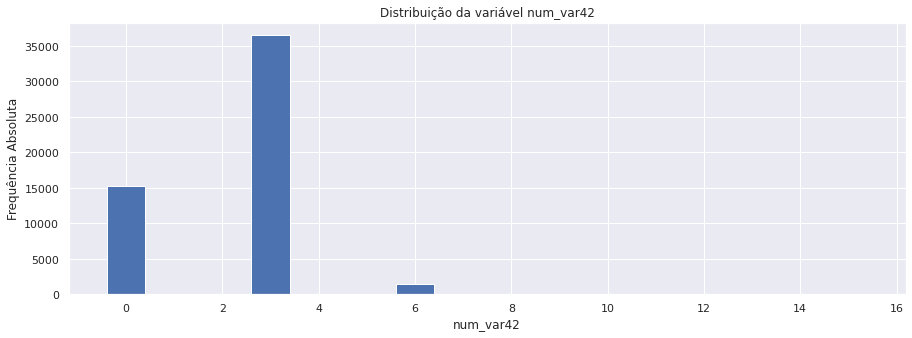


 Quantidade de valores únicos: 6
 Valores únicos: Int64Index([0, 3, 6, 9, 12, 15], dtype='int64')



0     15262
3     36488
6      1443
9        18
12        2
15        1
Name: num_var42, dtype: int64

0     0.286804
3     0.685684
6     0.027117
9     0.000338
12    0.000038
15    0.000019
Name: num_var42, dtype: float64

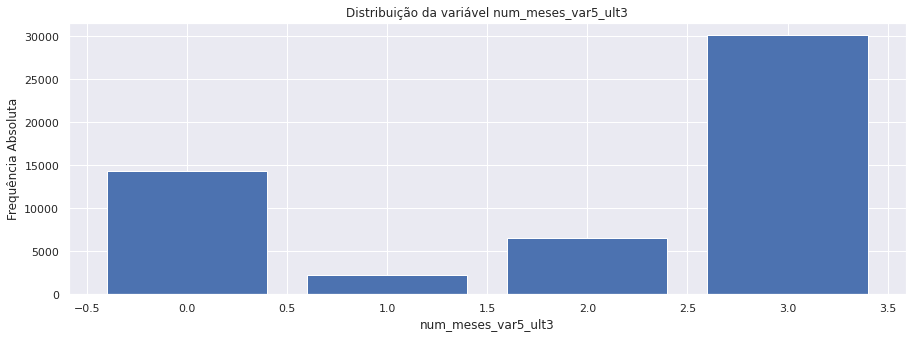


 Quantidade de valores únicos: 4
 Valores únicos: Int64Index([0, 1, 2, 3], dtype='int64')



0    14354
1     2288
2     6526
3    30046
Name: num_meses_var5_ult3, dtype: int64

0    0.269741
1    0.042996
2    0.122637
3    0.564626
Name: num_meses_var5_ult3, dtype: float64

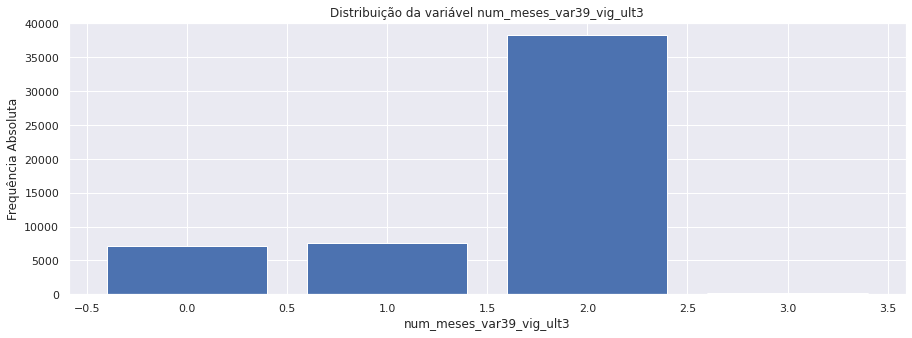


 Quantidade de valores únicos: 4
 Valores únicos: Int64Index([0, 1, 2, 3], dtype='int64')



0     7100
1     7648
2    38220
3      246
Name: num_meses_var39_vig_ult3, dtype: int64

0    0.133424
1    0.143722
2    0.718232
3    0.004623
Name: num_meses_var39_vig_ult3, dtype: float64

In [33]:
for col in num_features_low_zeros:
  categorical_summary(col, df_train)

Para as colunas observadas acima temos no máximo uma 13 valores únicos por colunas, à depender do modelo utilizado, podemos testar um tratamento para variáveis categóricas.

Agora vamos observar as variáveis com mais de 50% dos valores iguais a zero, observando apenas as estatísticas dos valores diferentes de zero.

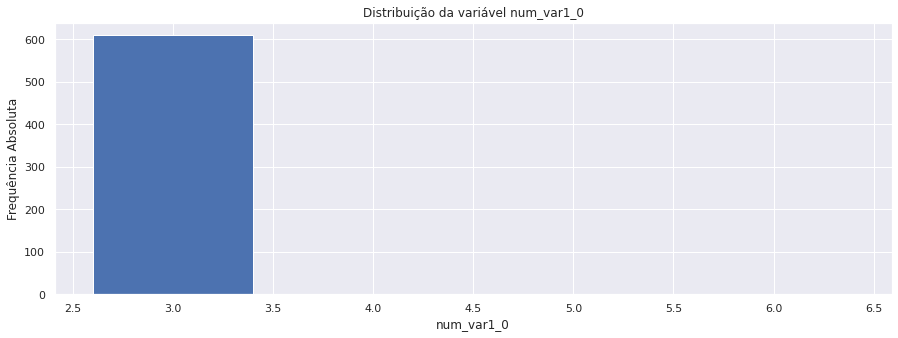


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([3, 6], dtype='int64')



3    609
6      1
Name: num_var1_0, dtype: int64

3    0.998361
6    0.001639
Name: num_var1_0, dtype: float64

% de zeros: 0.9885368512045702



num_var1
Não existe variância!
Variável num_var1 não está contida na variável features.
% de zeros: 0.9963355507949035



num_var6_0
Não existe variância!
Variável num_var6_0 não está contida na variável features.
% de zeros: 0.9998872477167663



num_var6
Não existe variância!
Variável num_var6 não está contida na variável features.
% de zeros: 0.9999624159055888





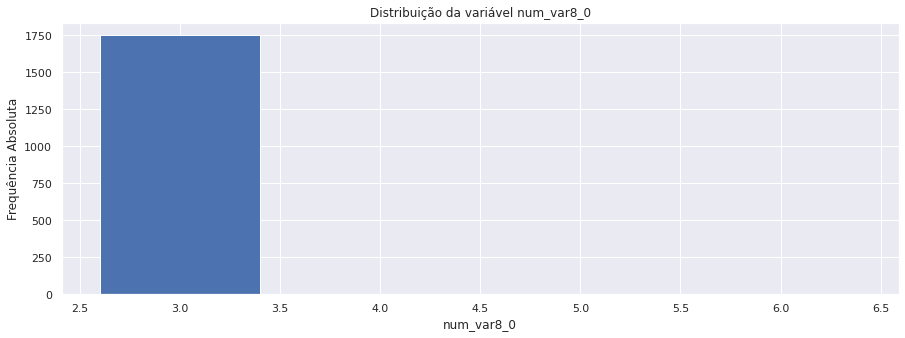


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([3, 6], dtype='int64')



3    1747
6       1
Name: num_var8_0, dtype: int64

3    0.999428
6    0.000572
Name: num_var8_0, dtype: float64

% de zeros: 0.9671515014845717



num_var8
Não existe variância!
Variável num_var8 não está contida na variável features.
% de zeros: 0.9713233359642199





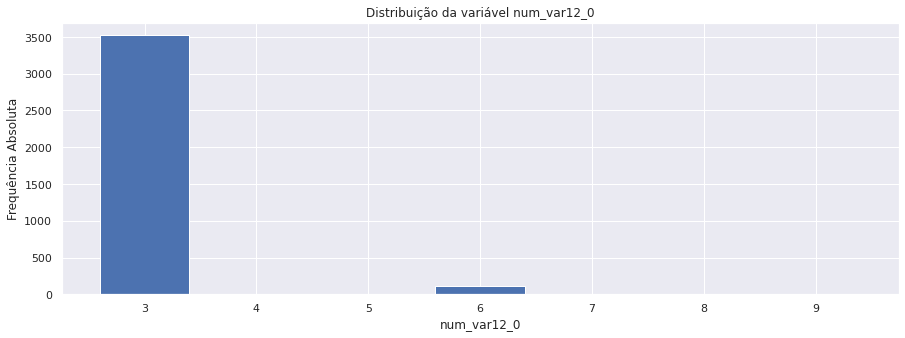


 Quantidade de valores únicos: 3
 Valores únicos: Int64Index([6, 3, 9], dtype='int64')



6     117
3    3520
9       2
Name: num_var12_0, dtype: int64

6    0.032152
3    0.967299
9    0.000550
Name: num_var12_0, dtype: float64

% de zeros: 0.9316157402187394





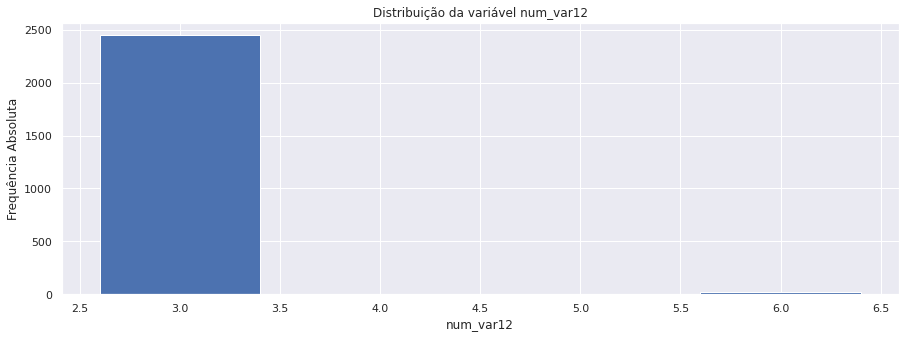


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([6, 3], dtype='int64')



6      20
3    2446
Name: num_var12, dtype: int64

6    0.00811
3    0.99189
Name: num_var12, dtype: float64

% de zeros: 0.9536588115909347





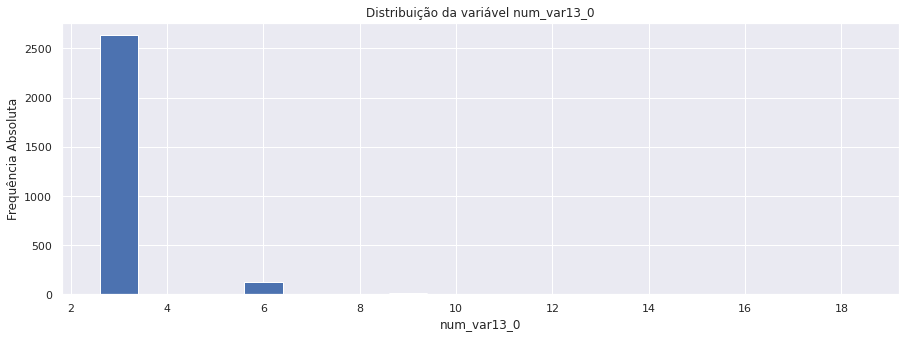


 Quantidade de valores únicos: 6
 Valores únicos: Int64Index([6, 12, 18, 3, 9, 15], dtype='int64')



6      128
12       4
18       1
3     2632
9       16
15       1
Name: num_var13_0, dtype: int64

6     0.046010
12    0.001438
18    0.000359
3     0.946082
9     0.005751
15    0.000359
Name: num_var13_0, dtype: float64

% de zeros: 0.947720524673958





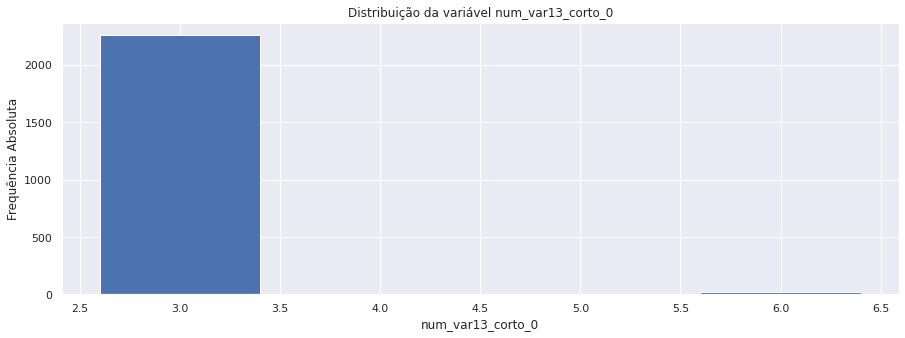


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([6, 3], dtype='int64')



6      23
3    2255
Name: num_var13_corto_0, dtype: int64

6    0.010097
3    0.989903
Name: num_var13_corto_0, dtype: float64

% de zeros: 0.9571917164655918





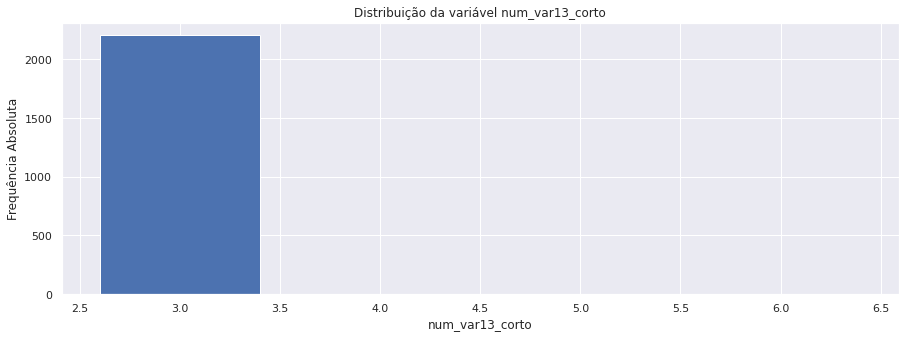


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([6, 3], dtype='int64')



6       2
3    2201
Name: num_var13_corto, dtype: int64

6    0.000908
3    0.999092
Name: num_var13_corto, dtype: float64

% de zeros: 0.9586011200060135





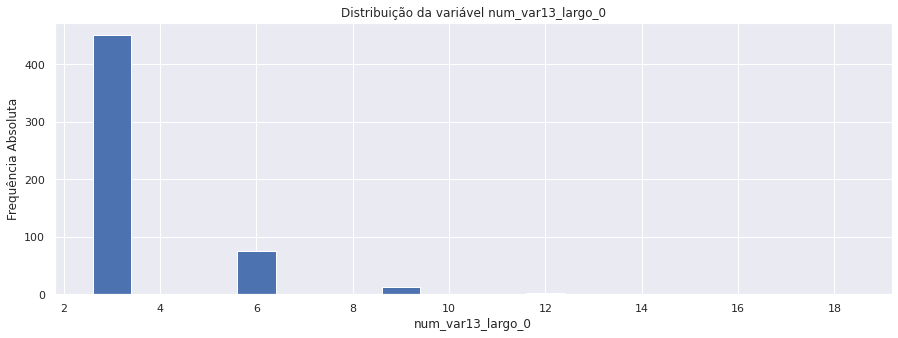


 Quantidade de valores únicos: 6
 Valores únicos: Int64Index([3, 6, 9, 12, 15, 18], dtype='int64')



3     450
6      76
9      13
12      2
15      1
18      1
Name: num_var13_largo_0, dtype: int64

3     0.828729
6     0.139963
9     0.023941
12    0.003683
15    0.001842
18    0.001842
Name: num_var13_largo_0, dtype: float64

% de zeros: 0.9897959183673469





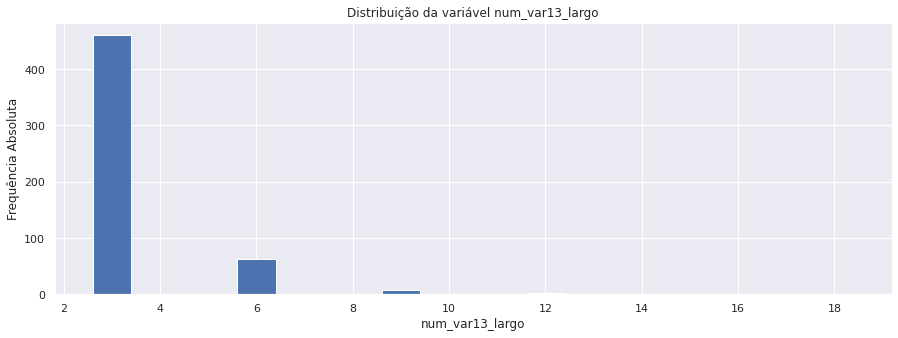


 Quantidade de valores únicos: 6
 Valores únicos: Int64Index([3, 6, 9, 12, 15, 18], dtype='int64')



3     460
6      63
9       7
12      2
15      1
18      1
Name: num_var13_largo, dtype: int64

3     0.861423
6     0.117978
9     0.013109
12    0.003745
15    0.001873
18    0.001873
Name: num_var13_largo, dtype: float64

% de zeros: 0.9899650467921975



num_var13_medio_0
Não existe variância!
Variável num_var13_medio_0 não está contida na variável features.
% de zeros: 0.9999624159055888



num_var13_medio
Não existe variância!
Variável num_var13_medio não está contida na variável features.
% de zeros: 0.9999624159055888





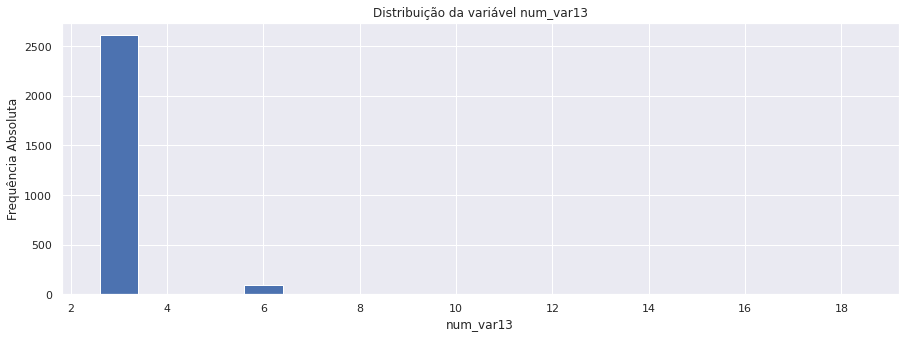


 Quantidade de valores únicos: 6
 Valores únicos: Int64Index([6, 12, 18, 3, 9, 15], dtype='int64')



6       90
12       3
18       1
3     2606
9        8
15       1
Name: num_var13, dtype: int64

6     0.033223
12    0.001107
18    0.000369
3     0.961979
9     0.002953
15    0.000369
Name: num_var13, dtype: float64

% de zeros: 0.9490923441199685





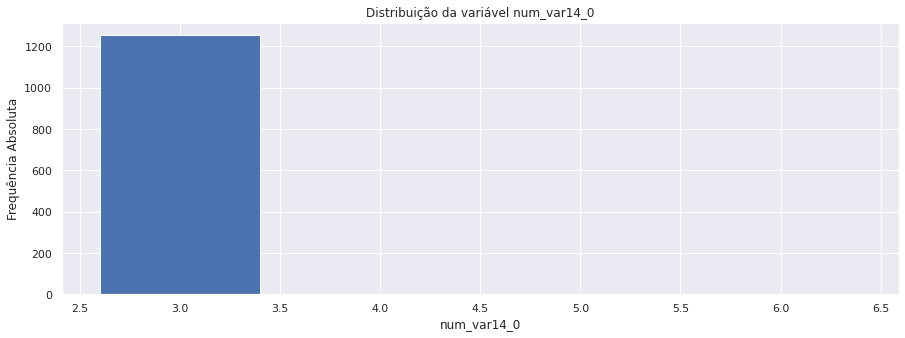


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([3, 6], dtype='int64')



3    1253
6       2
Name: num_var14_0, dtype: int64

3    0.998406
6    0.001594
Name: num_var14_0, dtype: float64

% de zeros: 0.9764159807569437





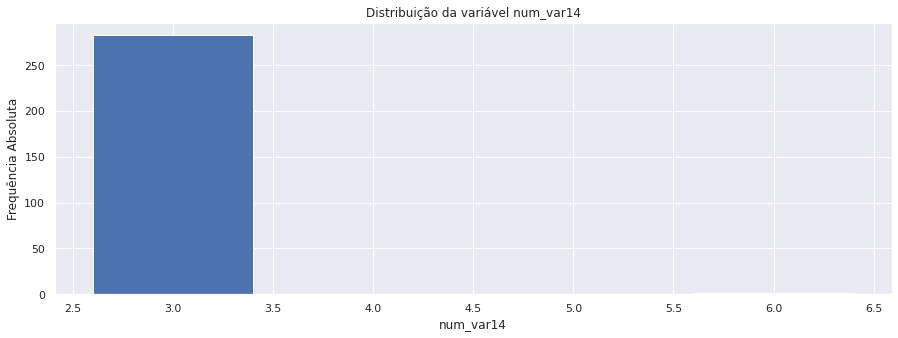


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([3, 6], dtype='int64')



3    282
6      1
Name: num_var14, dtype: int64

3    0.996466
6    0.003534
Name: num_var14, dtype: float64

% de zeros: 0.9946818506408088





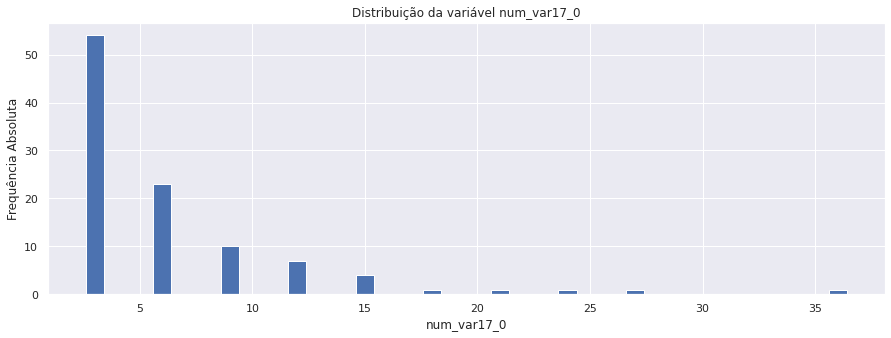


 Quantidade de valores únicos: 10
 Valores únicos: Int64Index([3, 6, 9, 12, 15, 18, 21, 24, 27, 36], dtype='int64')



3     54
6     23
9     10
12     7
15     4
18     1
21     1
24     1
27     1
36     1
Name: num_var17_0, dtype: int64

3     0.524272
6     0.223301
9     0.097087
12    0.067961
15    0.038835
18    0.009709
21    0.009709
24    0.009709
27    0.009709
36    0.009709
Name: num_var17_0, dtype: float64

% de zeros: 0.9980644191378208





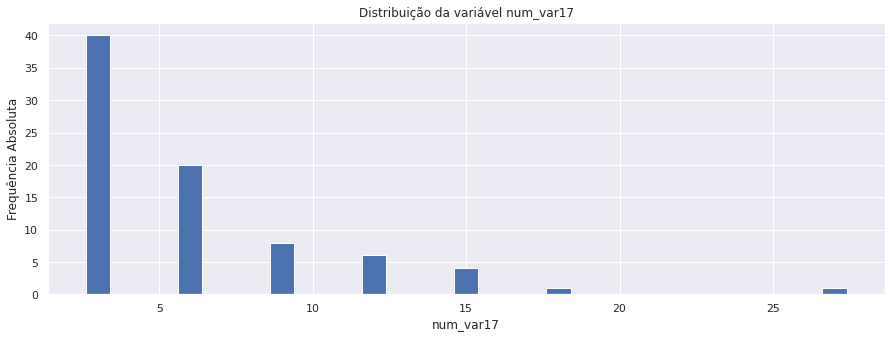


 Quantidade de valores únicos: 7
 Valores únicos: Int64Index([3, 6, 9, 12, 15, 18, 27], dtype='int64')



3     40
6     20
9      8
12     6
15     4
18     1
27     1
Name: num_var17, dtype: int64

3     0.5000
6     0.2500
9     0.1000
12    0.0750
15    0.0500
18    0.0125
27    0.0125
Name: num_var17, dtype: float64

% de zeros: 0.9984966362235502



num_var18_0
Não existe variância!
Variável num_var18_0 não está contida na variável features.
% de zeros: 0.9999812079527943



num_var18
Não existe variância!
Variável num_var18 não está contida na variável features.
% de zeros: 0.9999812079527943



num_var20_0
Não existe variância!
Variável num_var20_0 não está contida na variável features.
% de zeros: 0.996316758747698



num_var20
Não existe variância!
Variável num_var20 não está contida na variável features.
% de zeros: 0.9972375690607734





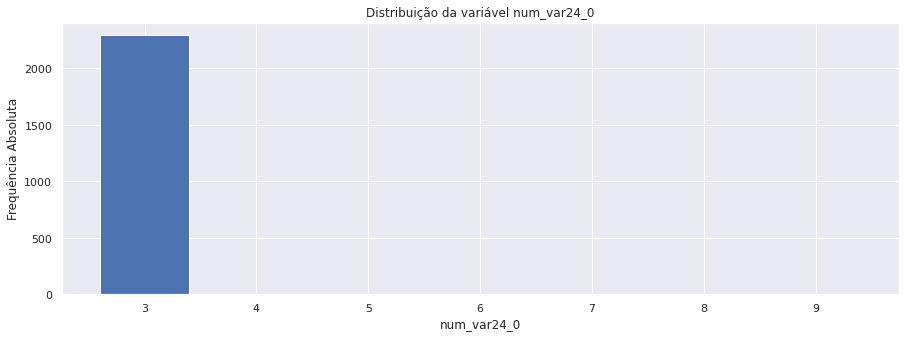


 Quantidade de valores únicos: 3
 Valores únicos: Int64Index([6, 3, 9], dtype='int64')



6       6
3    2292
9       1
Name: num_var24_0, dtype: int64

6    0.002610
3    0.996955
9    0.000435
Name: num_var24_0, dtype: float64

% de zeros: 0.9567970834742737





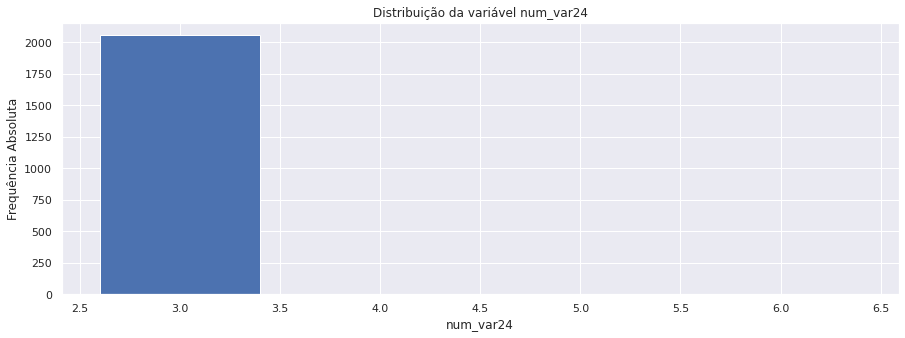


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([6, 3], dtype='int64')



6       1
3    2053
Name: num_var24, dtype: int64

6    0.000487
3    0.999513
Name: num_var24, dtype: float64

% de zeros: 0.9614011350396512





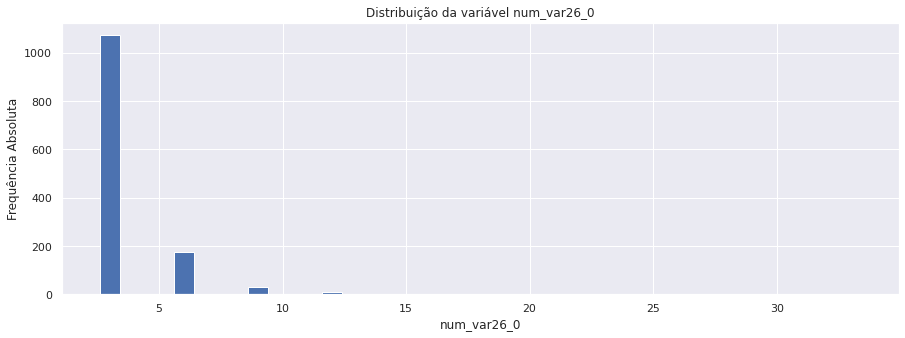


 Quantidade de valores únicos: 7
 Valores únicos: Int64Index([3, 6, 9, 12, 15, 27, 33], dtype='int64')



3     1071
6      175
9       31
12      11
15       2
27       1
33       1
Name: num_var26_0, dtype: int64

3     0.828947
6     0.135449
9     0.023994
12    0.008514
15    0.001548
27    0.000774
33    0.000774
Name: num_var26_0, dtype: float64

% de zeros: 0.9757206750103357





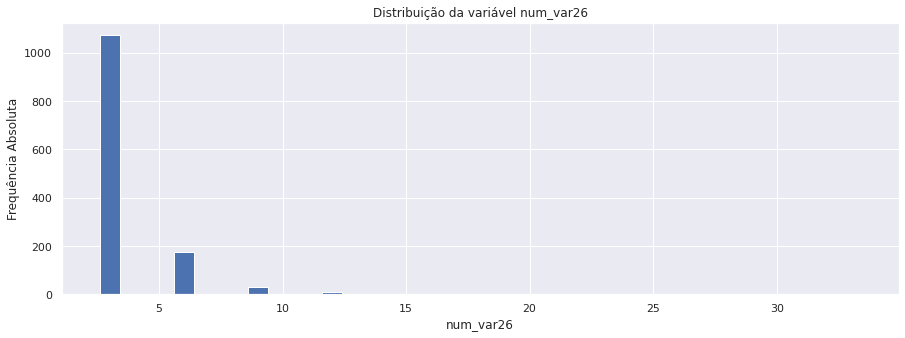


 Quantidade de valores únicos: 7
 Valores únicos: Int64Index([3, 6, 9, 12, 15, 27, 33], dtype='int64')



3     1071
6      175
9       31
12      11
15       2
27       1
33       1
Name: num_var26, dtype: int64

3     0.828947
6     0.135449
9     0.023994
12    0.008514
15    0.001548
27    0.000774
33    0.000774
Name: num_var26, dtype: float64

% de zeros: 0.9757206750103357





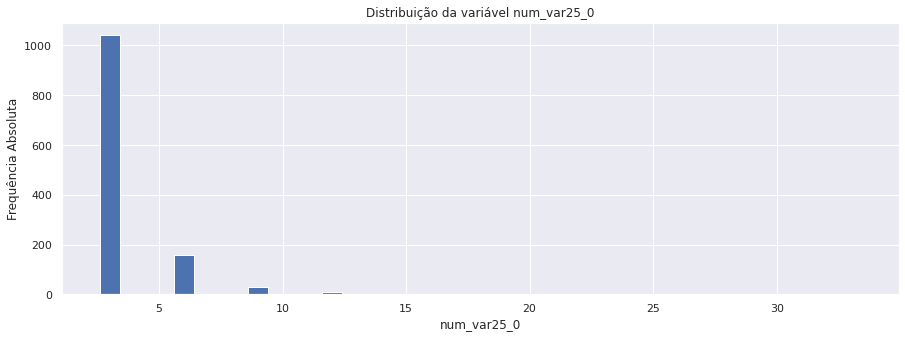


 Quantidade de valores únicos: 7
 Valores únicos: Int64Index([3, 6, 9, 12, 15, 27, 33], dtype='int64')



3     1040
6      158
9       30
12      10
15       2
27       1
33       1
Name: num_var25_0, dtype: int64

3     0.837359
6     0.127214
9     0.024155
12    0.008052
15    0.001610
27    0.000805
33    0.000805
Name: num_var25_0, dtype: float64

% de zeros: 0.9766602773706168





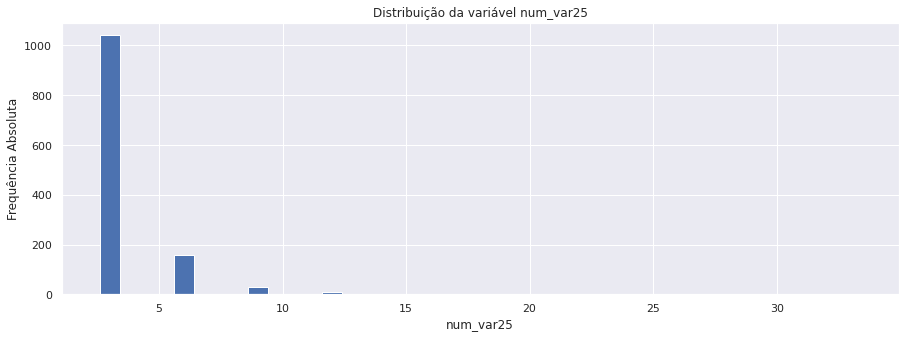


 Quantidade de valores únicos: 7
 Valores únicos: Int64Index([3, 6, 9, 12, 15, 27, 33], dtype='int64')



3     1040
6      158
9       30
12      10
15       2
27       1
33       1
Name: num_var25, dtype: int64

3     0.837359
6     0.127214
9     0.024155
12    0.008052
15    0.001610
27    0.000805
33    0.000805
Name: num_var25, dtype: float64

% de zeros: 0.9766602773706168





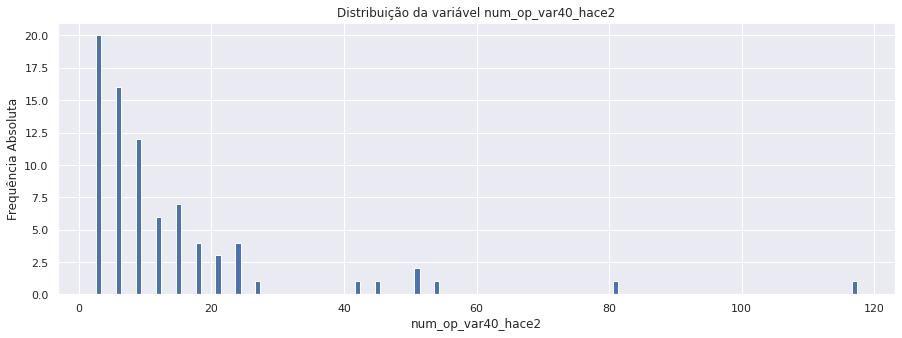


 Quantidade de valores únicos: 15
 Valores únicos: Int64Index([3, 6, 9, 12, 15, 18, 21, 24, 27, 42, 45, 51, 54, 81, 117], dtype='int64')



3      20
6      16
9      12
12      6
15      7
18      4
21      3
24      4
27      1
42      1
45      1
51      2
54      1
81      1
117     1
Name: num_op_var40_hace2, dtype: int64

3      0.2500
6      0.2000
9      0.1500
12     0.0750
15     0.0875
18     0.0500
21     0.0375
24     0.0500
27     0.0125
42     0.0125
45     0.0125
51     0.0250
54     0.0125
81     0.0125
117    0.0125
Name: num_op_var40_hace2, dtype: float64

% de zeros: 0.9984966362235502





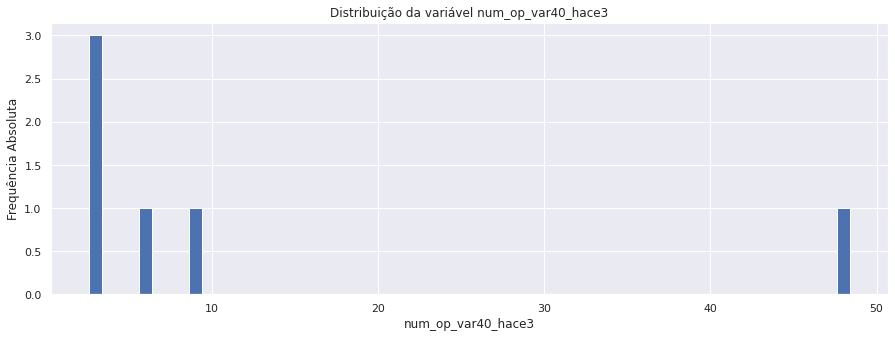


 Quantidade de valores únicos: 4
 Valores únicos: Int64Index([48, 9, 3, 6], dtype='int64')



48    1
9     1
3     3
6     1
Name: num_op_var40_hace3, dtype: int64

48    0.166667
9     0.166667
3     0.500000
6     0.166667
Name: num_op_var40_hace3, dtype: float64

% de zeros: 0.9998872477167663





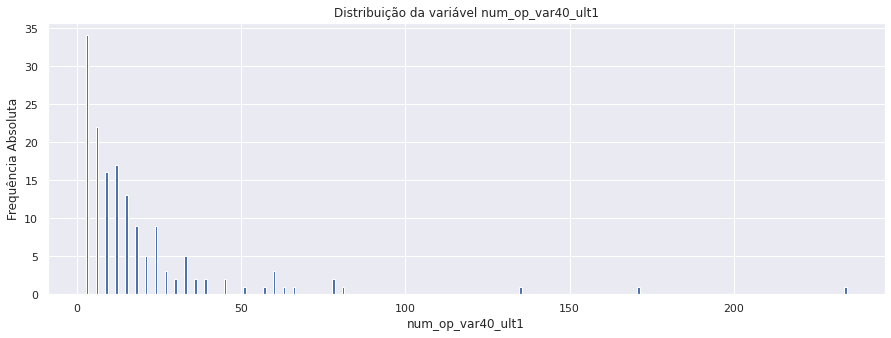


 Quantidade de valores únicos: 24
 Valores únicos: Int64Index([  3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33,  36,  39,
             45,  51,  57,  60,  63,  66,  78,  81, 135, 171, 234],
           dtype='int64')



3      34
6      22
9      16
12     17
15     13
18      9
21      5
24      9
27      3
30      2
33      5
36      2
39      2
45      2
51      1
57      1
60      3
63      1
66      1
78      2
81      1
135     1
171     1
234     1
Name: num_op_var40_ult1, dtype: int64

3      0.220779
6      0.142857
9      0.103896
12     0.110390
15     0.084416
18     0.058442
21     0.032468
24     0.058442
27     0.019481
30     0.012987
33     0.032468
36     0.012987
39     0.012987
45     0.012987
51     0.006494
57     0.006494
60     0.019481
63     0.006494
66     0.006494
78     0.012987
81     0.006494
135    0.006494
171    0.006494
234    0.006494
Name: num_op_var40_ult1, dtype: float64

% de zeros: 0.9971060247303342





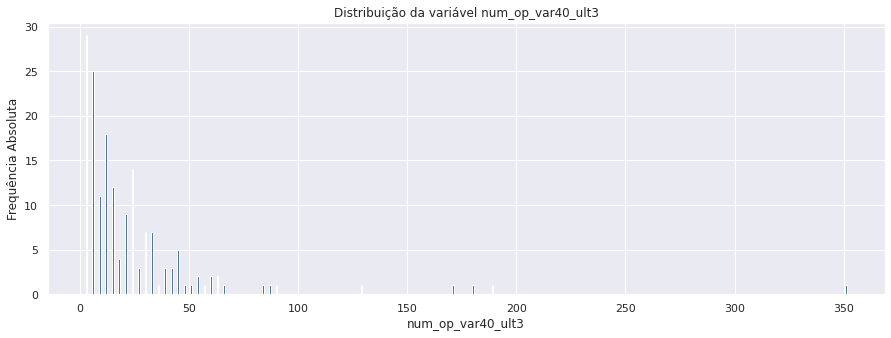


 Quantidade de valores únicos: 30
 Valores únicos: Int64Index([  3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33,  36,  39,
             42,  45,  48,  51,  54,  57,  60,  63,  66,  84,  87,  90, 351,
            129, 171, 180, 189],
           dtype='int64')



3      29
6      25
9      11
12     18
15     12
18      4
21      9
24     14
27      3
30      7
33      7
36      1
39      3
42      3
45      5
48      1
51      1
54      2
57      1
60      2
63      2
66      1
84      1
87      1
90      1
351     1
129     1
171     1
180     1
189     1
Name: num_op_var40_ult3, dtype: int64

3      0.171598
6      0.147929
9      0.065089
12     0.106509
15     0.071006
18     0.023669
21     0.053254
24     0.082840
27     0.017751
30     0.041420
33     0.041420
36     0.005917
39     0.017751
42     0.017751
45     0.029586
48     0.005917
51     0.005917
54     0.011834
57     0.005917
60     0.011834
63     0.011834
66     0.005917
84     0.005917
87     0.005917
90     0.005917
351    0.005917
129    0.005917
171    0.005917
180    0.005917
189    0.005917
Name: num_op_var40_ult3, dtype: float64

% de zeros: 0.9968241440222498





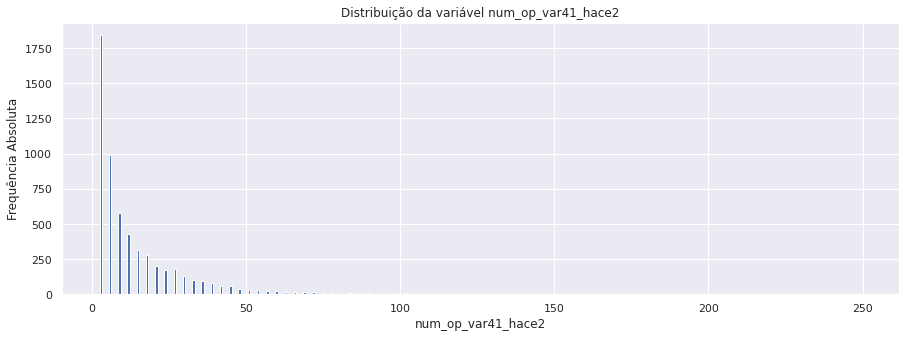


 Quantidade de valores únicos: 47
 Valores únicos: Int64Index([ 12,  24,  36,  48,  60,  72,  84,  96, 108, 120, 144, 156,   9,
             21,  33,  45,  57,  69,  81,  93, 105, 117, 129, 165, 249,   6,
             18,  30,  42,  54,  66,  78,  90, 102, 114, 186,   3,  15,  27,
             39,  51,  63,  75,  87,  99, 123, 171],
           dtype='int64')



12      431
24      174
36       95
48       37
60       25
72       15
84        7
96        4
108       1
120       2
144       1
156       1
9       580
21      204
33       99
45       57
57       23
69       17
81        5
93        5
105       5
117       1
129       3
165       1
249       1
6       987
18      278
30      131
42       57
54       30
66       19
78       10
90        7
102       6
114       1
186       1
3      1840
15      318
27      182
39       79
51       32
63       18
75       11
87        6
99        6
123       1
171       1
Name: num_op_var41_hace2, dtype: int64

12     0.074119
24     0.029923
36     0.016337
48     0.006363
60     0.004299
72     0.002580
84     0.001204
96     0.000688
108    0.000172
120    0.000344
144    0.000172
156    0.000172
9      0.099742
21     0.035082
33     0.017025
45     0.009802
57     0.003955
69     0.002923
81     0.000860
93     0.000860
105    0.000860
117    0.000172
129    0.000516
165    0.000172
249    0.000172
6      0.169733
18     0.047807
30     0.022528
42     0.009802
54     0.005159
66     0.003267
78     0.001720
90     0.001204
102    0.001032
114    0.000172
186    0.000172
3      0.316423
15     0.054686
27     0.031298
39     0.013586
51     0.005503
63     0.003095
75     0.001892
87     0.001032
99     0.001032
123    0.000172
171    0.000172
Name: num_op_var41_hace2, dtype: float64

% de zeros: 0.8907242454993047





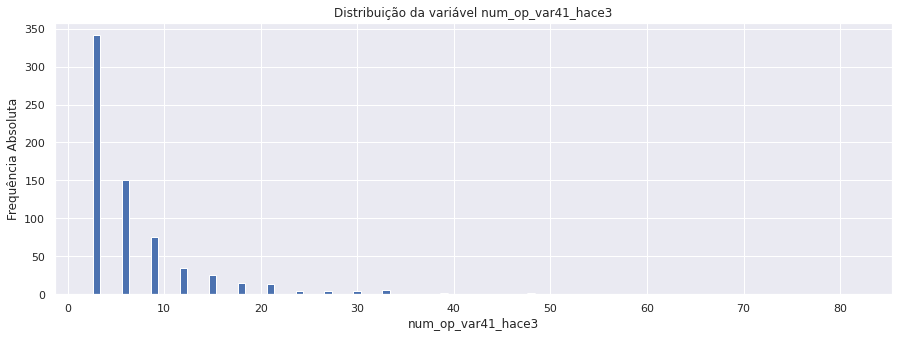


 Quantidade de valores únicos: 18
 Valores únicos: Int64Index([3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 39, 48, 51, 60, 66, 69,
            81],
           dtype='int64')



3     341
6     150
9      76
12     34
15     25
18     15
21     14
24      4
27      4
30      5
33      6
39      2
48      2
51      1
60      1
66      1
69      1
81      1
Name: num_op_var41_hace3, dtype: int64

3     0.499268
6     0.219619
9     0.111274
12    0.049780
15    0.036603
18    0.021962
21    0.020498
24    0.005857
27    0.005857
30    0.007321
33    0.008785
39    0.002928
48    0.002928
51    0.001464
60    0.001464
66    0.001464
69    0.001464
81    0.001464
Name: num_op_var41_hace3, dtype: float64

% de zeros: 0.9871650317585597





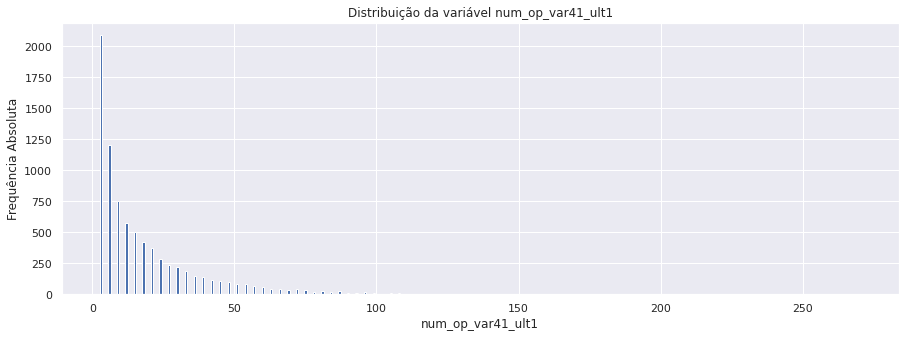


 Quantidade de valores únicos: 64
 Valores únicos: Int64Index([ 12,  24,  36,  48,  60,  72,  84,  96, 108, 120, 132, 144, 156,
            192, 204, 216,   9,  21,  33,  45,  57,  69,  81,  93, 105, 117,
            129, 141, 177, 213,   6,  18,  30,  42,  54,  66,  78,  90, 102,
            114, 126, 138, 150, 162, 174, 186, 210, 222, 270,   3,  15,  27,
             39,  51,  63,  75,  87,  99, 111, 123, 135, 147, 159, 171],
           dtype='int64')



12     576
24     287
36     148
48     100
60      59
      ... 
123      3
135      2
147      1
159      1
171      1
Name: num_op_var41_ult1, Length: 64, dtype: int64

12     0.070744
24     0.035249
36     0.018177
48     0.012282
60     0.007246
         ...   
123    0.000368
135    0.000246
147    0.000123
159    0.000123
171    0.000123
Name: num_op_var41_ult1, Length: 64, dtype: float64

% de zeros: 0.8469951516518209





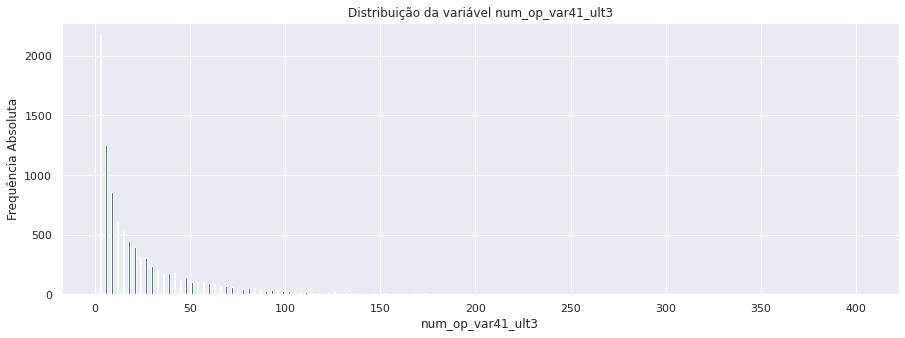


 Quantidade de valores únicos: 90
 Valores únicos: Int64Index([ 24,  48,  72,  96, 120, 144, 168, 192, 216, 240, 312,   9,  33,
             57,  81, 105, 129, 153, 177, 201, 225, 249, 321,  18,  42,  66,
             90, 114, 138, 162, 186, 258, 306, 402,   3,  27,  51,  75,  99,
            123, 147, 171, 195, 267, 291, 363,  12,  36,  60,  84, 108, 132,
            156, 180, 204, 228, 252, 276,  21,  45,  69,  93, 117, 141, 165,
            189, 213, 237,   6,  30,  54,  78, 102, 126, 150, 174, 222, 270,
            318,  15,  39,  63,  87, 111, 135, 159, 183, 207, 279, 399],
           dtype='int64')



24     311
48     141
72      60
96      33
120     13
      ... 
159     10
183      3
207      1
279      1
399      1
Name: num_op_var41_ult3, Length: 90, dtype: int64

24     0.032470
48     0.014721
72     0.006264
96     0.003445
120    0.001357
         ...   
159    0.001044
183    0.000313
207    0.000104
279    0.000104
399    0.000104
Name: num_op_var41_ult3, Length: 90, dtype: float64

% de zeros: 0.8200097718645469





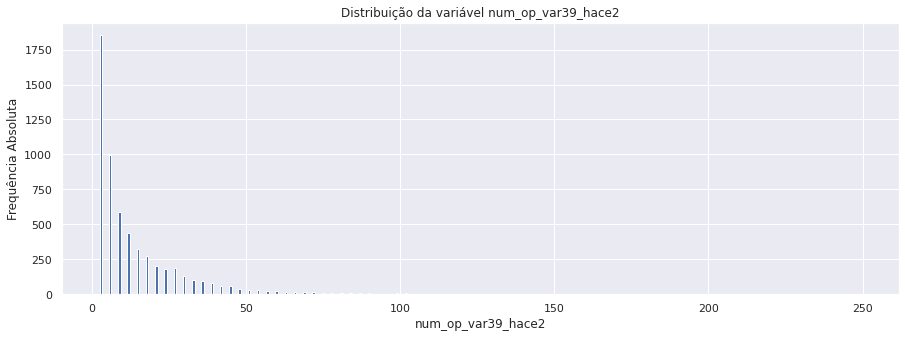


 Quantidade de valores únicos: 47
 Valores únicos: Int64Index([ 12,  24,  36,  48,  60,  72,  84,  96, 108, 120, 144, 156,   9,
             21,  33,  45,  57,  69,  81,  93, 105, 117, 129, 165, 249,   6,
             18,  30,  42,  54,  66,  78,  90, 102, 114, 186,   3,  15,  27,
             39,  51,  63,  75,  87,  99, 123, 171],
           dtype='int64')



12      437
24      179
36       95
48       37
60       24
72       15
84        7
96        4
108       1
120       2
144       1
156       1
9       588
21      205
33      100
45       57
57       26
69       18
81        7
93        5
105       5
117       2
129       3
165       1
249       1
6       997
18      277
30      132
42       56
54       30
66       19
78       11
90        7
102       6
114       1
186       1
3      1851
15      324
27      185
39       78
51       34
63       19
75       10
87        6
99        6
123       1
171       1
Name: num_op_var39_hace2, dtype: int64

12     0.074408
24     0.030478
36     0.016176
48     0.006300
60     0.004086
72     0.002554
84     0.001192
96     0.000681
108    0.000170
120    0.000341
144    0.000170
156    0.000170
9      0.100119
21     0.034905
33     0.017027
45     0.009705
57     0.004427
69     0.003065
81     0.001192
93     0.000851
105    0.000851
117    0.000341
129    0.000511
165    0.000170
249    0.000170
6      0.169760
18     0.047165
30     0.022476
42     0.009535
54     0.005108
66     0.003235
78     0.001873
90     0.001192
102    0.001022
114    0.000170
186    0.000170
3      0.315171
15     0.055168
27     0.031500
39     0.013281
51     0.005789
63     0.003235
75     0.001703
87     0.001022
99     0.001022
123    0.000170
171    0.000170
Name: num_op_var39_hace2, dtype: float64

% de zeros: 0.8896343067613786





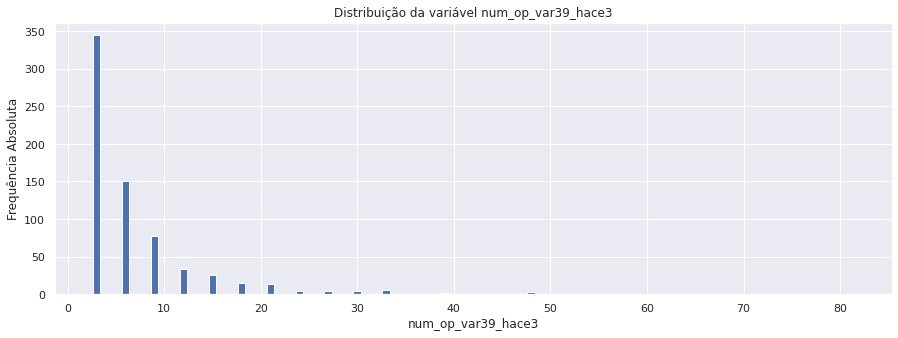


 Quantidade de valores únicos: 18
 Valores únicos: Int64Index([3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 39, 48, 51, 60, 66, 69,
            81],
           dtype='int64')



3     344
6     151
9      77
12     34
15     25
18     15
21     14
24      4
27      4
30      5
33      6
39      2
48      3
51      1
60      1
66      1
69      1
81      1
Name: num_op_var39_hace3, dtype: int64

3     0.499274
6     0.219158
9     0.111756
12    0.049347
15    0.036284
18    0.021771
21    0.020319
24    0.005806
27    0.005806
30    0.007257
33    0.008708
39    0.002903
48    0.004354
51    0.001451
60    0.001451
66    0.001451
69    0.001451
81    0.001451
Name: num_op_var39_hace3, dtype: float64

% de zeros: 0.987052279475326





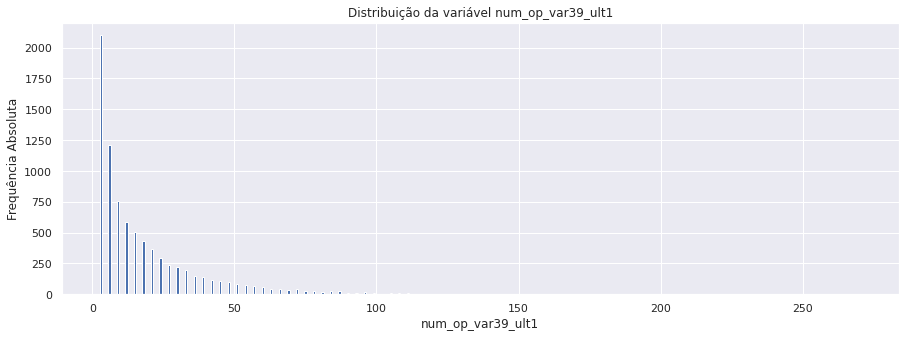


 Quantidade de valores únicos: 67
 Valores únicos: Int64Index([ 24,  48,  72,  96, 120, 144, 216,   9,  33,  57,  81, 105, 129,
            153, 177, 225,  18,  42,  66,  90, 114, 138, 162, 186, 210, 234,
              3,  27,  51,  75,  99, 123, 147, 171,  12,  36,  60,  84, 108,
            132, 156, 180, 204,  21,  45,  69,  93, 117, 141, 213,   6,  30,
             54,  78, 102, 126, 150, 174, 222, 270,  15,  39,  63,  87, 111,
            135, 159],
           dtype='int64')



24     296
48      98
72      40
96      17
120      3
      ... 
63      45
87      25
111      7
135      4
159      1
Name: num_op_var39_ult1, Length: 67, dtype: int64

24     0.035988
48     0.011915
72     0.004863
96     0.002067
120    0.000365
         ...   
63     0.005471
87     0.003040
111    0.000851
135    0.000486
159    0.000122
Name: num_op_var39_ult1, Length: 67, dtype: float64

% de zeros: 0.8454354117337542





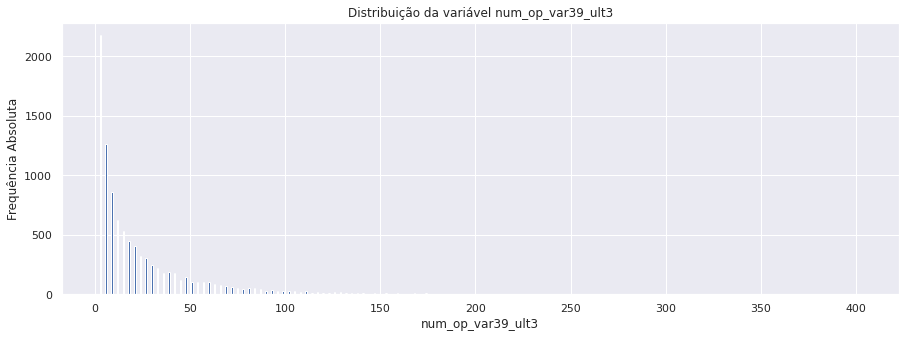


 Quantidade de valores únicos: 92
 Valores únicos: Int64Index([ 24,  48,  72,  96, 120, 144, 168, 192, 216, 240, 312,   9,  33,
             57,  81, 105, 129, 153, 177, 201, 225, 249, 321,  18,  42,  66,
             90, 114, 138, 162, 186, 306, 402,   3,  27,  51,  75,  99, 123,
            147, 171, 195, 267, 291, 363,  12,  36,  60,  84, 108, 132, 156,
            180, 204, 228, 252, 276,  21,  45,  69,  93, 117, 141, 165, 189,
            213, 237, 309,   6,  30,  54,  78, 102, 126, 150, 174, 222, 270,
            318,  15,  39,  63,  87, 111, 135, 159, 183, 207, 231, 279, 351,
            399],
           dtype='int64')



24     323
48     144
72      60
96      31
120     13
      ... 
207      1
231      1
279      1
351      1
399      1
Name: num_op_var39_ult3, Length: 92, dtype: int64

24     0.033444
48     0.014910
72     0.006212
96     0.003210
120    0.001346
         ...   
207    0.000104
231    0.000104
279    0.000104
351    0.000104
399    0.000104
Name: num_op_var39_ult3, Length: 92, dtype: float64

% de zeros: 0.8185064080880972





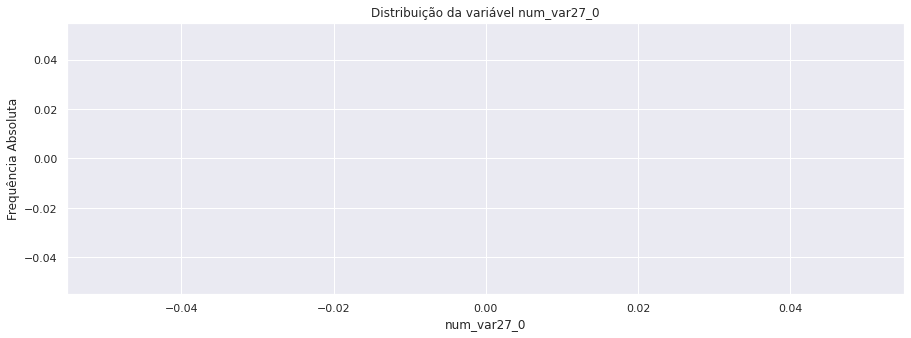


 Quantidade de valores únicos: 0
 Valores únicos: Int64Index([], dtype='int64')



Series([], Name: num_var27_0, dtype: int64)

Series([], Name: num_var27_0, dtype: float64)

% de zeros: 1.0





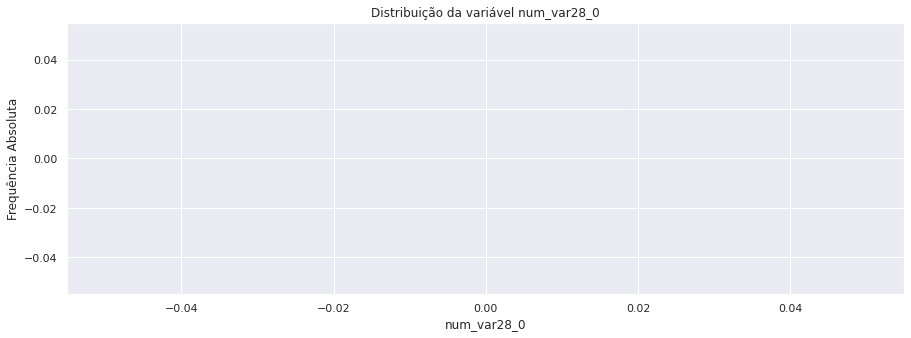


 Quantidade de valores únicos: 0
 Valores únicos: Int64Index([], dtype='int64')



Series([], Name: num_var28_0, dtype: int64)

Series([], Name: num_var28_0, dtype: float64)

% de zeros: 1.0





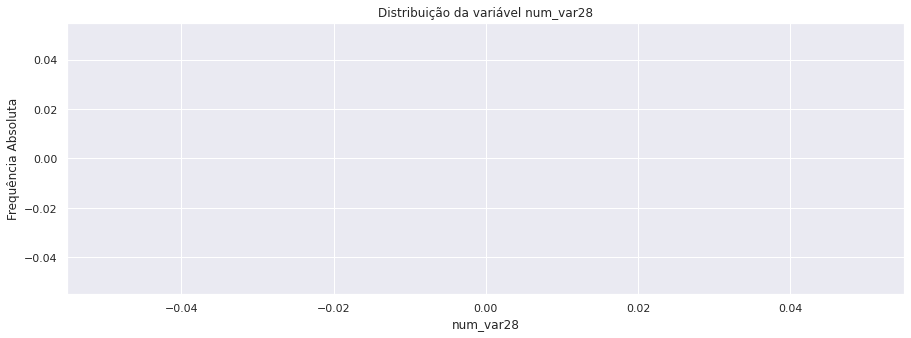


 Quantidade de valores únicos: 0
 Valores únicos: Int64Index([], dtype='int64')



Series([], Name: num_var28, dtype: int64)

Series([], Name: num_var28, dtype: float64)

% de zeros: 1.0





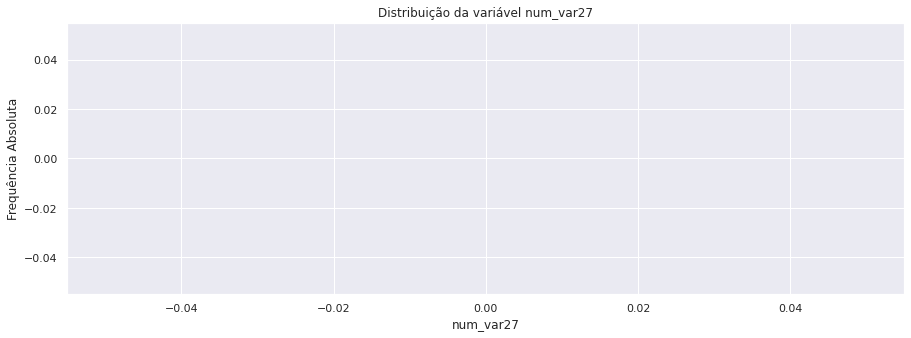


 Quantidade de valores únicos: 0
 Valores únicos: Int64Index([], dtype='int64')



Series([], Name: num_var27, dtype: int64)

Series([], Name: num_var27, dtype: float64)

% de zeros: 1.0



num_var29_0
Não existe variância!
Variável num_var29_0 não está contida na variável features.
% de zeros: 0.9998872477167663



num_var29
Não existe variância!
Variável num_var29 não está contida na variável features.
% de zeros: 0.9999624159055888





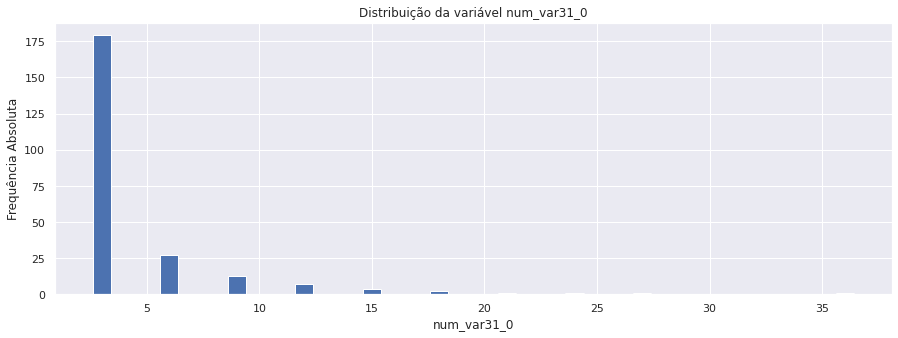


 Quantidade de valores únicos: 10
 Valores únicos: Int64Index([3, 6, 9, 12, 15, 18, 21, 24, 27, 36], dtype='int64')



3     179
6      27
9      13
12      7
15      4
18      2
21      1
24      1
27      1
36      1
Name: num_var31_0, dtype: int64

3     0.758475
6     0.114407
9     0.055085
12    0.029661
15    0.016949
18    0.008475
21    0.004237
24    0.004237
27    0.004237
36    0.004237
Name: num_var31_0, dtype: float64

% de zeros: 0.995565076859473





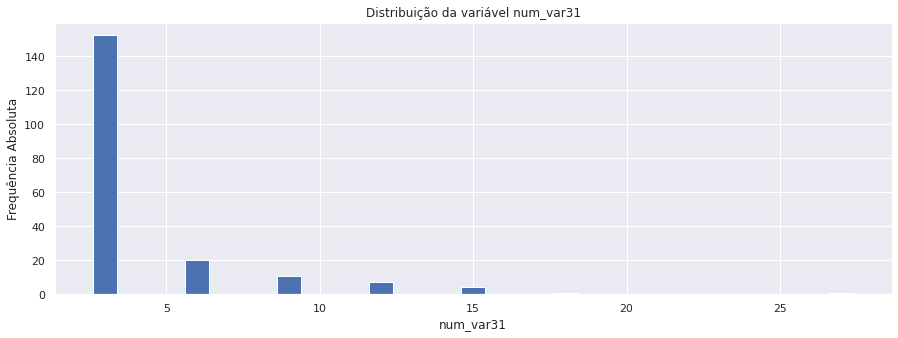


 Quantidade de valores únicos: 7
 Valores únicos: Int64Index([3, 6, 9, 12, 15, 18, 27], dtype='int64')



3     152
6      20
9      11
12      7
15      4
18      1
27      1
Name: num_var31, dtype: int64

3     0.775510
6     0.102041
9     0.056122
12    0.035714
15    0.020408
18    0.005102
27    0.005102
Name: num_var31, dtype: float64

% de zeros: 0.996316758747698





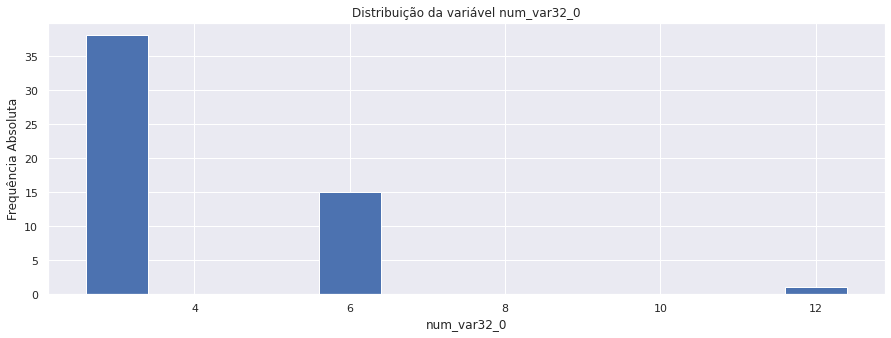


 Quantidade de valores únicos: 3
 Valores únicos: Int64Index([3, 6, 12], dtype='int64')



3     38
6     15
12     1
Name: num_var32_0, dtype: int64

3     0.703704
6     0.277778
12    0.018519
Name: num_var32_0, dtype: float64

% de zeros: 0.9989852294508964





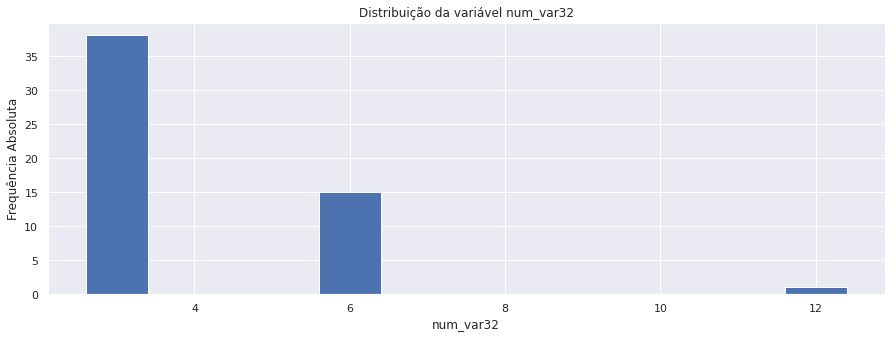


 Quantidade de valores únicos: 3
 Valores únicos: Int64Index([3, 6, 12], dtype='int64')



3     38
6     15
12     1
Name: num_var32, dtype: int64

3     0.703704
6     0.277778
12    0.018519
Name: num_var32, dtype: float64

% de zeros: 0.9989852294508964





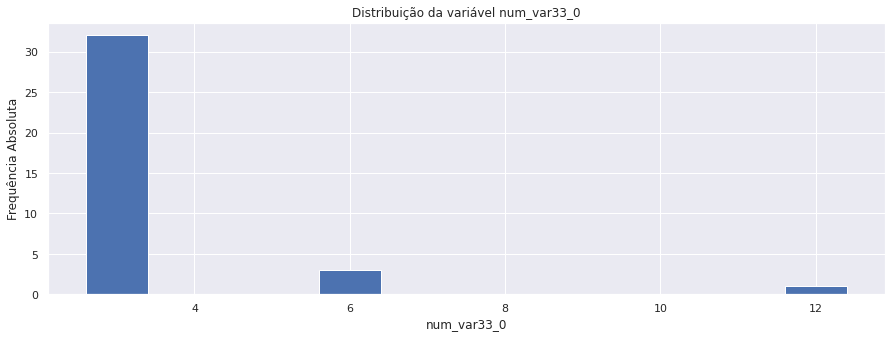


 Quantidade de valores únicos: 3
 Valores únicos: Int64Index([3, 6, 12], dtype='int64')



3     32
6      3
12     1
Name: num_var33_0, dtype: int64

3     0.888889
6     0.083333
12    0.027778
Name: num_var33_0, dtype: float64

% de zeros: 0.9993234863005976





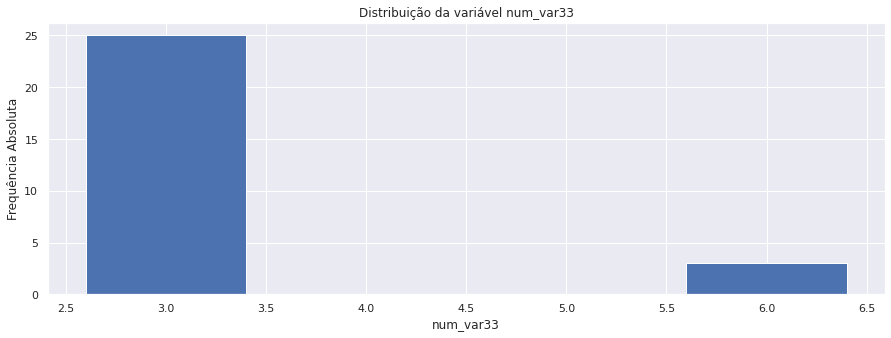


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([3, 6], dtype='int64')



3    25
6     3
Name: num_var33, dtype: int64

3    0.892857
6    0.107143
Name: num_var33, dtype: float64

% de zeros: 0.9994738226782426



num_var34_0
Não existe variância!
Variável num_var34_0 não está contida na variável features.
% de zeros: 0.9999812079527943



num_var34
Não existe variância!
Variável num_var34 não está contida na variável features.
% de zeros: 0.9999812079527943





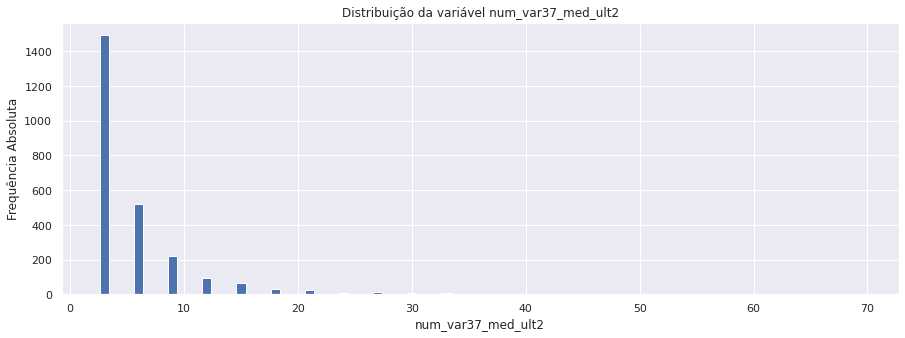


 Quantidade de valores únicos: 17
 Valores únicos: Int64Index([6, 12, 18, 24, 30, 36, 48, 3, 9, 15, 21, 27, 33, 45, 51, 57, 69], dtype='int64')



6      520
12      92
18      31
24       6
30       6
36       3
48       1
3     1490
9      220
15      63
21      23
27      11
33       6
45       1
51       1
57       1
69       1
Name: num_var37_med_ult2, dtype: int64

6     0.210016
12    0.037157
18    0.012520
24    0.002423
30    0.002423
36    0.001212
48    0.000404
3     0.601777
9     0.088853
15    0.025444
21    0.009289
27    0.004443
33    0.002423
45    0.000404
51    0.000404
57    0.000404
69    0.000404
Name: num_var37_med_ult2, dtype: float64

% de zeros: 0.9534708911188785





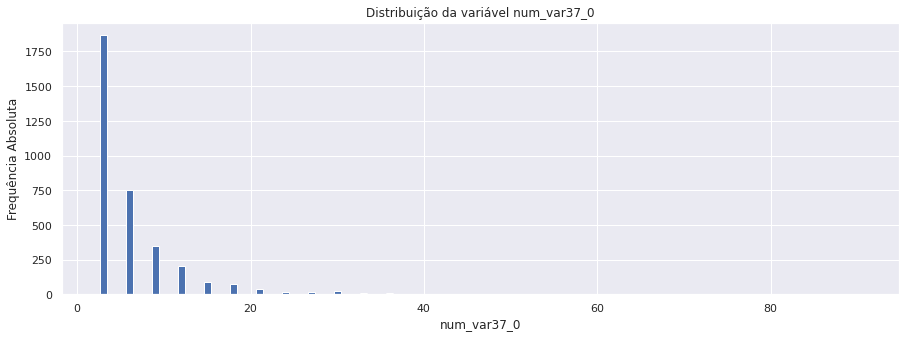


 Quantidade de valores únicos: 19
 Valores únicos: Int64Index([6, 12, 18, 24, 30, 36, 42, 54, 72, 90, 3, 9, 15, 21, 27, 33, 39,
            45, 63],
           dtype='int64')



6      755
12     203
18      74
24      18
30      24
36      11
42       3
54       1
72       1
90       1
3     1865
9      347
15      88
21      39
27      17
33       8
39       4
45       1
63       1
Name: num_var37_0, dtype: int64

6     0.218145
12    0.058654
18    0.021381
24    0.005201
30    0.006934
36    0.003178
42    0.000867
54    0.000289
72    0.000289
90    0.000289
3     0.538862
9     0.100260
15    0.025426
21    0.011268
27    0.004912
33    0.002311
39    0.001156
45    0.000289
63    0.000289
Name: num_var37_0, dtype: float64

% de zeros: 0.9349607246213403





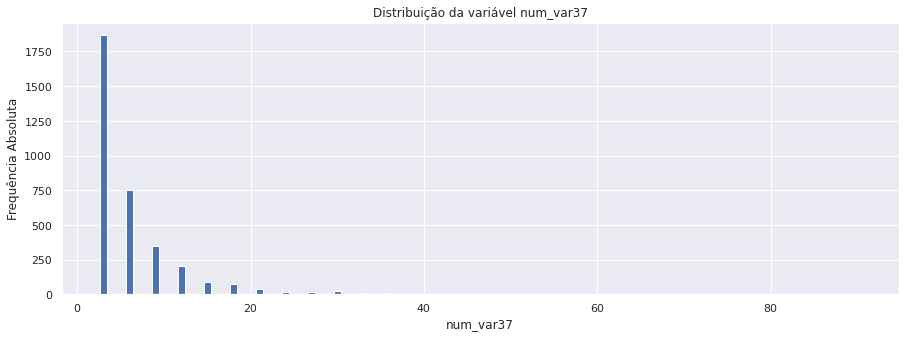


 Quantidade de valores únicos: 19
 Valores únicos: Int64Index([6, 12, 18, 24, 30, 36, 42, 54, 72, 90, 3, 9, 15, 21, 27, 33, 39,
            45, 63],
           dtype='int64')



6      755
12     203
18      74
24      18
30      24
36      11
42       3
54       1
72       1
90       1
3     1865
9      347
15      88
21      39
27      17
33       8
39       4
45       1
63       1
Name: num_var37, dtype: int64

6     0.218145
12    0.058654
18    0.021381
24    0.005201
30    0.006934
36    0.003178
42    0.000867
54    0.000289
72    0.000289
90    0.000289
3     0.538862
9     0.100260
15    0.025426
21    0.011268
27    0.004912
33    0.002311
39    0.001156
45    0.000289
63    0.000289
Name: num_var37, dtype: float64

% de zeros: 0.9349607246213403





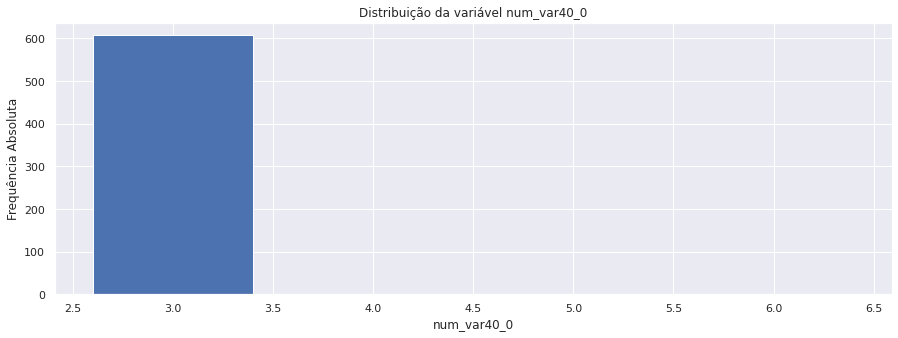


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([3, 6], dtype='int64')



3    607
6      1
Name: num_var40_0, dtype: int64

3    0.998355
6    0.001645
Name: num_var40_0, dtype: float64

% de zeros: 0.9885744352989815



num_var40
Não existe variância!
Variável num_var40 não está contida na variável features.
% de zeros: 0.9963731348893149





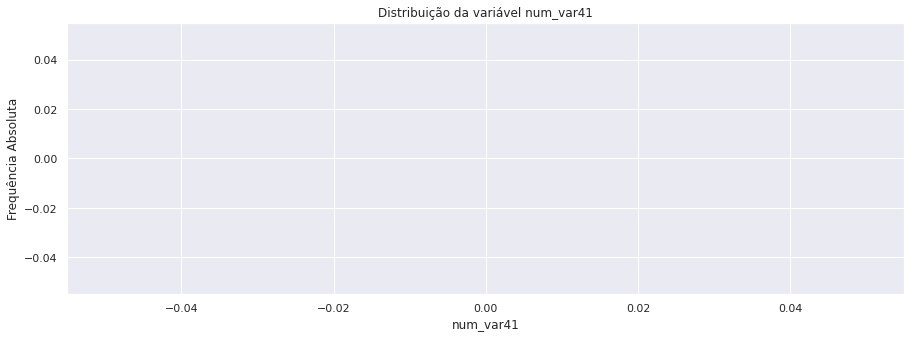


 Quantidade de valores únicos: 0
 Valores únicos: Int64Index([], dtype='int64')



Series([], Name: num_var41, dtype: int64)

Series([], Name: num_var41, dtype: float64)

% de zeros: 1.0



num_var39
Não existe variância!
Variável num_var39 não está contida na variável features.
% de zeros: 0.9963731348893149





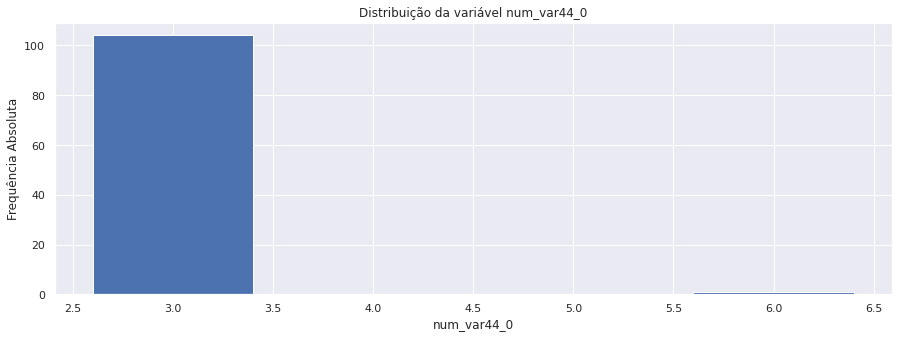


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([3, 6], dtype='int64')



3    104
6      1
Name: num_var44_0, dtype: int64

3    0.990476
6    0.009524
Name: num_var44_0, dtype: float64

% de zeros: 0.9980268350434096



num_var44
Não existe variância!
Variável num_var44 não está contida na variável features.
% de zeros: 0.9982335475626715





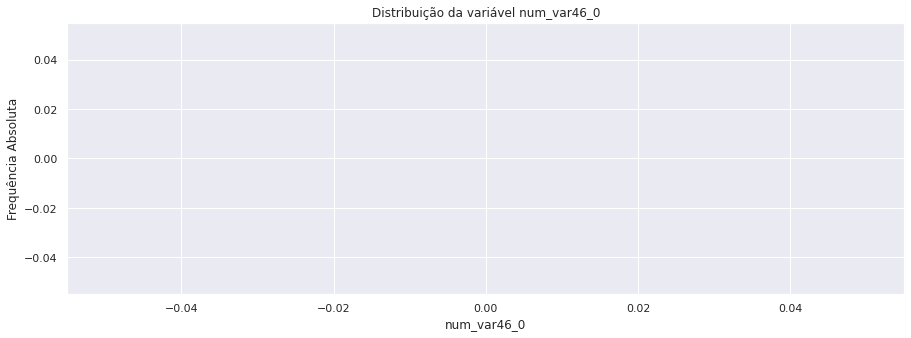


 Quantidade de valores únicos: 0
 Valores únicos: Int64Index([], dtype='int64')



Series([], Name: num_var46_0, dtype: int64)

Series([], Name: num_var46_0, dtype: float64)

% de zeros: 1.0





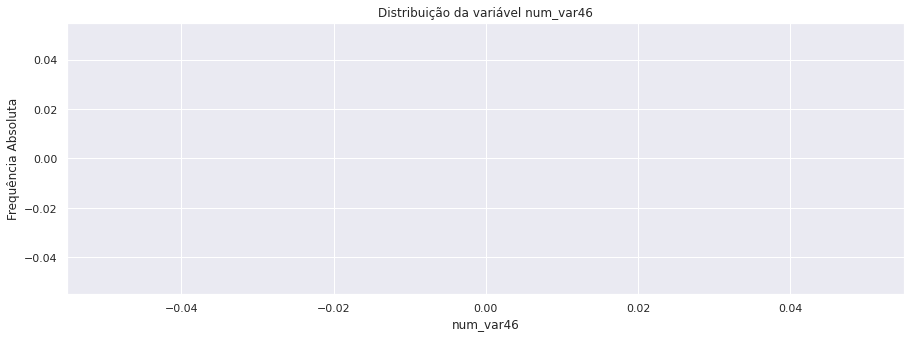


 Quantidade de valores únicos: 0
 Valores únicos: Int64Index([], dtype='int64')



Series([], Name: num_var46, dtype: int64)

Series([], Name: num_var46, dtype: float64)

% de zeros: 1.0





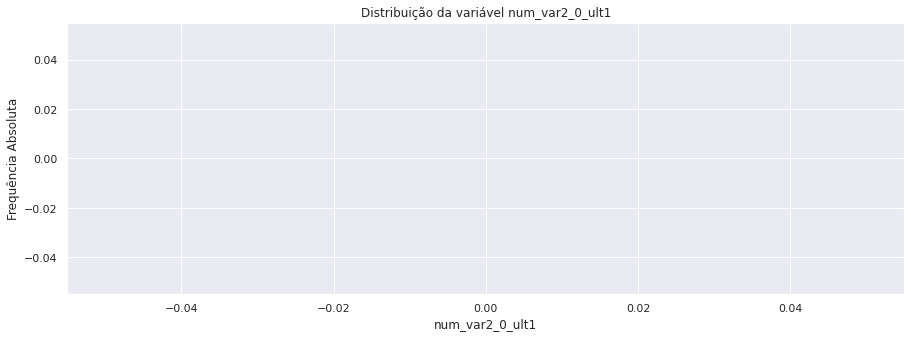


 Quantidade de valores únicos: 0
 Valores únicos: Int64Index([], dtype='int64')



Series([], Name: num_var2_0_ult1, dtype: int64)

Series([], Name: num_var2_0_ult1, dtype: float64)

% de zeros: 1.0





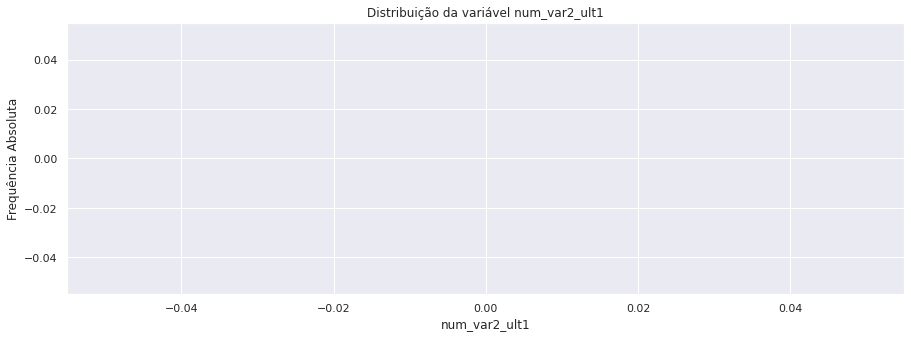


 Quantidade de valores únicos: 0
 Valores únicos: Int64Index([], dtype='int64')



Series([], Name: num_var2_ult1, dtype: int64)

Series([], Name: num_var2_ult1, dtype: float64)

% de zeros: 1.0





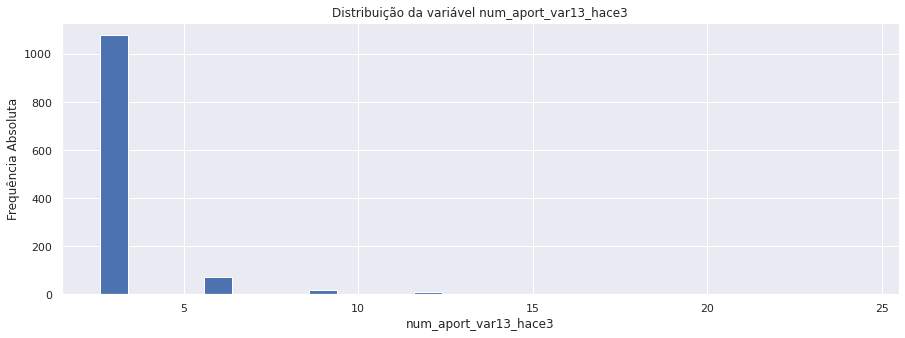


 Quantidade de valores únicos: 6
 Valores únicos: Int64Index([3, 6, 9, 12, 18, 24], dtype='int64')



3     1076
6       72
9       18
12      10
18       2
24       2
Name: num_aport_var13_hace3, dtype: int64

3     0.911864
6     0.061017
9     0.015254
12    0.008475
18    0.001695
24    0.001695
Name: num_aport_var13_hace3, dtype: float64

% de zeros: 0.9778253842973653





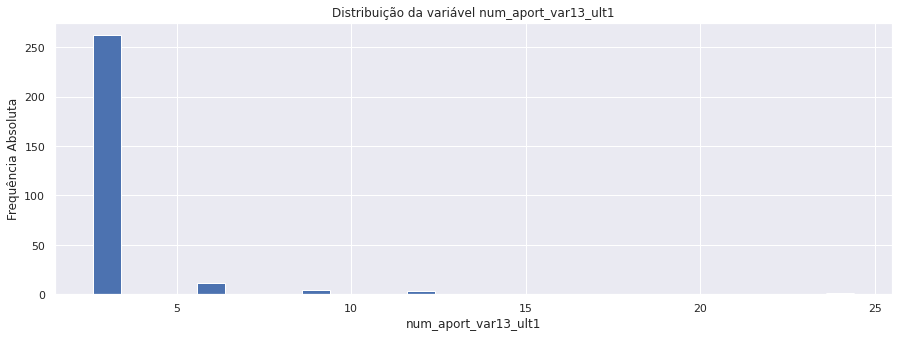


 Quantidade de valores únicos: 5
 Valores únicos: Int64Index([3, 6, 9, 12, 24], dtype='int64')



3     262
6      11
9       4
12      3
24      1
Name: num_aport_var13_ult1, dtype: int64

3     0.932384
6     0.039146
9     0.014235
12    0.010676
24    0.003559
Name: num_aport_var13_ult1, dtype: float64

% de zeros: 0.9947194347352201





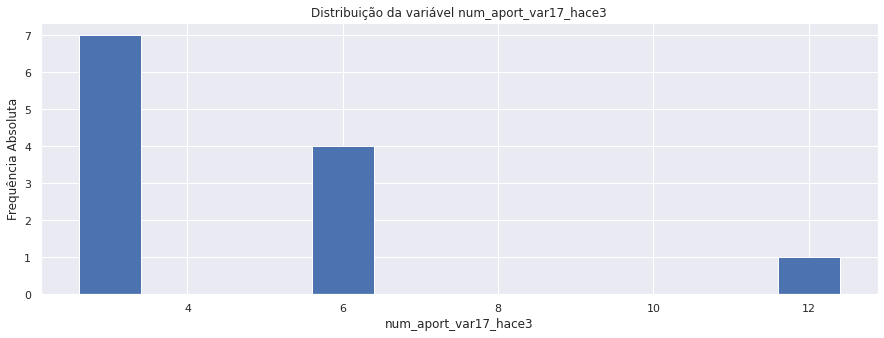


 Quantidade de valores únicos: 3
 Valores únicos: Int64Index([3, 6, 12], dtype='int64')



3     7
6     4
12    1
Name: num_aport_var17_hace3, dtype: int64

3     0.583333
6     0.333333
12    0.083333
Name: num_aport_var17_hace3, dtype: float64

% de zeros: 0.9997744954335326





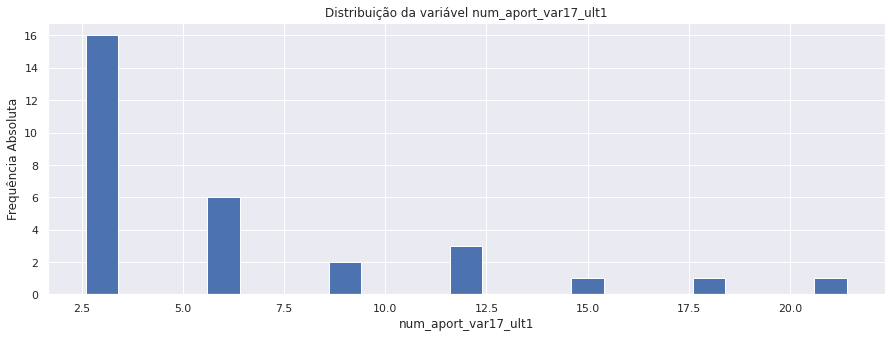


 Quantidade de valores únicos: 7
 Valores únicos: Int64Index([3, 6, 9, 12, 15, 18, 21], dtype='int64')



3     16
6      6
9      2
12     3
15     1
18     1
21     1
Name: num_aport_var17_ult1, dtype: int64

3     0.533333
6     0.200000
9     0.066667
12    0.100000
15    0.033333
18    0.033333
21    0.033333
Name: num_aport_var17_ult1, dtype: float64

% de zeros: 0.9994362385838313



num_aport_var33_hace3
Não existe variância!
Variável num_aport_var33_hace3 não está contida na variável features.
% de zeros: 0.9998120795279438



num_aport_var33_ult1
Não existe variância!
Variável num_aport_var33_ult1 não está contida na variável features.
% de zeros: 0.9999436238583831



num_var7_emit_ult1
Não existe variância!
Variável num_var7_emit_ult1 não está contida na variável features.
% de zeros: 0.9999624159055888





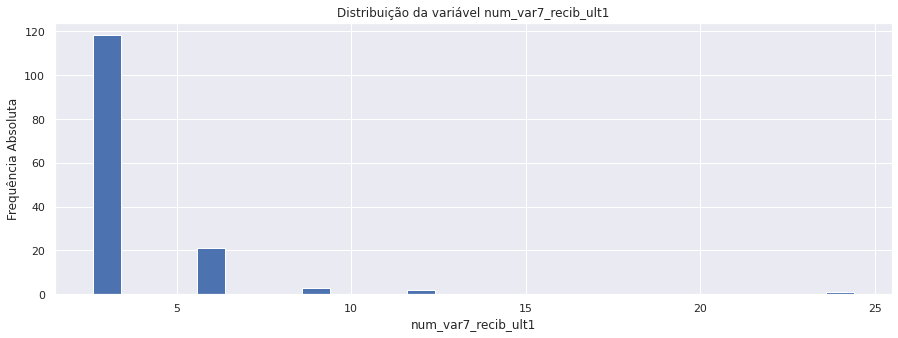


 Quantidade de valores únicos: 5
 Valores únicos: Int64Index([3, 6, 9, 12, 24], dtype='int64')



3     118
6      21
9       3
12      2
24      1
Name: num_var7_recib_ult1, dtype: int64

3     0.813793
6     0.144828
9     0.020690
12    0.013793
24    0.006897
Name: num_var7_recib_ult1, dtype: float64

% de zeros: 0.9972751531551848





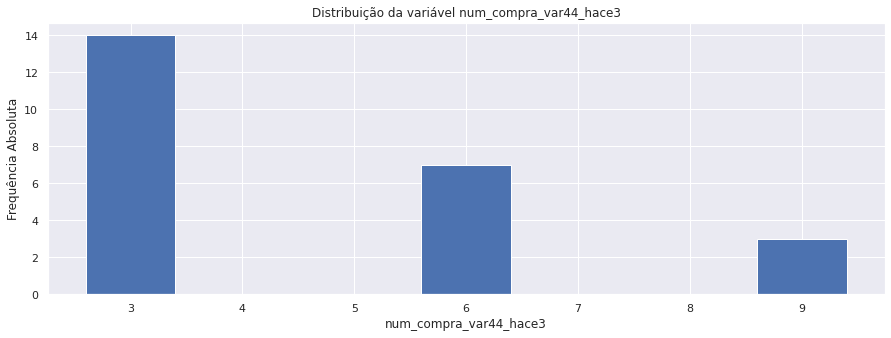


 Quantidade de valores únicos: 3
 Valores únicos: Int64Index([3, 6, 9], dtype='int64')



3    14
6     7
9     3
Name: num_compra_var44_hace3, dtype: int64

3    0.583333
6    0.291667
9    0.125000
Name: num_compra_var44_hace3, dtype: float64

% de zeros: 0.9995489908670651





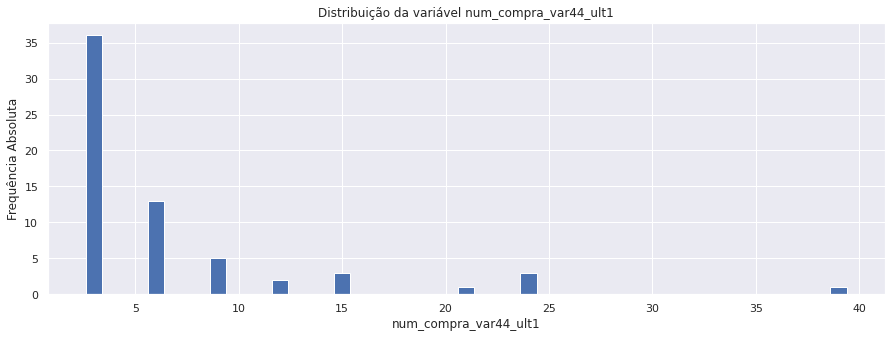


 Quantidade de valores únicos: 8
 Valores únicos: Int64Index([3, 6, 9, 12, 15, 21, 24, 39], dtype='int64')



3     36
6     13
9      5
12     2
15     3
21     1
24     3
39     1
Name: num_compra_var44_ult1, dtype: int64

3     0.562500
6     0.203125
9     0.078125
12    0.031250
15    0.046875
21    0.015625
24    0.046875
39    0.015625
Name: num_compra_var44_ult1, dtype: float64

% de zeros: 0.9987973089788401





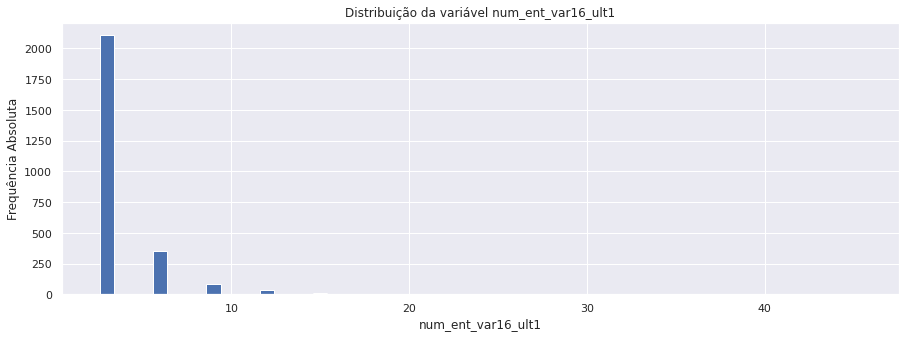


 Quantidade de valores únicos: 11
 Valores únicos: Int64Index([6, 12, 18, 24, 30, 3, 9, 15, 21, 27, 45], dtype='int64')



6      350
12      36
18       2
24       1
30       2
3     2105
9       82
15      10
21       2
27       2
45       1
Name: num_ent_var16_ult1, dtype: int64

6     0.134979
12    0.013884
18    0.000771
24    0.000386
30    0.000771
3     0.811801
9     0.031624
15    0.003857
21    0.000771
27    0.000771
45    0.000386
Name: num_ent_var16_ult1, dtype: float64

% de zeros: 0.9512722215958207





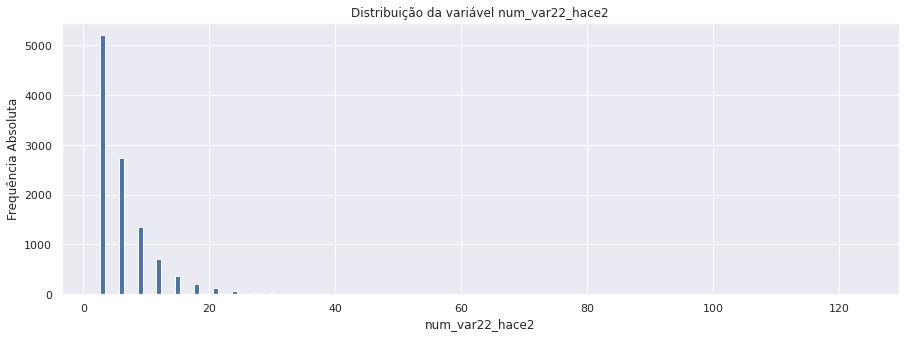


 Quantidade de valores únicos: 20
 Valores únicos: Int64Index([24, 48, 9, 33, 18, 42, 3, 27, 99, 123, 12, 36, 21, 45, 6, 30, 54,
            15, 39, 63],
           dtype='int64')



24       73
48        2
9      1354
33       12
18      199
42        6
3      5195
27       34
99        2
123       1
12      718
36        6
21      123
45        5
6      2739
30       20
54        1
15      377
39        4
63        1
Name: num_var22_hace2, dtype: int64

24     0.006714
48     0.000184
9      0.124540
33     0.001104
18     0.018304
42     0.000552
3      0.477833
27     0.003127
99     0.000184
123    0.000092
12     0.066041
36     0.000552
21     0.011313
45     0.000460
6      0.251932
30     0.001840
54     0.000092
15     0.034676
39     0.000368
63     0.000092
Name: num_var22_hace2, dtype: float64

% de zeros: 0.7956928627804714





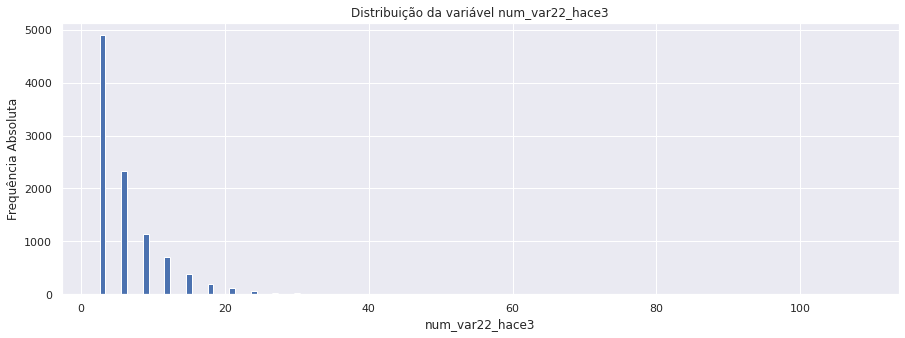


 Quantidade de valores únicos: 18
 Valores únicos: Int64Index([24, 48, 9, 33, 18, 42, 3, 27, 51, 12, 36, 108, 21, 45, 6, 30, 15,
            39],
           dtype='int64')



24       57
48        3
9      1139
33        6
18      191
42        2
3      4891
27       32
51        2
12      712
36        4
108       1
21      115
45        1
6      2333
30       16
15      387
39        2
Name: num_var22_hace3, dtype: int64

24     0.005761
48     0.000303
9      0.115120
33     0.000606
18     0.019305
42     0.000202
3      0.494340
27     0.003234
51     0.000202
12     0.071963
36     0.000404
108    0.000101
21     0.011623
45     0.000101
6      0.235799
30     0.001617
15     0.039115
39     0.000202
Name: num_var22_hace3, dtype: float64

% de zeros: 0.8140714849475702





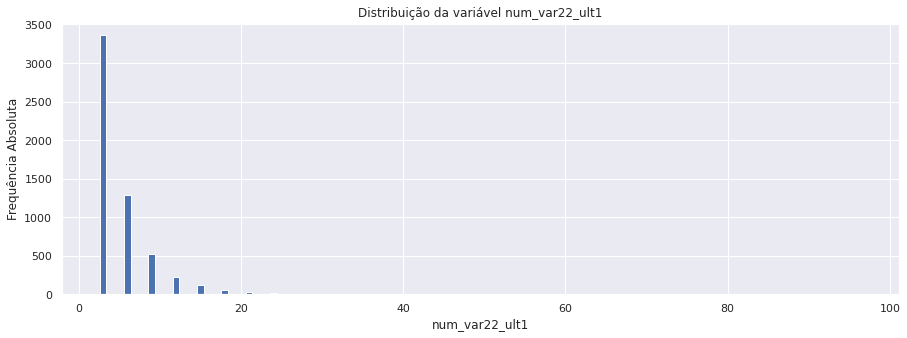


 Quantidade de valores únicos: 15
 Valores únicos: Int64Index([12, 24, 36, 48, 96, 9, 21, 33, 6, 18, 30, 42, 3, 15, 27], dtype='int64')



12     229
24      16
36       2
48       2
96       1
9      523
21      31
33       5
6     1289
18      59
30       6
42       1
3     3357
15     123
27       8
Name: num_var22_ult1, dtype: int64

12    0.040517
24    0.002831
36    0.000354
48    0.000354
96    0.000177
9     0.092534
21    0.005485
33    0.000885
6     0.228061
18    0.010439
30    0.001062
42    0.000177
3     0.593949
15    0.021762
27    0.001415
Name: num_var22_ult1, dtype: float64

% de zeros: 0.8937873491938212





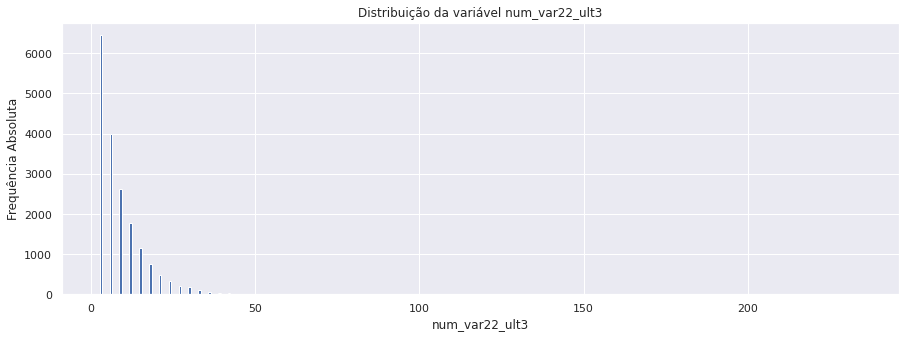


 Quantidade de valores únicos: 32
 Valores únicos: Int64Index([ 48, 144,  33,  81,  18,  66,   3,  51,  99,  36,  21,   6,  54,
            102,  39,  87,  24,  72,   9,  57,  42, 234,  27,  75,  12,  60,
             45,  93,  30,  15,  63, 159],
           dtype='int64')



48       17
144       1
33      109
81        3
18      754
66        4
3      6443
51       10
99        1
36       57
21      488
6      3990
54        6
102       1
39       32
87        1
24      343
72        2
9      2624
57        5
42       41
234       1
27      216
75        1
12     1786
60        5
45       19
93        2
30      182
15     1151
63        2
159       1
Name: num_var22_ult3, dtype: int64

48     0.000929
144    0.000055
33     0.005957
81     0.000164
18     0.041207
66     0.000219
3      0.352115
51     0.000547
99     0.000055
36     0.003115
21     0.026670
6      0.218057
54     0.000328
102    0.000055
39     0.001749
87     0.000055
24     0.018745
72     0.000109
9      0.143404
57     0.000273
42     0.002241
234    0.000055
27     0.011805
75     0.000055
12     0.097606
60     0.000273
45     0.001038
93     0.000109
30     0.009946
15     0.062903
63     0.000109
159    0.000055
Name: num_var22_ult3, dtype: float64

% de zeros: 0.656143120231518





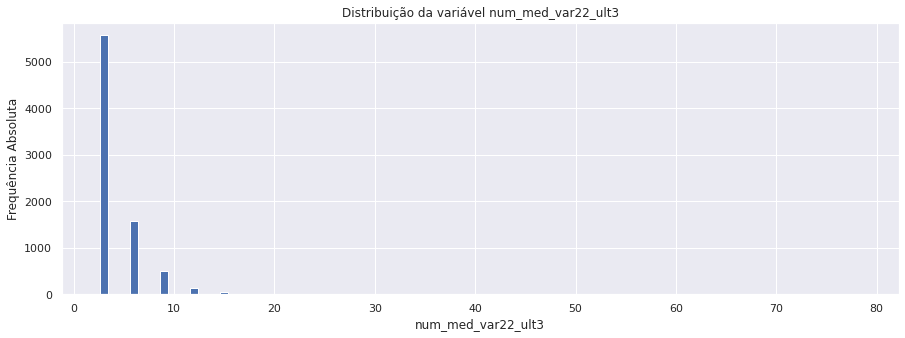


 Quantidade de valores únicos: 14
 Valores únicos: Int64Index([12, 24, 48, 9, 21, 33, 6, 18, 30, 78, 3, 15, 27, 51], dtype='int64')



12     130
24       3
48       1
9      507
21       6
33       2
6     1585
18      16
30       2
78       1
3     5561
15      46
27       4
51       1
Name: num_med_var22_ult3, dtype: int64

12    0.016529
24    0.000381
48    0.000127
9     0.064463
21    0.000763
33    0.000254
6     0.201526
18    0.002034
30    0.000254
78    0.000127
3     0.707057
15    0.005849
27    0.000509
51    0.000127
Name: num_med_var22_ult3, dtype: float64

% de zeros: 0.8522005487277784





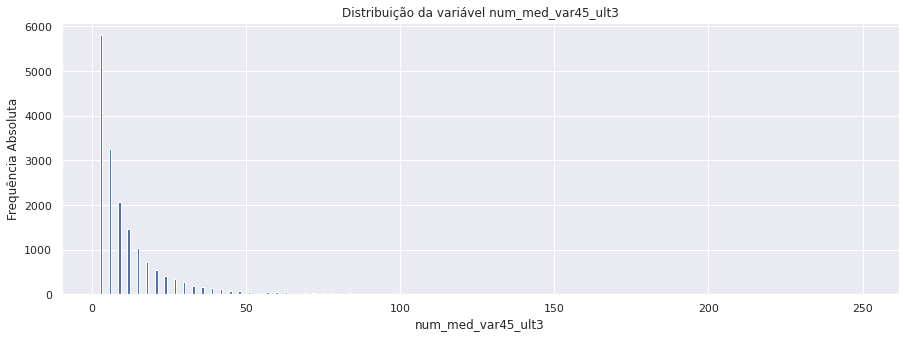


 Quantidade de valores únicos: 67
 Valores únicos: Int64Index([ 48,  96, 192, 240,  33,  81, 129,  18,  66, 114, 162, 210,   3,
             51,  99, 147,  36,  84, 132, 180, 228,  21,  69, 117, 165, 213,
              6,  54, 102, 198,  39,  87, 135, 183,  24,  72, 120, 216,   9,
             57, 105, 153, 201, 249,  42,  90, 138, 186,  27,  75, 123,  12,
             60, 108, 156,  45,  93, 141, 189,  30,  78, 126, 174,  15,  63,
            111, 159],
           dtype='int64')



48       84
96        8
192       2
240       1
33      182
       ... 
174       2
15     1031
63       42
111       6
159       2
Name: num_med_var45_ult3, Length: 67, dtype: int64

48     0.004881
96     0.000465
192    0.000116
240    0.000058
33     0.010576
         ...   
174    0.000116
15     0.059914
63     0.002441
111    0.000349
159    0.000116
Name: num_med_var45_ult3, Length: 67, dtype: float64

% de zeros: 0.6766264516856466





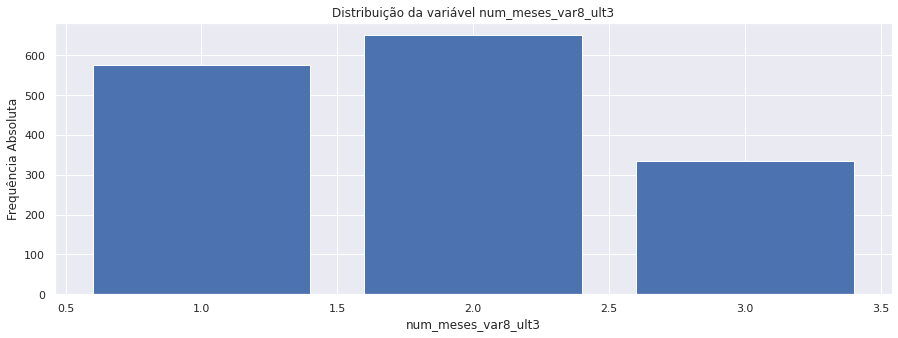


 Quantidade de valores únicos: 3
 Valores únicos: Int64Index([1, 2, 3], dtype='int64')



1    575
2    649
3    333
Name: num_meses_var8_ult3, dtype: int64

1    0.369300
2    0.416827
3    0.213873
Name: num_meses_var8_ult3, dtype: float64

% de zeros: 0.9707407825008456





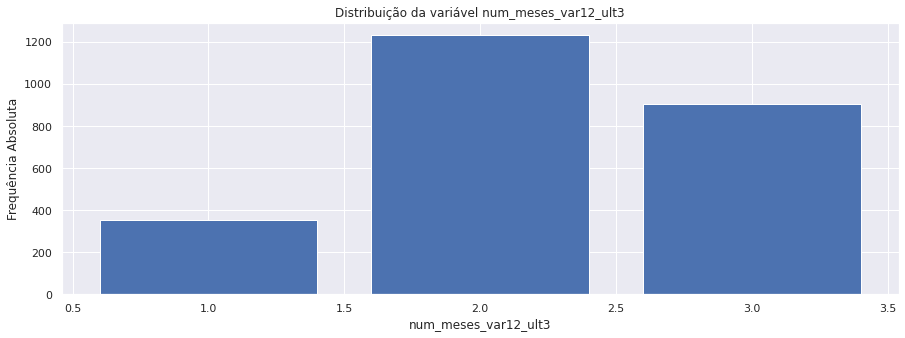


 Quantidade de valores únicos: 3
 Valores únicos: Int64Index([2, 1, 3], dtype='int64')



2    1229
1     353
3     904
Name: num_meses_var12_ult3, dtype: int64

2    0.494368
1    0.141995
3    0.363636
Name: num_meses_var12_ult3, dtype: float64

% de zeros: 0.9532829706468222





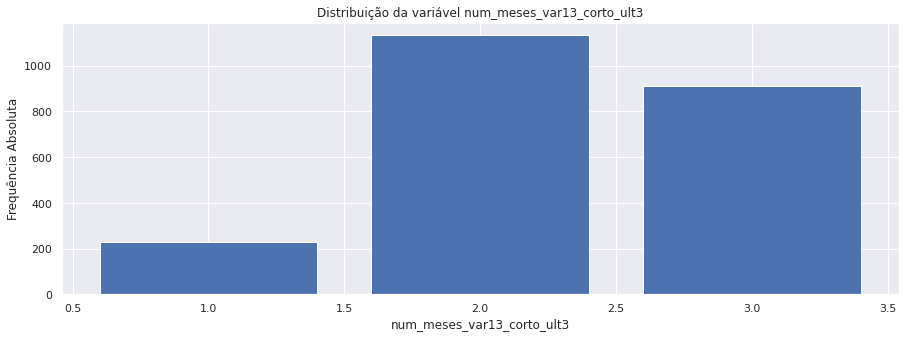


 Quantidade de valores únicos: 3
 Valores únicos: Int64Index([2, 1, 3], dtype='int64')



2    1132
1     229
3     913
Name: num_meses_var13_corto_ult3, dtype: int64

2    0.497801
1    0.100704
3    0.401495
Name: num_meses_var13_corto_ult3, dtype: float64

% de zeros: 0.9572668846544142





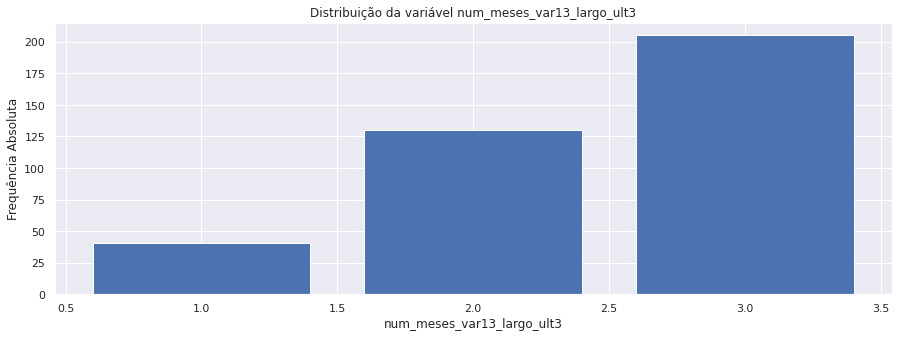


 Quantidade de valores únicos: 3
 Valores únicos: Int64Index([1, 2, 3], dtype='int64')



1     41
2    130
3    205
Name: num_meses_var13_largo_ult3, dtype: int64

1    0.109043
2    0.345745
3    0.545213
Name: num_meses_var13_largo_ult3, dtype: float64

% de zeros: 0.9929341902506859



num_meses_var13_medio_ult3
Não existe variância!
Variável num_meses_var13_medio_ult3 não está contida na variável features.
% de zeros: 0.9999624159055888





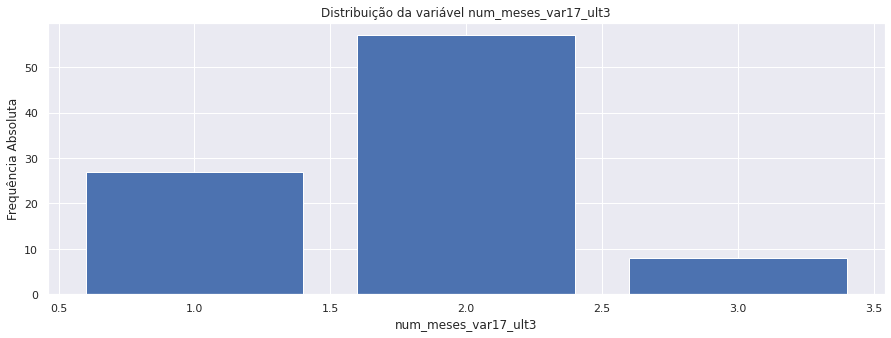


 Quantidade de valores únicos: 3
 Valores únicos: Int64Index([1, 2, 3], dtype='int64')



1    27
2    57
3     8
Name: num_meses_var17_ult3, dtype: int64

1    0.293478
2    0.619565
3    0.086957
Name: num_meses_var17_ult3, dtype: float64

% de zeros: 0.9982711316570827





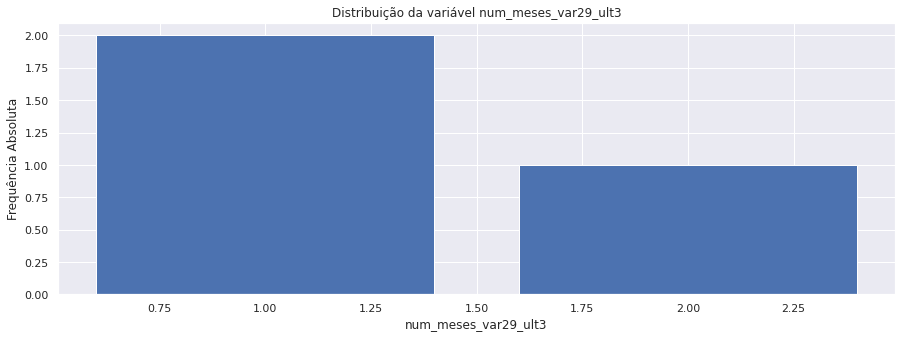


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([1, 2], dtype='int64')



1    2
2    1
Name: num_meses_var29_ult3, dtype: int64

1    0.666667
2    0.333333
Name: num_meses_var29_ult3, dtype: float64

% de zeros: 0.9999436238583831





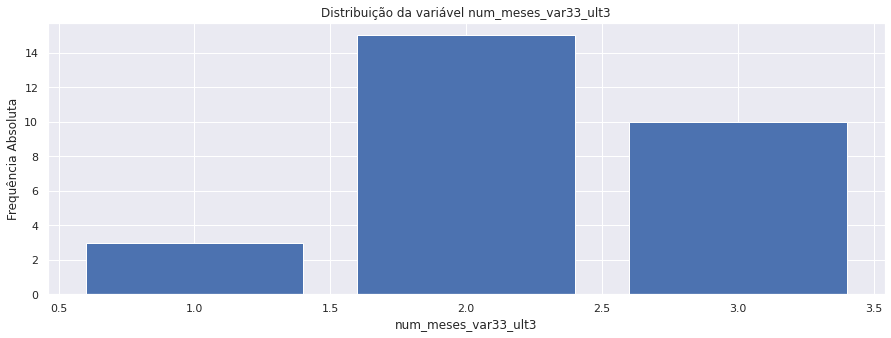


 Quantidade de valores únicos: 3
 Valores únicos: Int64Index([1, 2, 3], dtype='int64')



1     3
2    15
3    10
Name: num_meses_var33_ult3, dtype: int64

1    0.107143
2    0.535714
3    0.357143
Name: num_meses_var33_ult3, dtype: float64

% de zeros: 0.9994738226782426





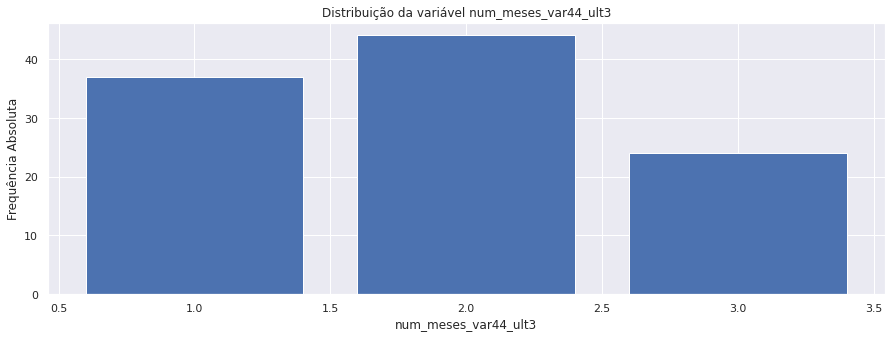


 Quantidade de valores únicos: 3
 Valores únicos: Int64Index([1, 2, 3], dtype='int64')



1    37
2    44
3    24
Name: num_meses_var44_ult3, dtype: int64

1    0.352381
2    0.419048
3    0.228571
Name: num_meses_var44_ult3, dtype: float64

% de zeros: 0.9980268350434096





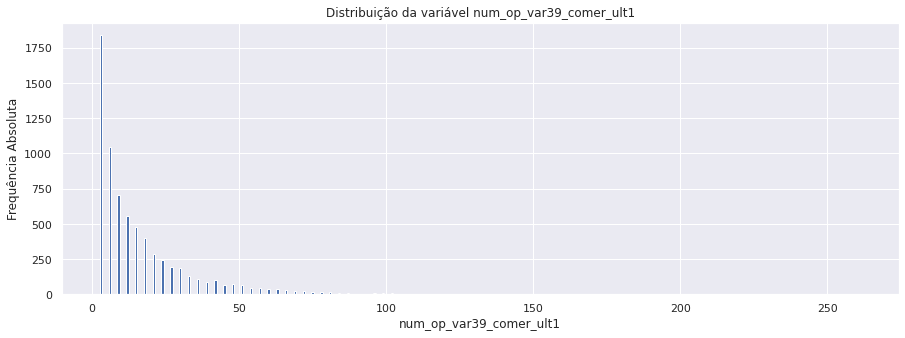


 Quantidade de valores únicos: 59
 Valores únicos: Int64Index([ 12,  24,  36,  48,  60,  72,  84,  96, 108, 120, 132, 180, 228,
              9,  21,  33,  45,  57,  69,  81,  93, 105, 117, 129, 141, 177,
            189, 261,   6,  18,  30,  42,  54,  66,  78,  90, 102, 114, 138,
            150, 174, 186,   3,  15,  27,  39,  51,  63,  75,  87,  99, 111,
            123, 135, 159, 171, 183, 195, 207],
           dtype='int64')



12      557
24      241
36      109
48       71
60       35
72       25
84        9
96        7
108       5
120       5
132       2
180       1
228       1
9       703
21      288
33      133
45       68
57       45
69       21
81       17
93        5
105       1
117       2
129       1
141       1
177       1
189       1
261       1
6      1043
18      400
30      183
42       99
54       43
66       27
78       17
90        3
102       8
114       3
138       2
150       1
174       1
186       1
3      1836
15      478
27      196
39       90
51       68
63       35
75       18
87        7
99        7
111       2
123       2
135       3
159       2
171       2
183       1
195       1
207       1
Name: num_op_var39_comer_ult1, dtype: int64

12     0.080306
24     0.034746
36     0.015715
48     0.010236
60     0.005046
72     0.003604
84     0.001298
96     0.001009
108    0.000721
120    0.000721
132    0.000288
180    0.000144
228    0.000144
9      0.101355
21     0.041522
33     0.019175
45     0.009804
57     0.006488
69     0.003028
81     0.002451
93     0.000721
105    0.000144
117    0.000288
129    0.000144
141    0.000144
177    0.000144
189    0.000144
261    0.000144
6      0.150375
18     0.057670
30     0.026384
42     0.014273
54     0.006200
66     0.003893
78     0.002451
90     0.000433
102    0.001153
114    0.000433
138    0.000288
150    0.000144
174    0.000144
186    0.000144
3      0.264706
15     0.068916
27     0.028258
39     0.012976
51     0.009804
63     0.005046
75     0.002595
87     0.001009
99     0.001009
111    0.000288
123    0.000288
135    0.000433
159    0.000288
171    0.000288
183    0.000144
195    0.000144
207    0.000144
Name: num_op_var39_comer_ult1, dtype: float64

% de zeros: 0.8696583605818018





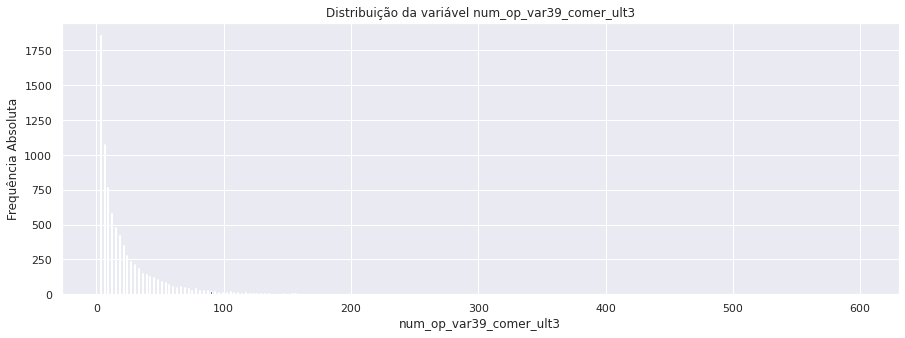


 Quantidade de valores únicos: 87
 Valores únicos: Int64Index([ 12,  24,  36,  48,  60,  72,  84,  96, 108, 120, 132, 144, 156,
            168, 180, 192, 204, 216, 228, 264, 360, 600,   9,  21,  33,  45,
             57,  69,  81,  93, 105, 117, 129, 141, 153, 165, 177, 201, 225,
            285, 309, 345, 393,   6,  18,  30,  42,  54,  66,  78,  90, 102,
            114, 126, 138, 150, 162, 174, 186, 198, 210, 234, 282, 330,   3,
             15,  27,  39,  51,  63,  75,  87,  99, 111, 123, 135, 147, 159,
            171, 183, 207, 219, 267, 279, 303, 315, 399],
           dtype='int64')



12     582
24     282
36     152
48     111
60      58
      ... 
267      1
279      1
303      1
315      1
399      1
Name: num_op_var39_comer_ult3, Length: 87, dtype: int64

12     0.071306
24     0.034550
36     0.018623
48     0.013600
60     0.007106
         ...   
267    0.000123
279    0.000123
303    0.000123
315    0.000123
399    0.000123
Name: num_op_var39_comer_ult3, Length: 87, dtype: float64

% de zeros: 0.8466193107077085





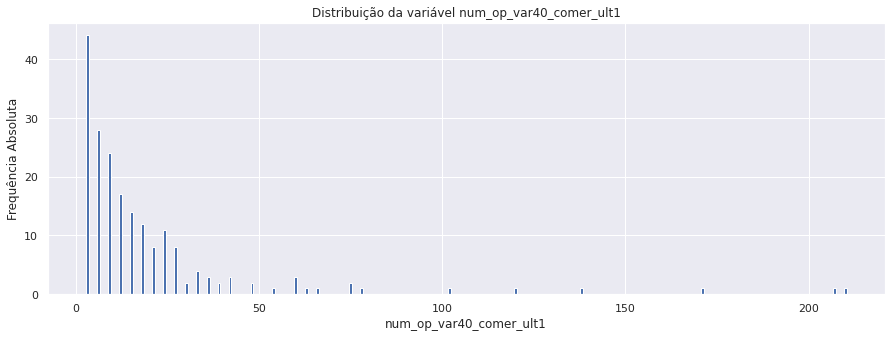


 Quantidade de valores únicos: 27
 Valores únicos: Int64Index([  3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33,  36,  39,
             42,  48,  54,  60,  63,  66,  75,  78, 102, 120, 138, 171, 207,
            210],
           dtype='int64')



3      44
6      28
9      24
12     17
15     14
18     12
21      8
24     11
27      8
30      2
33      4
36      3
39      2
42      3
48      2
54      1
60      3
63      1
66      1
75      2
78      1
102     1
120     1
138     1
171     1
207     1
210     1
Name: num_op_var40_comer_ult1, dtype: int64

3      0.223350
6      0.142132
9      0.121827
12     0.086294
15     0.071066
18     0.060914
21     0.040609
24     0.055838
27     0.040609
30     0.010152
33     0.020305
36     0.015228
39     0.010152
42     0.015228
48     0.010152
54     0.005076
60     0.015228
63     0.005076
66     0.005076
75     0.010152
78     0.005076
102    0.005076
120    0.005076
138    0.005076
171    0.005076
207    0.005076
210    0.005076
Name: num_op_var40_comer_ult1, dtype: float64

% de zeros: 0.9962979667004923





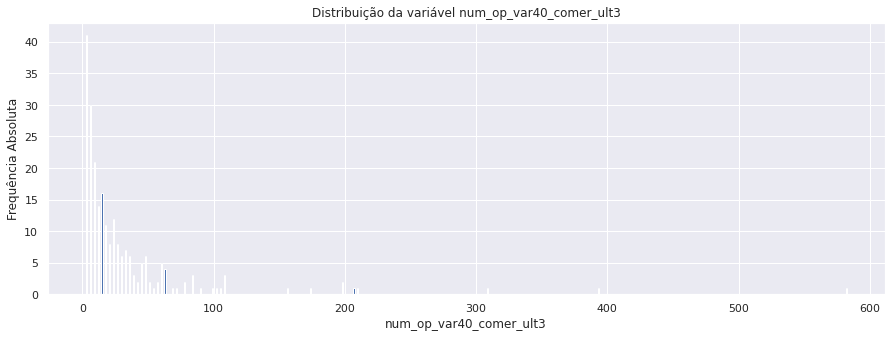


 Quantidade de valores únicos: 38
 Valores únicos: Int64Index([  3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33,  36,  39,
             42,  45,  48,  51, 309,  54,  57,  60,  63,  69, 582,  72,  78,
             84,  90,  99, 102, 105, 108, 393, 156, 174, 198, 207, 210],
           dtype='int64')



3      41
6      30
9      21
12     14
15     16
18     11
21      8
24     12
27      8
30      6
33      7
36      6
39      3
42      2
45      5
48      6
51      2
309     1
54      1
57      2
60      5
63      4
69      1
582     1
72      1
78      2
84      3
90      1
99      1
102     1
105     1
108     3
393     1
156     1
174     1
198     2
207     1
210     1
Name: num_op_var40_comer_ult3, dtype: int64

3      0.175966
6      0.128755
9      0.090129
12     0.060086
15     0.068670
18     0.047210
21     0.034335
24     0.051502
27     0.034335
30     0.025751
33     0.030043
36     0.025751
39     0.012876
42     0.008584
45     0.021459
48     0.025751
51     0.008584
309    0.004292
54     0.004292
57     0.008584
60     0.021459
63     0.017167
69     0.004292
582    0.004292
72     0.004292
78     0.008584
84     0.012876
90     0.004292
99     0.004292
102    0.004292
105    0.004292
108    0.012876
393    0.004292
156    0.004292
174    0.004292
198    0.008584
207    0.004292
210    0.004292
Name: num_op_var40_comer_ult3, dtype: float64

% de zeros: 0.99562145300109





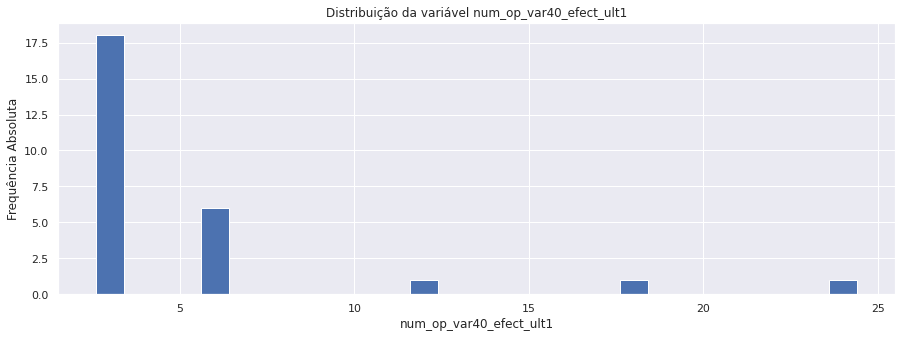


 Quantidade de valores únicos: 5
 Valores únicos: Int64Index([3, 6, 12, 18, 24], dtype='int64')



3     18
6      6
12     1
18     1
24     1
Name: num_op_var40_efect_ult1, dtype: int64

3     0.666667
6     0.222222
12    0.037037
18    0.037037
24    0.037037
Name: num_op_var40_efect_ult1, dtype: float64

% de zeros: 0.9994926147254481





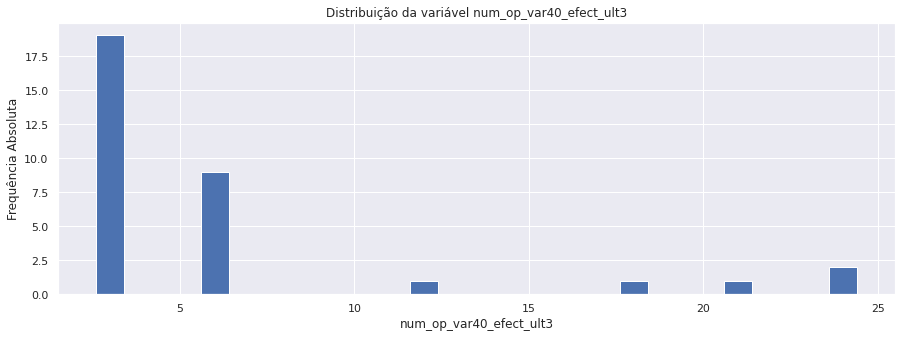


 Quantidade de valores únicos: 6
 Valores únicos: Int64Index([3, 6, 12, 18, 21, 24], dtype='int64')



3     19
6      9
12     1
18     1
21     1
24     2
Name: num_op_var40_efect_ult3, dtype: int64

3     0.575758
6     0.272727
12    0.030303
18    0.030303
21    0.030303
24    0.060606
Name: num_op_var40_efect_ult3, dtype: float64

% de zeros: 0.9993798624422144





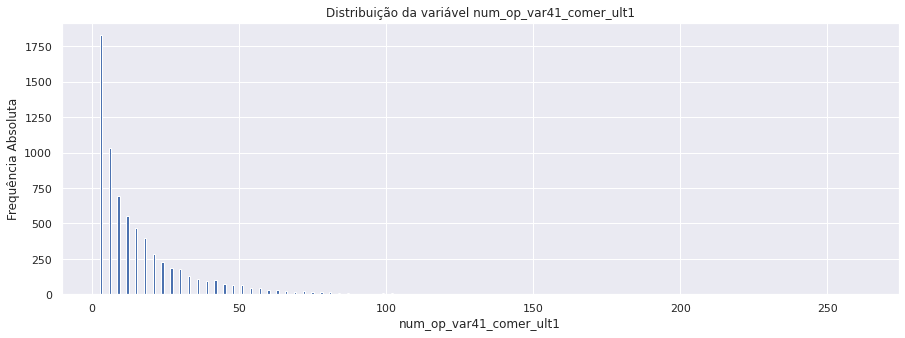


 Quantidade de valores únicos: 56
 Valores únicos: Int64Index([ 12,  24,  36,  48,  60,  72,  84,  96, 108, 120, 132, 156,   9,
             21,  33,  45,  57,  69,  81,  93, 105, 117, 129, 141, 177, 189,
            261,   6,  18,  30,  42,  54,  66,  78,  90, 102, 114, 150, 174,
            186,   3,  15,  27,  39,  51,  63,  75,  87,  99, 111, 123, 135,
            159, 171, 183, 195],
           dtype='int64')



12      550
24      230
36      110
48       69
60       31
72       22
84        8
96        5
108       5
120       3
132       2
156       1
9       697
21      282
33      130
45       70
57       43
69       18
81       16
93        4
105       2
117       2
129       1
141       1
177       1
189       1
261       1
6      1034
18      396
30      180
42       98
54       45
66       26
78       16
90        3
102       7
114       3
150       1
174       1
186       1
3      1827
15      468
27      188
39       93
51       68
63       32
75       19
87        8
99        6
111       1
123       2
135       3
159       1
171       1
183       1
195       1
Name: num_op_var41_comer_ult1, dtype: int64

12     0.080468
24     0.033650
36     0.016094
48     0.010095
60     0.004535
72     0.003219
84     0.001170
96     0.000732
108    0.000732
120    0.000439
132    0.000293
156    0.000146
9      0.101975
21     0.041258
33     0.019020
45     0.010241
57     0.006291
69     0.002634
81     0.002341
93     0.000585
105    0.000293
117    0.000293
129    0.000146
141    0.000146
177    0.000146
189    0.000146
261    0.000146
6      0.151280
18     0.057937
30     0.026335
42     0.014338
54     0.006584
66     0.003804
78     0.002341
90     0.000439
102    0.001024
114    0.000439
150    0.000146
174    0.000146
186    0.000146
3      0.267301
15     0.068471
27     0.027505
39     0.013606
51     0.009949
63     0.004682
75     0.002780
87     0.001170
99     0.000878
111    0.000146
123    0.000293
135    0.000439
159    0.000146
171    0.000146
183    0.000146
195    0.000146
Name: num_op_var41_comer_ult1, dtype: float64

% de zeros: 0.8715563573495697





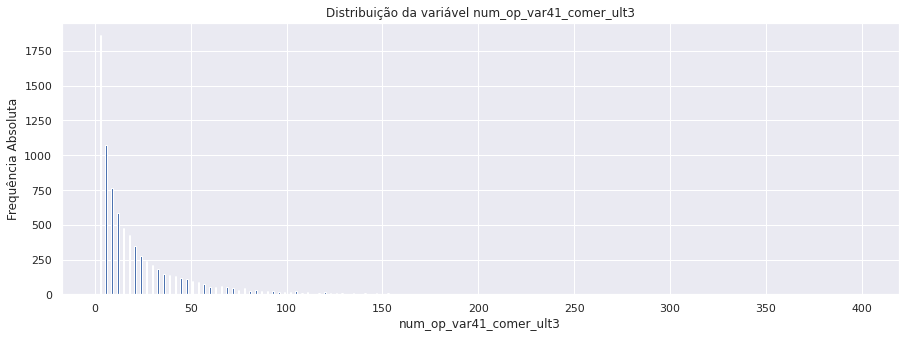


 Quantidade de valores únicos: 81
 Valores únicos: Int64Index([ 12,  24,  36,  48,  60,  72,  84,  96, 108, 120, 132, 144, 156,
            168, 180, 192, 204, 216, 228, 264, 360,   9,  21,  33,  45,  57,
             69,  81,  93, 105, 117, 129, 141, 153, 177, 201, 273, 309, 345,
              6,  18,  30,  42,  54,  66,  78,  90, 102, 114, 126, 138, 150,
            162, 174, 186, 198, 210, 282, 330,   3,  15,  27,  39,  51,  63,
             75,  87,  99, 111, 123, 135, 147, 159, 171, 183, 195, 219, 267,
            279, 303, 399],
           dtype='int64')



12     582
24     276
36     148
48     110
60      53
      ... 
219      1
267      1
279      1
303      1
399      1
Name: num_op_var41_comer_ult3, Length: 81, dtype: int64

12     0.072173
24     0.034226
36     0.018353
48     0.013641
60     0.006572
         ...   
219    0.000124
267    0.000124
279    0.000124
303    0.000124
399    0.000124
Name: num_op_var41_comer_ult3, Length: 81, dtype: float64

% de zeros: 0.8484609313338595





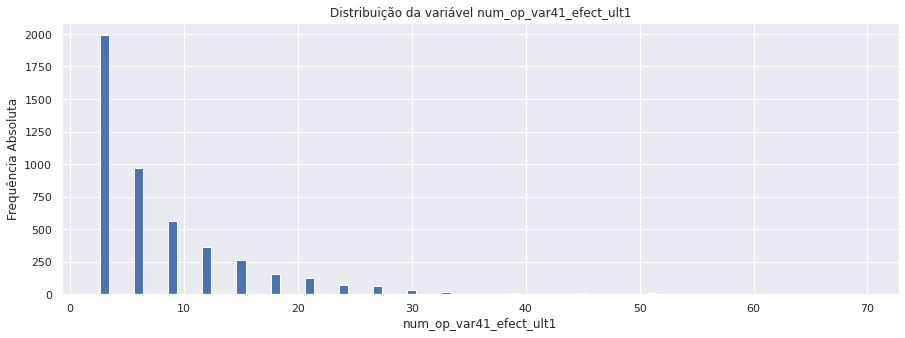


 Quantidade de valores únicos: 23
 Valores únicos: Int64Index([12, 24, 36, 48, 60,  9, 21, 33, 45, 57, 69,  6, 18, 30, 42, 54, 66,
             3, 15, 27, 39, 51, 63],
           dtype='int64')



12     360
24      74
36       6
48       1
60       1
9      562
21     125
33      21
45       7
57       3
69       2
6      968
18     157
30      35
42       5
54       3
66       2
3     1988
15     261
27      67
39       9
51       7
63       5
Name: num_op_var41_efect_ult1, dtype: int64

12    0.077104
24    0.015849
36    0.001285
48    0.000214
60    0.000214
9     0.120368
21    0.026772
33    0.004498
45    0.001499
57    0.000643
69    0.000428
6     0.207325
18    0.033626
30    0.007496
42    0.001071
54    0.000643
66    0.000428
3     0.425787
15    0.055901
27    0.014350
39    0.001928
51    0.001499
63    0.001071
Name: num_op_var41_efect_ult1, dtype: float64

% de zeros: 0.9122599315969482





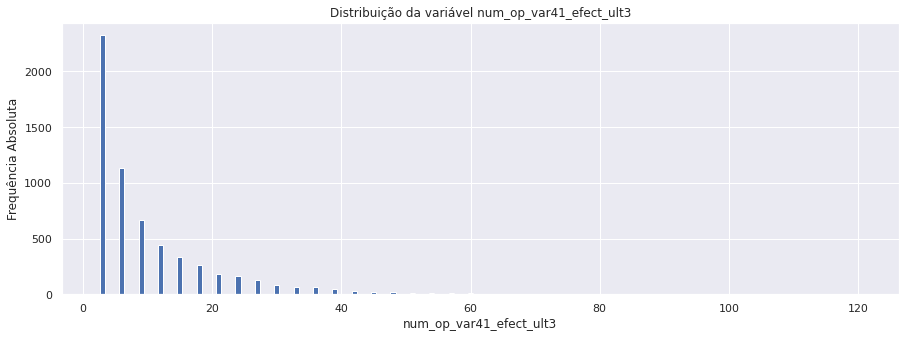


 Quantidade de valores únicos: 38
 Valores únicos: Int64Index([ 12,  24,  36,  48,  60,  72,  84,  96, 108, 120,   9,  21,  33,
             45,  57,  69,  93, 105, 117,   6,  18,  30,  42,  54,  66,  78,
             90, 102, 114,   3,  15,  27,  39,  51,  63,  75,  87,  99],
           dtype='int64')



12      446
24      168
36       62
48       18
60       11
72        6
84        2
96        3
108       1
120       1
9       666
21      181
33       68
45       24
57       14
69        3
93        1
105       1
117       2
6      1128
18      261
30       84
42       30
54        9
66        6
78        2
90        1
102       1
114       1
3      2320
15      332
27      128
39       44
51       16
63        7
75        4
87        1
99        1
Name: num_op_var41_efect_ult3, dtype: int64

12     0.073670
24     0.027750
36     0.010241
48     0.002973
60     0.001817
72     0.000991
84     0.000330
96     0.000496
108    0.000165
120    0.000165
9      0.110010
21     0.029898
33     0.011232
45     0.003964
57     0.002313
69     0.000496
93     0.000165
105    0.000165
117    0.000330
6      0.186323
18     0.043112
30     0.013875
42     0.004955
54     0.001487
66     0.000991
78     0.000330
90     0.000165
102    0.000165
114    0.000165
3      0.383218
15     0.054840
27     0.021143
39     0.007268
51     0.002643
63     0.001156
75     0.000661
87     0.000165
99     0.000165
Name: num_op_var41_efect_ult3, dtype: float64

% de zeros: 0.8862329462171609





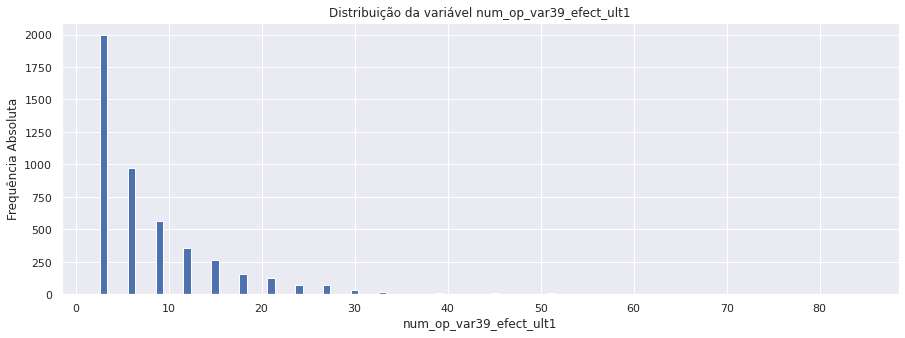


 Quantidade de valores únicos: 24
 Valores únicos: Int64Index([12, 24, 36, 48, 60, 84,  9, 21, 33, 45, 57, 69,  6, 18, 30, 42, 54,
            66,  3, 15, 27, 39, 51, 63],
           dtype='int64')



12     358
24      75
36       6
48       1
60       1
84       1
9      563
21     125
33      19
45       7
57       3
69       2
6      969
18     158
30      35
42       5
54       3
66       1
3     1993
15     261
27      68
39      12
51       7
63       5
Name: num_op_var39_efect_ult1, dtype: int64

12    0.076528
24    0.016032
36    0.001283
48    0.000214
60    0.000214
84    0.000214
9     0.120351
21    0.026721
33    0.004062
45    0.001496
57    0.000641
69    0.000428
6     0.207140
18    0.033775
30    0.007482
42    0.001069
54    0.000641
66    0.000214
3     0.426037
15    0.055793
27    0.014536
39    0.002565
51    0.001496
63    0.001069
Name: num_op_var39_efect_ult1, dtype: float64

% de zeros: 0.9120908031720976





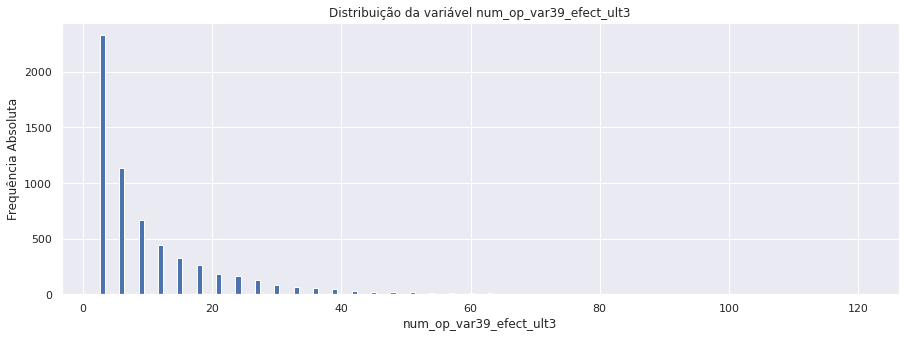


 Quantidade de valores únicos: 38
 Valores únicos: Int64Index([ 12,  24,  36,  48,  60,  72,  84,  96, 108, 120,   9,  21,  33,
             45,  57,  69,  93, 105, 117,   6,  18,  30,  42,  54,  66,  78,
             90, 102, 114,   3,  15,  27,  39,  51,  63,  75,  87,  99],
           dtype='int64')



12      447
24      167
36       59
48       18
60       11
72        6
84        3
96        3
108       1
120       1
9       666
21      184
33       68
45       23
57       15
69        3
93        1
105       1
117       2
6      1132
18      260
30       85
42       30
54        9
66        5
78        2
90        1
102       1
114       1
3      2325
15      329
27      128
39       47
51       17
63        8
75        4
87        1
99        1
Name: num_op_var39_efect_ult3, dtype: int64

12     0.073702
24     0.027535
36     0.009728
48     0.002968
60     0.001814
72     0.000989
84     0.000495
96     0.000495
108    0.000165
120    0.000165
9      0.109810
21     0.030338
33     0.011212
45     0.003792
57     0.002473
69     0.000495
93     0.000165
105    0.000165
117    0.000330
6      0.186645
18     0.042869
30     0.014015
42     0.004946
54     0.001484
66     0.000824
78     0.000330
90     0.000165
102    0.000165
114    0.000165
3      0.383347
15     0.054246
27     0.021105
39     0.007749
51     0.002803
63     0.001319
75     0.000660
87     0.000165
99     0.000165
Name: num_op_var39_efect_ult3, dtype: float64

% de zeros: 0.886026233697899





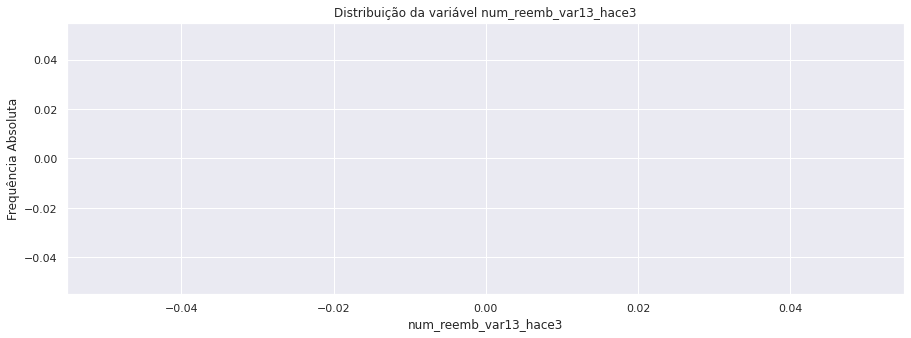


 Quantidade de valores únicos: 0
 Valores únicos: Int64Index([], dtype='int64')



Series([], Name: num_reemb_var13_hace3, dtype: int64)

Series([], Name: num_reemb_var13_hace3, dtype: float64)

% de zeros: 1.0



num_reemb_var13_ult1
Não existe variância!
Variável num_reemb_var13_ult1 não está contida na variável features.
% de zeros: 0.9994738226782426



num_reemb_var17_hace3
Não existe variância!
Variável num_reemb_var17_hace3 não está contida na variável features.
% de zeros: 0.9999812079527943





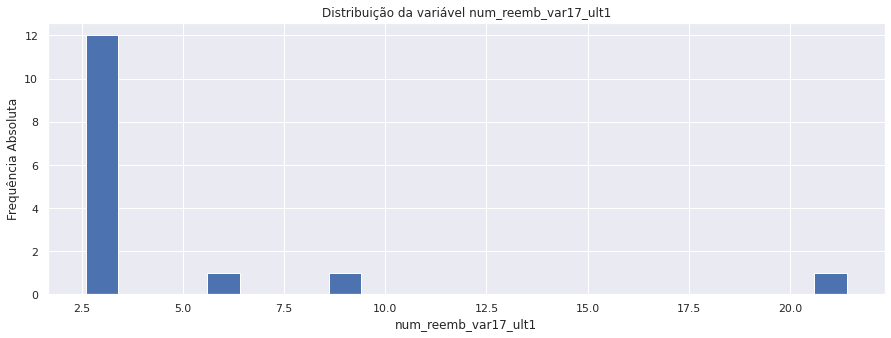


 Quantidade de valores únicos: 4
 Valores únicos: Int64Index([3, 21, 6, 9], dtype='int64')



3     12
21     1
6      1
9      1
Name: num_reemb_var17_ult1, dtype: int64

3     0.800000
21    0.066667
6     0.066667
9     0.066667
Name: num_reemb_var17_ult1, dtype: float64

% de zeros: 0.9997181192919157





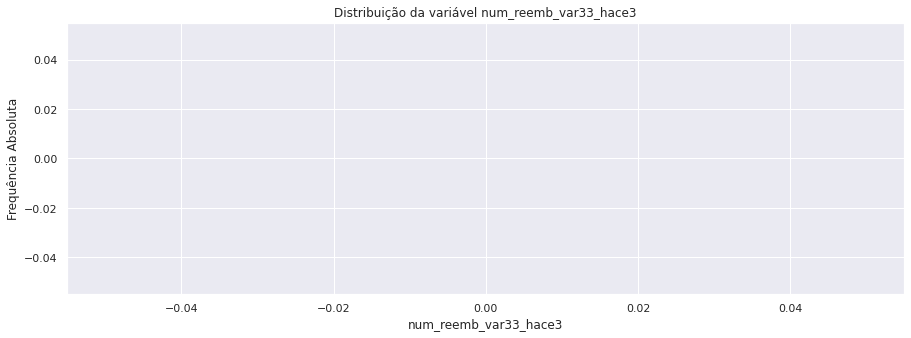


 Quantidade de valores únicos: 0
 Valores únicos: Int64Index([], dtype='int64')



Series([], Name: num_reemb_var33_hace3, dtype: int64)

Series([], Name: num_reemb_var33_hace3, dtype: float64)

% de zeros: 1.0



num_reemb_var33_ult1
Não existe variância!
Variável num_reemb_var33_ult1 não está contida na variável features.
% de zeros: 0.9999812079527943





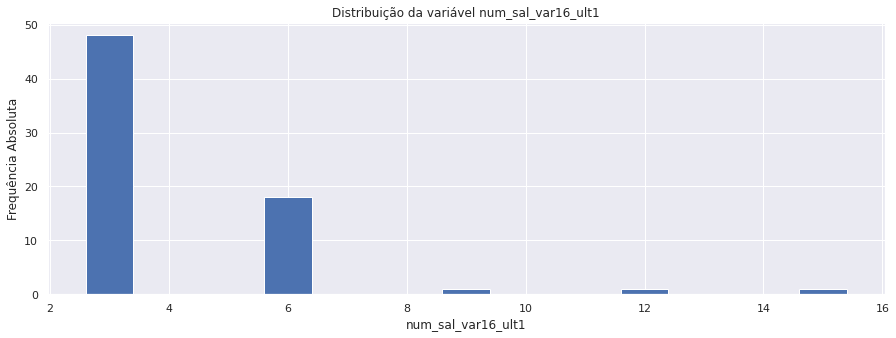


 Quantidade de valores únicos: 5
 Valores únicos: Int64Index([3, 6, 9, 12, 15], dtype='int64')



3     48
6     18
9      1
12     1
15     1
Name: num_sal_var16_ult1, dtype: int64

3     0.695652
6     0.260870
9     0.014493
12    0.014493
15    0.014493
Name: num_sal_var16_ult1, dtype: float64

% de zeros: 0.9987033487428121





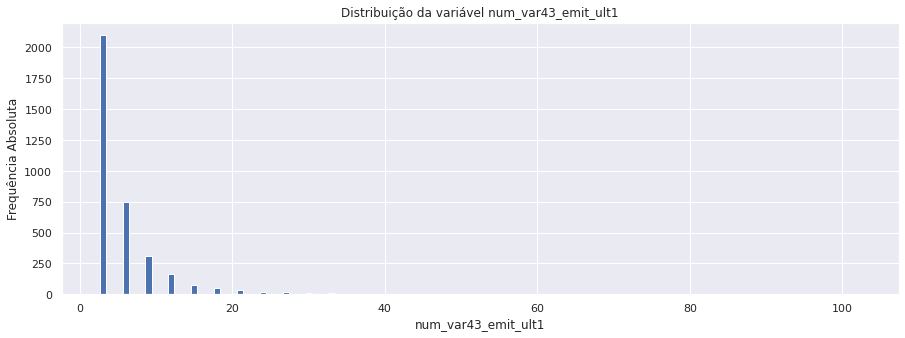


 Quantidade de valores únicos: 22
 Valores únicos: Int64Index([  6,  12,  18,  24,  30,  36,  42,  60,  66,  84, 102,   3,   9,
             15,  21,  27,  33,  39,  45,  51,  57,  69],
           dtype='int64')



6       749
12      165
18       52
24       15
30        7
36        4
42        1
60        3
66        1
84        1
102       1
3      2097
9       313
15       77
21       33
27       16
33       14
39        3
45        4
51        2
57        1
69        1
Name: num_var43_emit_ult1, dtype: int64

6      0.210393
12     0.046348
18     0.014607
24     0.004213
30     0.001966
36     0.001124
42     0.000281
60     0.000843
66     0.000281
84     0.000281
102    0.000281
3      0.589045
9      0.087921
15     0.021629
21     0.009270
27     0.004494
33     0.003933
39     0.000843
45     0.001124
51     0.000562
57     0.000281
69     0.000281
Name: num_var43_emit_ult1, dtype: float64

% de zeros: 0.9331003119479836





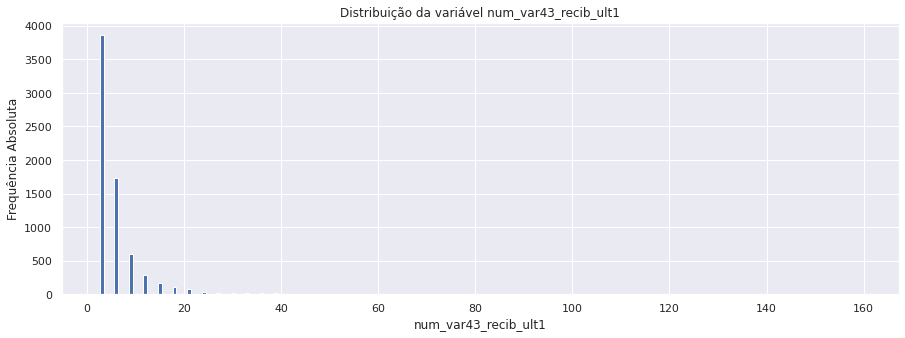


 Quantidade de valores únicos: 34
 Valores únicos: Int64Index([ 12,  24,  36,  48,  60,  84,  96, 108,   9,  21,  33,  45,  57,
             69,  93, 105,   6,  18,  30,  42,  54,  66,  78,  90, 102, 150,
              3,  15,  27,  39,  51,  63,  75, 159],
           dtype='int64')



12      283
24       37
36       15
48        5
60        1
84        2
96        1
108       1
9       598
21       72
33       16
45        7
57        1
69        1
93        2
105       1
6      1726
18      109
30       18
42        4
54        4
66        1
78        2
90        1
102       1
150       2
3      3856
15      165
27       25
39       14
51        6
63        6
75        1
159       1
Name: num_var43_recib_ult1, dtype: int64

12     0.040515
24     0.005297
36     0.002147
48     0.000716
60     0.000143
84     0.000286
96     0.000143
108    0.000143
9      0.085612
21     0.010308
33     0.002291
45     0.001002
57     0.000143
69     0.000143
93     0.000286
105    0.000143
6      0.247101
18     0.015605
30     0.002577
42     0.000573
54     0.000573
66     0.000143
78     0.000286
90     0.000143
102    0.000143
150    0.000286
3      0.552040
15     0.023622
27     0.003579
39     0.002004
51     0.000859
63     0.000859
75     0.000143
159    0.000143
Name: num_var43_recib_ult1, dtype: float64

% de zeros: 0.8687375502687262





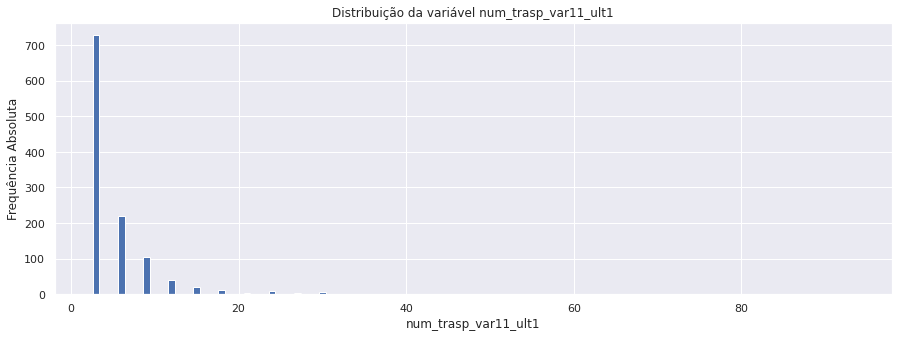


 Quantidade de valores únicos: 16
 Valores únicos: Int64Index([3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 93], dtype='int64')



3     727
6     220
9     106
12     41
15     21
18     13
21      5
24      8
27      5
30      7
33      1
36      1
39      2
42      1
45      1
93      1
Name: num_trasp_var11_ult1, dtype: int64

3     0.626724
6     0.189655
9     0.091379
12    0.035345
15    0.018103
18    0.011207
21    0.004310
24    0.006897
27    0.004310
30    0.006034
33    0.000862
36    0.000862
39    0.001724
42    0.000862
45    0.000862
93    0.000862
Name: num_trasp_var11_ult1, dtype: float64

% de zeros: 0.9782012252414778





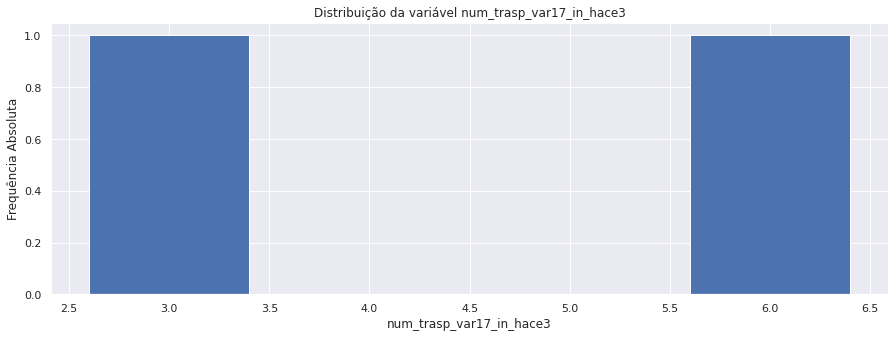


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([6, 3], dtype='int64')



6    1
3    1
Name: num_trasp_var17_in_hace3, dtype: int64

6    0.5
3    0.5
Name: num_trasp_var17_in_hace3, dtype: float64

% de zeros: 0.9999624159055888



num_trasp_var17_in_ult1
Não existe variância!
Variável num_trasp_var17_in_ult1 não está contida na variável features.
% de zeros: 0.9999624159055888





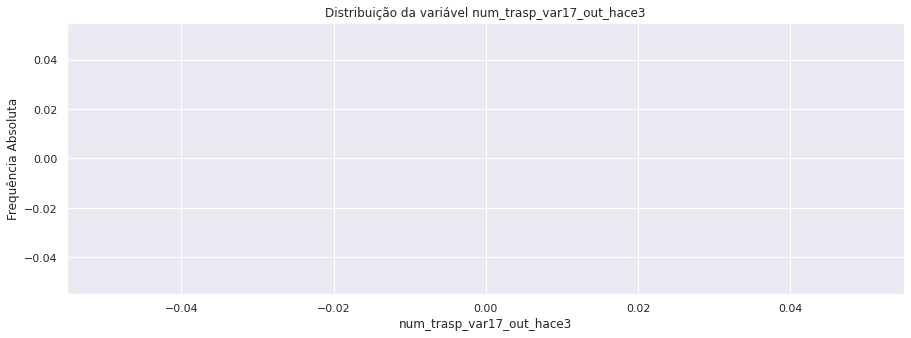


 Quantidade de valores únicos: 0
 Valores únicos: Int64Index([], dtype='int64')



Series([], Name: num_trasp_var17_out_hace3, dtype: int64)

Series([], Name: num_trasp_var17_out_hace3, dtype: float64)

% de zeros: 1.0



num_trasp_var17_out_ult1
Não existe variância!
Variável num_trasp_var17_out_ult1 não está contida na variável features.
% de zeros: 0.9999248318111775



num_trasp_var33_in_hace3
Não existe variância!
Variável num_trasp_var33_in_hace3 não está contida na variável features.
% de zeros: 0.9999624159055888





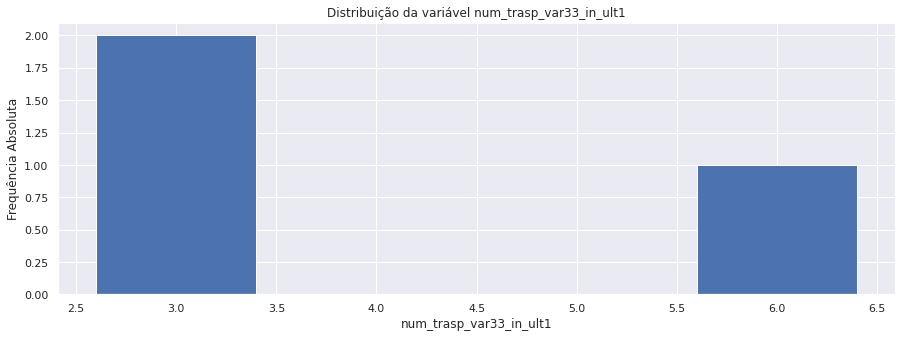


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([6, 3], dtype='int64')



6    1
3    2
Name: num_trasp_var33_in_ult1, dtype: int64

6    0.333333
3    0.666667
Name: num_trasp_var33_in_ult1, dtype: float64

% de zeros: 0.9999436238583831





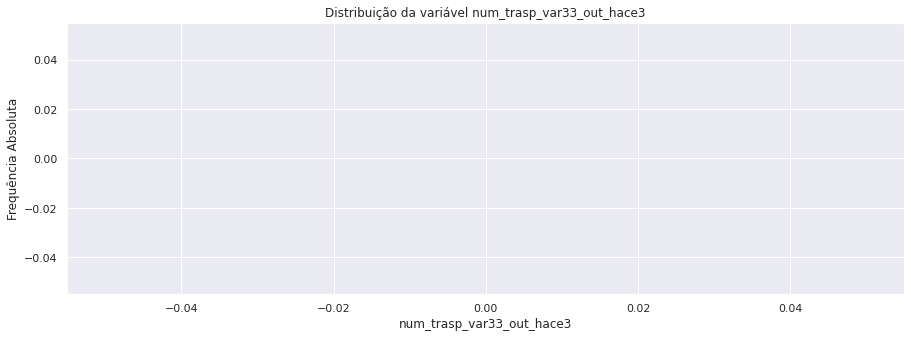


 Quantidade de valores únicos: 0
 Valores únicos: Int64Index([], dtype='int64')



Series([], Name: num_trasp_var33_out_hace3, dtype: int64)

Series([], Name: num_trasp_var33_out_hace3, dtype: float64)

% de zeros: 1.0



num_trasp_var33_out_ult1
Não existe variância!
Variável num_trasp_var33_out_ult1 não está contida na variável features.
% de zeros: 0.9999812079527943





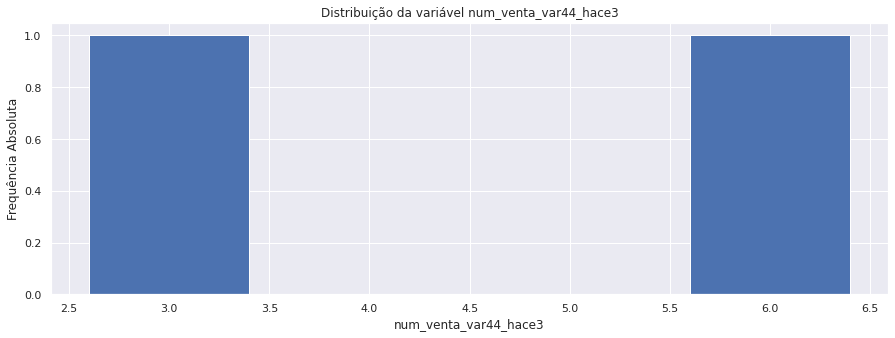


 Quantidade de valores únicos: 2
 Valores únicos: Int64Index([6, 3], dtype='int64')



6    1
3    1
Name: num_venta_var44_hace3, dtype: int64

6    0.5
3    0.5
Name: num_venta_var44_hace3, dtype: float64

% de zeros: 0.9999624159055888





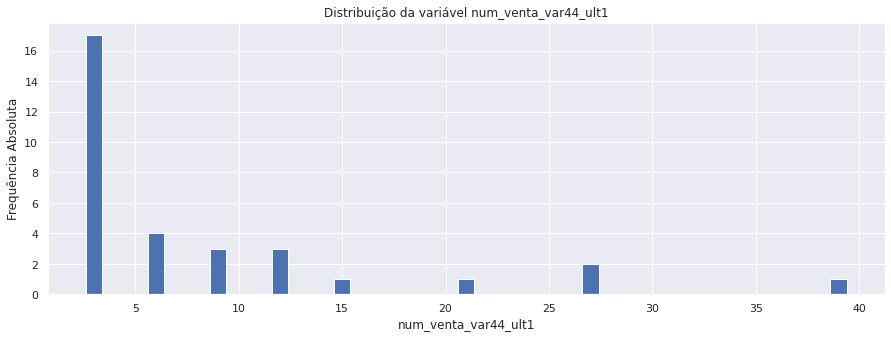


 Quantidade de valores únicos: 8
 Valores únicos: Int64Index([3, 6, 39, 9, 12, 15, 21, 27], dtype='int64')



3     17
6      4
39     1
9      3
12     3
15     1
21     1
27     2
Name: num_venta_var44_ult1, dtype: int64

3     0.53125
6     0.12500
39    0.03125
9     0.09375
12    0.09375
15    0.03125
21    0.03125
27    0.06250
Name: num_venta_var44_ult1, dtype: float64

% de zeros: 0.9993986544894201





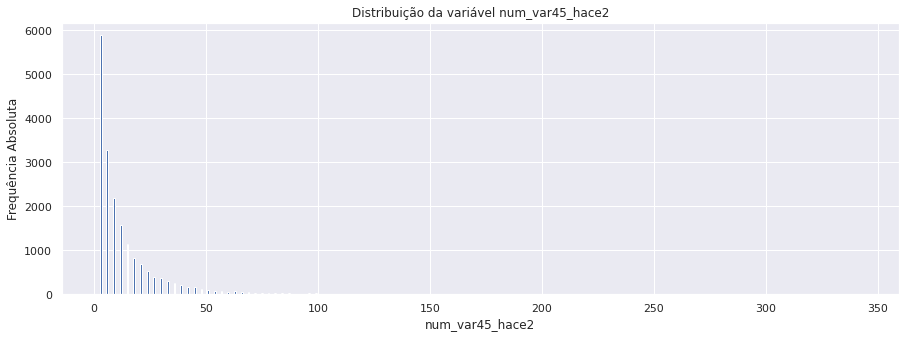


 Quantidade de valores únicos: 81
 Valores únicos: Int64Index([ 48,  96, 144, 240, 288,  33,  81, 129, 177,  18,  66, 114, 162,
            210, 258,   3,  51,  99, 147, 195, 243,  36,  84, 132, 180,  21,
             69, 117, 165, 213,   6,  54, 102, 150, 198, 294, 342,  39,  87,
            135, 183,  24,  72, 120, 168, 264,   9,  57, 105, 153, 201,  42,
             90, 138,  27,  75, 123, 171, 219,  12,  60, 108, 156, 204, 252,
             45,  93, 141, 189, 237,  30,  78, 126, 174, 270,  15,  63, 111,
            159, 207, 255],
           dtype='int64')



48     117
96      23
144     13
240      3
288      2
      ... 
63      64
111     17
159      5
207      1
255      1
Name: num_var45_hace2, Length: 81, dtype: int64

48     0.006144
96     0.001208
144    0.000683
240    0.000158
288    0.000105
         ...   
63     0.003361
111    0.000893
159    0.000263
207    0.000053
255    0.000053
Name: num_var45_hace2, Length: 81, dtype: float64

% de zeros: 0.6421618371105349





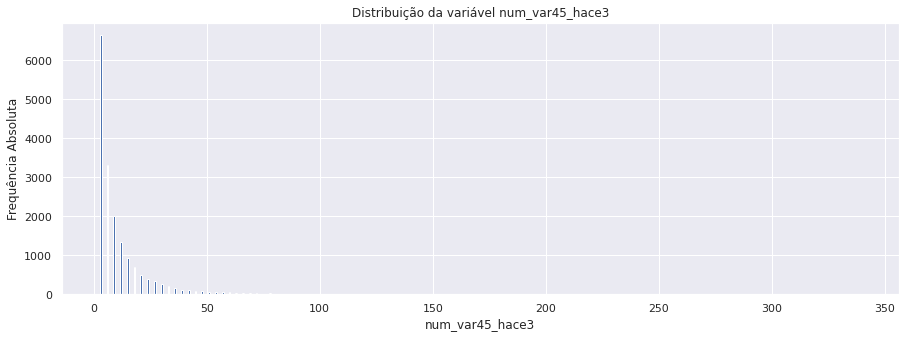


 Quantidade de valores únicos: 59
 Valores únicos: Int64Index([ 48,  96, 144,  33,  81, 129, 177,  18,  66, 114,   3,  51,  99,
            147, 195, 339,  36,  84, 132,  21,  69, 117, 165,   6,  54, 102,
             39,  87, 135,  24,  72, 120, 168,   9,  57, 105, 153,  42,  90,
            138,  27,  75, 123, 171,  12,  60, 108, 156, 252,  45,  93, 333,
             30,  78, 126,  15,  63, 111, 159],
           dtype='int64')



48       76
96        3
144       2
33      220
81       10
129       1
177       1
18      707
66       36
114       6
3      6633
51       64
99        5
147       2
195       1
339       1
36      163
84       13
132       5
21      499
69       23
117       4
165       1
6      3308
54       67
102       8
39      116
87       14
135       3
24      393
72       28
120       3
168       2
9      1995
57       57
105       5
153       2
42      113
90        9
138       1
27      348
75       15
123       3
171       1
12     1339
60       47
108       7
156       1
252       1
45       91
93        8
333       1
30      264
78       23
126       6
15      925
63       34
111       4
159       2
Name: num_var45_hace3, dtype: int64

48     0.004289
96     0.000169
144    0.000113
33     0.012415
81     0.000564
129    0.000056
177    0.000056
18     0.039898
66     0.002032
114    0.000339
3      0.374323
51     0.003612
99     0.000282
147    0.000113
195    0.000056
339    0.000056
36     0.009199
84     0.000734
132    0.000282
21     0.028160
69     0.001298
117    0.000226
165    0.000056
6      0.186682
54     0.003781
102    0.000451
39     0.006546
87     0.000790
135    0.000169
24     0.022178
72     0.001580
120    0.000169
168    0.000113
9      0.112585
57     0.003217
105    0.000282
153    0.000113
42     0.006377
90     0.000508
138    0.000056
27     0.019639
75     0.000847
123    0.000169
171    0.000056
12     0.075564
60     0.002652
108    0.000395
156    0.000056
252    0.000056
45     0.005135
93     0.000451
333    0.000056
30     0.014898
78     0.001298
126    0.000339
15     0.052201
63     0.001919
111    0.000226
159    0.000113
Name: num_var45_hace3, dtype: float64

% de zeros: 0.6670049235163679





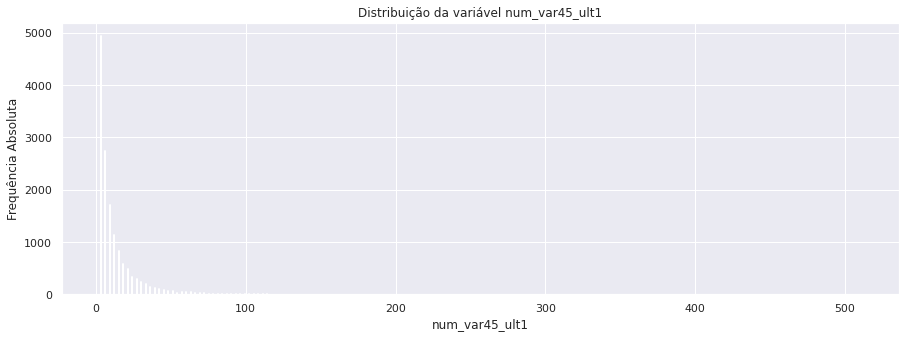


 Quantidade de valores únicos: 88
 Valores únicos: Int64Index([ 24,  48,  72,  96, 120, 144, 168, 192, 216, 264,   9,  33,  57,
             81, 105, 129, 153, 177, 201, 225, 321, 393, 417,  18,  42,  66,
             90, 114, 138, 162, 186, 210, 234, 282, 306,   3,  27,  51,  75,
             99, 123, 147, 195,  12,  36,  60,  84, 108, 132, 156, 180, 204,
            228,  21,  45,  69,  93, 117, 141, 165, 189, 213, 261, 285,   6,
             30,  54,  78, 102, 126, 150, 174, 198, 270, 510,  15,  39,  63,
             87, 111, 135, 159, 183, 207, 231, 255, 279, 375],
           dtype='int64')



24     353
48      85
72      39
96      21
120     11
      ... 
207      1
231      2
255      1
279      1
375      1
Name: num_var45_ult1, Length: 88, dtype: int64

24     0.023254
48     0.005599
72     0.002569
96     0.001383
120    0.000725
         ...   
207    0.000066
231    0.000132
255    0.000066
279    0.000066
375    0.000066
Name: num_var45_ult1, Length: 88, dtype: float64

% de zeros: 0.7147367234186492





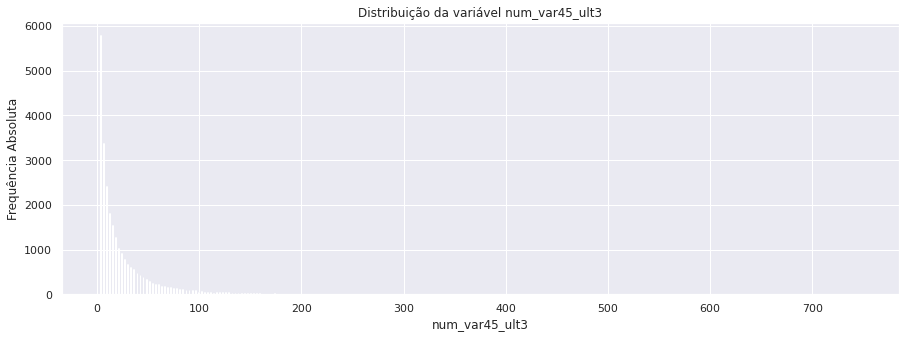


 Quantidade de valores únicos: 162
 Valores únicos: Int64Index([ 48,  96, 144, 192, 240, 288, 336, 384, 528, 576,
            ...
             15,  63, 111, 159, 207, 255, 303, 351, 399, 495],
           dtype='int64', length=162)



48     349
96      89
144     26
192      9
240      8
      ... 
255      8
303      6
351      2
399      1
495      1
Name: num_var45_ult3, Length: 162, dtype: int64

48     0.013238
96     0.003376
144    0.000986
192    0.000341
240    0.000303
         ...   
255    0.000303
303    0.000228
351    0.000076
399    0.000038
495    0.000038
Name: num_var45_ult3, Length: 162, dtype: float64

% de zeros: 0.5045852595181719


In [34]:
for col in num_features_high_zeros: 
  df_aux = df_train[df_train[col] != 0]
  categorical_summary(col, df_aux)
  print(f'% de zeros: {zeros_by_col[col]}')

Gande parte das variáveis possui uma quantidade significante de valores diferente de zero, e algumas tem uma variância quase nula.

#### Prefixo `imp`

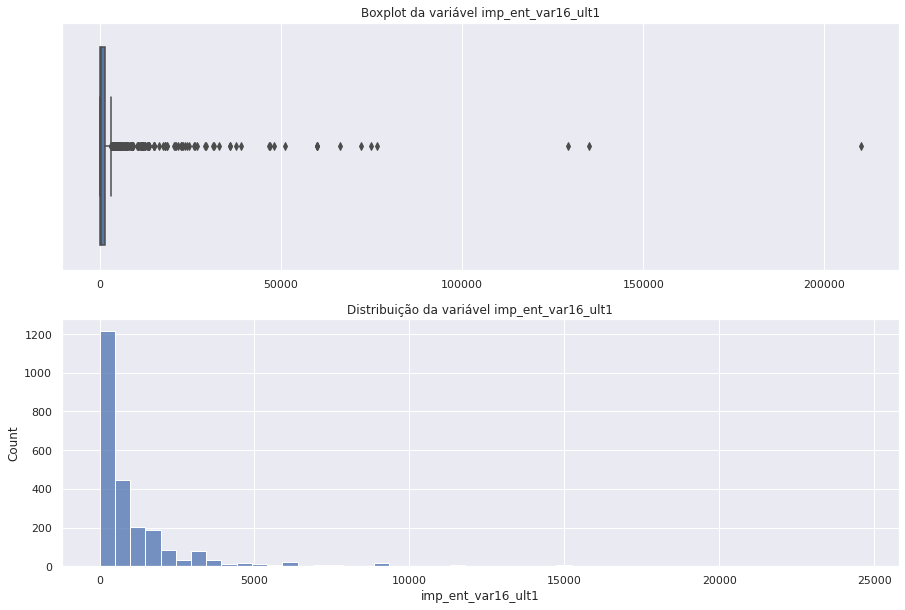

count      2593.000000
mean       1842.046001
std        7465.506739
min           0.060000
25%         150.000000
50%         450.000000
75%        1350.000000
max      210000.000000
Name: imp_ent_var16_ult1, dtype: float64

% de zeros: 0.9512722215958207





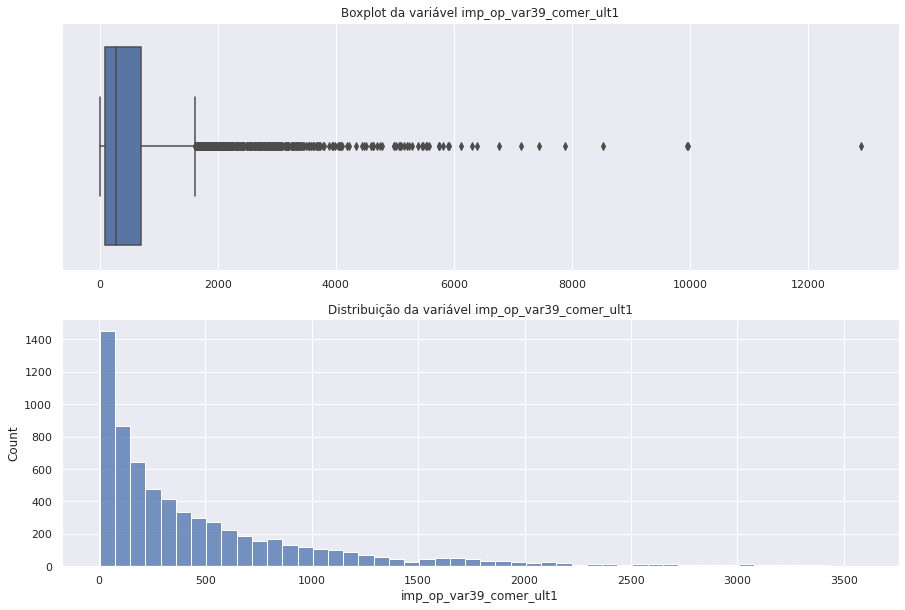

count     6936.000000
mean       551.541696
std        784.391572
min          0.030000
25%         89.400000
50%        280.230000
75%        700.087500
max      12888.030000
Name: imp_op_var39_comer_ult1, dtype: float64

% de zeros: 0.8696583605818018





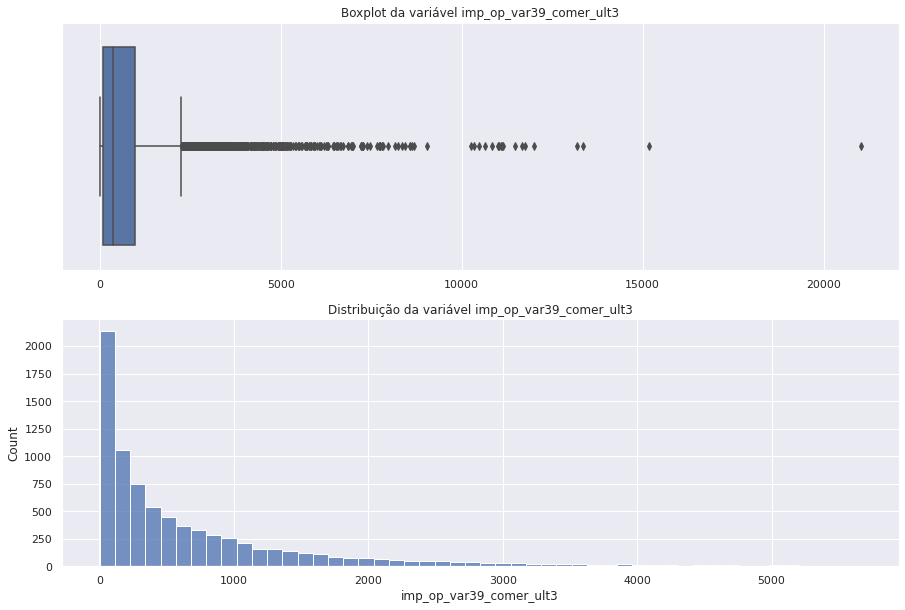

count     8162.000000
mean       772.748910
std       1185.787139
min          0.030000
25%         98.790000
50%        354.465000
75%        964.057500
max      21024.810000
Name: imp_op_var39_comer_ult3, dtype: float64

% de zeros: 0.8466193107077085





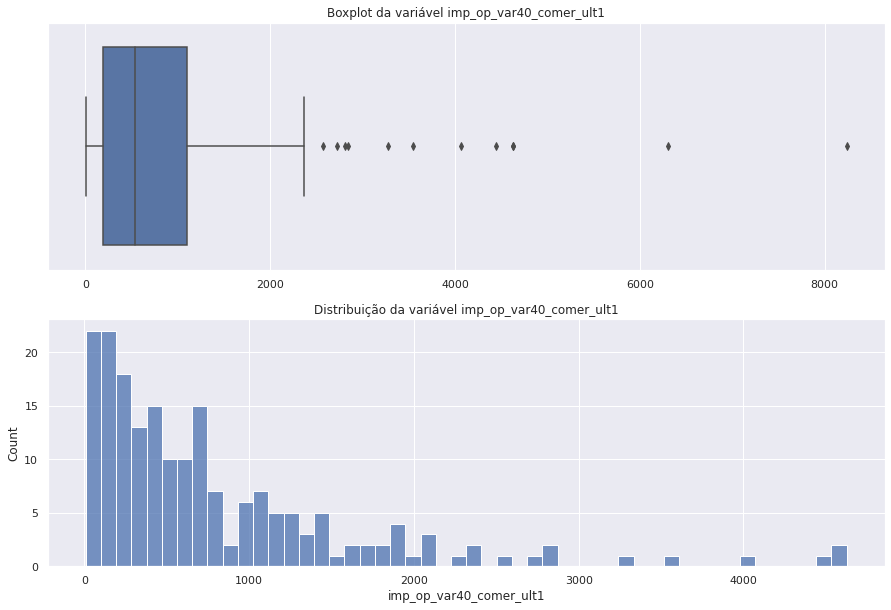

count     197.000000
mean      862.074670
std      1085.758058
min         3.570000
25%       195.240000
50%       535.320000
75%      1102.050000
max      8237.820000
Name: imp_op_var40_comer_ult1, dtype: float64

% de zeros: 0.9962979667004923





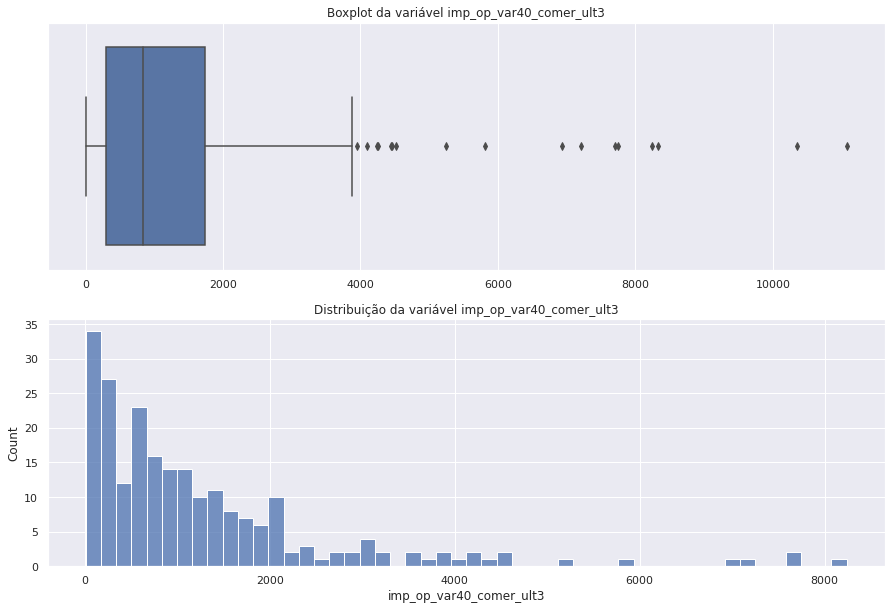

count      233.000000
mean      1374.973133
std       1742.872433
min          3.570000
25%        299.880000
50%        835.680000
75%       1744.530000
max      11073.570000
Name: imp_op_var40_comer_ult3, dtype: float64

% de zeros: 0.99562145300109





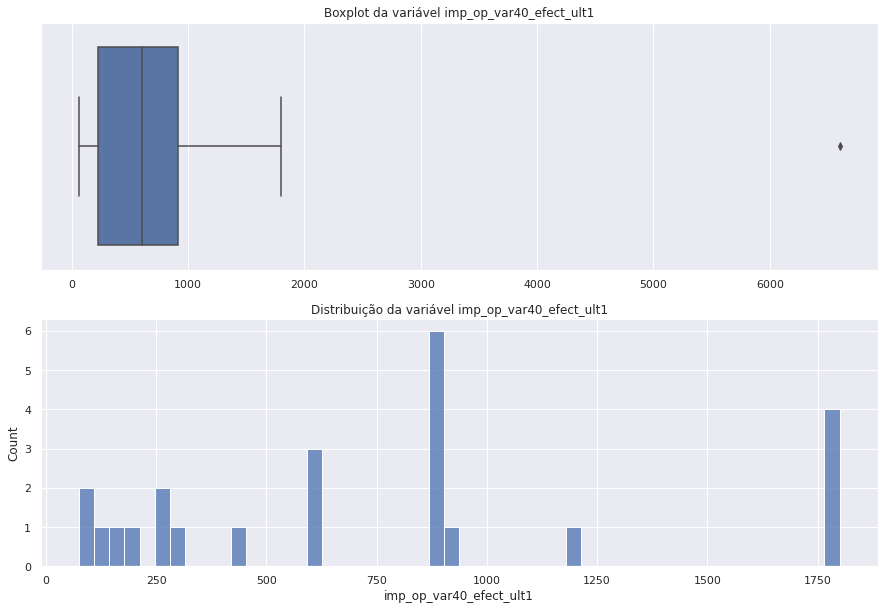

count      27.000000
mean      930.451111
std      1268.931768
min        60.000000
25%       225.000000
50%       600.000000
75%       915.000000
max      6600.000000
Name: imp_op_var40_efect_ult1, dtype: float64

% de zeros: 0.9994926147254481





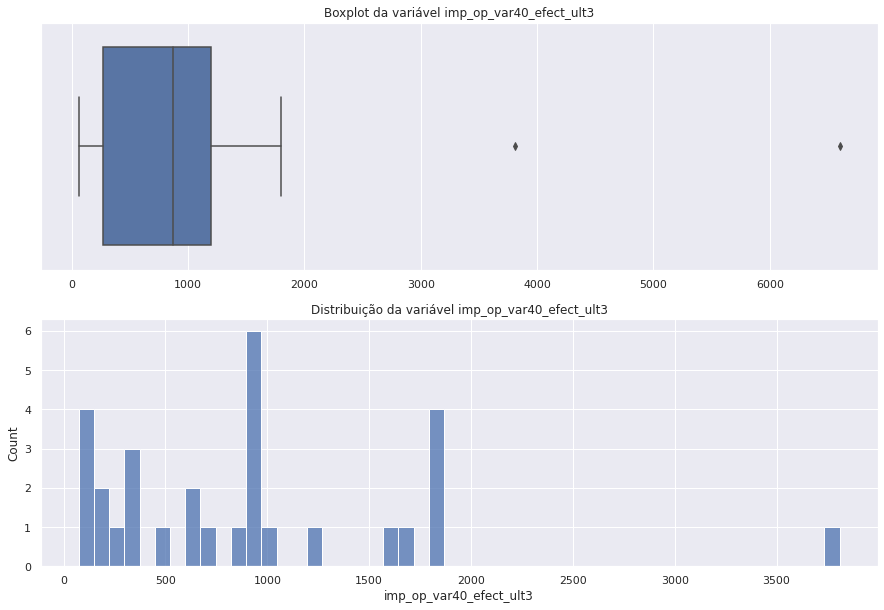

count      33.000000
mean     1026.064545
std      1271.861428
min        60.000000
25%       270.000000
50%       870.000000
75%      1200.000000
max      6600.000000
Name: imp_op_var40_efect_ult3, dtype: float64

% de zeros: 0.9993798624422144





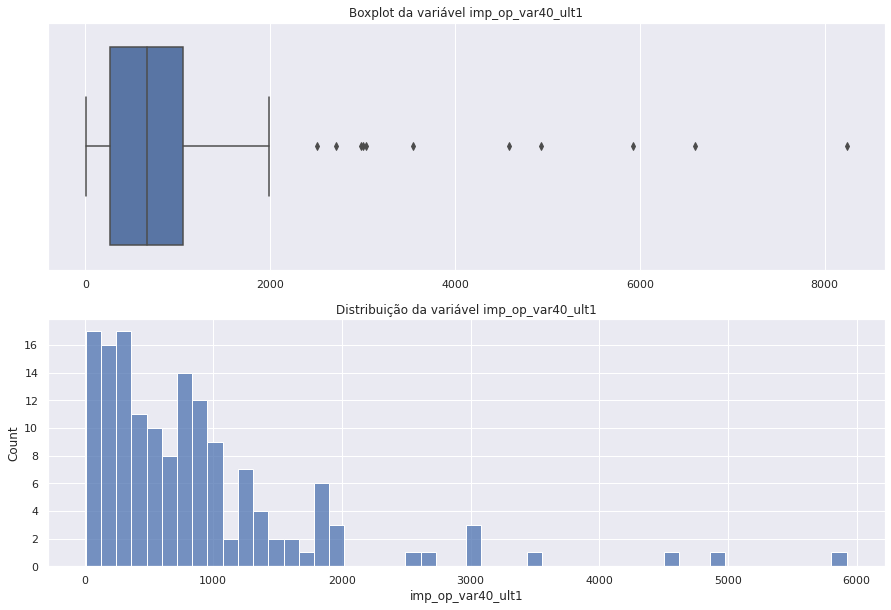

count     154.000000
mean      938.935519
std      1178.941627
min         3.570000
25%       268.875000
50%       665.460000
75%      1052.250000
max      8237.820000
Name: imp_op_var40_ult1, dtype: float64

% de zeros: 0.9971060247303342





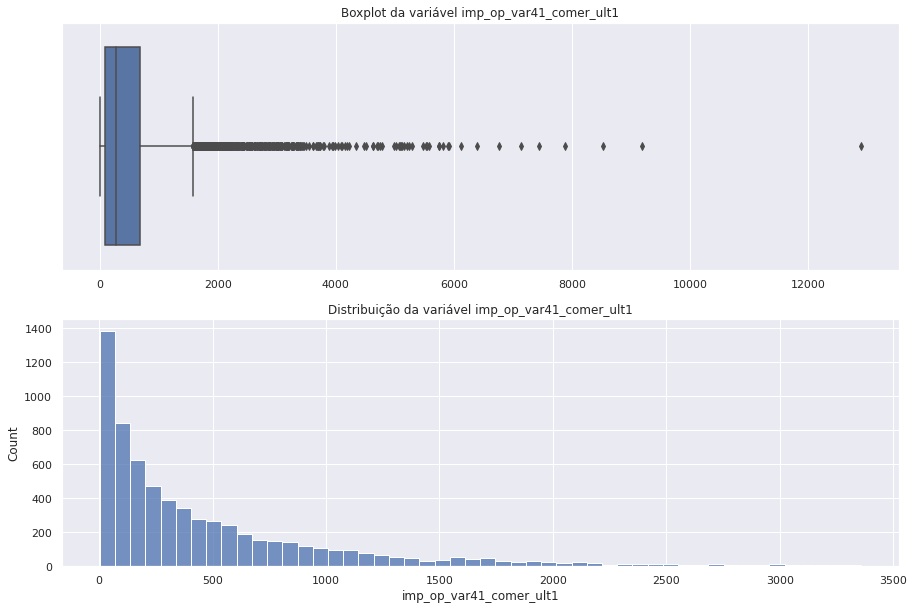

count     6835.000000
mean       534.844841
std        749.214677
min          0.030000
25%         87.135000
50%        274.470000
75%        682.830000
max      12888.030000
Name: imp_op_var41_comer_ult1, dtype: float64

% de zeros: 0.8715563573495697





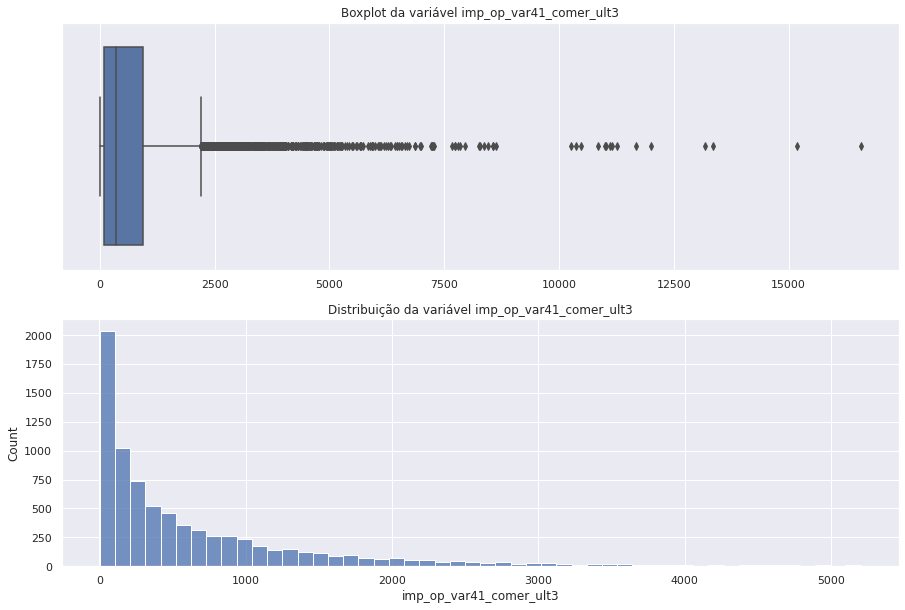

count     8064.000000
mean       742.411689
std       1120.707981
min          0.030000
25%         96.420000
50%        344.400000
75%        937.455000
max      16566.810000
Name: imp_op_var41_comer_ult3, dtype: float64

% de zeros: 0.8484609313338595





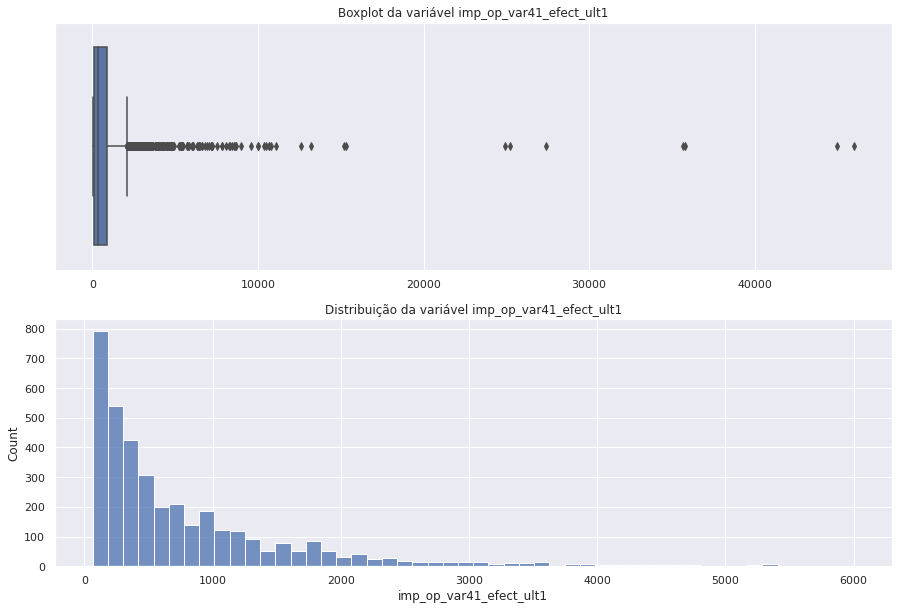

count     4669.000000
mean       783.019128
std       1753.283911
min         15.000000
25%        120.000000
50%        360.000000
75%        900.000000
max      45990.000000
Name: imp_op_var41_efect_ult1, dtype: float64

% de zeros: 0.9122599315969482





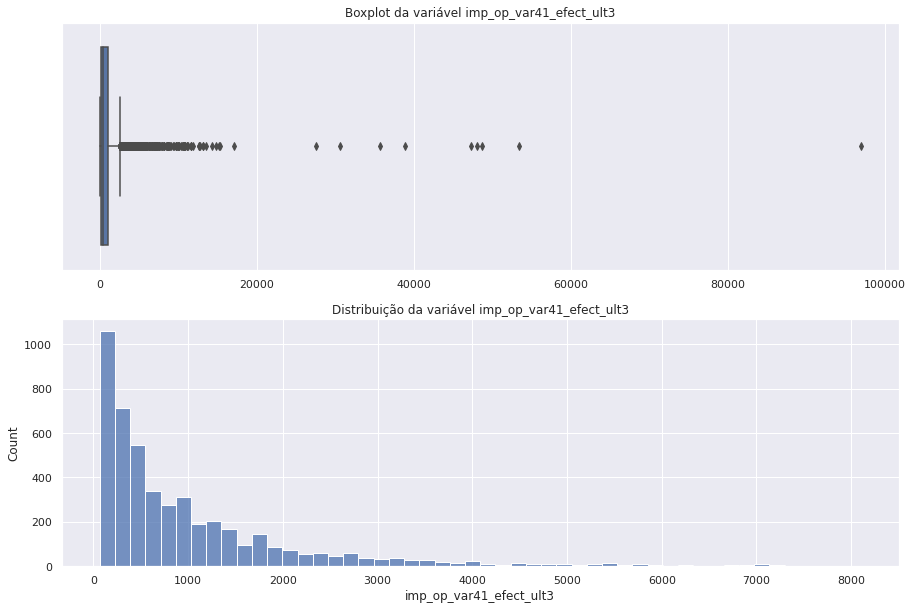

count     6054.000000
mean       991.244440
std       2435.500543
min         15.000000
25%        120.000000
50%        420.000000
75%       1110.000000
max      96870.000000
Name: imp_op_var41_efect_ult3, dtype: float64

% de zeros: 0.8862329462171609





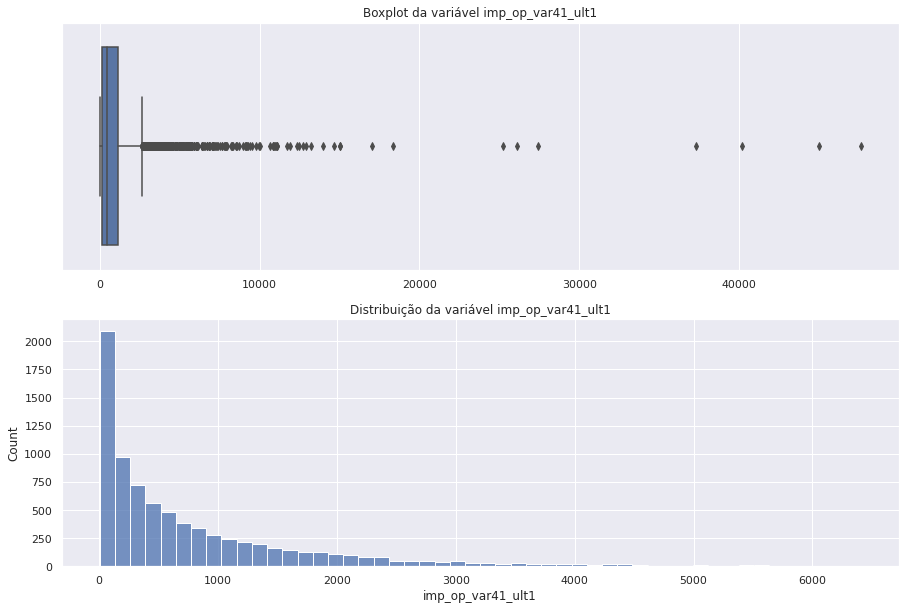

count     8142.000000
mean       901.074646
std       1659.418721
min          0.030000
25%        120.000000
50%        428.490000
75%       1130.955000
max      47598.090000
Name: imp_op_var41_ult1, dtype: float64

% de zeros: 0.8469951516518209





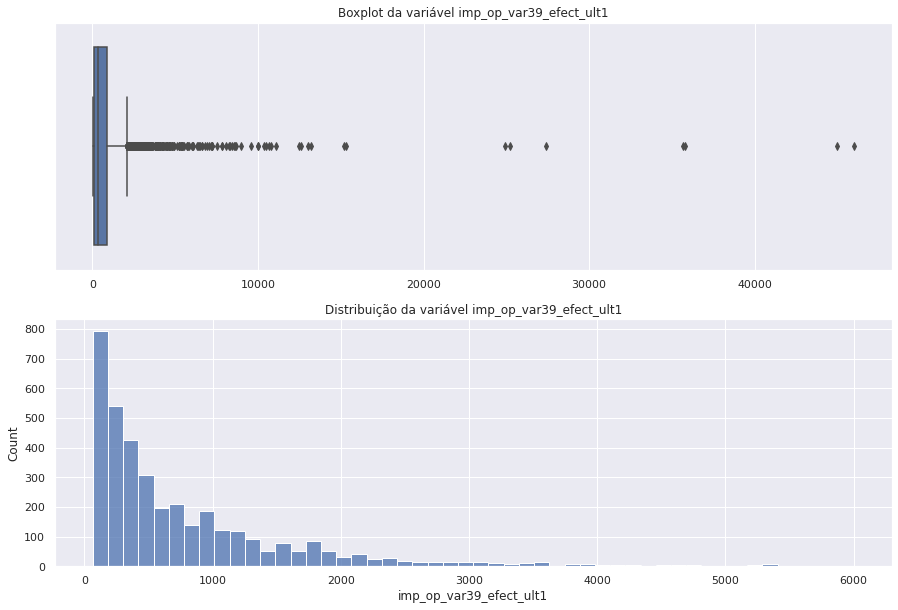

count     4678.000000
mean       786.882961
std       1764.105172
min         15.000000
25%        120.000000
50%        360.000000
75%        900.000000
max      45990.000000
Name: imp_op_var39_efect_ult1, dtype: float64

% de zeros: 0.9120908031720976





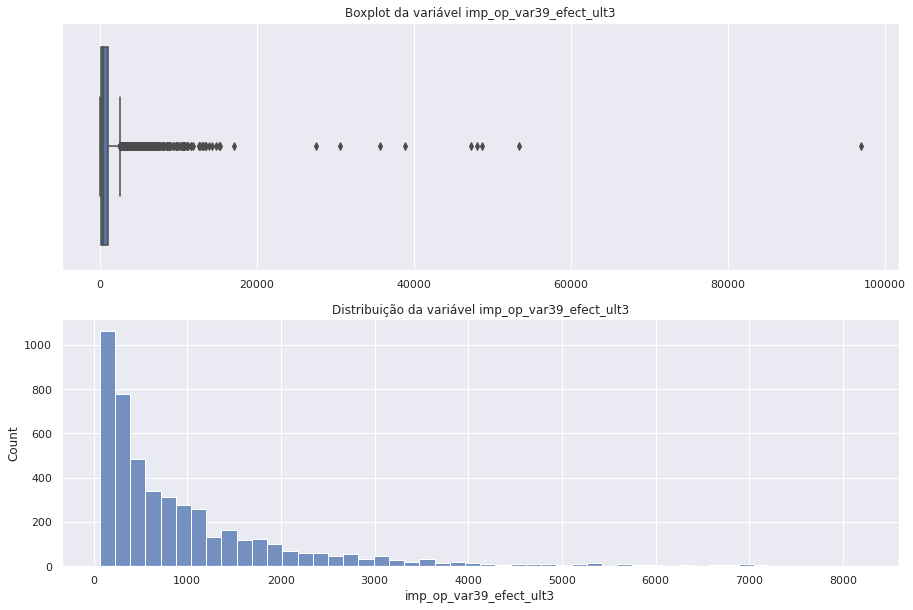

count     6065.000000
mean       995.029509
std       2444.240013
min         15.000000
25%        120.000000
50%        420.000000
75%       1110.000000
max      96870.000000
Name: imp_op_var39_efect_ult3, dtype: float64

% de zeros: 0.886026233697899





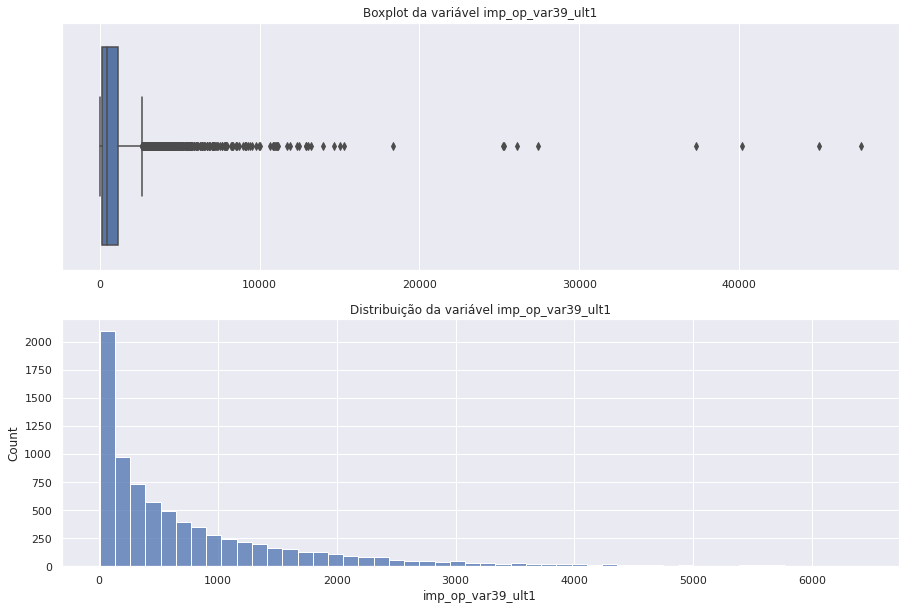

count     8225.000000
mean       909.561804
std       1681.599084
min          0.030000
25%        120.000000
50%        434.490000
75%       1134.000000
max      47598.090000
Name: imp_op_var39_ult1, dtype: float64

% de zeros: 0.8454354117337542





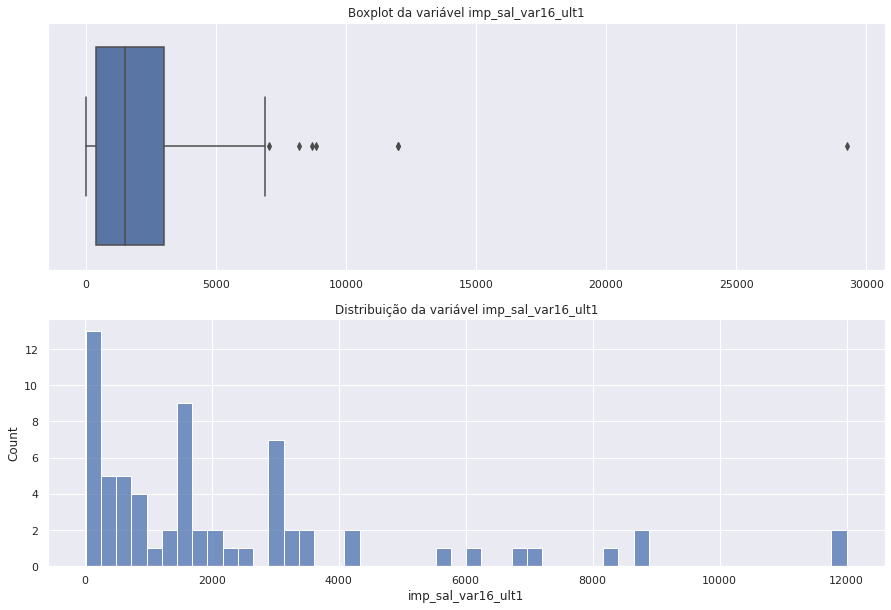

count       69.000000
mean      2714.044783
std       4245.518157
min          1.500000
25%        390.000000
50%       1500.000000
75%       3000.000000
max      29250.000000
Name: imp_sal_var16_ult1, dtype: float64

% de zeros: 0.9987033487428121





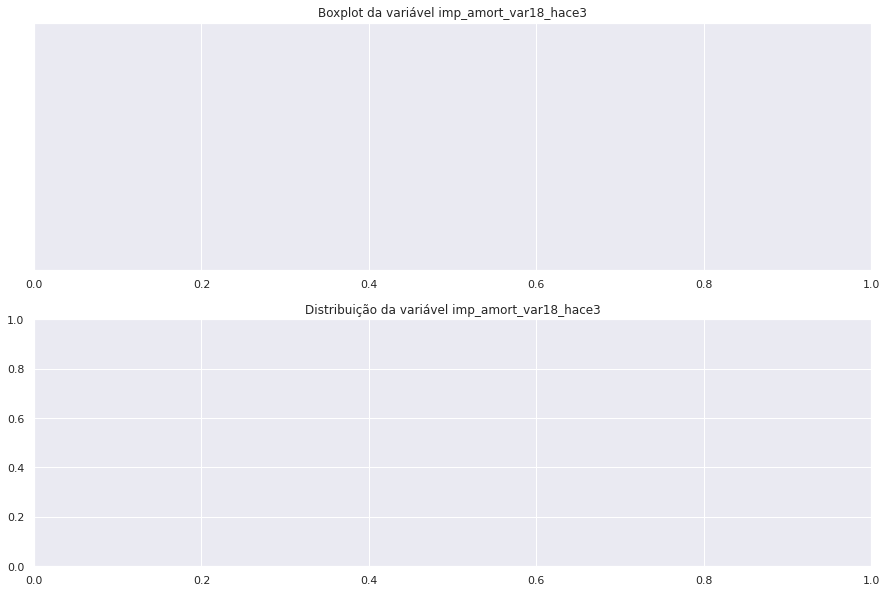

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: imp_amort_var18_hace3, dtype: float64

% de zeros: 1.0





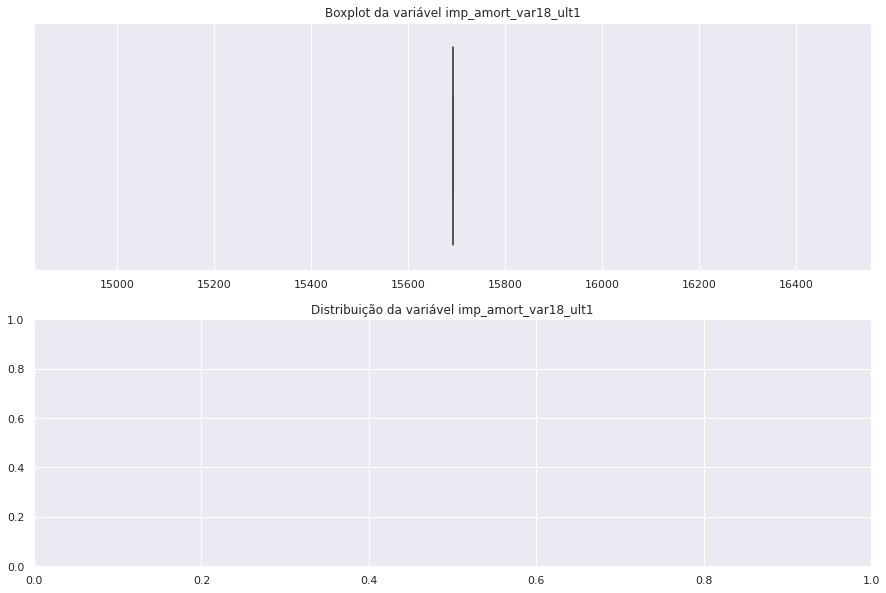

count        1.0
mean     15691.8
std          NaN
min      15691.8
25%      15691.8
50%      15691.8
75%      15691.8
max      15691.8
Name: imp_amort_var18_ult1, dtype: float64

% de zeros: 0.9999812079527943





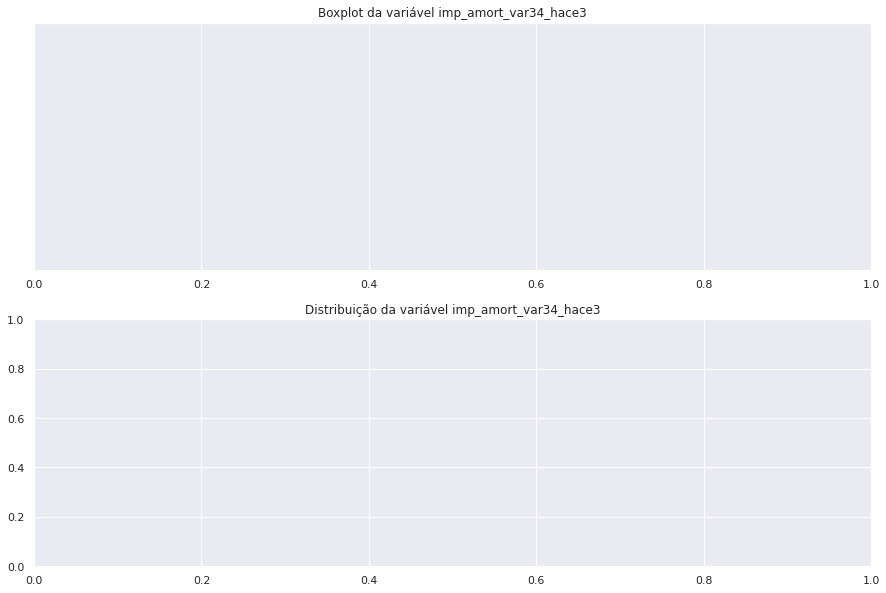

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: imp_amort_var34_hace3, dtype: float64

% de zeros: 1.0





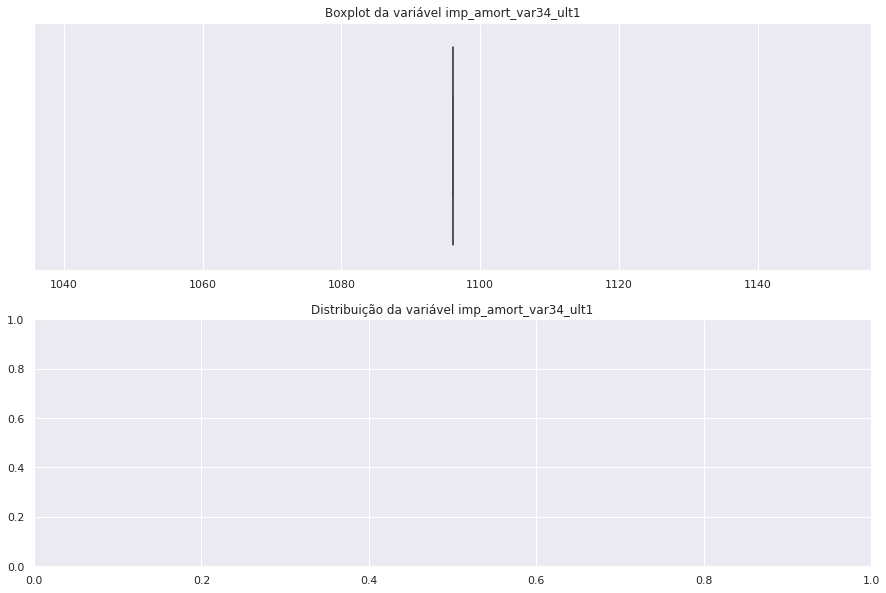

count       1.00
mean     1096.02
std          NaN
min      1096.02
25%      1096.02
50%      1096.02
75%      1096.02
max      1096.02
Name: imp_amort_var34_ult1, dtype: float64

% de zeros: 0.9999812079527943





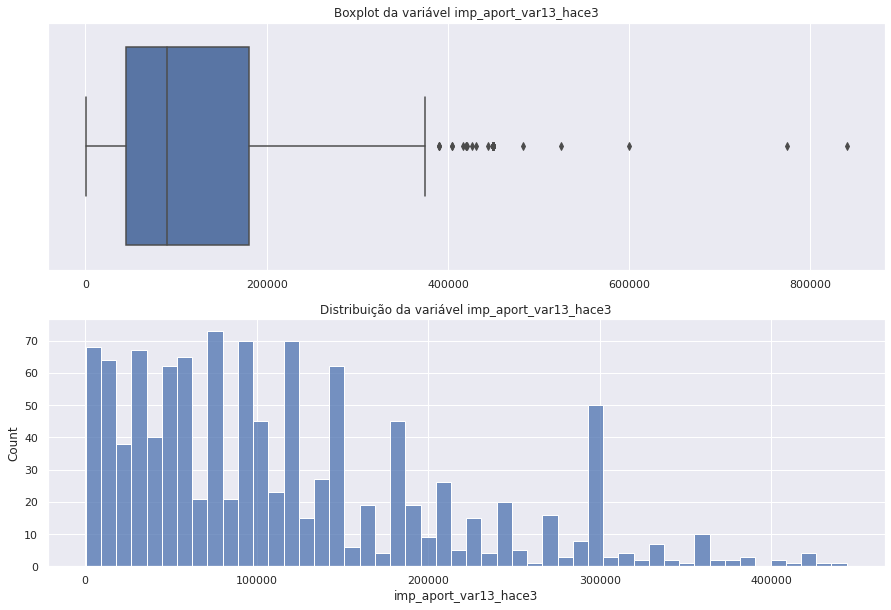

count      1180.000000
mean     125819.896602
std      111725.283070
min         300.000000
25%       45000.000000
50%       90000.000000
75%      180000.000000
max      840000.000000
Name: imp_aport_var13_hace3, dtype: float64

% de zeros: 0.9778253842973653





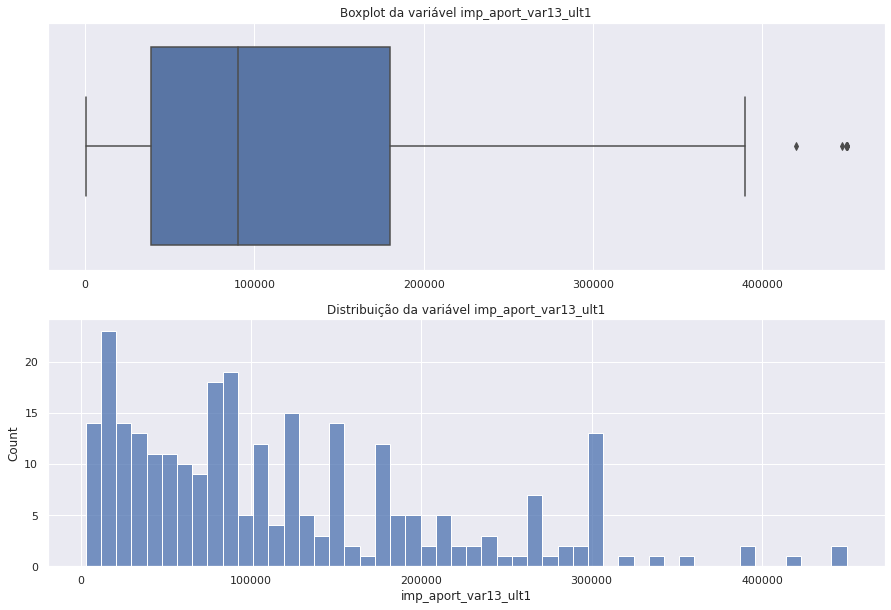

count       281.000000
mean     121209.889537
std      103011.426353
min         300.000000
25%       39000.000000
50%       90000.000000
75%      180000.000000
max      450000.000000
Name: imp_aport_var13_ult1, dtype: float64

% de zeros: 0.9947194347352201





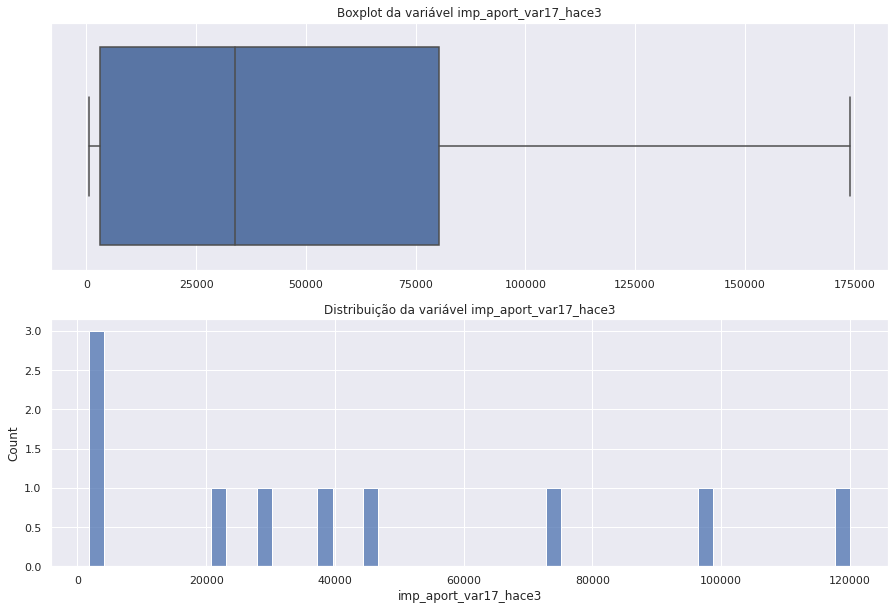

count        12.000000
mean      50852.500000
std       55247.771995
min         600.000000
25%        3000.000000
50%       33750.000000
75%       80444.550000
max      174000.000000
Name: imp_aport_var17_hace3, dtype: float64

% de zeros: 0.9997744954335326





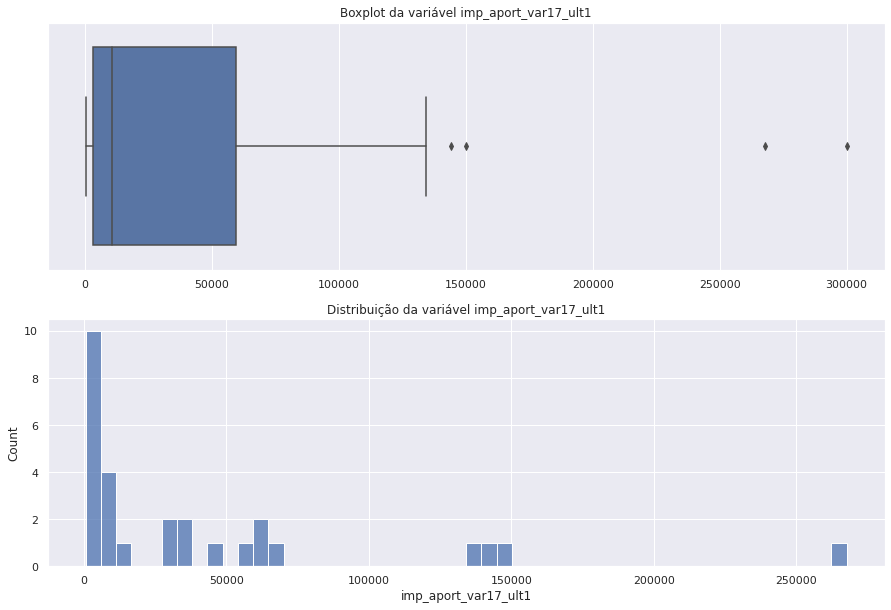

count        30.000000
mean      49499.675000
std       76839.469943
min         300.000000
25%        2999.865000
50%       10500.030000
75%       59413.785000
max      300005.910000
Name: imp_aport_var17_ult1, dtype: float64

% de zeros: 0.9994362385838313





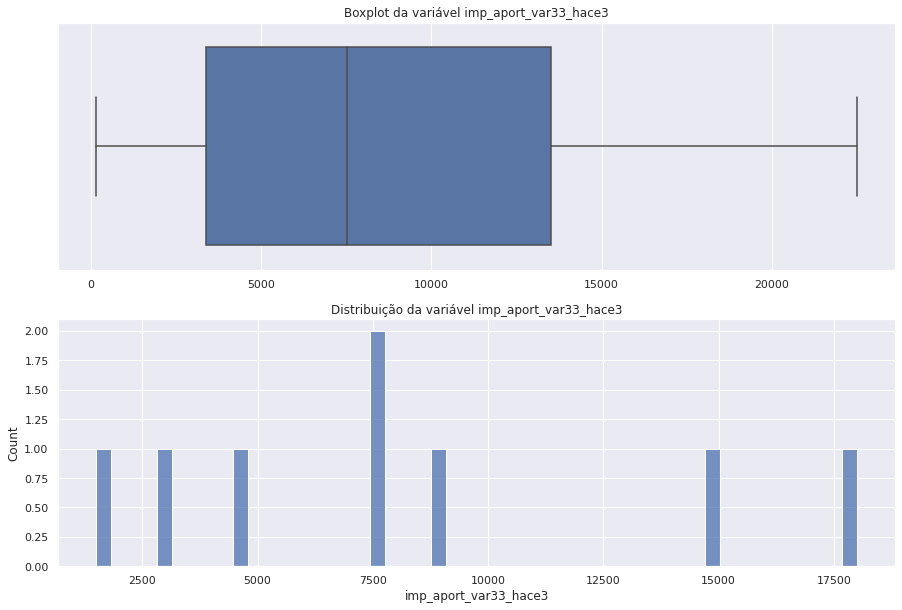

count       10.000000
mean      8868.000000
std       7411.021522
min        150.000000
25%       3375.000000
50%       7515.000000
75%      13500.000000
max      22500.000000
Name: imp_aport_var33_hace3, dtype: float64

% de zeros: 0.9998120795279438





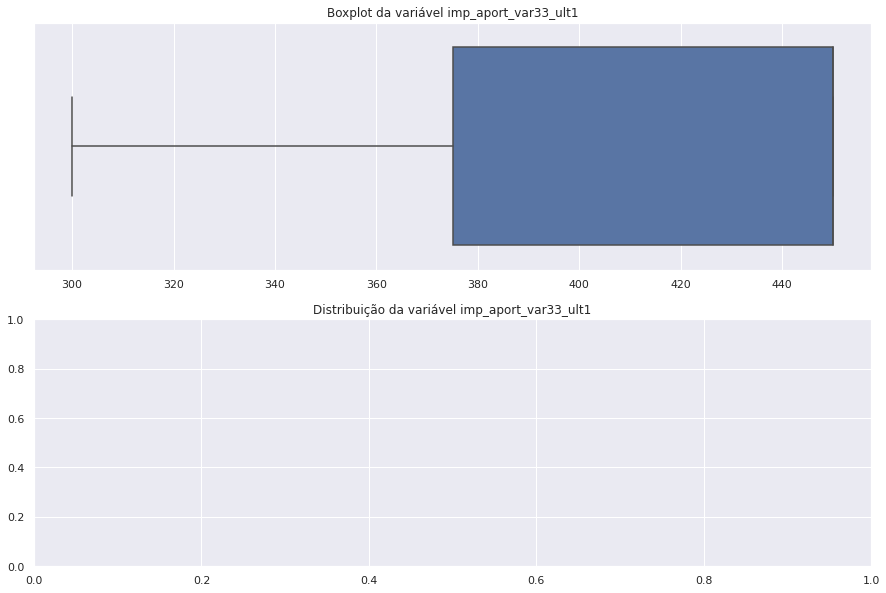

count      3.00000
mean     400.00000
std       86.60254
min      300.00000
25%      375.00000
50%      450.00000
75%      450.00000
max      450.00000
Name: imp_aport_var33_ult1, dtype: float64

% de zeros: 0.9999436238583831





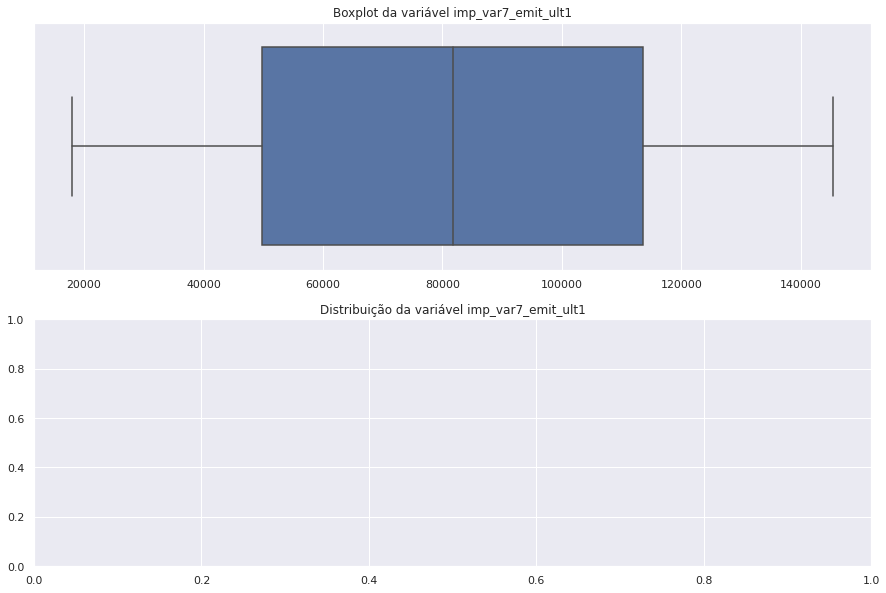

count         2.000000
mean      81692.460000
std       90074.740753
min       18000.000000
25%       49846.230000
50%       81692.460000
75%      113538.690000
max      145384.920000
Name: imp_var7_emit_ult1, dtype: float64

% de zeros: 0.9999624159055888





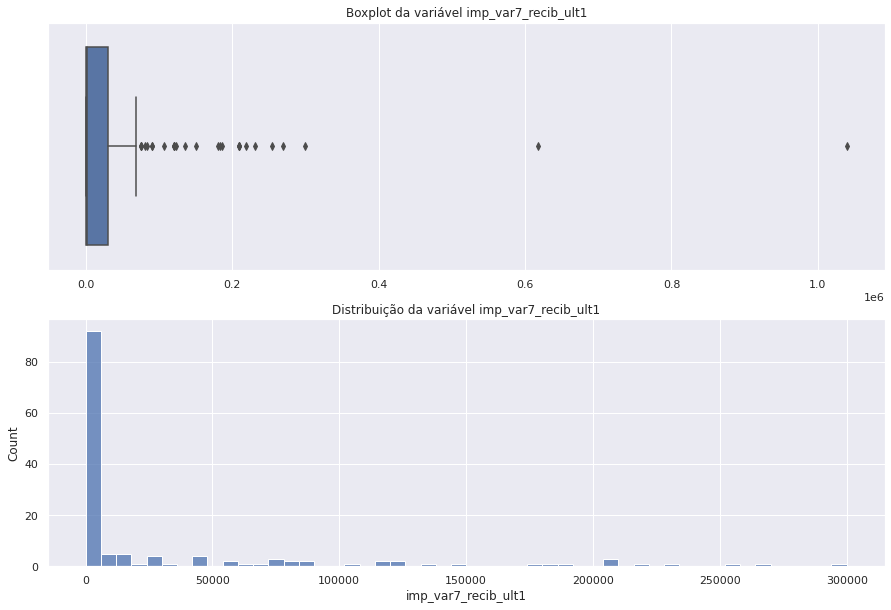

count    1.450000e+02
mean     4.432039e+04
std      1.156748e+05
min      3.078000e+01
25%      9.000000e+02
50%      2.273040e+03
75%      3.000000e+04
max      1.039260e+06
Name: imp_var7_recib_ult1, dtype: float64

% de zeros: 0.9972751531551848





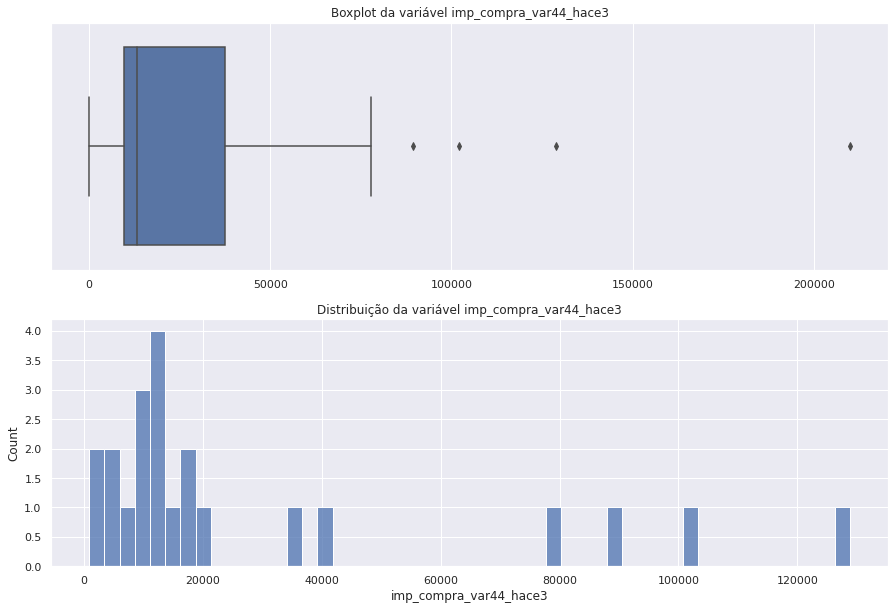

count        24.000000
mean      35765.988750
std       51016.554775
min          27.300000
25%        9617.842500
50%       13118.700000
75%       37485.217500
max      210001.350000
Name: imp_compra_var44_hace3, dtype: float64

% de zeros: 0.9995489908670651





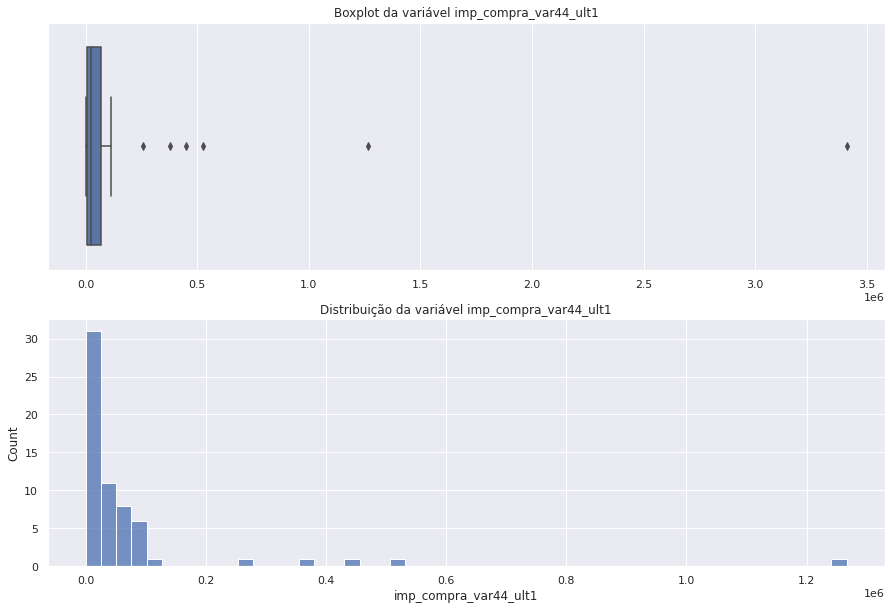

count    6.400000e+01
mean     1.252733e+05
std      4.546361e+05
min      9.966000e+01
25%      5.355855e+03
50%      2.499183e+04
75%      6.801737e+04
max      3.410059e+06
Name: imp_compra_var44_ult1, dtype: float64

% de zeros: 0.9987973089788401





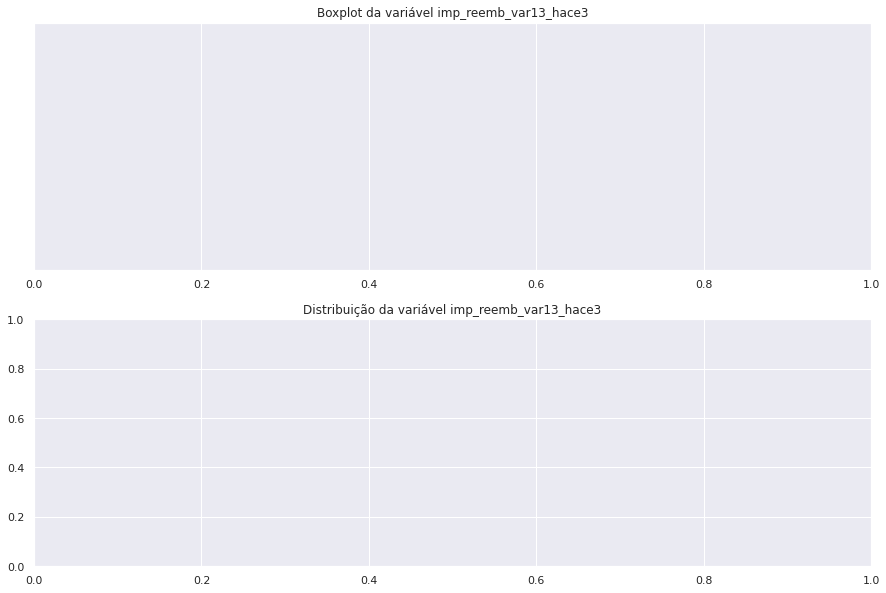

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: imp_reemb_var13_hace3, dtype: float64

% de zeros: 1.0





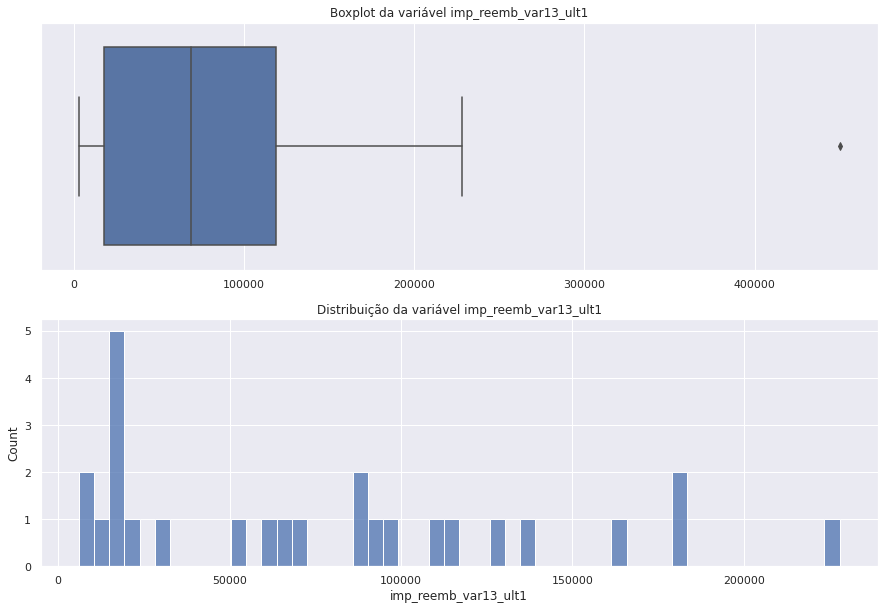

count        28.000000
mean      88220.181429
std       94450.107178
min        3000.000000
25%       18000.000000
50%       69000.000000
75%      119071.560000
max      450000.000000
Name: imp_reemb_var13_ult1, dtype: float64

% de zeros: 0.9994738226782426





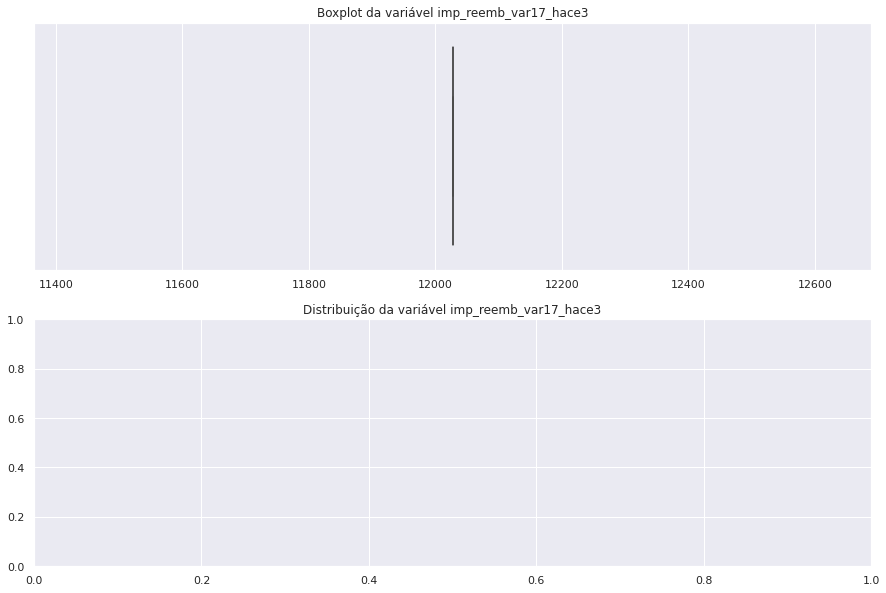

count        1.00
mean     12027.15
std           NaN
min      12027.15
25%      12027.15
50%      12027.15
75%      12027.15
max      12027.15
Name: imp_reemb_var17_hace3, dtype: float64

% de zeros: 0.9999812079527943





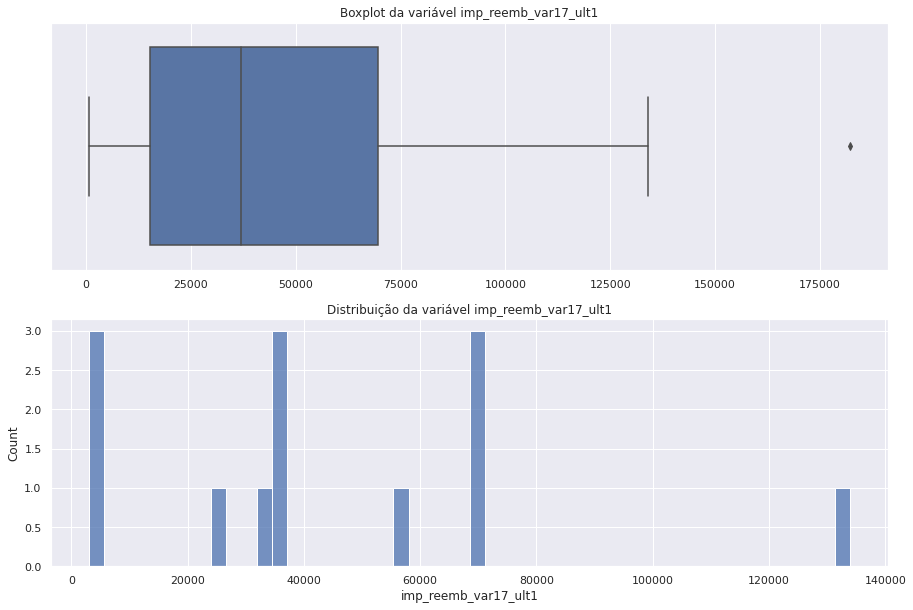

count        15.00000
mean      50807.50600
std       50694.16741
min         763.62000
25%       15360.60000
50%       37035.75000
75%       69609.55500
max      182132.97000
Name: imp_reemb_var17_ult1, dtype: float64

% de zeros: 0.9997181192919157





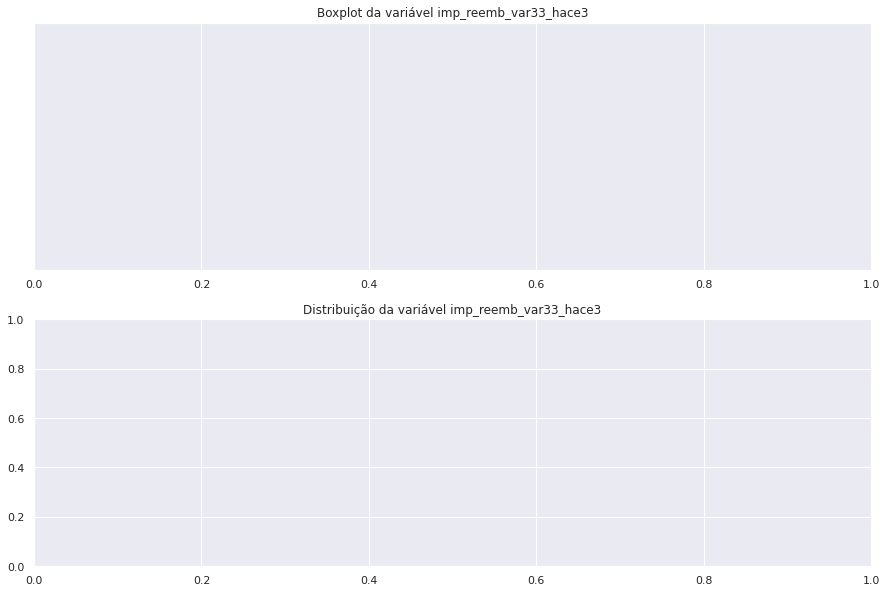

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: imp_reemb_var33_hace3, dtype: float64

% de zeros: 1.0





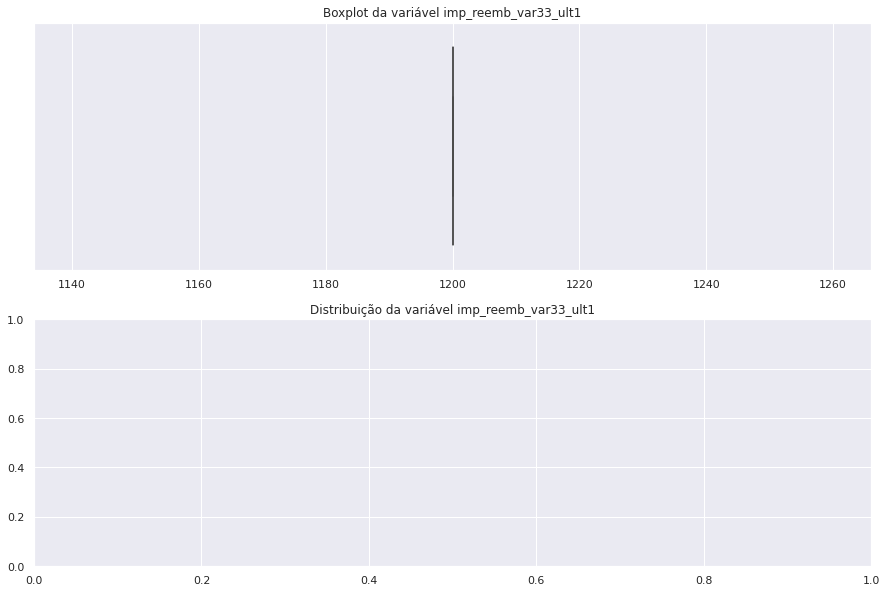

count       1.0
mean     1200.0
std         NaN
min      1200.0
25%      1200.0
50%      1200.0
75%      1200.0
max      1200.0
Name: imp_reemb_var33_ult1, dtype: float64

% de zeros: 0.9999812079527943





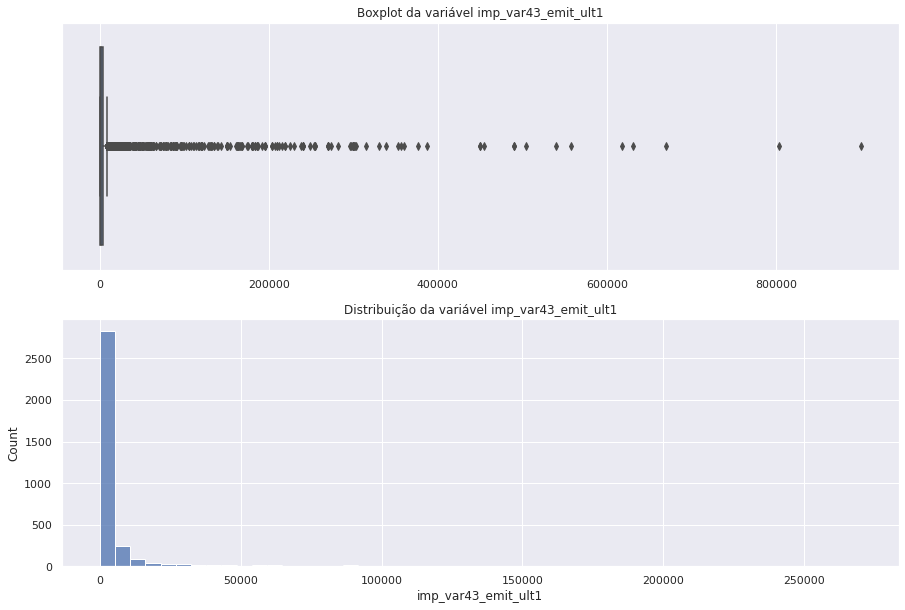

count      3560.000000
mean      13053.887688
std       52017.392063
min           0.030000
25%         300.000000
50%        1249.125000
75%        3481.890000
max      900006.000000
Name: imp_var43_emit_ult1, dtype: float64

% de zeros: 0.9331003119479836





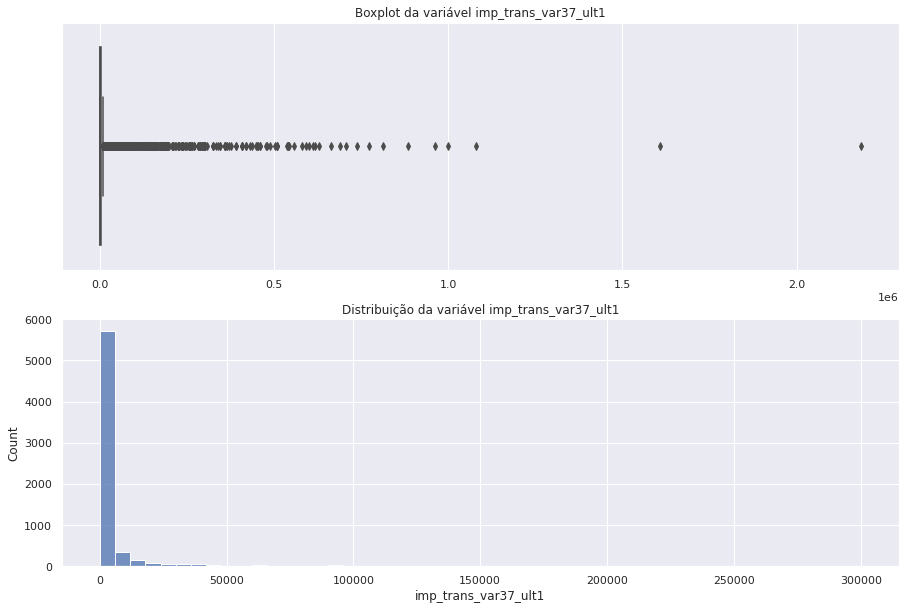

count    6.985000e+03
mean     1.498596e+04
std      6.759256e+04
min      3.000000e-02
25%      3.000000e+02
50%      1.200000e+03
75%      3.449880e+03
max      2.183564e+06
Name: imp_trans_var37_ult1, dtype: float64

% de zeros: 0.8687375502687262





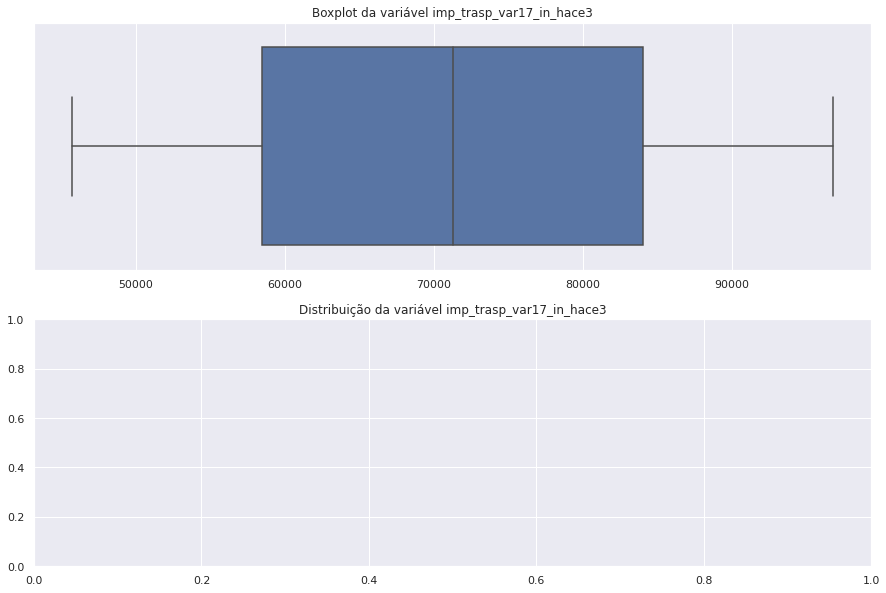

count        2.000000
mean     71261.460000
std      36090.701827
min      45741.480000
25%      58501.470000
50%      71261.460000
75%      84021.450000
max      96781.440000
Name: imp_trasp_var17_in_hace3, dtype: float64

% de zeros: 0.9999624159055888





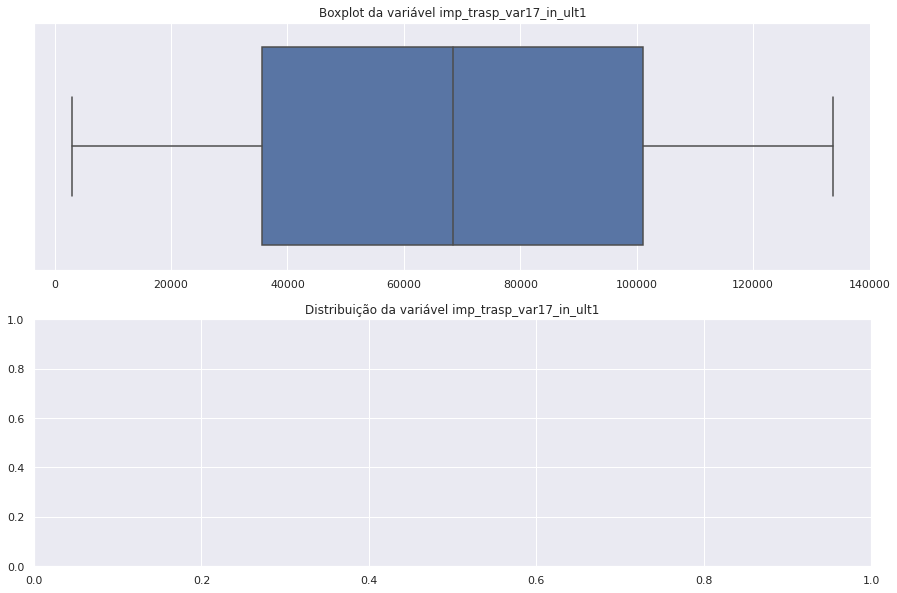

count         2.000000
mean      68365.200000
std       92440.606906
min        2999.820000
25%       35682.510000
50%       68365.200000
75%      101047.890000
max      133730.580000
Name: imp_trasp_var17_in_ult1, dtype: float64

% de zeros: 0.9999624159055888





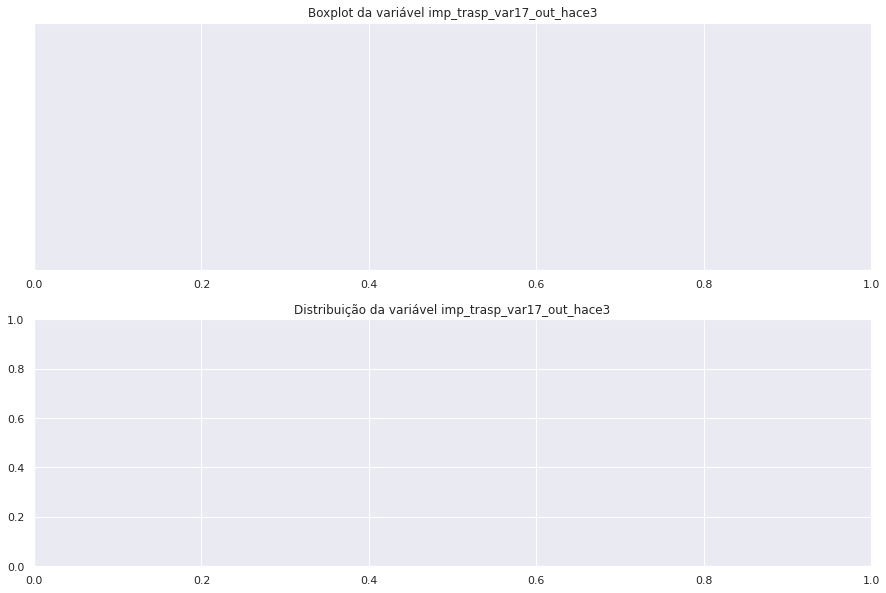

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: imp_trasp_var17_out_hace3, dtype: float64

% de zeros: 1.0





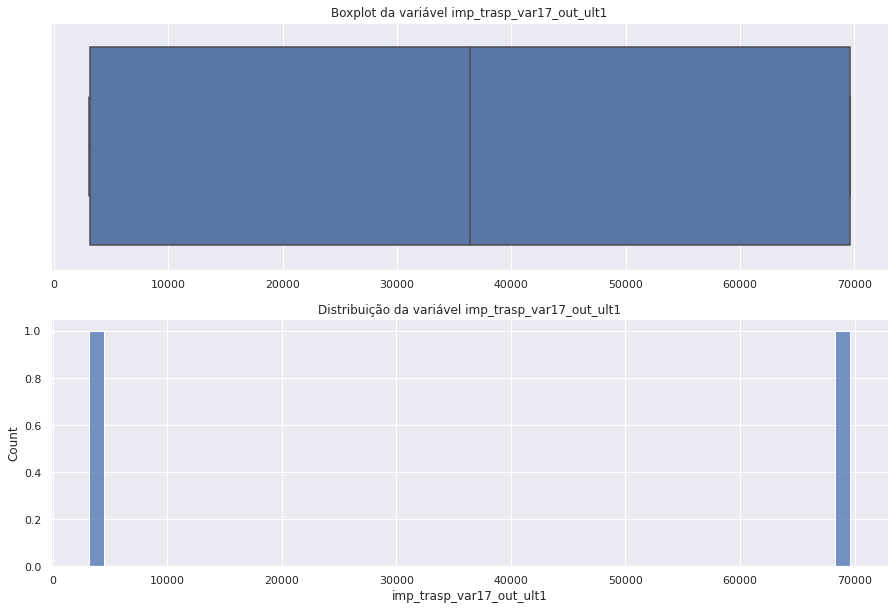

count        4.000000
mean     36368.272500
std      38385.030631
min       3059.520000
25%       3159.082500
50%      36395.640000
75%      69604.830000
max      69622.290000
Name: imp_trasp_var17_out_ult1, dtype: float64

% de zeros: 0.9999248318111775





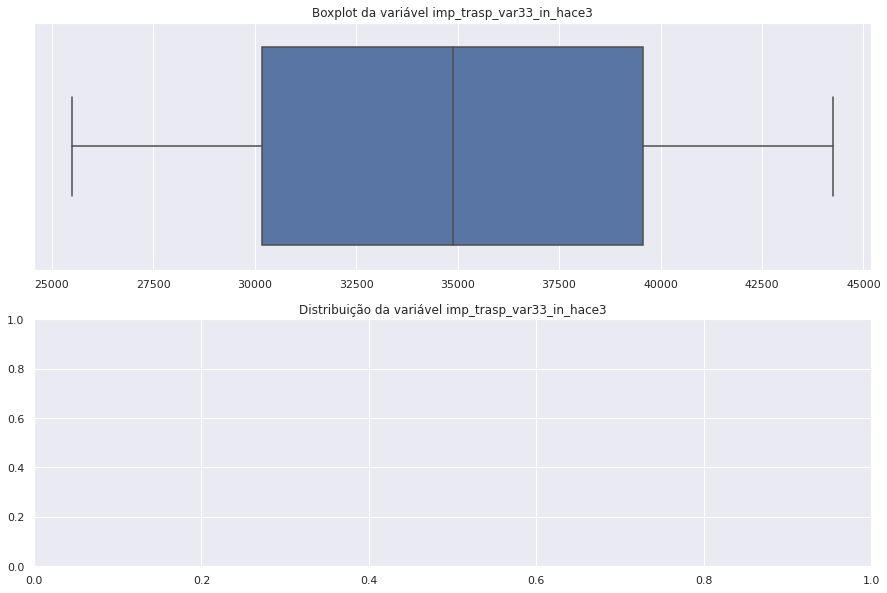

count        2.00000
mean     34876.44000
std      13257.74303
min      25501.80000
25%      30189.12000
50%      34876.44000
75%      39563.76000
max      44251.08000
Name: imp_trasp_var33_in_hace3, dtype: float64

% de zeros: 0.9999624159055888





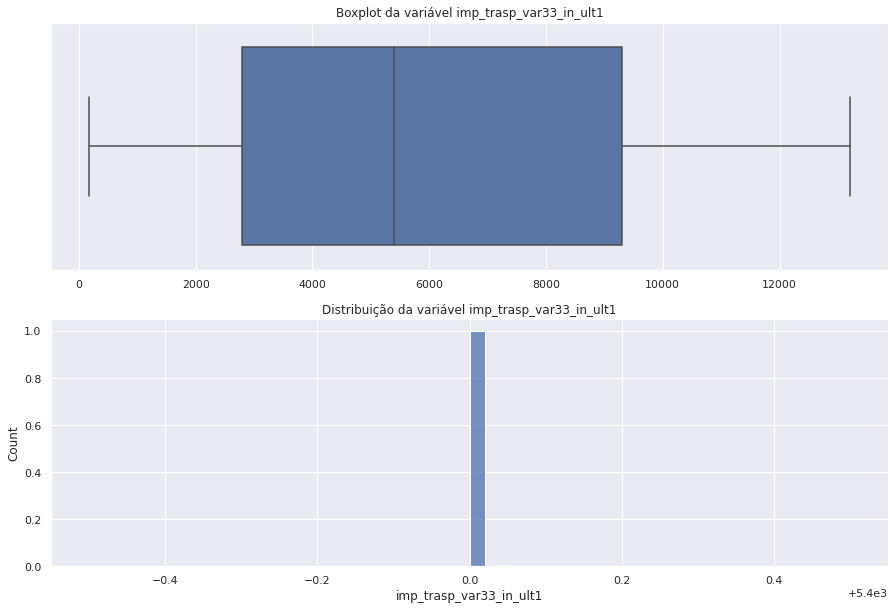

count        3.000000
mean      6260.470000
std       6559.083589
min        174.090000
25%       2787.045000
50%       5400.000000
75%       9303.660000
max      13207.320000
Name: imp_trasp_var33_in_ult1, dtype: float64

% de zeros: 0.9999436238583831





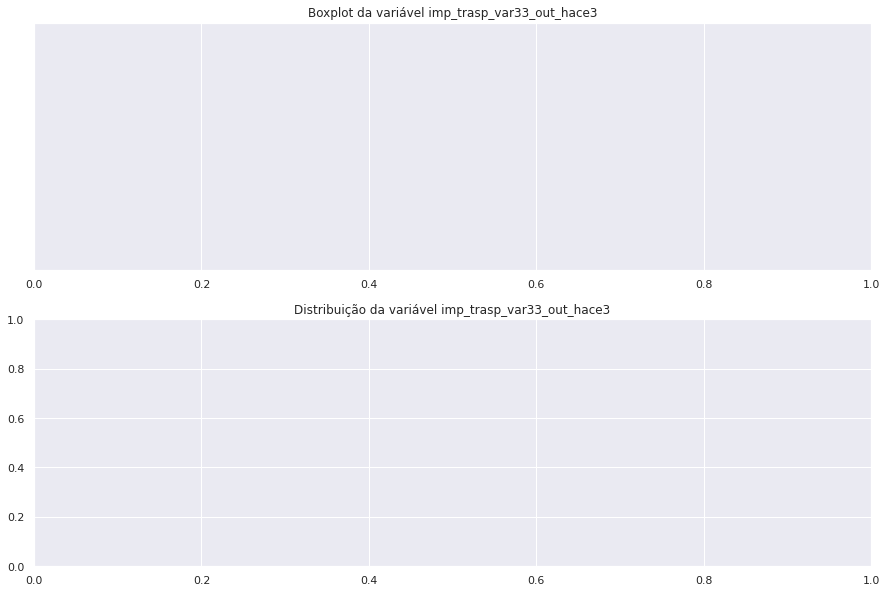

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: imp_trasp_var33_out_hace3, dtype: float64

% de zeros: 1.0





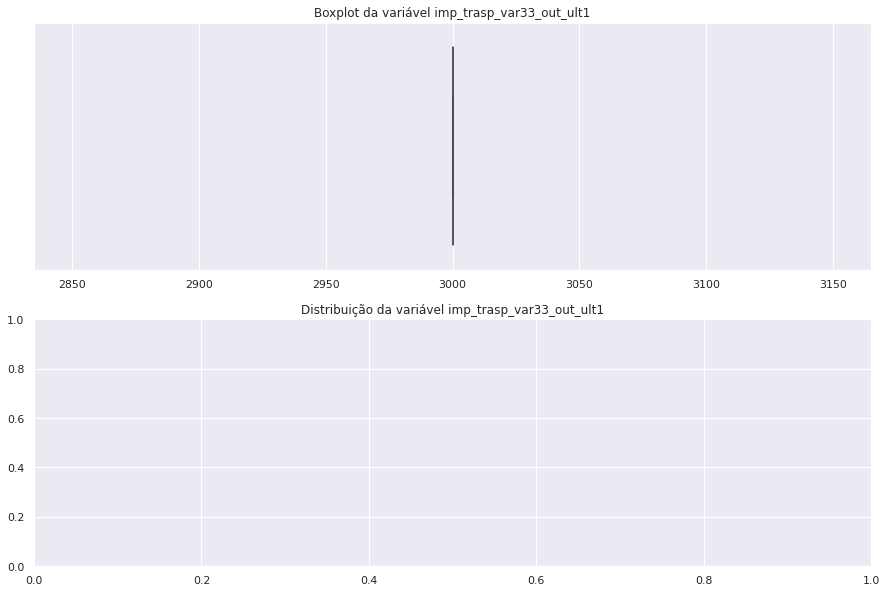

count       1.0
mean     3000.0
std         NaN
min      3000.0
25%      3000.0
50%      3000.0
75%      3000.0
max      3000.0
Name: imp_trasp_var33_out_ult1, dtype: float64

% de zeros: 0.9999812079527943





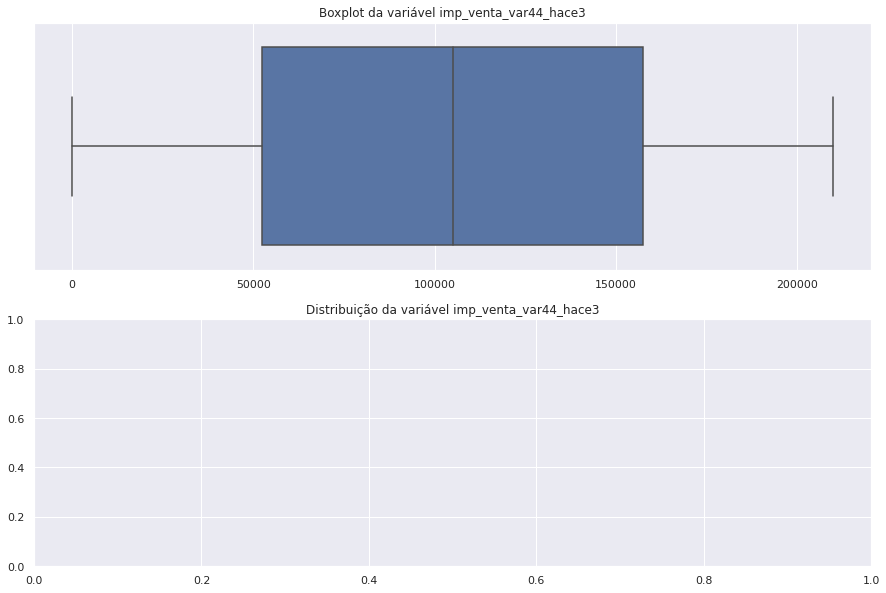

count         2.000000
mean     104928.780000
std      148358.950573
min          23.160000
25%       52475.970000
50%      104928.780000
75%      157381.590000
max      209834.400000
Name: imp_venta_var44_hace3, dtype: float64

% de zeros: 0.9999624159055888





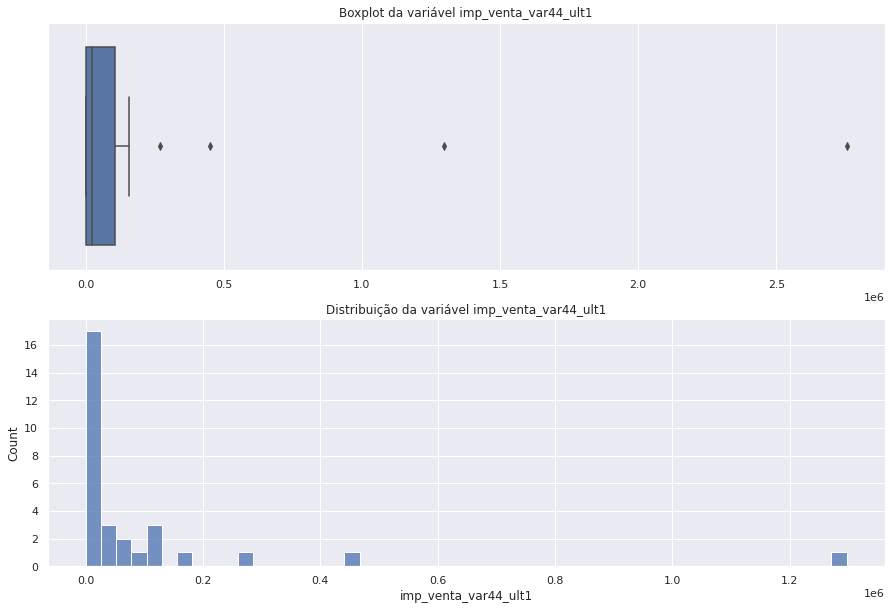

count    3.200000e+01
mean     1.798122e+05
std      5.267105e+05
min      7.842000e+01
25%      2.580562e+03
50%      2.195043e+04
75%      1.072223e+05
max      2.754476e+06
Name: imp_venta_var44_ult1, dtype: float64

% de zeros: 0.9993986544894201


In [35]:
for col in imp_features:
  df_aux = df_train[df_train[col] != 0]
  numerical_summary(col, df_aux)
  print(f'% de zeros: {zeros_by_col[col]}')

As variáveis com prefixo `imp` são contínuas em grande parte, tem uma distribuição positiva com muitos valores zerados, e temos muitas variáveis com outliers.

#### Prefixo `saldo`

Observando as variáveis com menos porcentagem de zeros primeiro.

In [36]:
saldo_cond = zeros_by_col[saldo_features] < .5

saldo_features_low_zeros = zeros_by_col[saldo_features][saldo_cond].index
saldo_features_high_zeros = zeros_by_col[saldo_features][~saldo_cond].index

saldo_features_low_zeros

Index(['saldo_var5', 'saldo_var30', 'saldo_var42', 'saldo_medio_var5_hace2',
       'saldo_medio_var5_hace3', 'saldo_medio_var5_ult1',
       'saldo_medio_var5_ult3'],
      dtype='object')

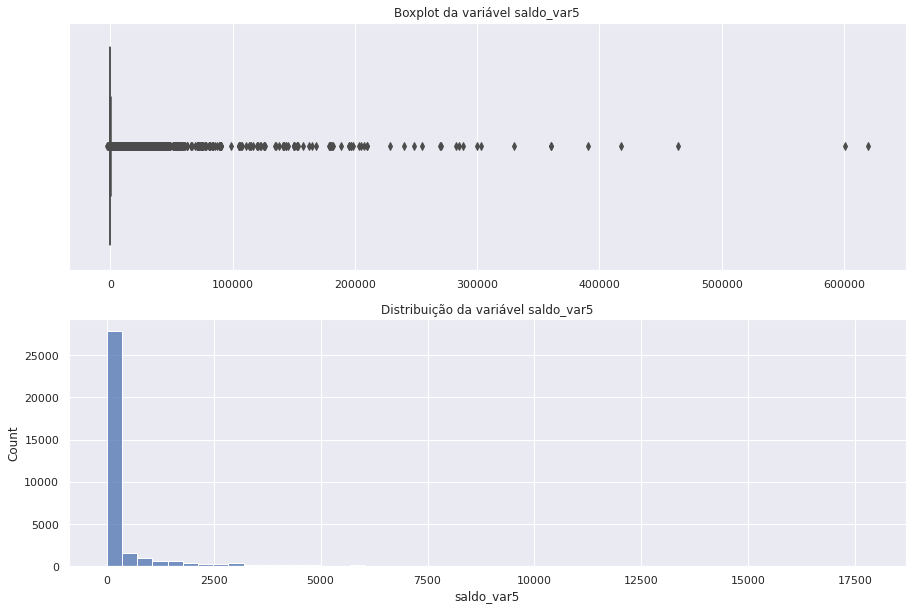

count     53214.000000
mean       1021.131505
std        9601.604627
min       -2895.720000
25%           0.000000
50%           3.000000
75%          90.000000
max      619329.150000
Name: saldo_var5, dtype: float64

% de zeros: 0.3352125380538956





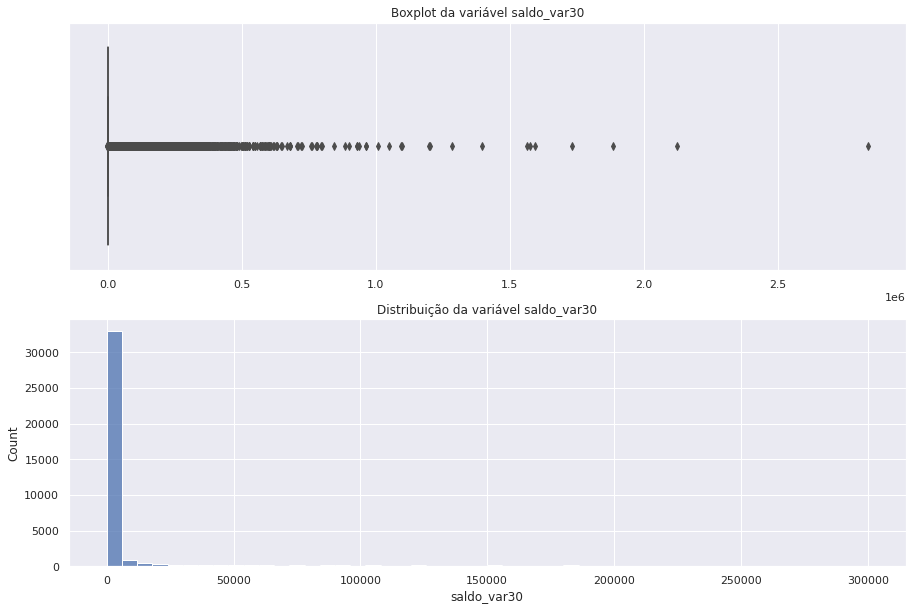

count    5.321400e+04
mean     1.365846e+04
std      6.104655e+04
min     -4.942260e+03
25%      0.000000e+00
50%      3.000000e+00
75%      2.409675e+02
max      2.835348e+06
Name: saldo_var30, dtype: float64

% de zeros: 0.26613297252602697





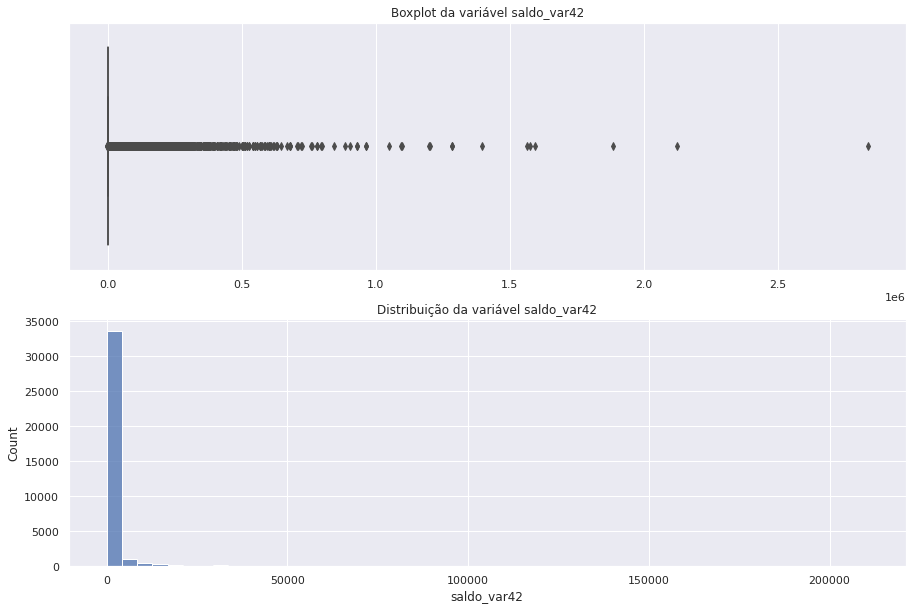

count    5.321400e+04
mean     7.158061e+03
std      4.786330e+04
min     -4.942260e+03
25%      0.000000e+00
50%      3.000000e+00
75%      1.200000e+02
max      2.835348e+06
Name: saldo_var42, dtype: float64

% de zeros: 0.2853384447701733





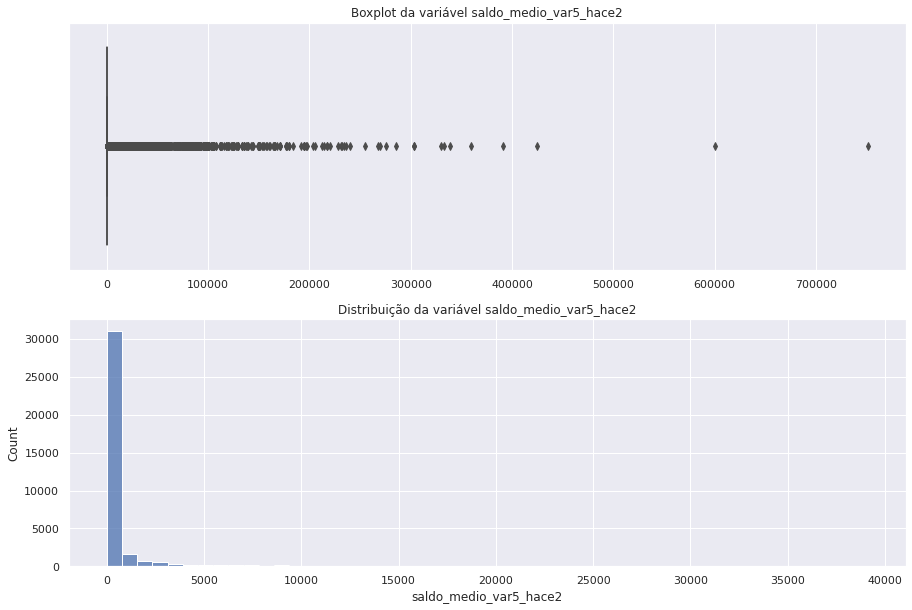

count     53214.000000
mean       1572.493515
std       11500.407099
min         -52.740000
25%           0.000000
50%           3.000000
75%          90.000000
max      751111.110000
Name: saldo_medio_var5_hace2, dtype: float64

% de zeros: 0.3050325102416657





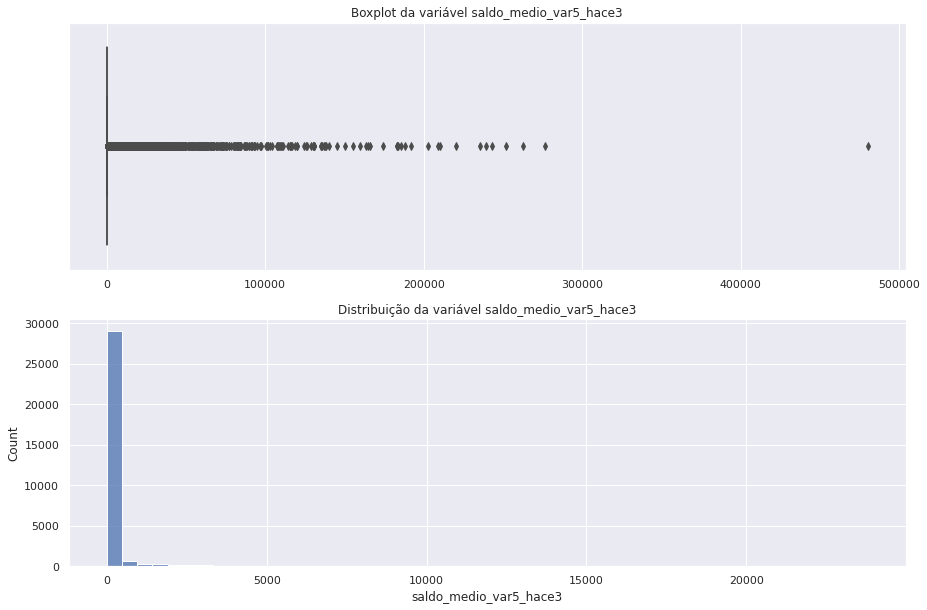

count     53214.000000
mean        866.865607
std        7480.146536
min          -5.310000
25%           0.000000
50%           0.990000
75%          12.240000
max      480000.000000
Name: saldo_medio_var5_hace3, dtype: float64

% de zeros: 0.3895967226669673





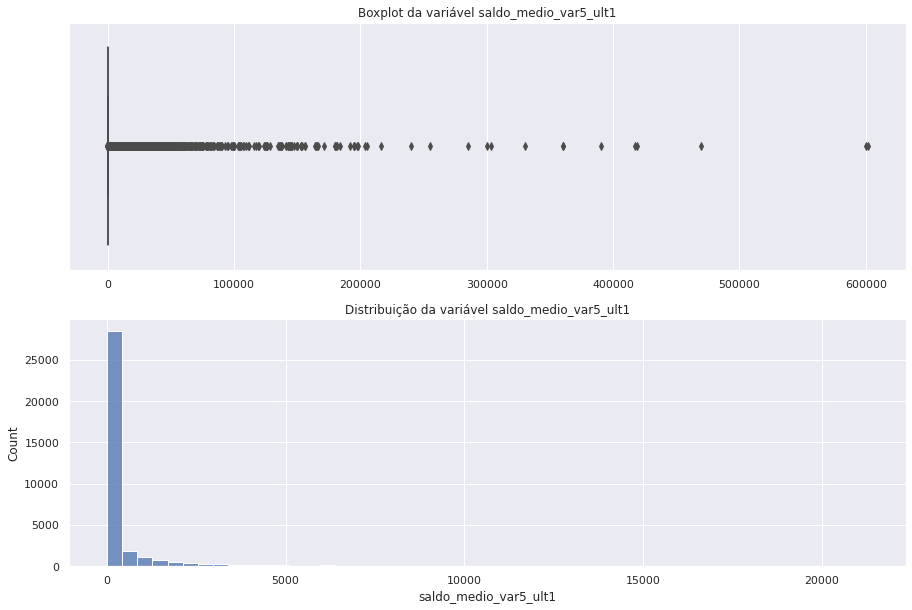

count     53214.000000
mean       1088.899443
std        9603.361364
min        -733.050000
25%           0.000000
50%           3.000000
75%          90.000000
max      601428.600000
Name: saldo_medio_var5_ult1, dtype: float64

% de zeros: 0.3232232119367084





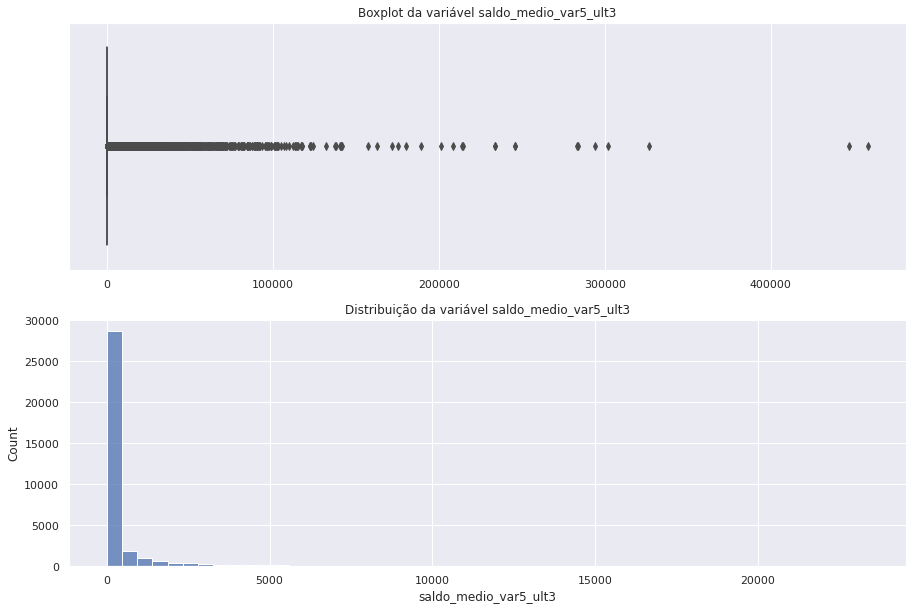

count     53214.000000
mean       1054.379049
std        7721.713533
min        -173.640000
25%           0.000000
50%           2.730000
75%          83.790000
max      458475.810000
Name: saldo_medio_var5_ult3, dtype: float64

% de zeros: 0.3232232119367084


In [37]:
for col in saldo_features_low_zeros:
  numerical_summary(col, df_train)
  print(f'% de zeros: {zeros_by_col[col]}')

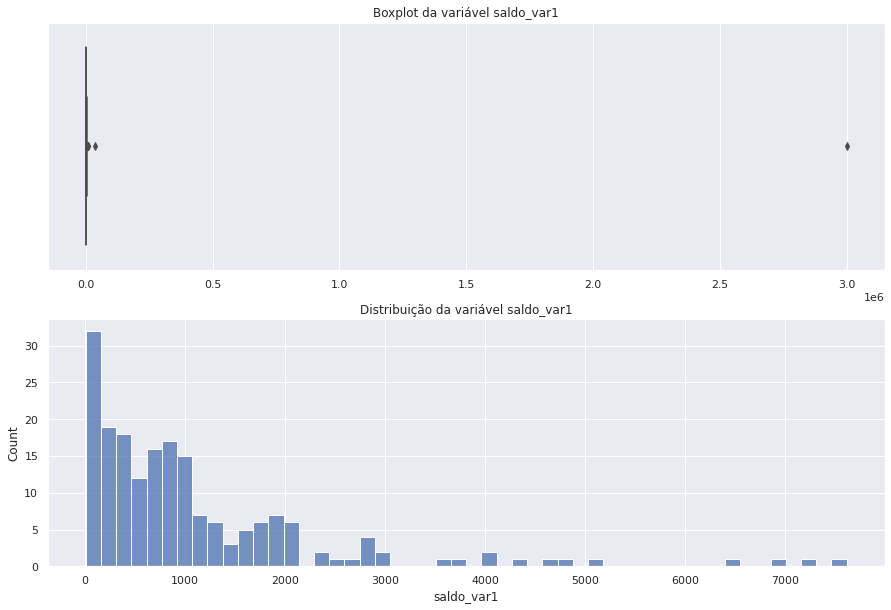

count    1.950000e+02
mean     1.667443e+04
std      2.147601e+05
min     -9.000000e-01
25%      2.935500e+02
50%      7.431000e+02
75%      1.498830e+03
max      3.000000e+06
Name: saldo_var1, dtype: float64

% de zeros: 0.9963355507949035





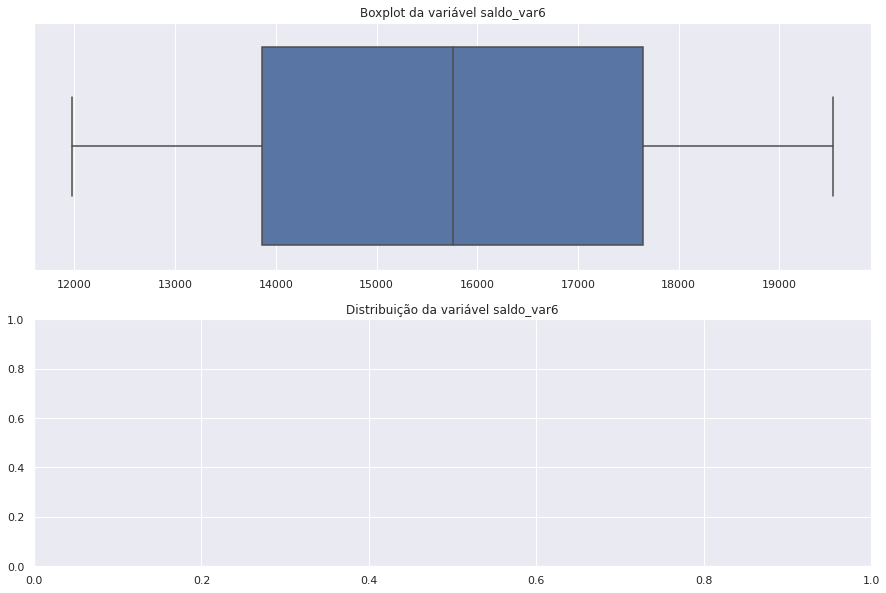

count        2.000000
mean     15754.200000
std       5342.333153
min      11976.600000
25%      13865.400000
50%      15754.200000
75%      17643.000000
max      19531.800000
Name: saldo_var6, dtype: float64

% de zeros: 0.9999624159055888





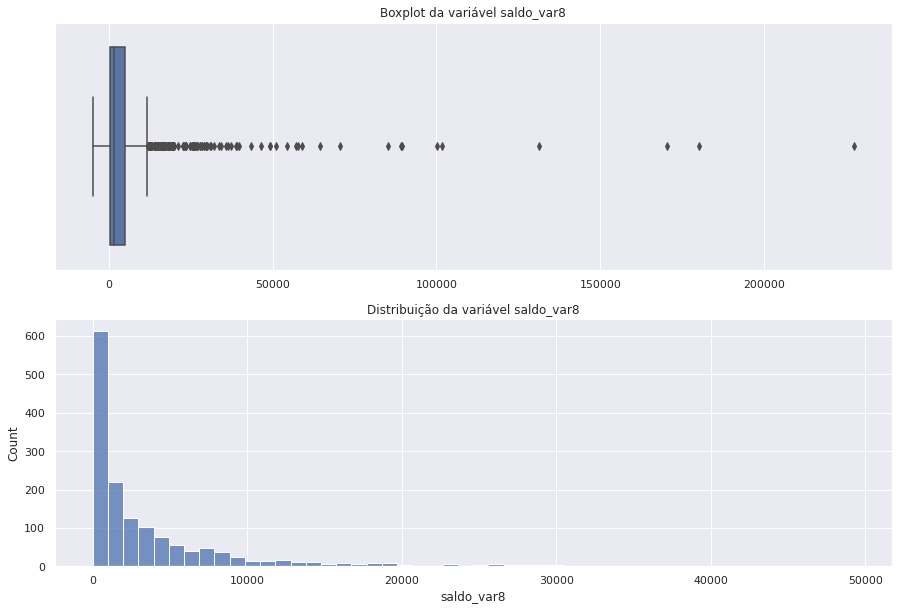

count      1526.00000
mean       4863.10095
std       12658.54139
min       -4942.26000
25%         240.78750
50%        1530.00000
75%        4799.51250
max      227354.91000
Name: saldo_var8, dtype: float64

% de zeros: 0.9713233359642199





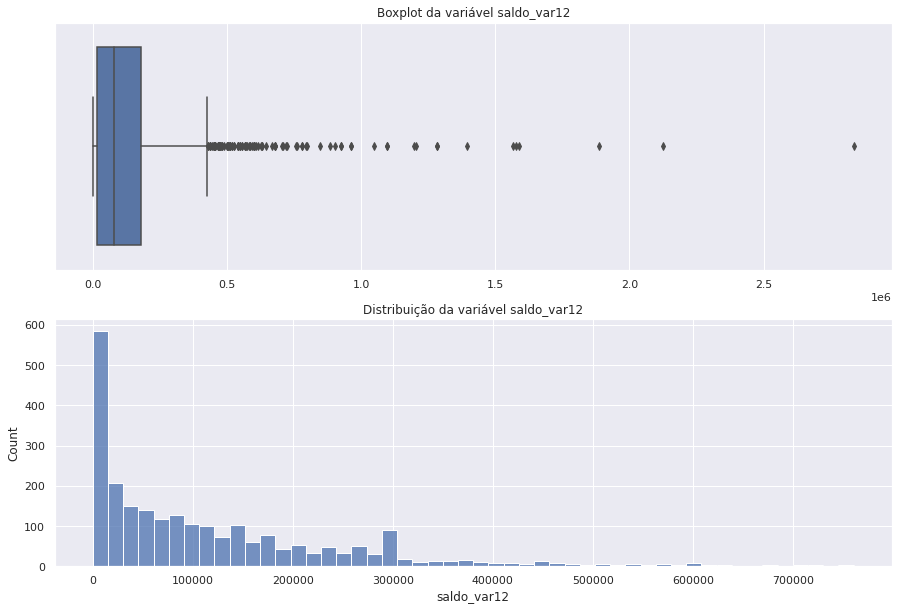

count    2.466000e+03
mean     1.294071e+05
std      1.775601e+05
min      3.000000e-02
25%      1.568164e+04
50%      7.803585e+04
75%      1.804318e+05
max      2.835288e+06
Name: saldo_var12, dtype: float64

% de zeros: 0.9536588115909347





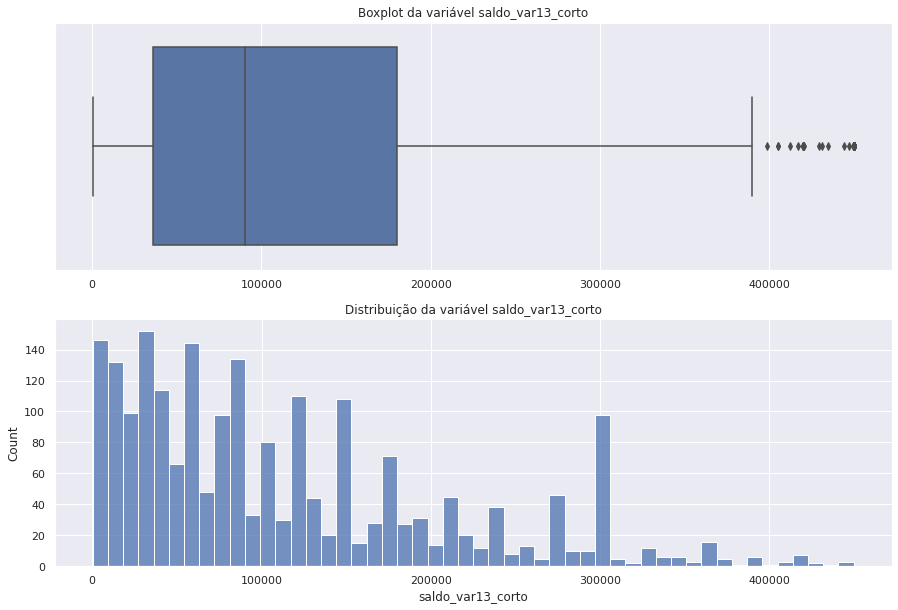

count      2203.000000
mean     121858.980531
std      108023.036690
min         300.000000
25%       36001.500000
50%       90000.000000
75%      180000.000000
max      450000.000000
Name: saldo_var13_corto, dtype: float64

% de zeros: 0.9586011200060135





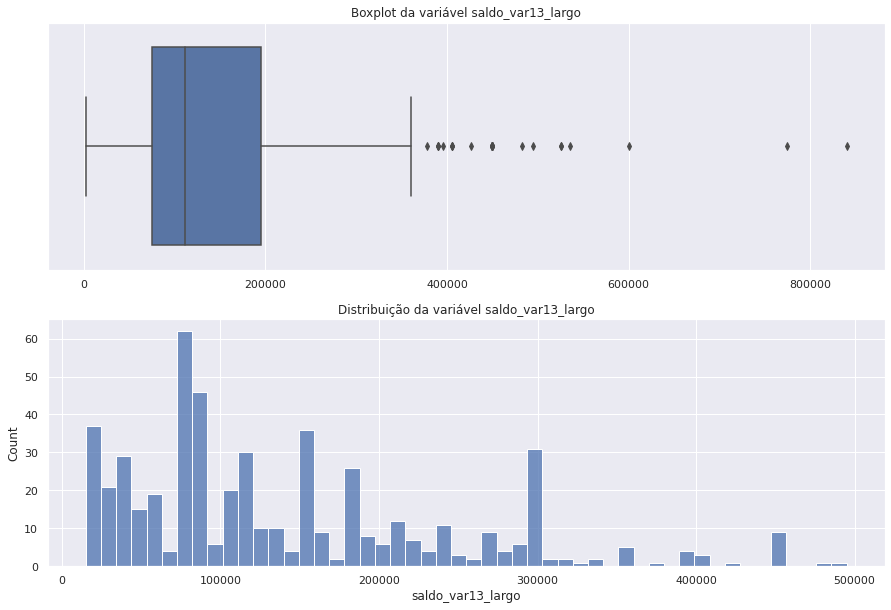

count       534.000000
mean     144977.247191
std      116362.002945
min        2250.000000
25%       74925.750000
50%      111900.000000
75%      195244.890000
max      840000.000000
Name: saldo_var13_largo, dtype: float64

% de zeros: 0.9899650467921975





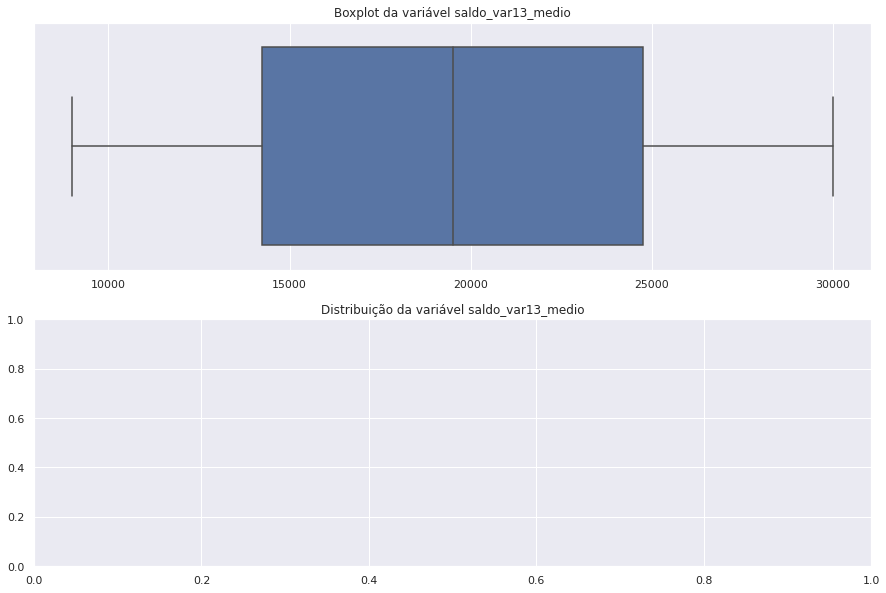

count        2.000000
mean     19500.000000
std      14849.242405
min       9000.000000
25%      14250.000000
50%      19500.000000
75%      24750.000000
max      30000.000000
Name: saldo_var13_medio, dtype: float64

% de zeros: 0.9999624159055888





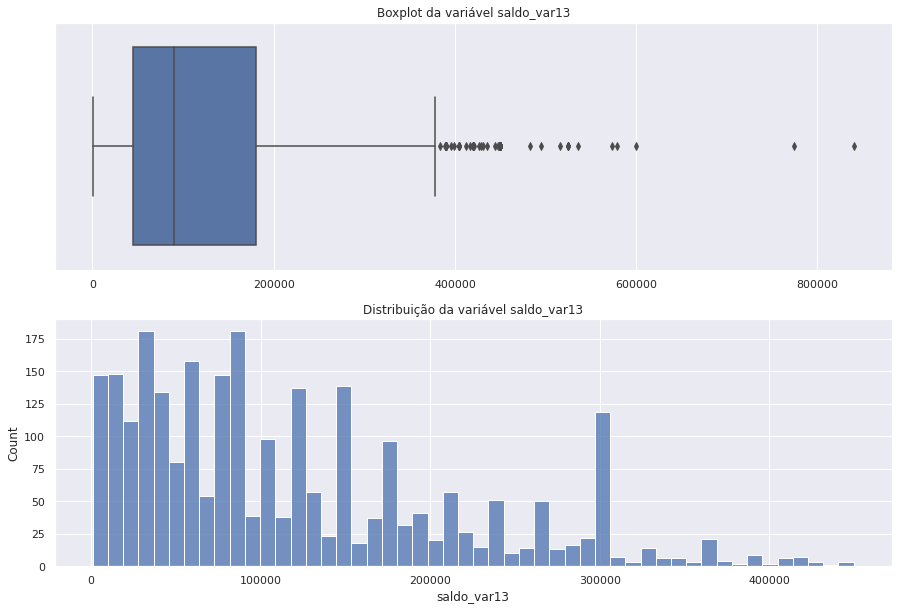

count      2709.000000
mean     127689.990443
std      111318.377163
min         300.000000
25%       45000.000000
50%       90000.000000
75%      180000.000000
max      840000.000000
Name: saldo_var13, dtype: float64

% de zeros: 0.9490923441199685





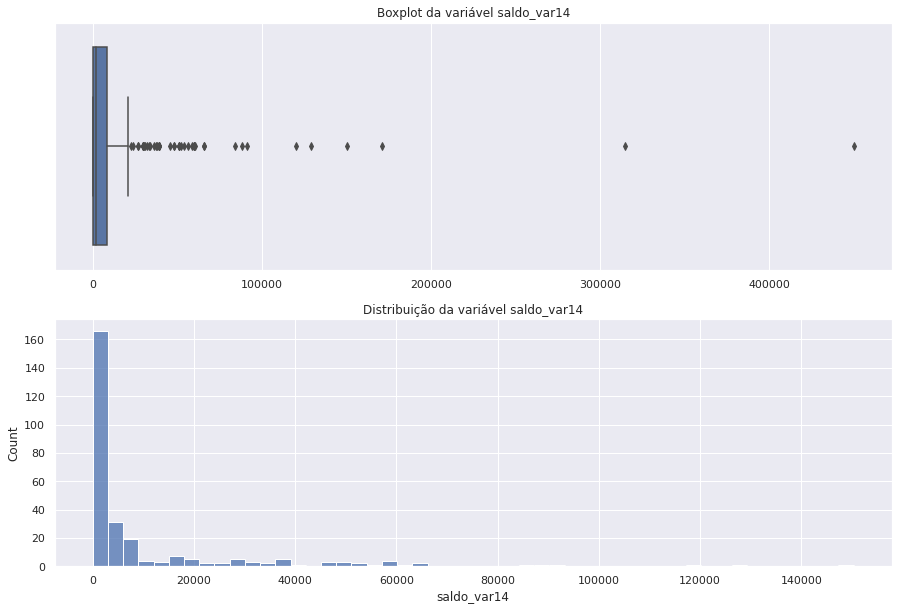

count       283.000000
mean      13740.034770
std       39202.496415
min           0.060000
25%         166.395000
50%        2040.720000
75%        8700.000000
max      450000.000000
Name: saldo_var14, dtype: float64

% de zeros: 0.9946818506408088





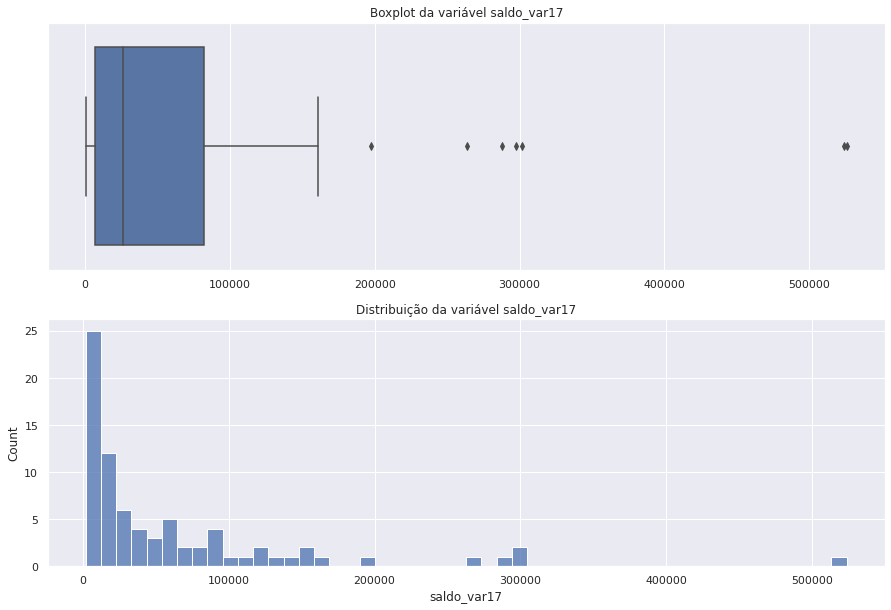

count        80.000000
mean      66859.895625
std      102096.254076
min         606.330000
25%        6908.812500
50%       26018.115000
75%       82392.270000
max      525742.200000
Name: saldo_var17, dtype: float64

% de zeros: 0.9984966362235502





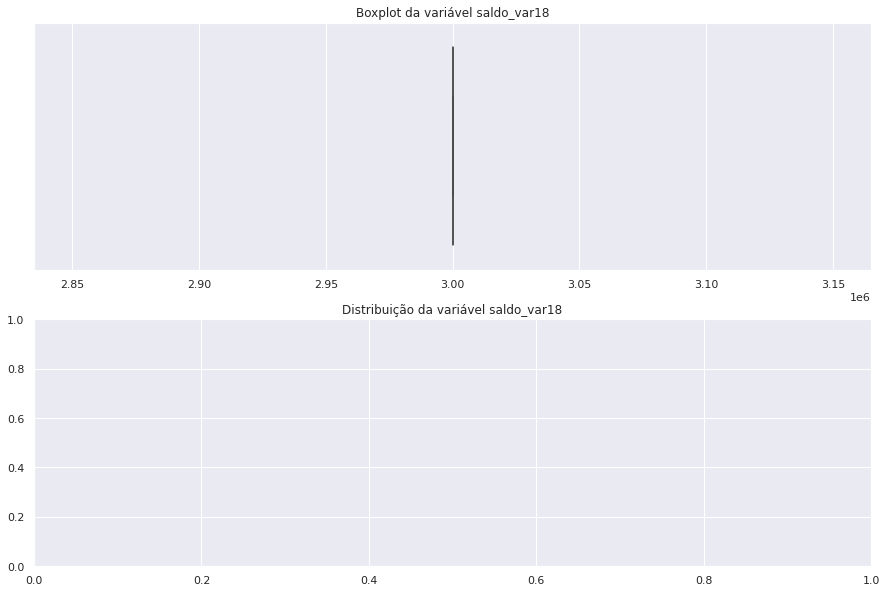

count          1.0
mean     3000000.0
std            NaN
min      3000000.0
25%      3000000.0
50%      3000000.0
75%      3000000.0
max      3000000.0
Name: saldo_var18, dtype: float64

% de zeros: 0.9999812079527943





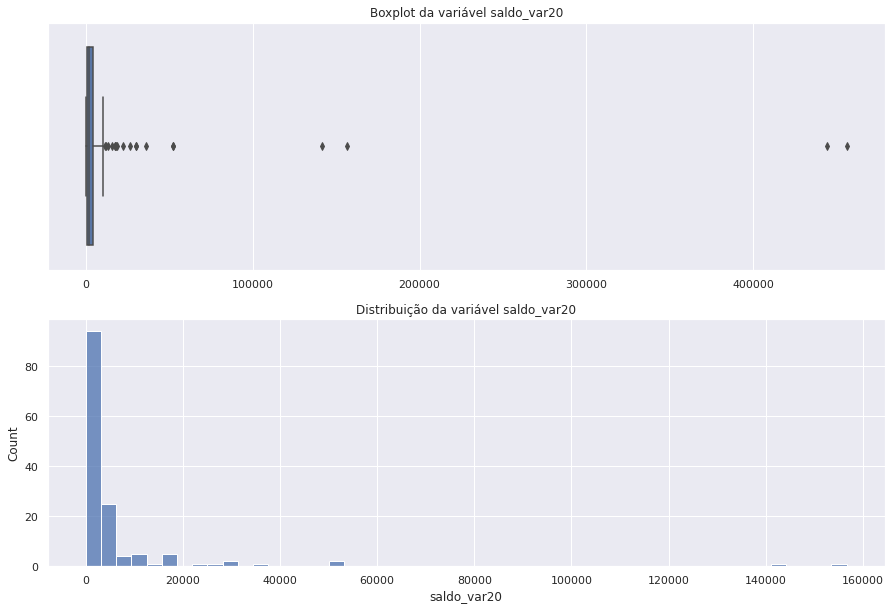

count       147.000000
mean      12573.939592
std       54861.398155
min           0.210000
25%         495.150000
50%        1771.350000
75%        4501.530000
max      455858.160000
Name: saldo_var20, dtype: float64

% de zeros: 0.9972375690607734





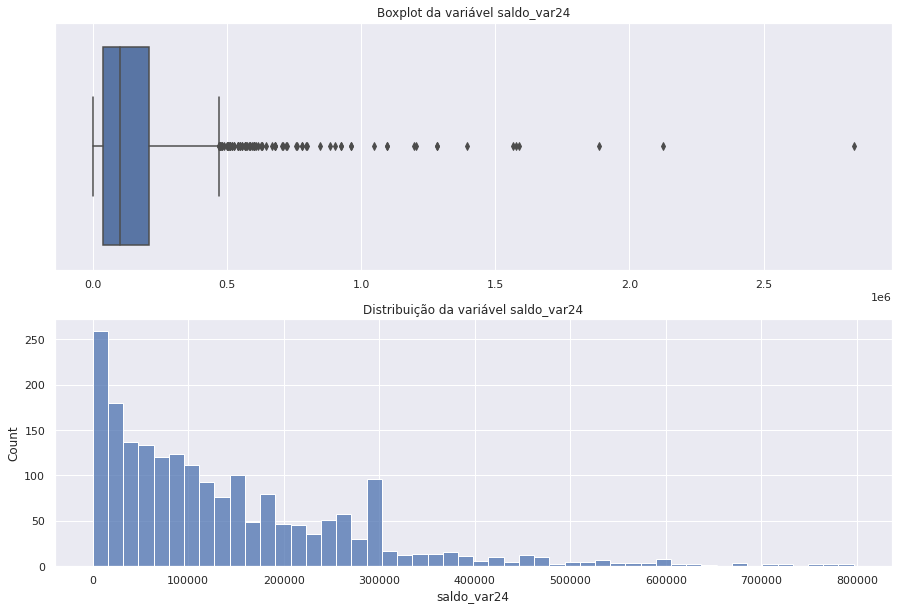

count    2.054000e+03
mean     1.525712e+05
std      1.849785e+05
min      3.000000e-02
25%      3.747088e+04
50%      1.028843e+05
75%      2.102279e+05
max      2.835288e+06
Name: saldo_var24, dtype: float64

% de zeros: 0.9614011350396512





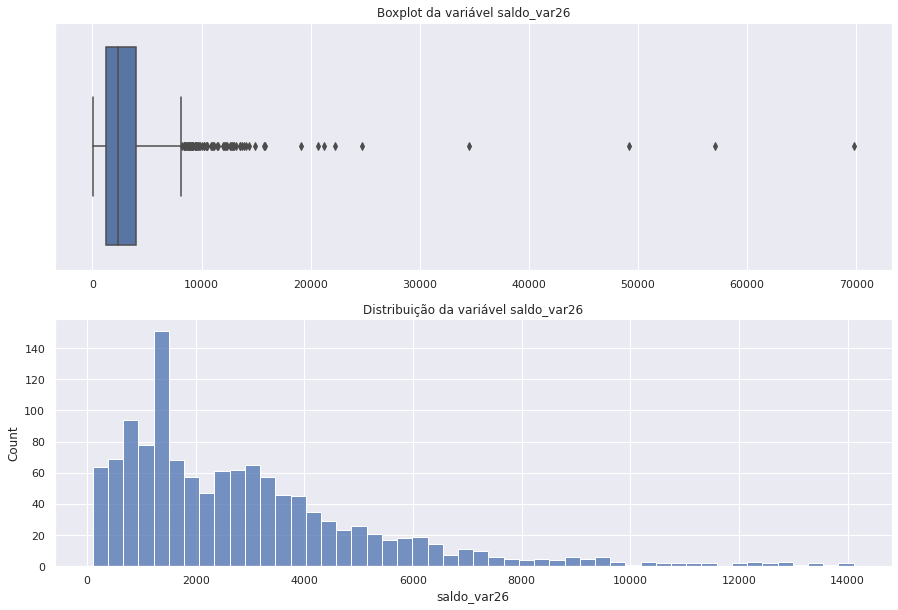

count     1292.000000
mean      3176.230310
std       3980.683099
min         29.160000
25%       1237.650000
50%       2355.375000
75%       3987.322500
max      69756.720000
Name: saldo_var26, dtype: float64

% de zeros: 0.9757206750103357





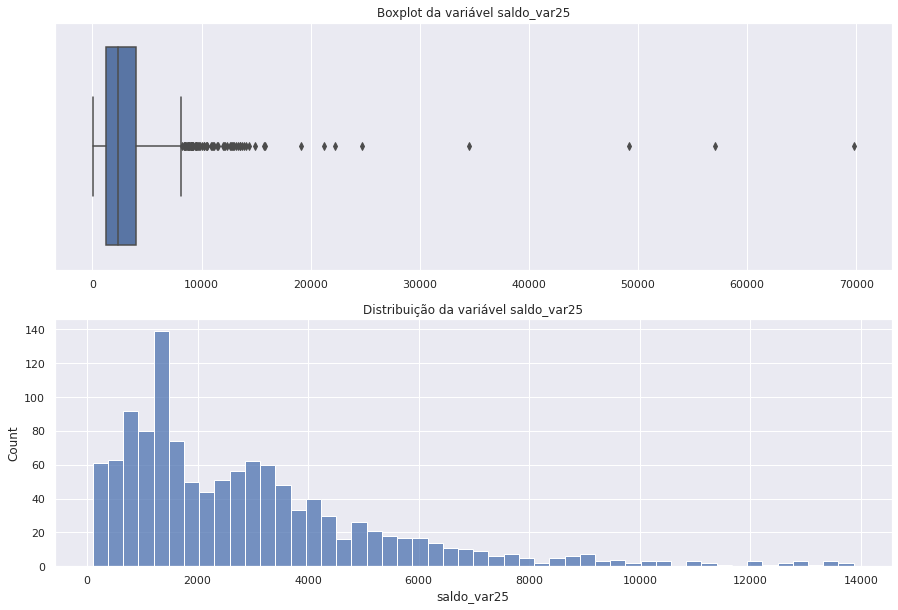

count     1242.000000
mean      3173.800628
std       4014.364342
min         29.160000
25%       1225.627500
50%       2345.850000
75%       3989.767500
max      69756.720000
Name: saldo_var25, dtype: float64

% de zeros: 0.9766602773706168





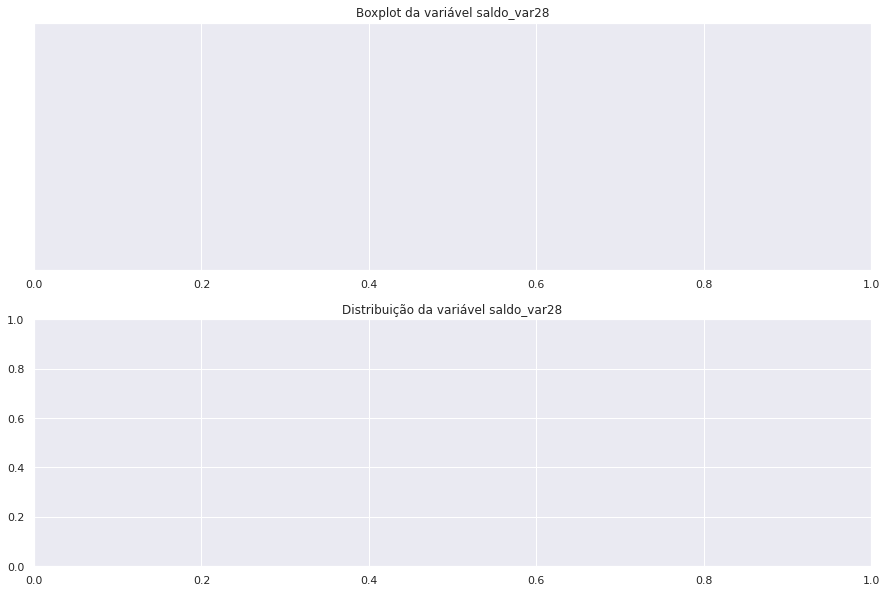

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: saldo_var28, dtype: float64

% de zeros: 1.0





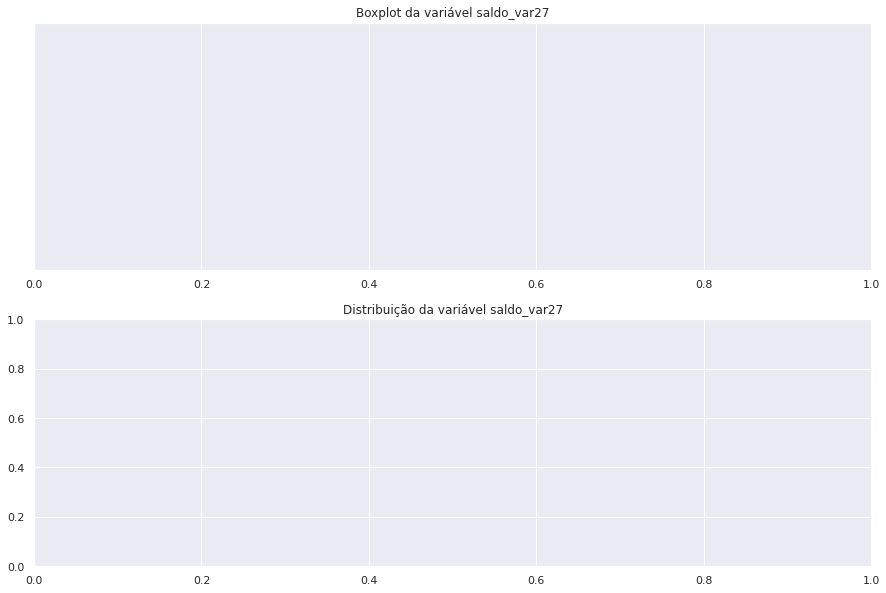

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: saldo_var27, dtype: float64

% de zeros: 1.0





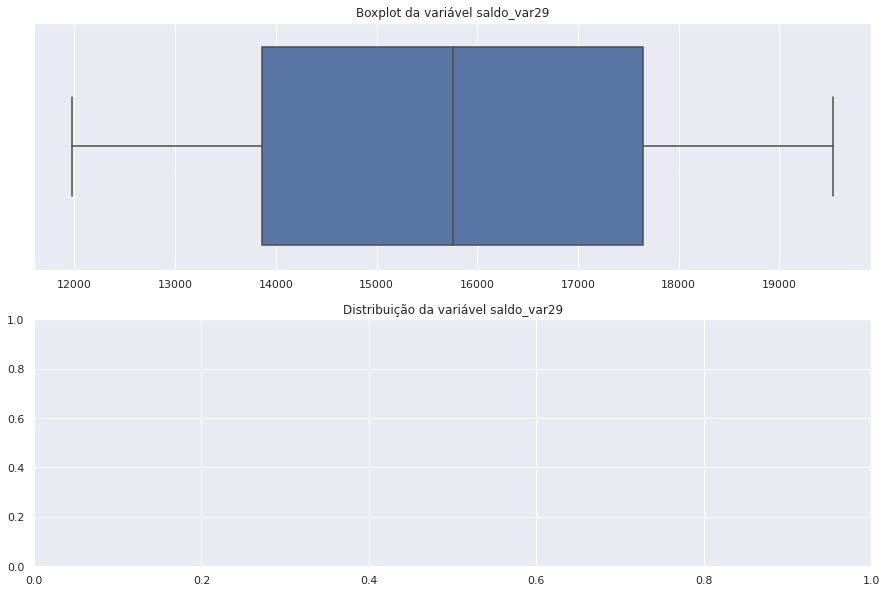

count        2.000000
mean     15754.200000
std       5342.333153
min      11976.600000
25%      13865.400000
50%      15754.200000
75%      17643.000000
max      19531.800000
Name: saldo_var29, dtype: float64

% de zeros: 0.9999624159055888





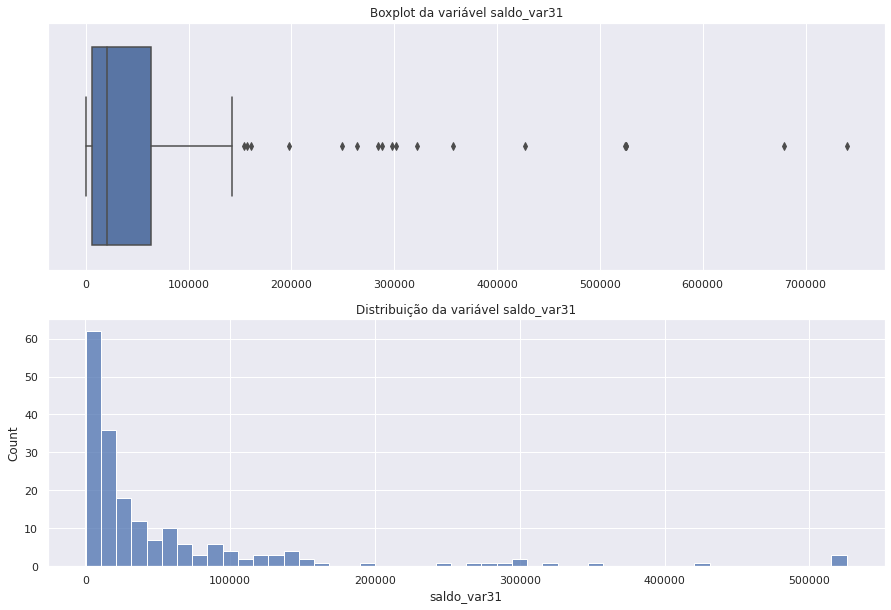

count       196.000000
mean      62422.933010
std      113158.130653
min           3.990000
25%        6153.547500
50%       20818.245000
75%       63279.975000
max      740006.610000
Name: saldo_var31, dtype: float64

% de zeros: 0.996316758747698





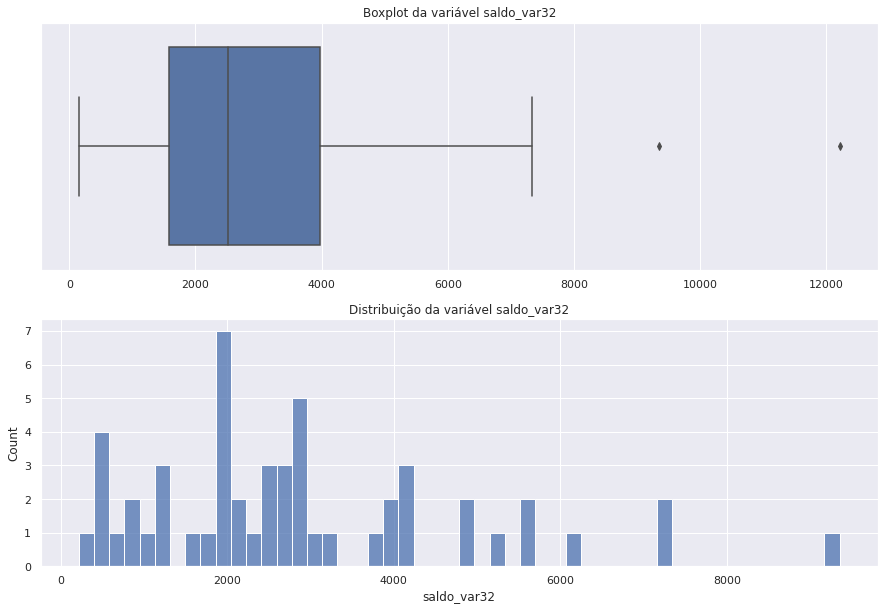

count       54.000000
mean      2996.836667
std       2331.590324
min        150.000000
25%       1580.220000
50%       2515.950000
75%       3970.845000
max      12210.780000
Name: saldo_var32, dtype: float64

% de zeros: 0.9989852294508964





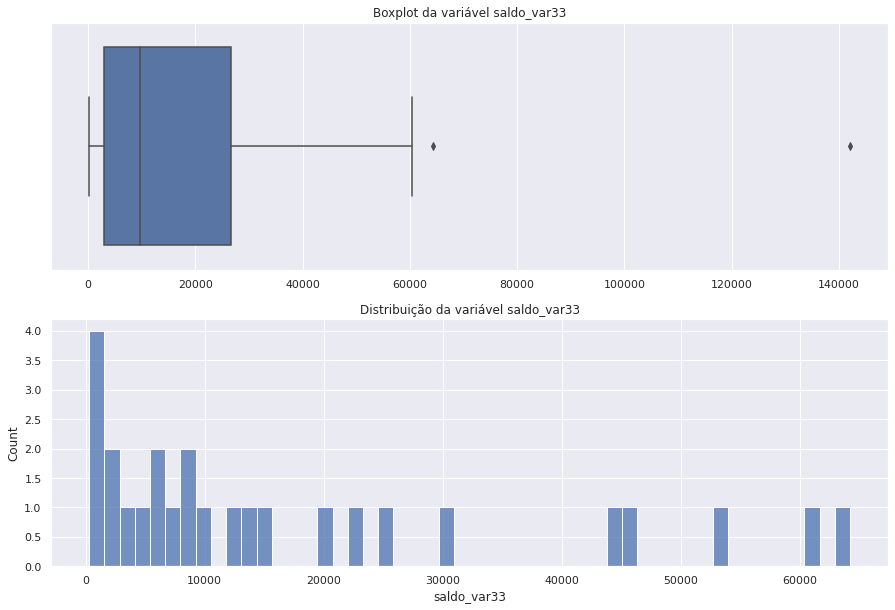

count        28.000000
mean      21806.662500
std       30464.573287
min         174.300000
25%        2873.505000
50%        9636.900000
75%       26725.890000
max      142078.800000
Name: saldo_var33, dtype: float64

% de zeros: 0.9994738226782426





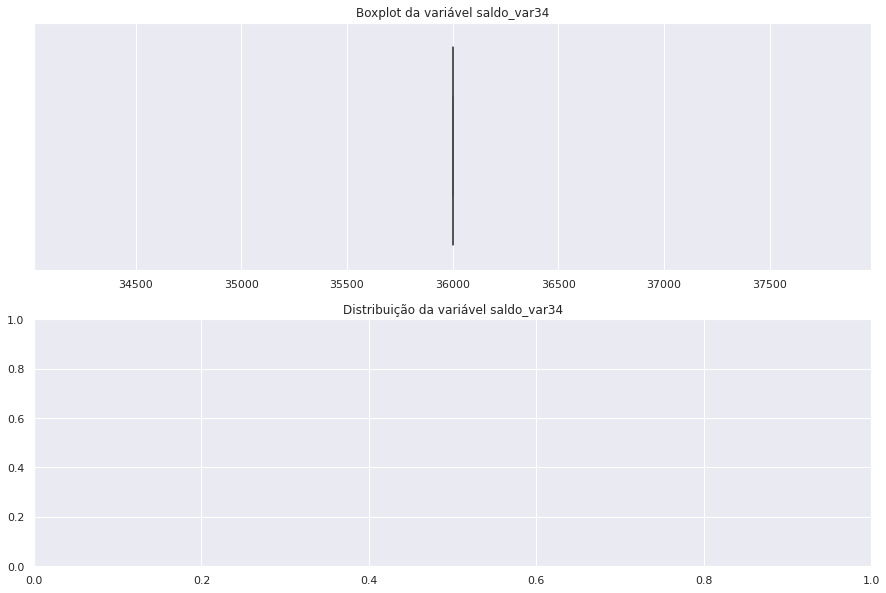

count        1.0
mean     36000.0
std          NaN
min      36000.0
25%      36000.0
50%      36000.0
75%      36000.0
max      36000.0
Name: saldo_var34, dtype: float64

% de zeros: 0.9999812079527943





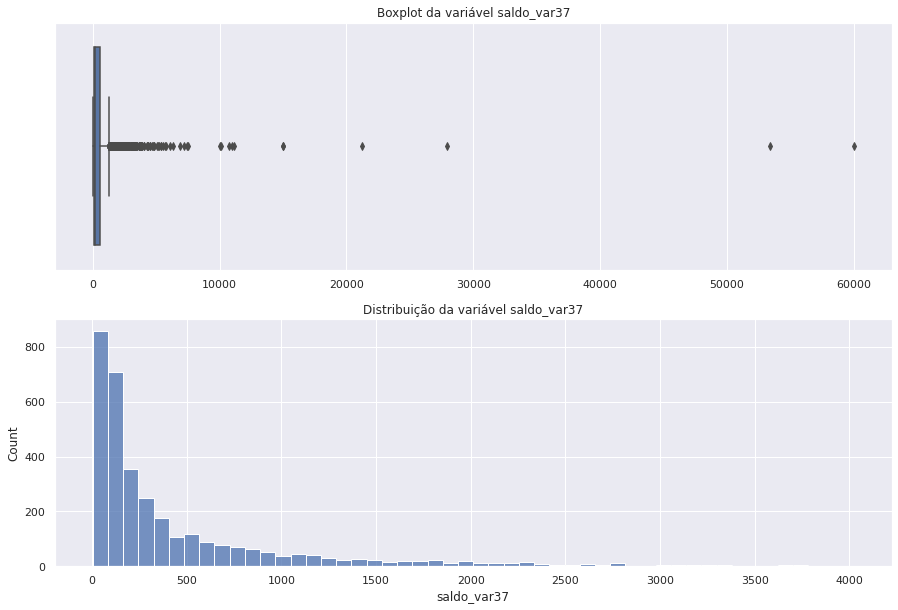

count     3461.000000
mean       551.454192
std       1732.644174
min          0.330000
25%         80.400000
50%        188.040000
75%        561.720000
max      60000.000000
Name: saldo_var37, dtype: float64

% de zeros: 0.9349607246213403





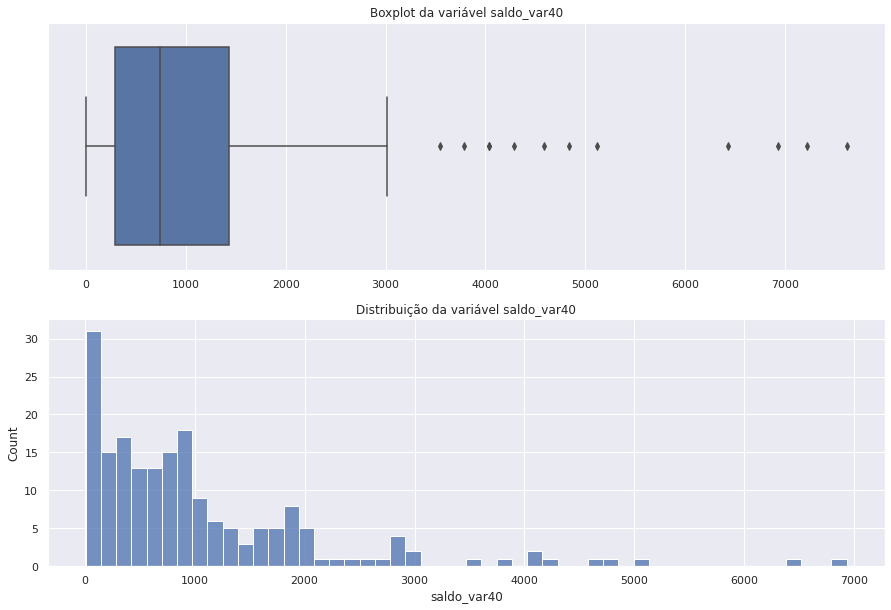

count     193.000000
mean     1116.654404
std      1317.014945
min        -0.900000
25%       289.590000
50%       740.910000
75%      1436.940000
max      7615.770000
Name: saldo_var40, dtype: float64

% de zeros: 0.9963731348893149





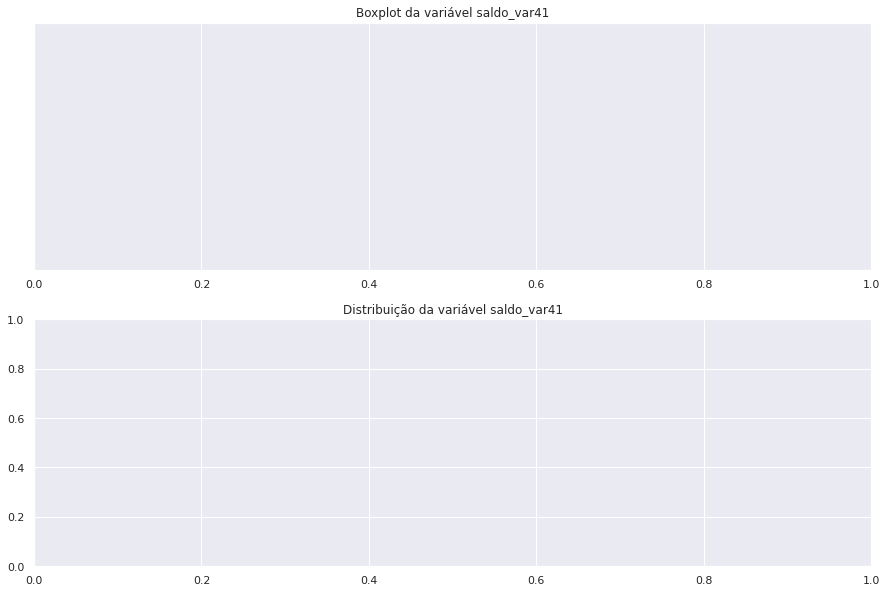

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: saldo_var41, dtype: float64

% de zeros: 1.0





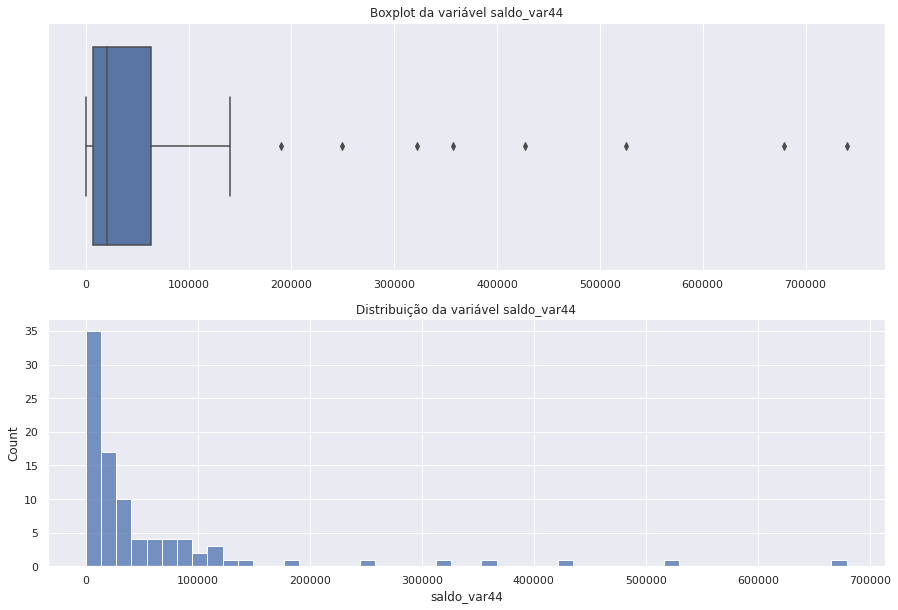

count        94.000000
mean      66760.815638
std      130141.237107
min           3.990000
25%        6908.145000
50%       20818.245000
75%       63615.840000
max      740006.610000
Name: saldo_var44, dtype: float64

% de zeros: 0.9982335475626715





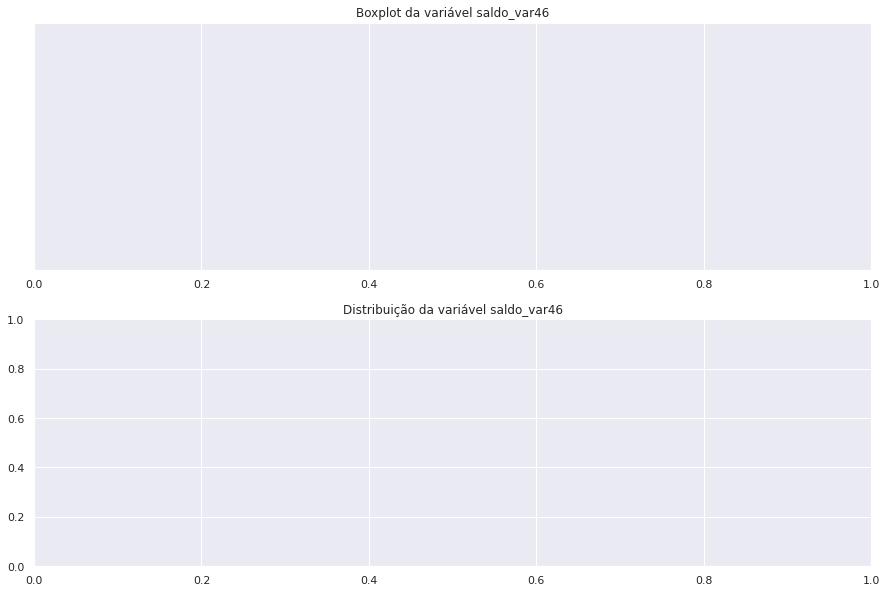

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: saldo_var46, dtype: float64

% de zeros: 1.0





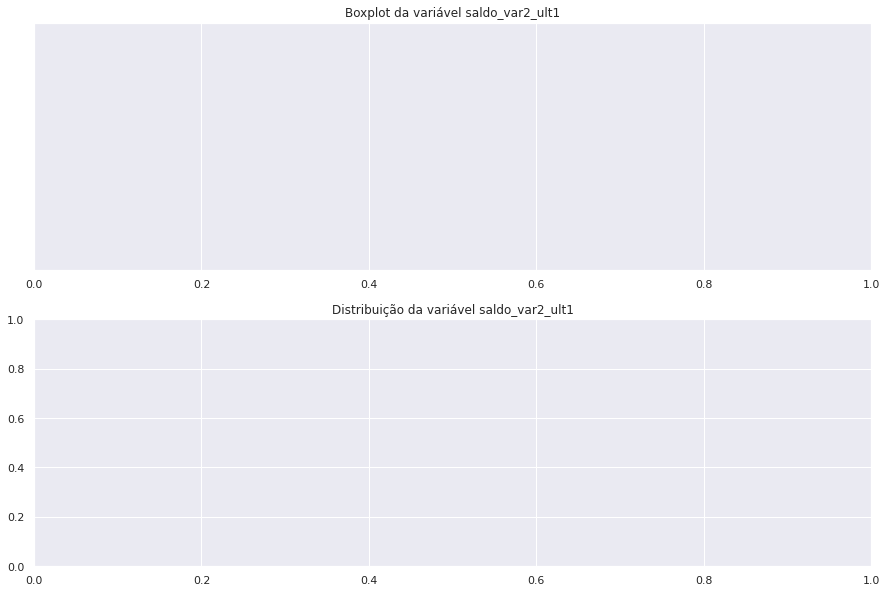

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: saldo_var2_ult1, dtype: float64

% de zeros: 1.0





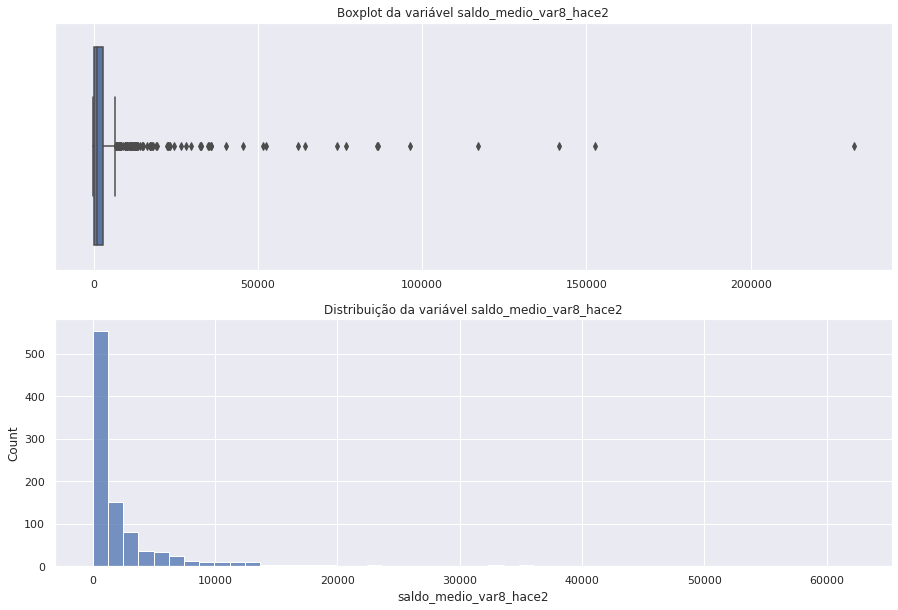

count       986.000000
mean       3928.602596
std       13395.259043
min        -287.670000
25%         203.212500
50%         922.230000
75%        2796.915000
max      231351.990000
Name: saldo_medio_var8_hace2, dtype: float64

% de zeros: 0.9814710414552561





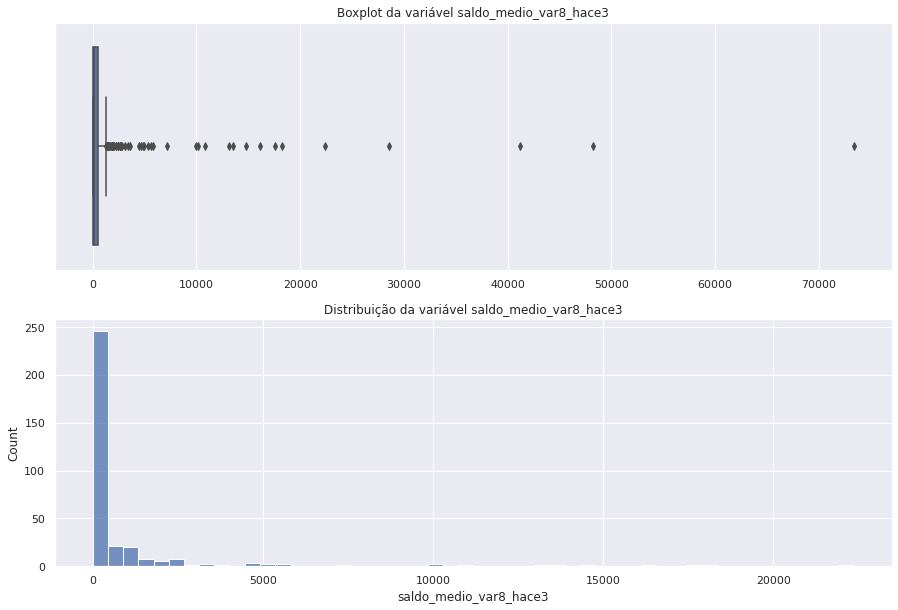

count      340.000000
mean      1461.732353
std       5997.626258
min          0.090000
25%         13.455000
50%        105.585000
75%        518.932500
max      73362.240000
Name: saldo_medio_var8_hace3, dtype: float64

% de zeros: 0.9936107039500883





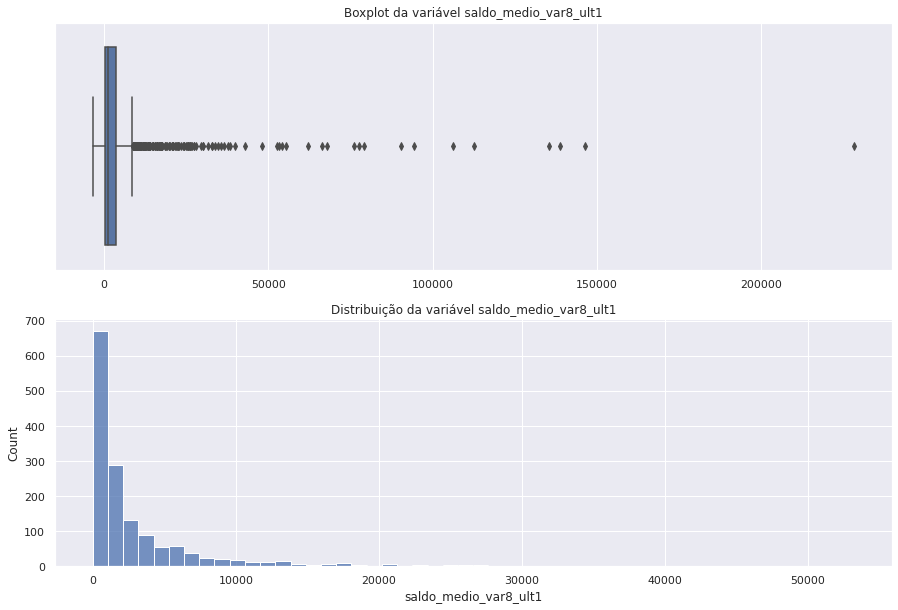

count      1546.000000
mean       4356.969334
std       12182.755338
min       -3401.340000
25%         367.342500
50%        1335.045000
75%        3693.255000
max      228031.800000
Name: saldo_medio_var8_ult1, dtype: float64

% de zeros: 0.9709474950201075





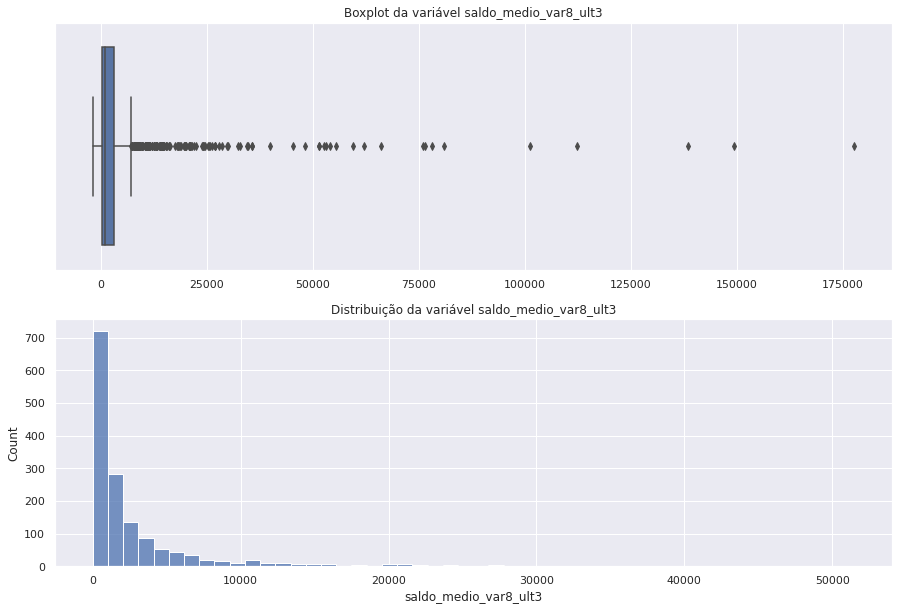

count      1546.000000
mean       3857.109062
std       10780.193435
min       -1844.520000
25%         370.042500
50%        1129.305000
75%        3135.322500
max      177582.000000
Name: saldo_medio_var8_ult3, dtype: float64

% de zeros: 0.9709474950201075





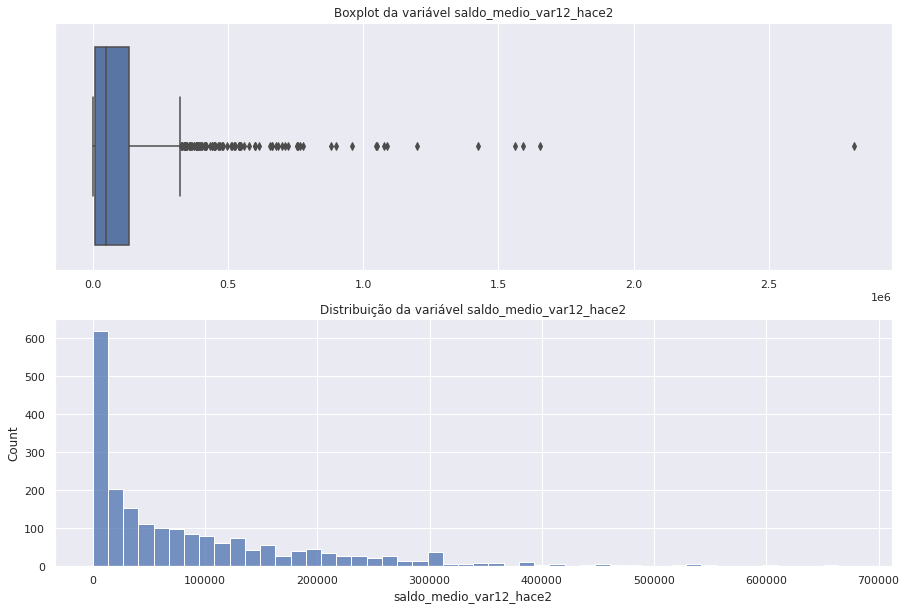

count    2.135000e+03
mean     9.997950e+04
std      1.562571e+05
min      9.000000e-02
25%      8.687145e+03
50%      4.885968e+04
75%      1.348328e+05
max      2.813586e+06
Name: saldo_medio_var12_hace2, dtype: float64

% de zeros: 0.9598789792159957





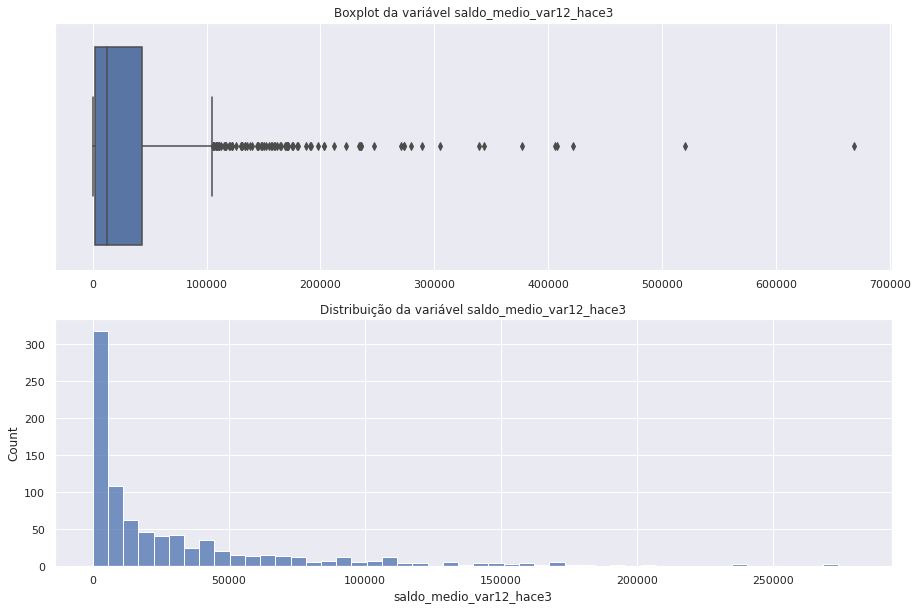

count       906.000000
mean      36447.628543
std       62239.537010
min           0.090000
25%        2322.577500
50%       12343.005000
75%       43536.292500
max      668335.320000
Name: saldo_medio_var12_hace3, dtype: float64

% de zeros: 0.982974405231706





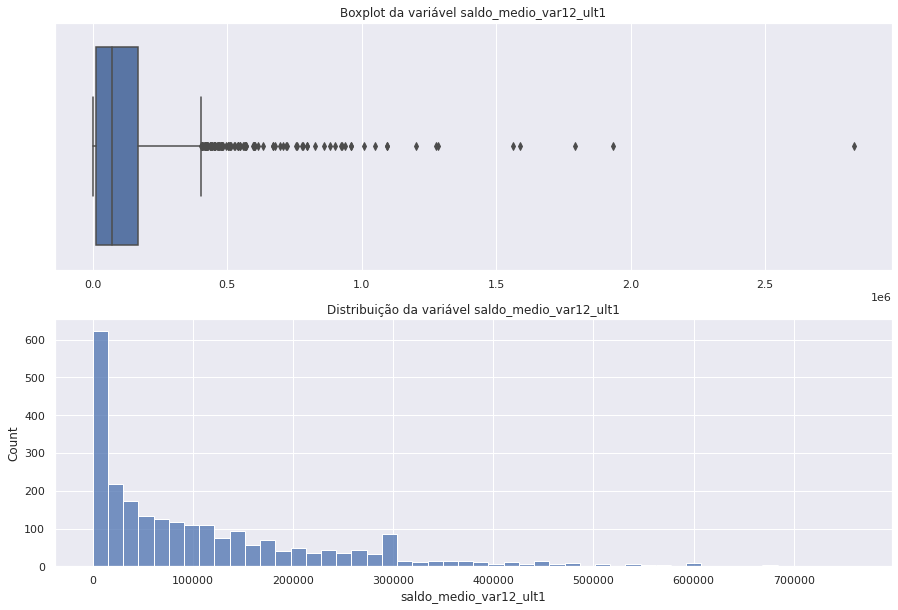

count    2.482000e+03
mean     1.216869e+05
std      1.698488e+05
min      3.000000e-02
25%      1.320554e+04
50%      7.062048e+04
75%      1.685751e+05
max      2.829733e+06
Name: saldo_medio_var12_ult1, dtype: float64

% de zeros: 0.9533581388356448





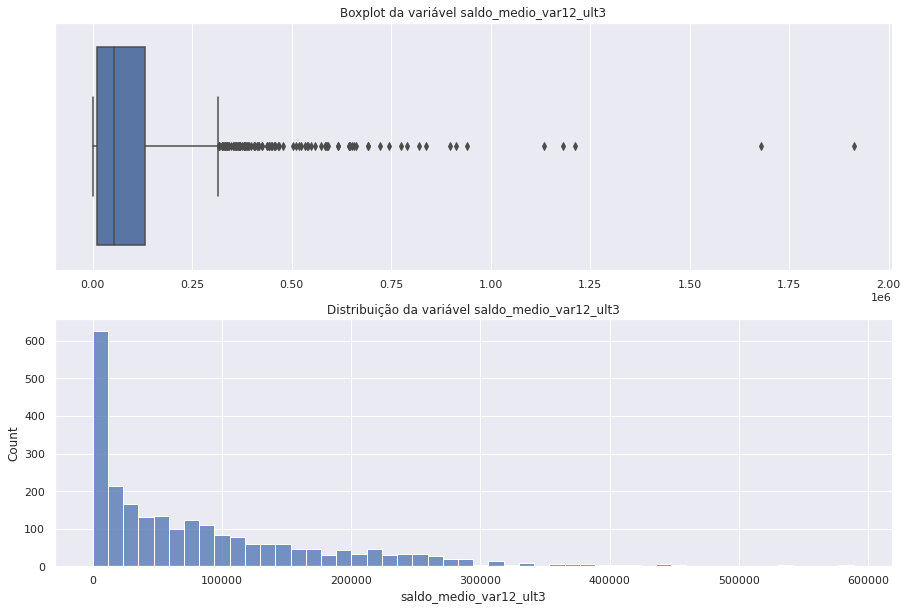

count    2.482000e+03
mean     9.385134e+04
std      1.284520e+05
min      1.800000e-01
25%      1.045355e+04
50%      5.434424e+04
75%      1.325613e+05
max      1.912363e+06
Name: saldo_medio_var12_ult3, dtype: float64

% de zeros: 0.9533581388356448





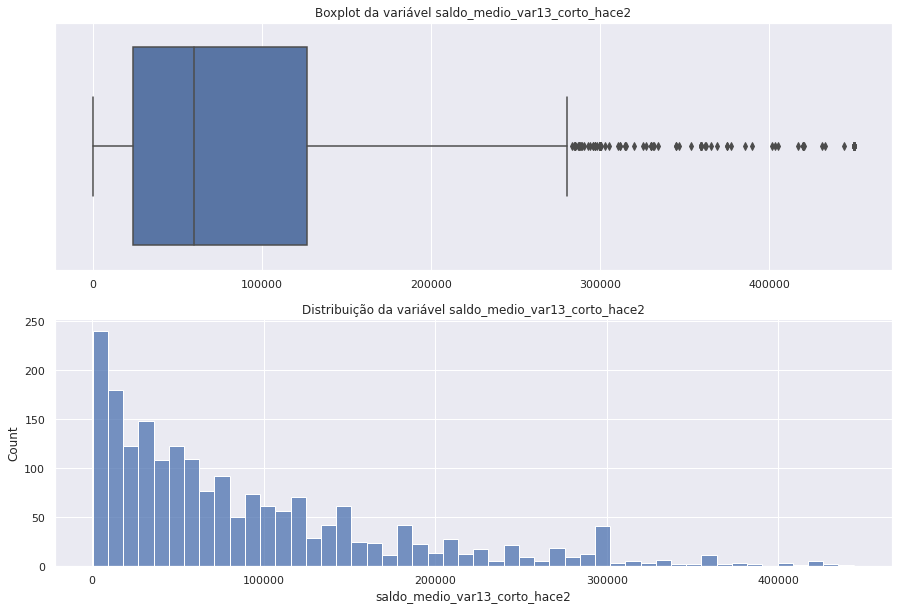

count      2074.000000
mean      92759.835767
std       95462.421219
min          19.350000
25%       23927.407500
50%       60000.000000
75%      126775.072500
max      450000.000000
Name: saldo_medio_var13_corto_hace2, dtype: float64

% de zeros: 0.9610252940955387





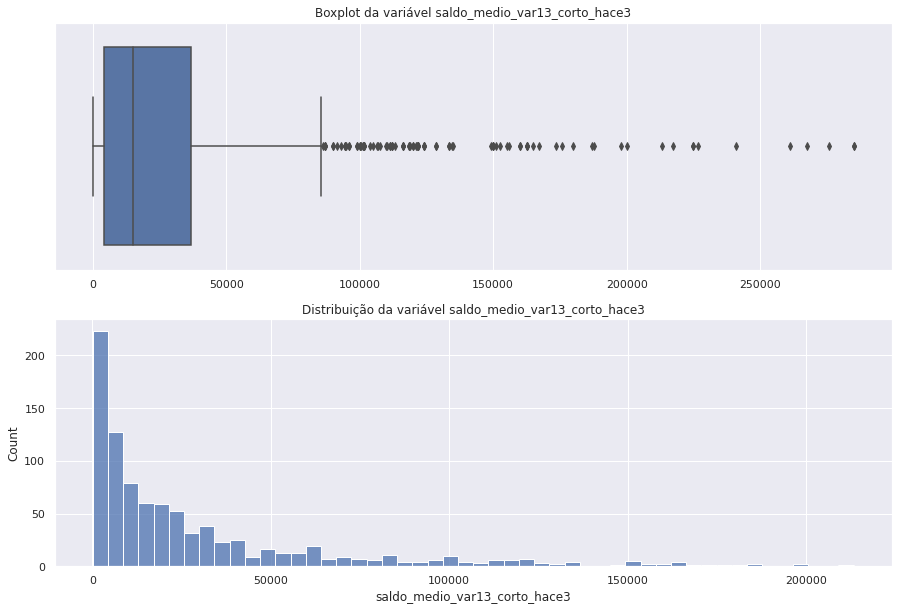

count       932.000000
mean      31022.449506
std       43478.023418
min          11.100000
25%        4285.710000
50%       15000.000000
75%       36815.512500
max      285000.210000
Name: saldo_medio_var13_corto_hace3, dtype: float64

% de zeros: 0.9824858120043598





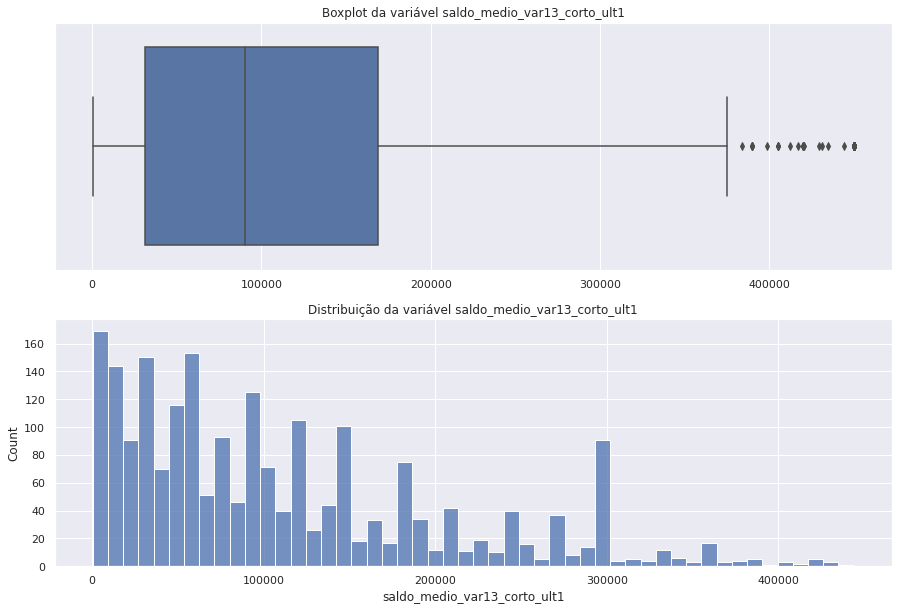

count      2226.000000
mean     117151.717925
std      106312.573152
min         300.000000
25%       31339.867500
50%       90000.000000
75%      168828.720000
max      450000.000000
Name: saldo_medio_var13_corto_ult1, dtype: float64

% de zeros: 0.9581689029202841





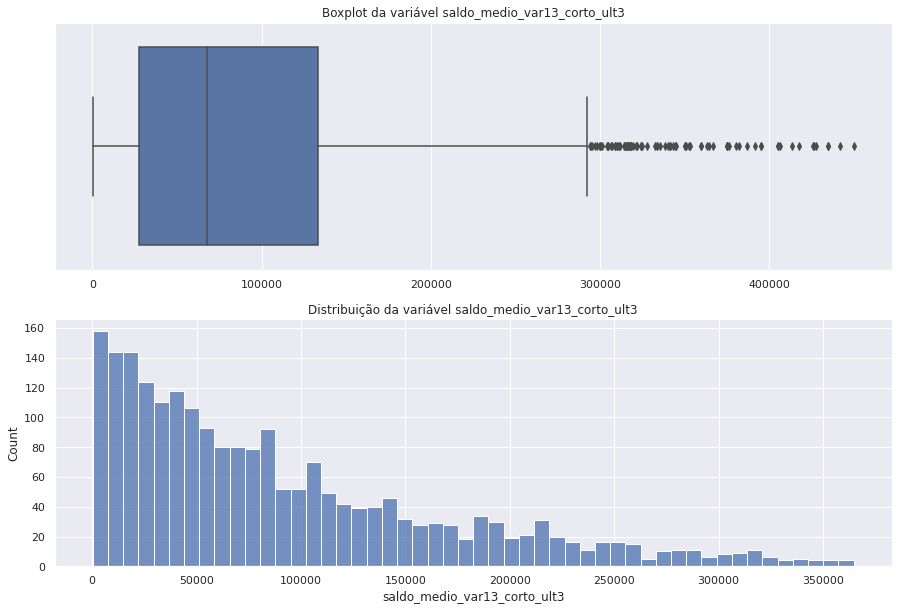

count      2226.000000
mean      92871.000054
std       85616.158257
min         159.690000
25%       27520.170000
50%       67695.975000
75%      133517.047500
max      450000.000000
Name: saldo_medio_var13_corto_ult3, dtype: float64

% de zeros: 0.9581689029202841





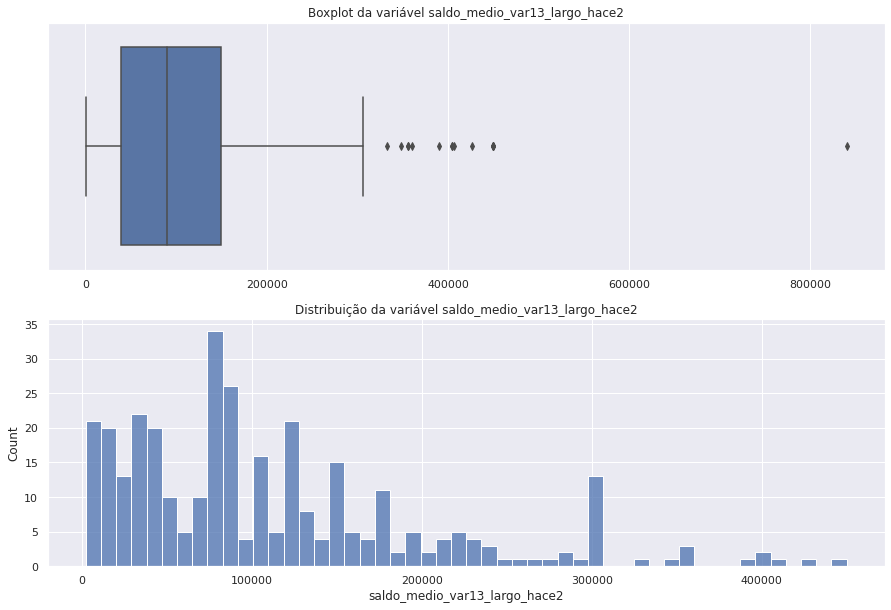

count       338.000000
mean     114921.148225
std      104141.507025
min         290.310000
25%       39000.015000
50%       90000.000000
75%      150000.000000
max      840000.000000
Name: saldo_medio_var13_largo_hace2, dtype: float64

% de zeros: 0.9936482880444996





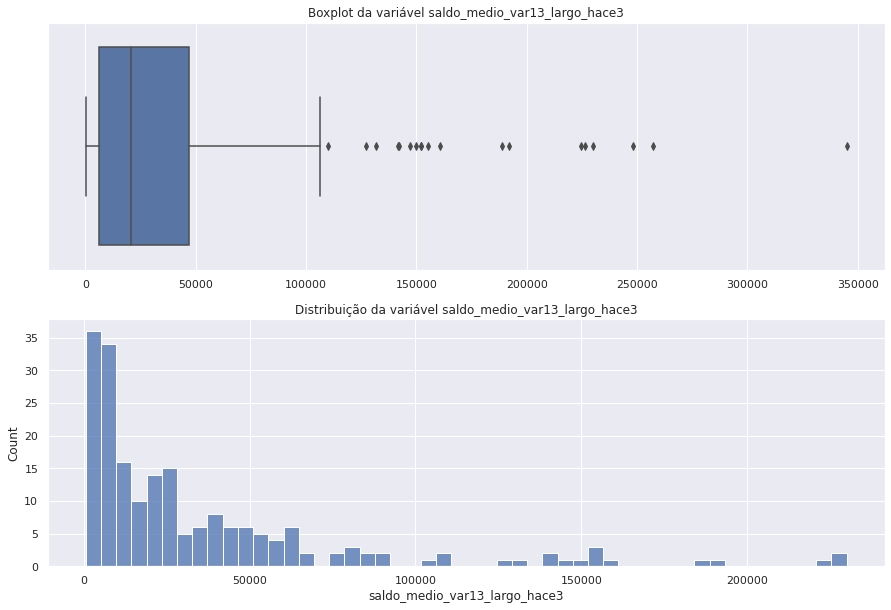

count       206.000000
mean      39207.663495
std       54178.536285
min         160.710000
25%        6340.065000
50%       20506.095000
75%       47112.937500
max      345000.000000
Name: saldo_medio_var13_largo_hace3, dtype: float64

% de zeros: 0.9961288382756418





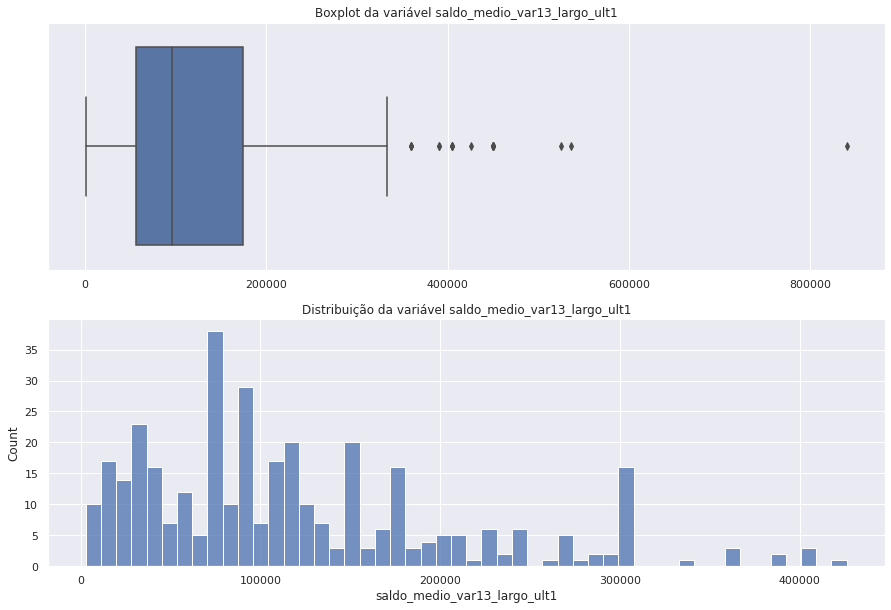

count       372.000000
mean     128592.285161
std      108341.823800
min         774.210000
25%       56625.052500
50%       96000.000000
75%      174125.010000
max      840000.000000
Name: saldo_medio_var13_largo_ult1, dtype: float64

% de zeros: 0.9930093584395084





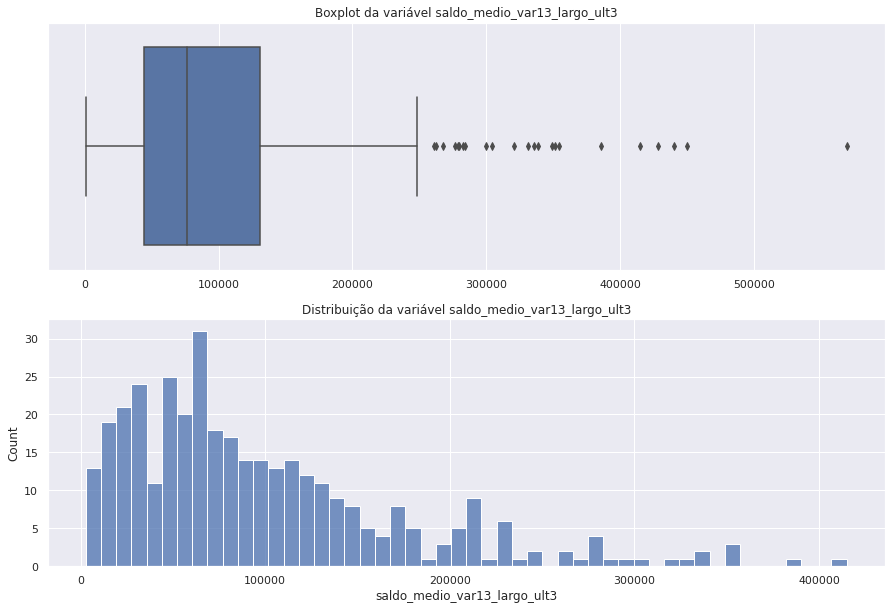

count       372.000000
mean     101139.955323
std       86151.104046
min         774.210000
25%       44217.112500
50%       76551.735000
75%      130899.195000
max      569333.340000
Name: saldo_medio_var13_largo_ult3, dtype: float64

% de zeros: 0.9930093584395084





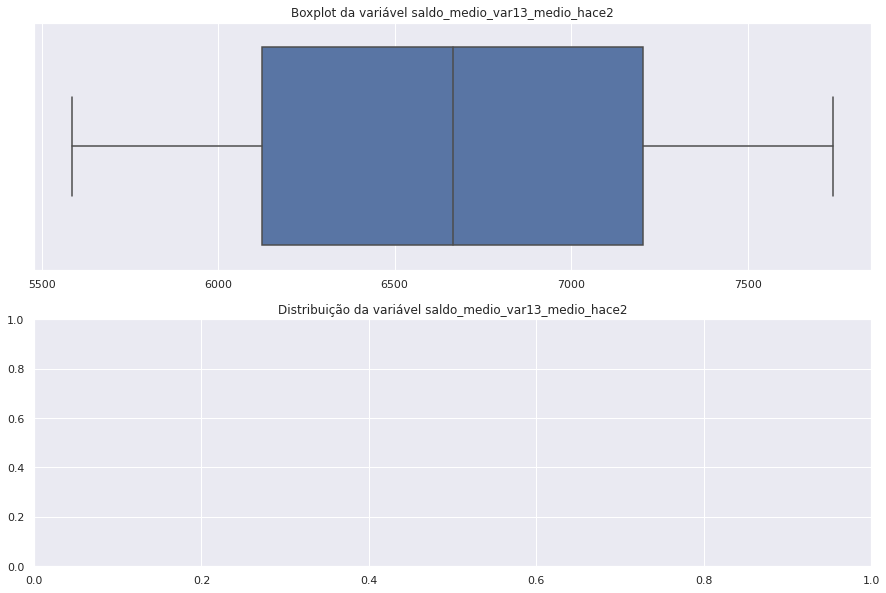

count       2.000000
mean     6664.080000
std      1524.338372
min      5586.210000
25%      6125.145000
50%      6664.080000
75%      7203.015000
max      7741.950000
Name: saldo_medio_var13_medio_hace2, dtype: float64

% de zeros: 0.9999624159055888





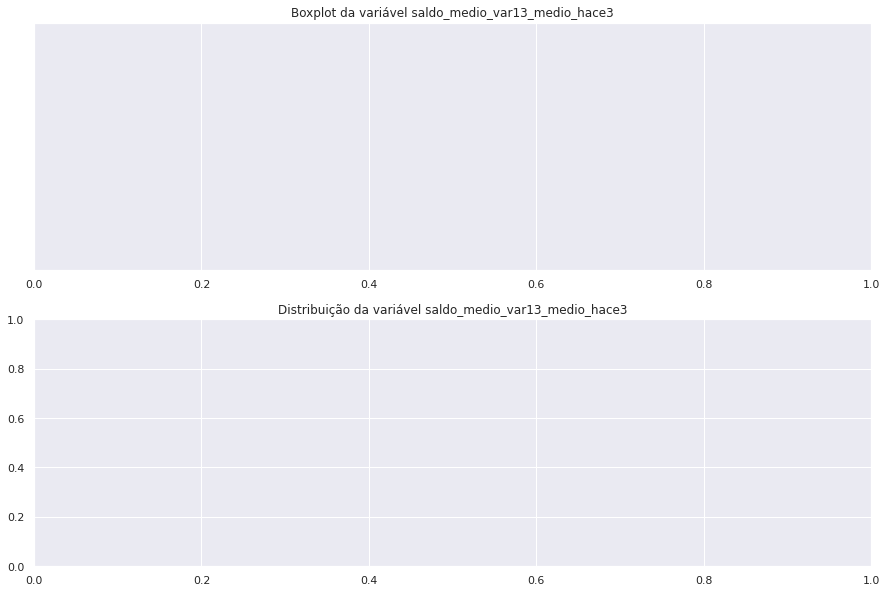

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: saldo_medio_var13_medio_hace3, dtype: float64

% de zeros: 1.0





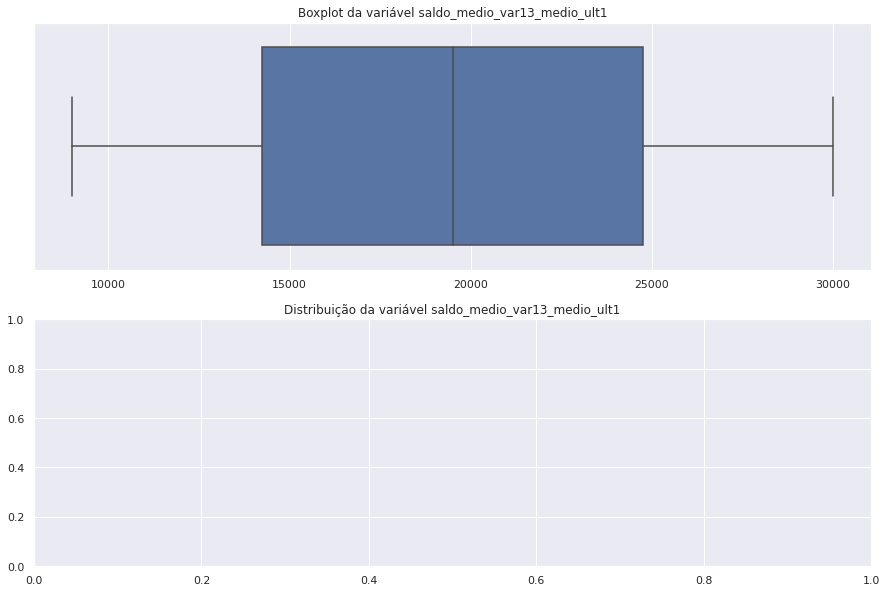

count        2.000000
mean     19500.000000
std      14849.242405
min       9000.000000
25%      14250.000000
50%      19500.000000
75%      24750.000000
max      30000.000000
Name: saldo_medio_var13_medio_ult1, dtype: float64

% de zeros: 0.9999624159055888





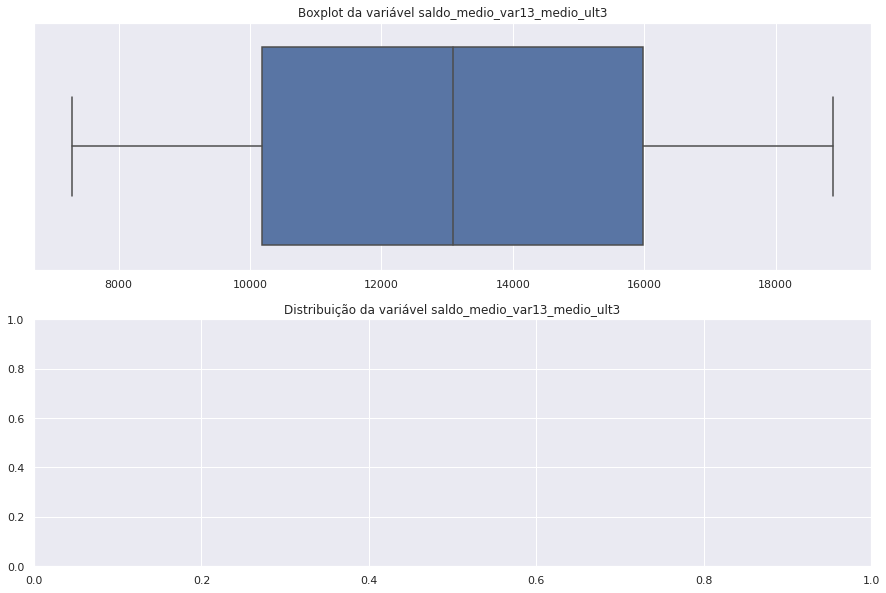

count        2.000000
mean     13082.055000
std       8186.790389
min       7293.120000
25%      10187.587500
50%      13082.055000
75%      15976.522500
max      18870.990000
Name: saldo_medio_var13_medio_ult3, dtype: float64

% de zeros: 0.9999624159055888





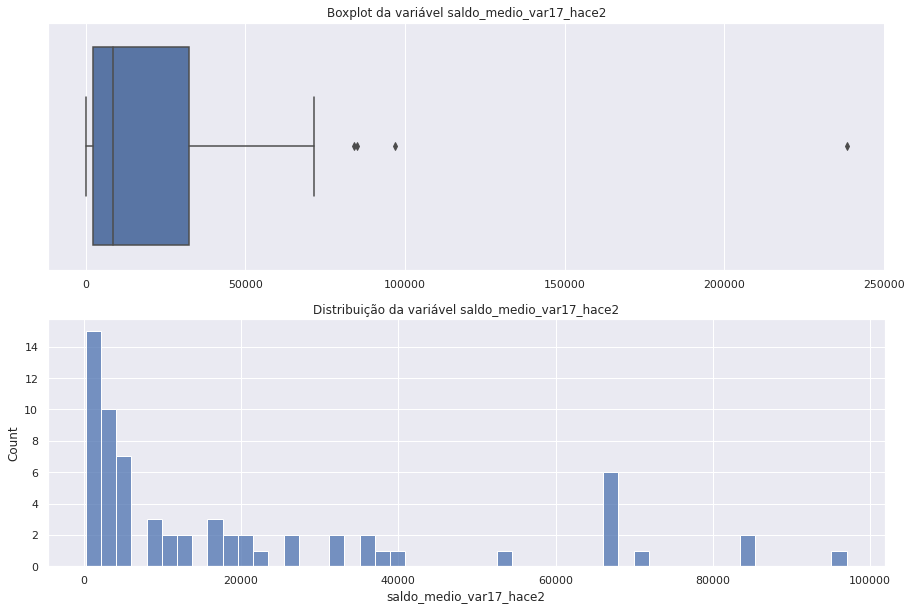

count        68.000000
mean      23601.317647
std       36821.052677
min          -0.030000
25%        2236.087500
50%        8619.210000
75%       32328.090000
max      238379.160000
Name: saldo_medio_var17_hace2, dtype: float64

% de zeros: 0.9987221407900176





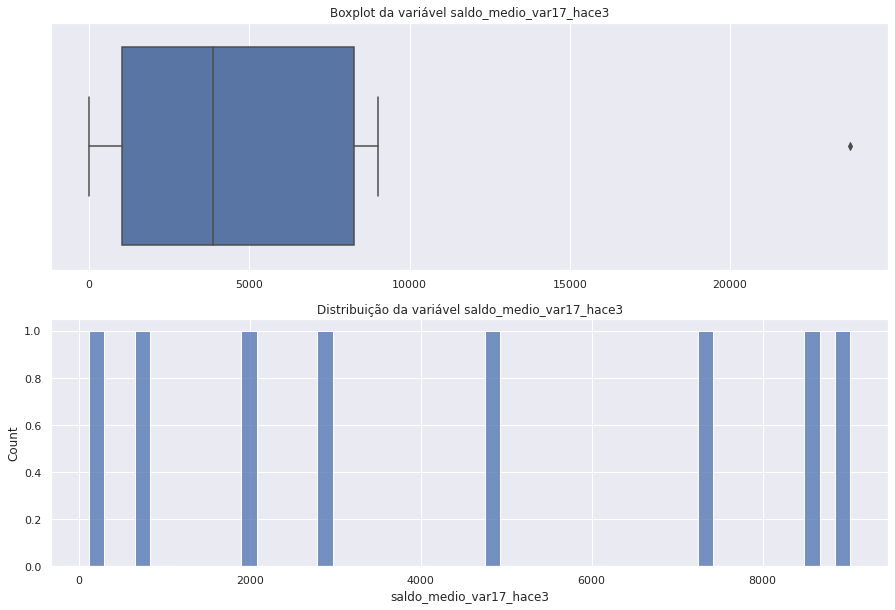

count       10.000000
mean      5926.662000
std       7133.035965
min          0.030000
25%       1036.492500
50%       3854.250000
75%       8278.957500
max      23741.640000
Name: saldo_medio_var17_hace3, dtype: float64

% de zeros: 0.9998120795279438





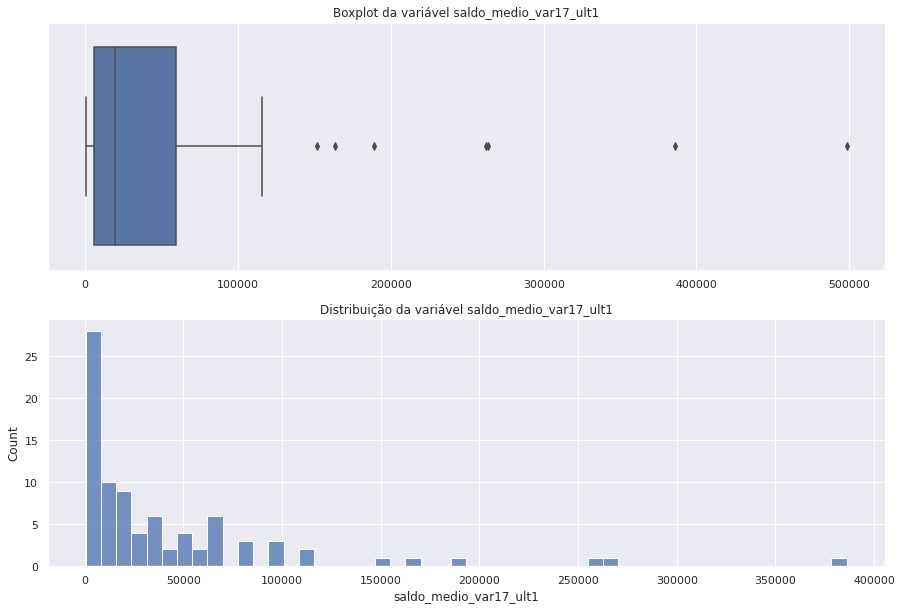

count        87.000000
mean      48231.394138
std       80386.794941
min         416.880000
25%        5966.400000
50%       19306.950000
75%       59572.935000
max      498248.850000
Name: saldo_medio_var17_ult1, dtype: float64

% de zeros: 0.9983650918931108





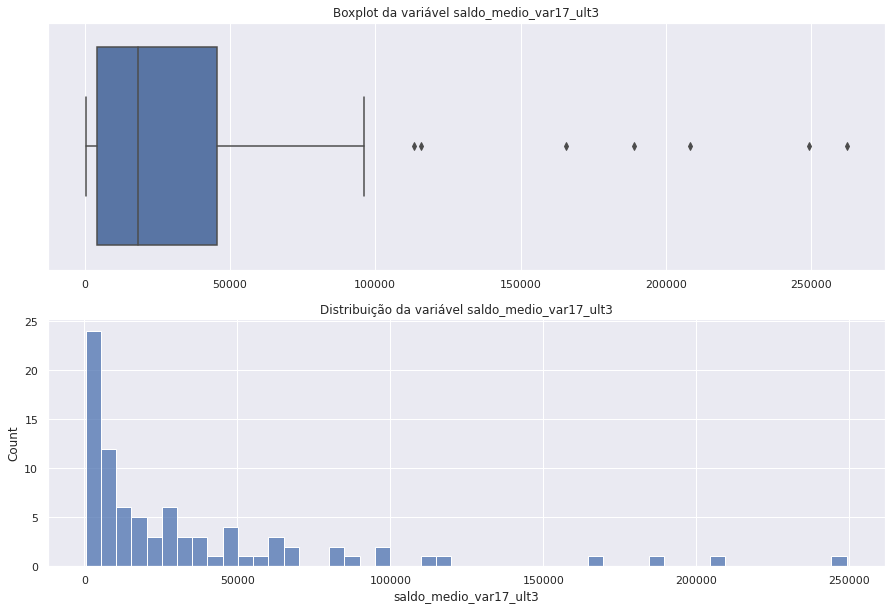

count        87.000000
mean      36709.303103
std       53018.997994
min         416.880000
25%        4177.455000
50%       18280.200000
75%       45618.945000
max      262209.990000
Name: saldo_medio_var17_ult3, dtype: float64

% de zeros: 0.9983650918931108





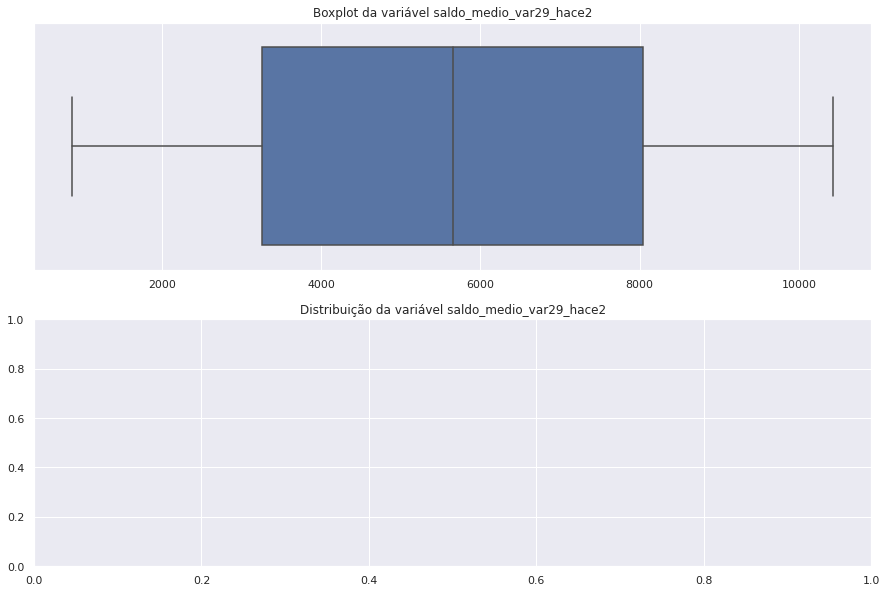

count        2.000000
mean      5649.495000
std       6760.669148
min        868.980000
25%       3259.237500
50%       5649.495000
75%       8039.752500
max      10430.010000
Name: saldo_medio_var29_hace2, dtype: float64

% de zeros: 0.9999624159055888





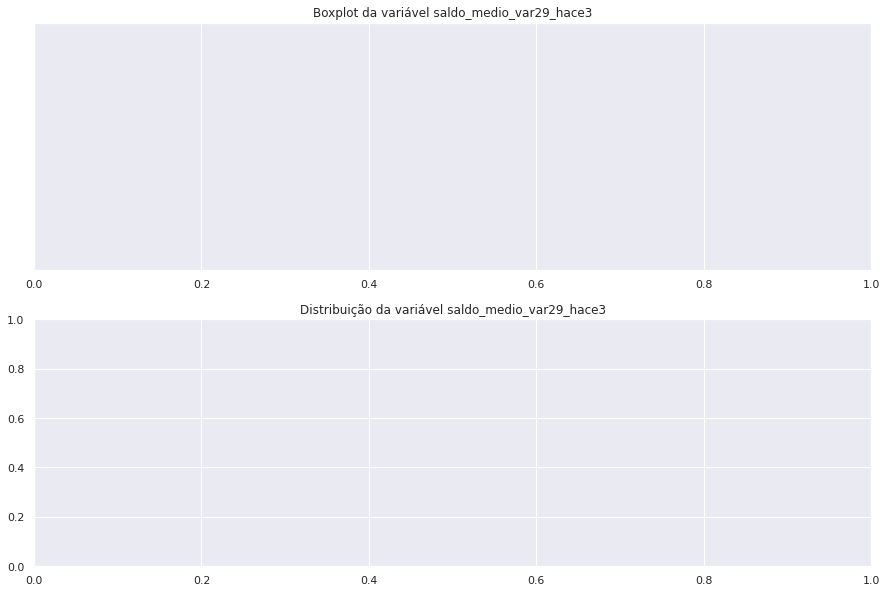

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: saldo_medio_var29_hace3, dtype: float64

% de zeros: 1.0





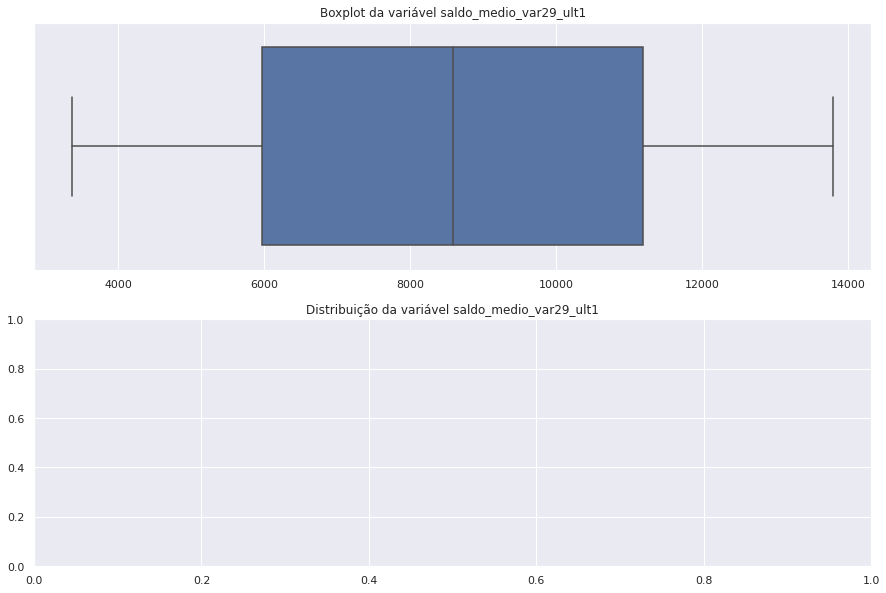

count        2.000000
mean      8579.565000
std       7373.858007
min       3365.460000
25%       5972.512500
50%       8579.565000
75%      11186.617500
max      13793.670000
Name: saldo_medio_var29_ult1, dtype: float64

% de zeros: 0.9999624159055888





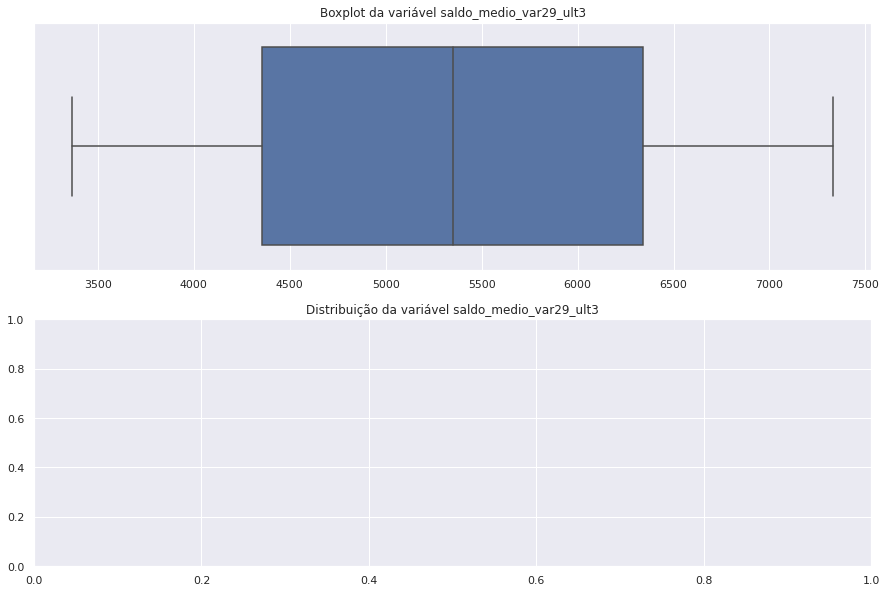

count       2.000000
mean     5348.400000
std      2804.300641
min      3365.460000
25%      4356.930000
50%      5348.400000
75%      6339.870000
max      7331.340000
Name: saldo_medio_var29_ult3, dtype: float64

% de zeros: 0.9999624159055888





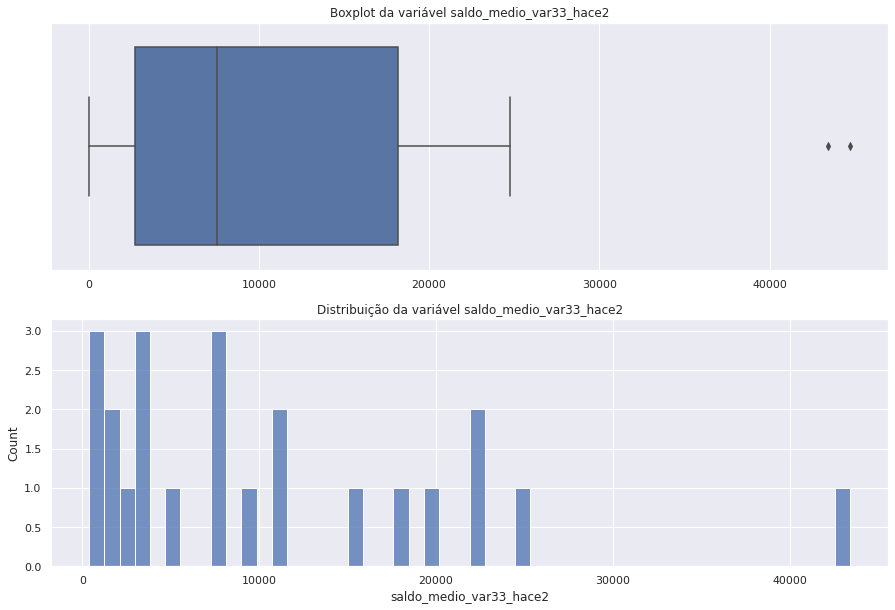

count       25.00000
mean     11552.71440
std      12451.89429
min         32.07000
25%       2699.40000
50%       7527.99000
75%      18193.53000
max      44725.83000
Name: saldo_medio_var33_hace2, dtype: float64

% de zeros: 0.9995301988198594





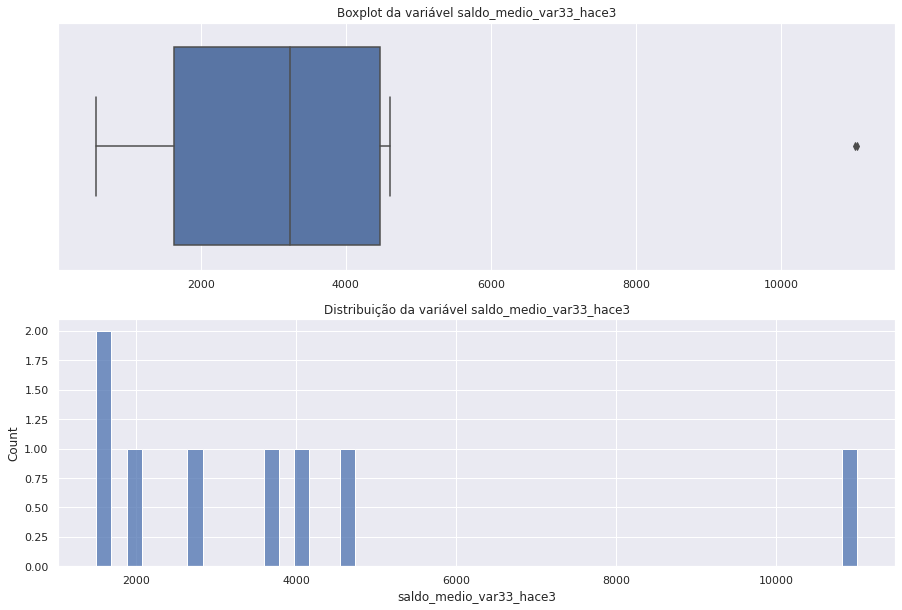

count       10.000000
mean      4274.178000
std       3780.055571
min        555.750000
25%       1629.720000
50%       3226.395000
75%       4470.165000
max      11047.770000
Name: saldo_medio_var33_hace3, dtype: float64

% de zeros: 0.9998120795279438





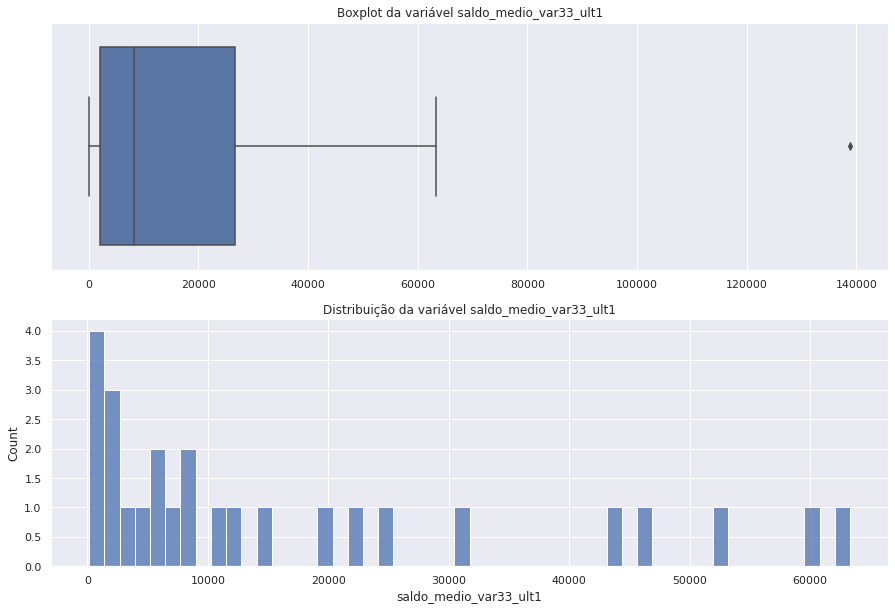

count        28.000000
mean      21079.875000
std       30054.840617
min          72.570000
25%        2132.332500
50%        8307.510000
75%       26672.265000
max      138831.630000
Name: saldo_medio_var33_ult1, dtype: float64

% de zeros: 0.9994738226782426





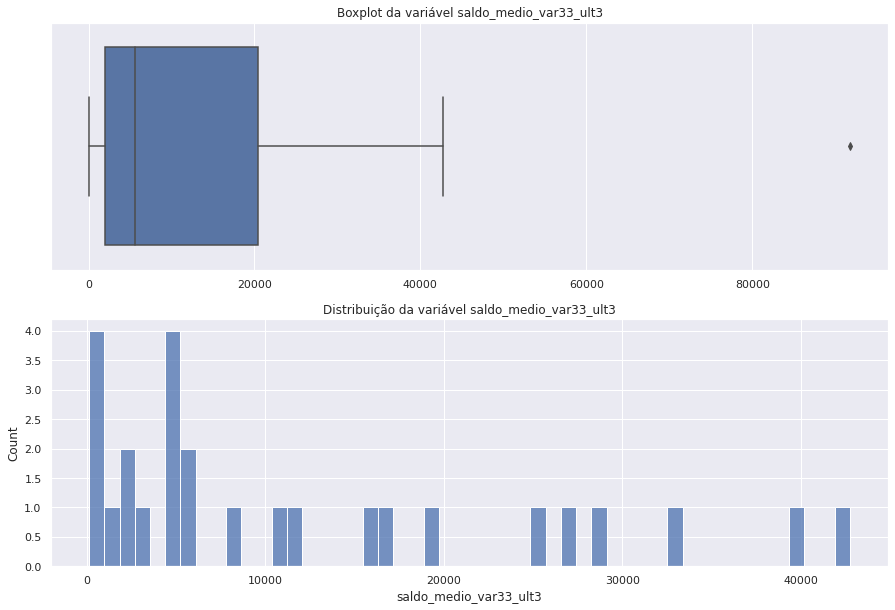

count       28.000000
mean     14637.575357
std      19704.791332
min         72.570000
25%       1943.490000
50%       5576.775000
75%      20445.615000
max      91778.730000
Name: saldo_medio_var33_ult3, dtype: float64

% de zeros: 0.9994738226782426





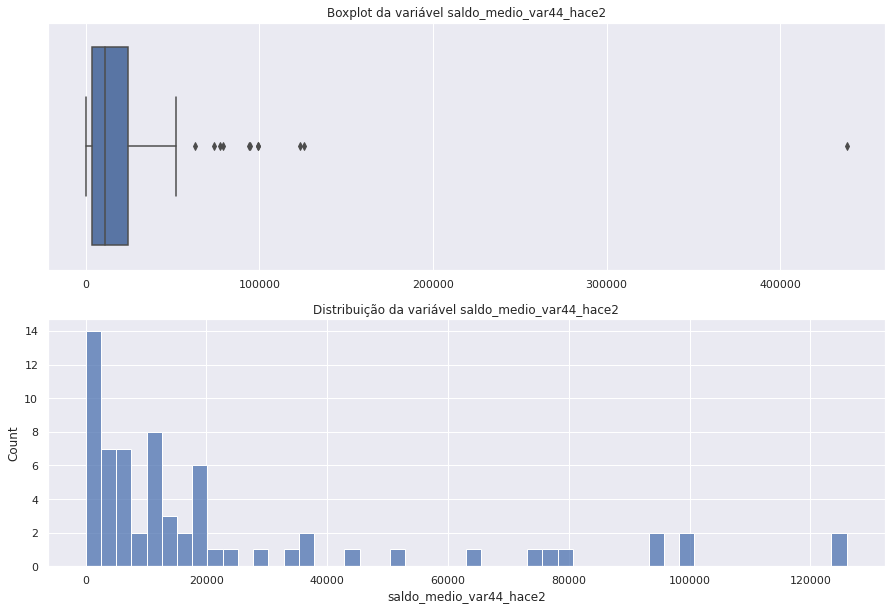

count        69.000000
mean      29362.221304
std       59190.530994
min           2.670000
25%        3473.730000
50%       11322.420000
75%       24078.720000
max      438329.220000
Name: saldo_medio_var44_hace2, dtype: float64

% de zeros: 0.9987033487428121





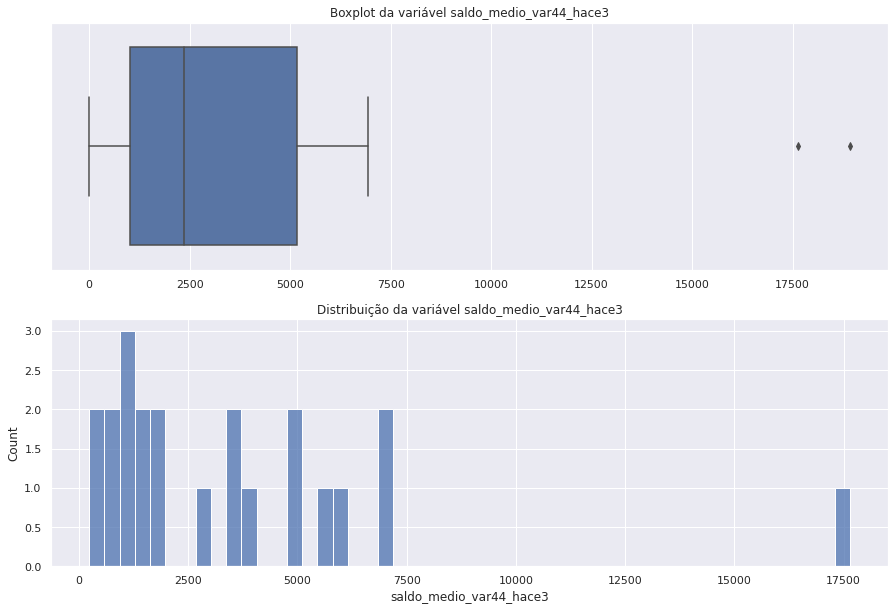

count       24.000000
mean      4069.680000
std       4882.293308
min          0.570000
25%       1029.502500
50%       2372.505000
75%       5162.640000
max      18928.590000
Name: saldo_medio_var44_hace3, dtype: float64

% de zeros: 0.9995489908670651





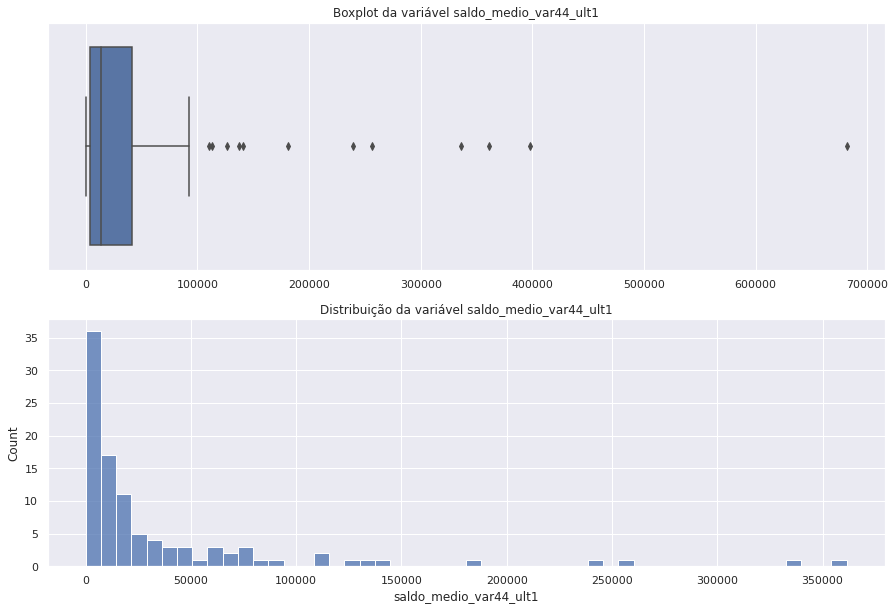

count       104.000000
mean      46800.447115
std       96327.605970
min           3.840000
25%        3683.955000
50%       13286.550000
75%       41855.700000
max      681462.900000
Name: saldo_medio_var44_ult1, dtype: float64

% de zeros: 0.9980456270906153





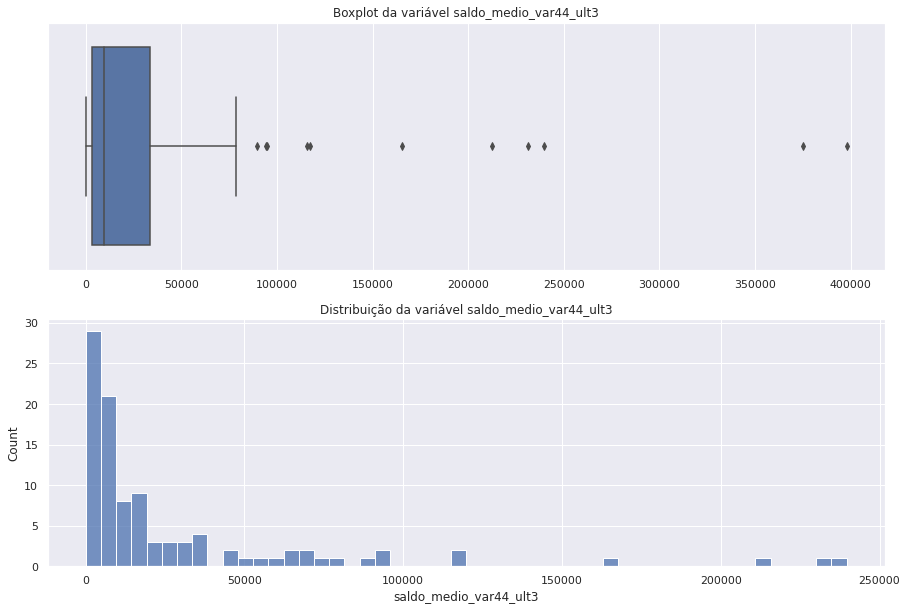

count       104.000000
mean      35066.607404
std       67277.274853
min           3.270000
25%        3419.490000
50%        9680.295000
75%       33611.497500
max      397884.300000
Name: saldo_medio_var44_ult3, dtype: float64

% de zeros: 0.9980456270906153


In [38]:
for col in saldo_features_high_zeros:
  df_aux = df_train[df_train[col] != 0]
  numerical_summary(col, df_aux)
  print(f'% de zeros: {zeros_by_col[col]}')

As variáveis são contínuas, a maioria tem apenas valores positivos e assim como as variáveis vistas anteriormente, tem uma quantidade significativa de outliers.

#### Prefixo `delta`

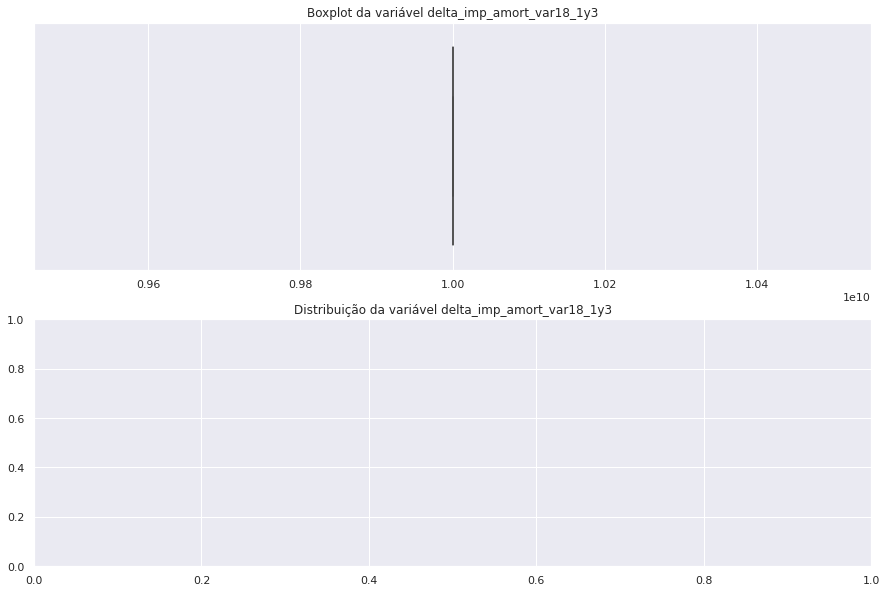

count    1.000000e+00
mean     1.000000e+10
std               NaN
min      1.000000e+10
25%      1.000000e+10
50%      1.000000e+10
75%      1.000000e+10
max      1.000000e+10
Name: delta_imp_amort_var18_1y3, dtype: float64

% de zeros: 0.9999812079527943





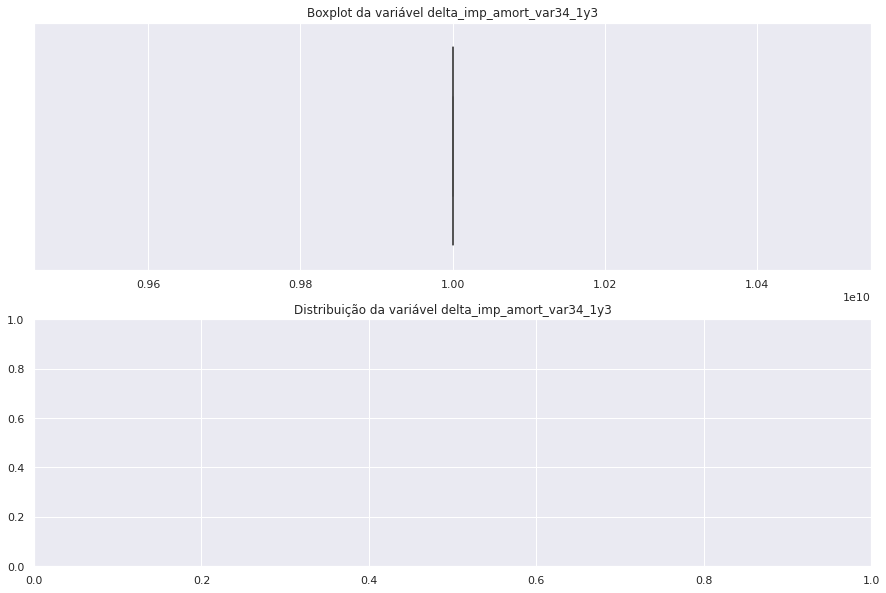

count    1.000000e+00
mean     1.000000e+10
std               NaN
min      1.000000e+10
25%      1.000000e+10
50%      1.000000e+10
75%      1.000000e+10
max      1.000000e+10
Name: delta_imp_amort_var34_1y3, dtype: float64

% de zeros: 0.9999812079527943





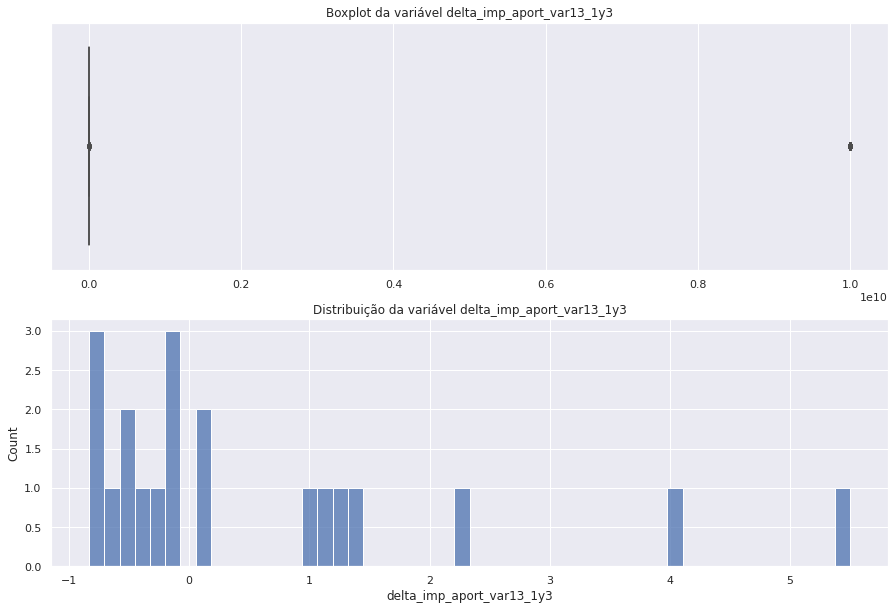

count    1.435000e+03
mean     1.797909e+09
std      3.841471e+09
min     -1.000000e+00
25%     -1.000000e+00
50%     -1.000000e+00
75%     -1.000000e+00
max      1.000000e+10
Name: delta_imp_aport_var13_1y3, dtype: float64

% de zeros: 0.9730334122599316





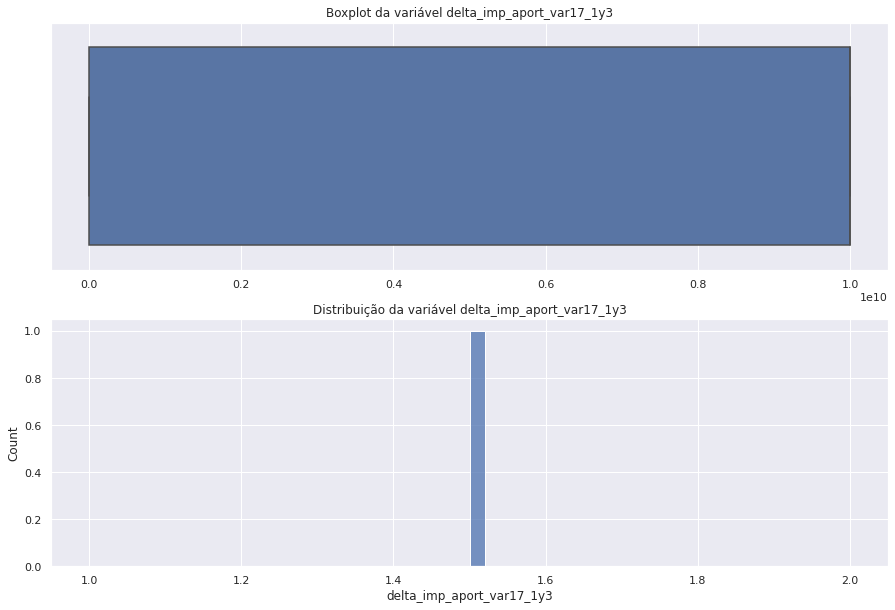

count    3.900000e+01
mean     7.179487e+09
std      4.558808e+09
min     -1.000000e+00
25%      2.500000e-01
50%      1.000000e+10
75%      1.000000e+10
max      1.000000e+10
Name: delta_imp_aport_var17_1y3, dtype: float64

% de zeros: 0.9992671101589807





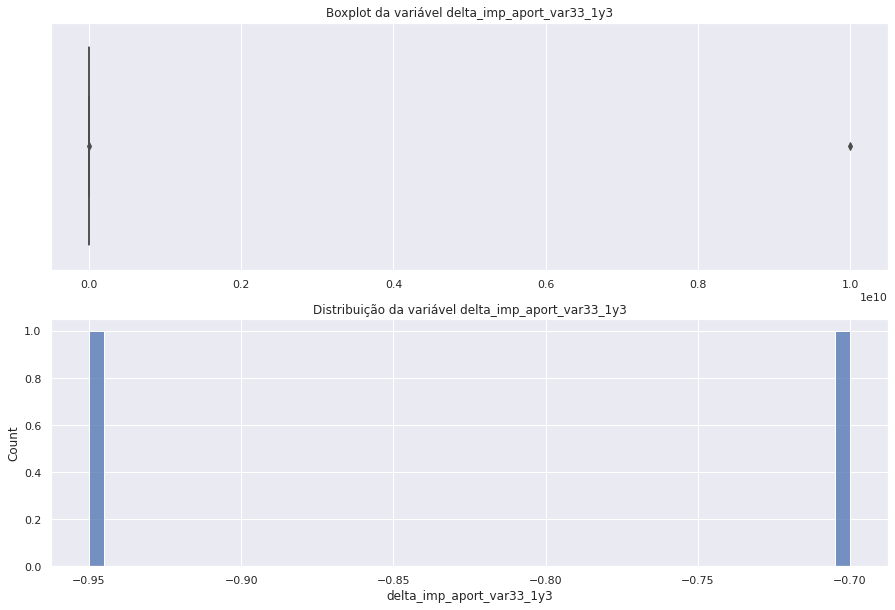

count    1.100000e+01
mean     9.090909e+08
std      3.015113e+09
min     -1.000000e+00
25%     -1.000000e+00
50%     -1.000000e+00
75%     -9.750000e-01
max      1.000000e+10
Name: delta_imp_aport_var33_1y3, dtype: float64

% de zeros: 0.9997932874807381





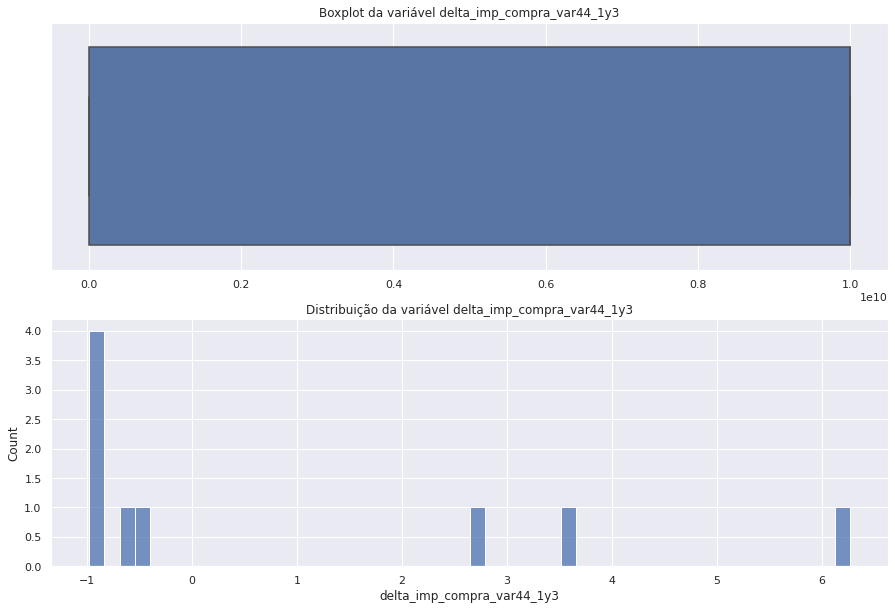

count    7.900000e+01
mean     6.962025e+09
std      4.628349e+09
min     -1.000000e+00
25%     -5.532327e-01
50%      1.000000e+10
75%      1.000000e+10
max      1.000000e+10
Name: delta_imp_compra_var44_1y3, dtype: float64

% de zeros: 0.9985154282707558



delta_imp_reemb_var13_1y3
Não existe variância!
Variável delta_imp_reemb_var13_1y3 não está contida na variável features.
% de zeros: 0.9994738226782426





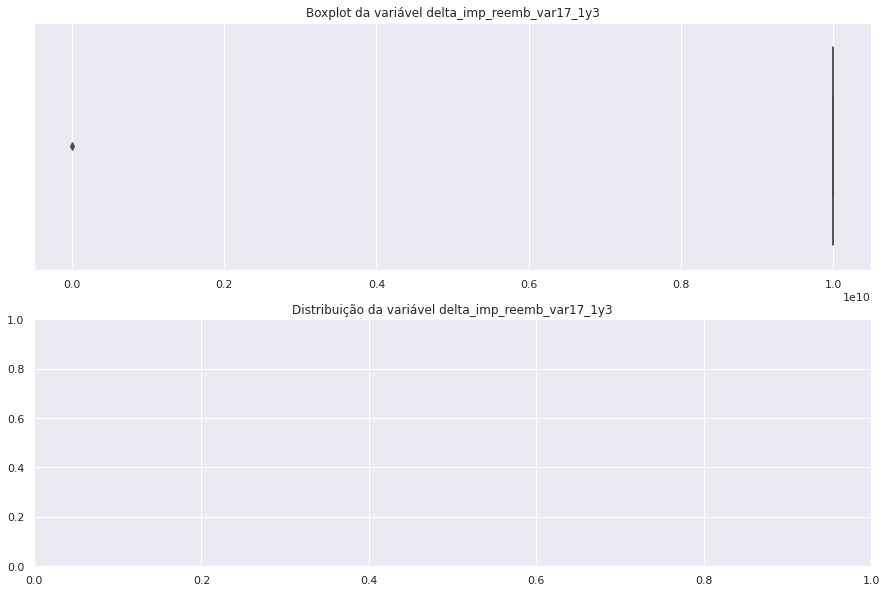

count    1.600000e+01
mean     9.375000e+09
std      2.500000e+09
min     -1.000000e+00
25%      1.000000e+10
50%      1.000000e+10
75%      1.000000e+10
max      1.000000e+10
Name: delta_imp_reemb_var17_1y3, dtype: float64

% de zeros: 0.99969932724471





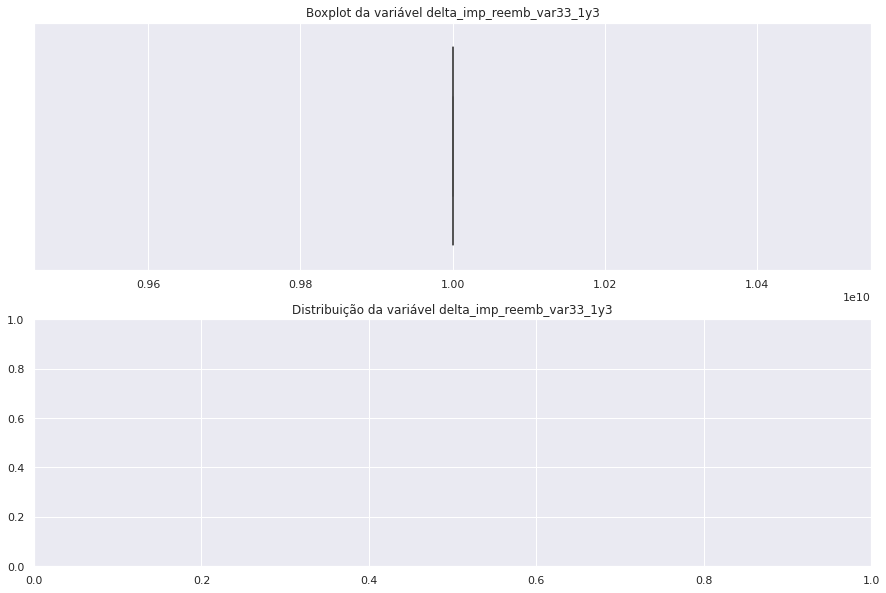

count    1.000000e+00
mean     1.000000e+10
std               NaN
min      1.000000e+10
25%      1.000000e+10
50%      1.000000e+10
75%      1.000000e+10
max      1.000000e+10
Name: delta_imp_reemb_var33_1y3, dtype: float64

% de zeros: 0.9999812079527943





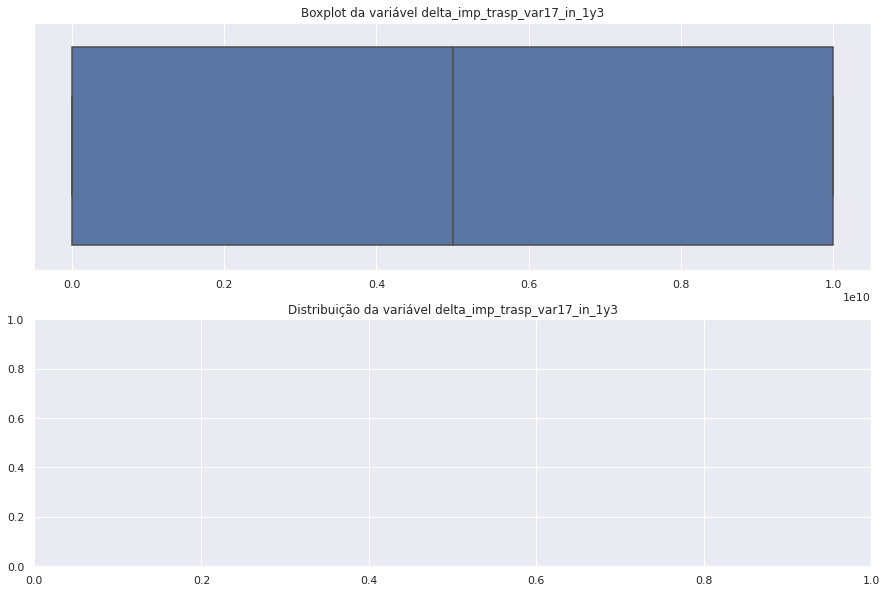

count    4.000000e+00
mean     5.000000e+09
std      5.773503e+09
min     -1.000000e+00
25%     -1.000000e+00
50%      5.000000e+09
75%      1.000000e+10
max      1.000000e+10
Name: delta_imp_trasp_var17_in_1y3, dtype: float64

% de zeros: 0.9999248318111775



delta_imp_trasp_var17_out_1y3
Não existe variância!
Variável delta_imp_trasp_var17_out_1y3 não está contida na variável features.
% de zeros: 0.9999248318111775





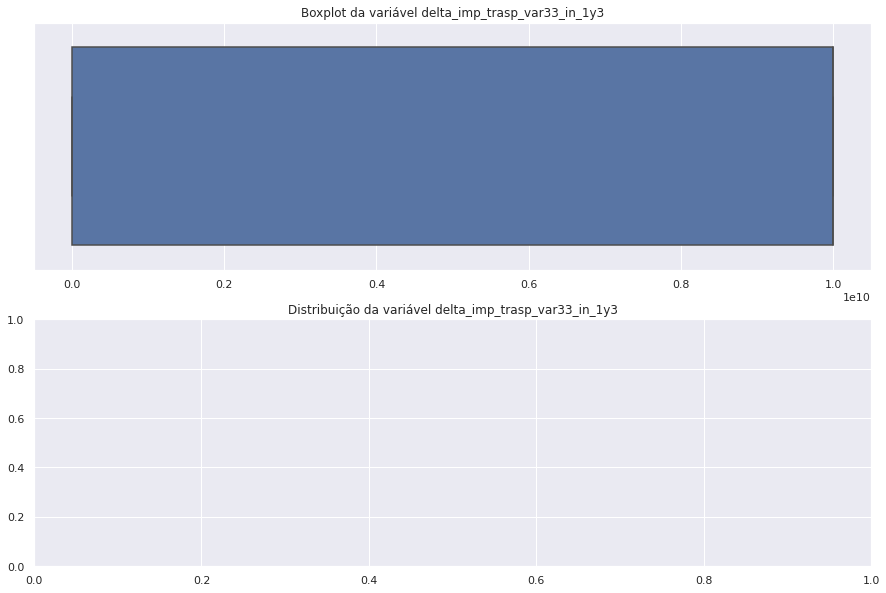

count    5.000000e+00
mean     6.000000e+09
std      5.477226e+09
min     -1.000000e+00
25%     -1.000000e+00
50%      1.000000e+10
75%      1.000000e+10
max      1.000000e+10
Name: delta_imp_trasp_var33_in_1y3, dtype: float64

% de zeros: 0.9999060397639719





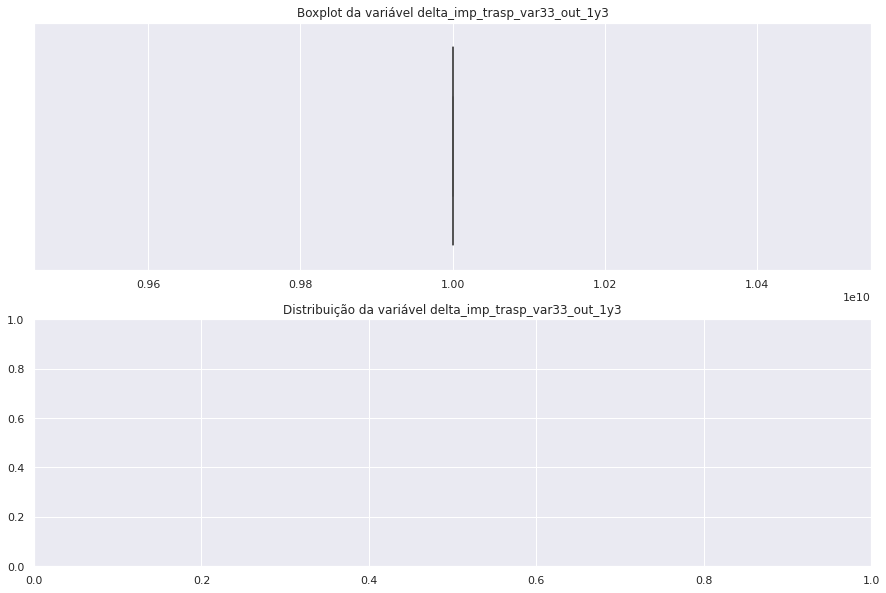

count    1.000000e+00
mean     1.000000e+10
std               NaN
min      1.000000e+10
25%      1.000000e+10
50%      1.000000e+10
75%      1.000000e+10
max      1.000000e+10
Name: delta_imp_trasp_var33_out_1y3, dtype: float64

% de zeros: 0.9999812079527943





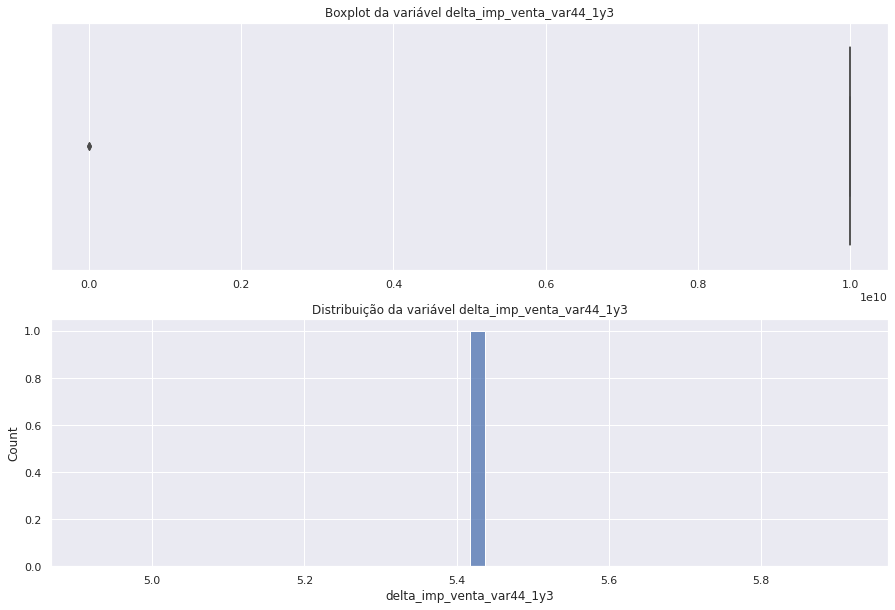

count    3.200000e+01
mean     9.375000e+09
std      2.459347e+09
min     -5.057733e-01
25%      1.000000e+10
50%      1.000000e+10
75%      1.000000e+10
max      1.000000e+10
Name: delta_imp_venta_var44_1y3, dtype: float64

% de zeros: 0.9993986544894201





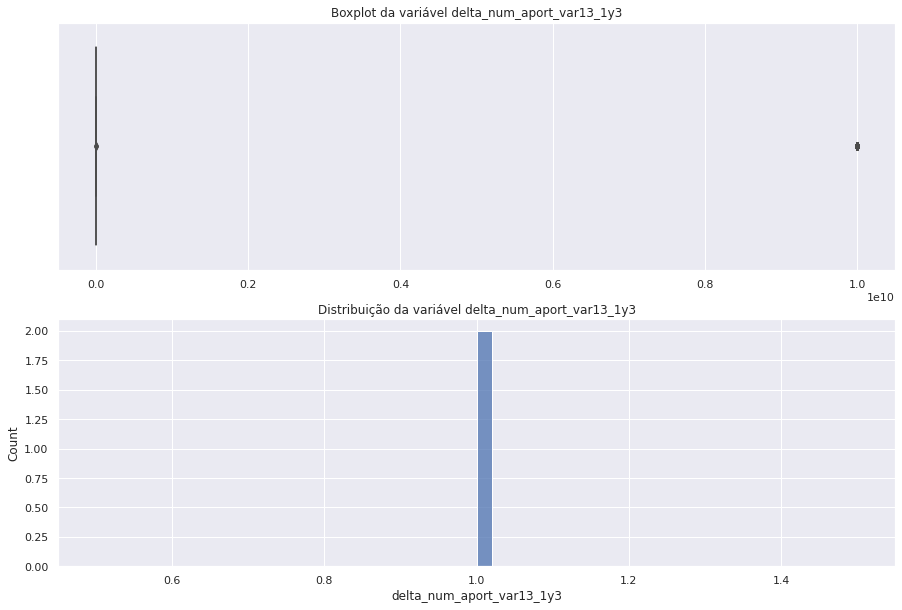

count    1.417000e+03
mean     1.820748e+09
std      3.860424e+09
min     -1.000000e+00
25%     -1.000000e+00
50%     -1.000000e+00
75%     -1.000000e+00
max      1.000000e+10
Name: delta_num_aport_var13_1y3, dtype: float64

% de zeros: 0.9733716691096328





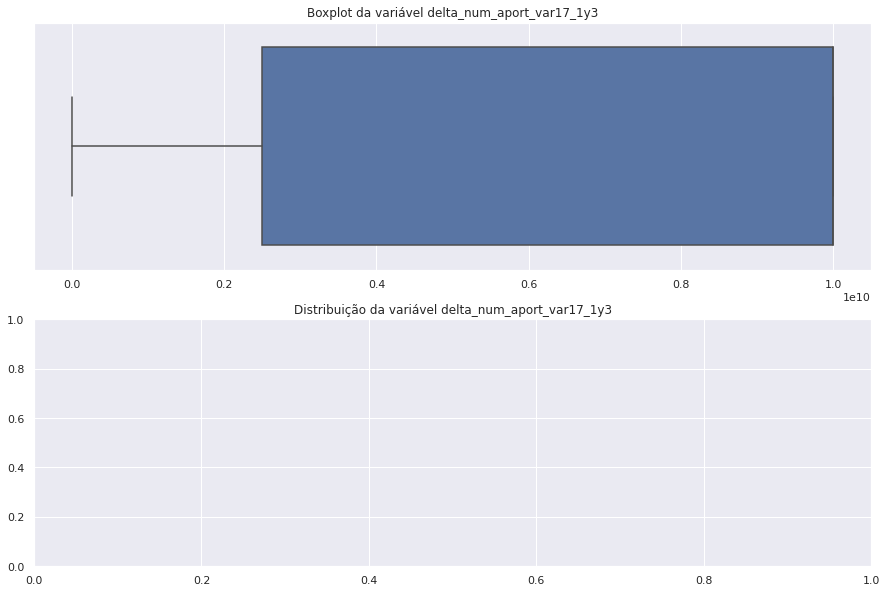

count    3.800000e+01
mean     7.368421e+09
std      4.462583e+09
min     -1.000000e+00
25%      2.500000e+09
50%      1.000000e+10
75%      1.000000e+10
max      1.000000e+10
Name: delta_num_aport_var17_1y3, dtype: float64

% de zeros: 0.9992859022061863





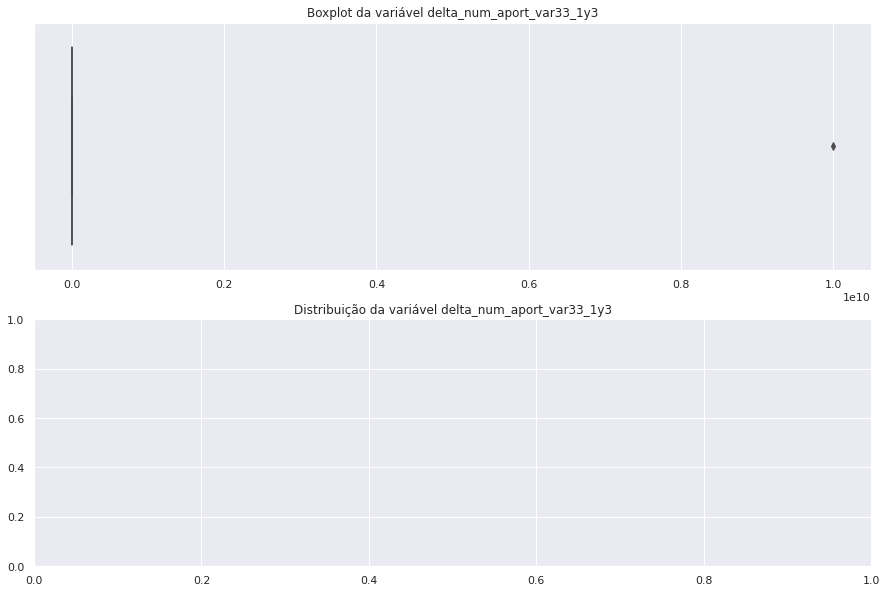

count    9.000000e+00
mean     1.111111e+09
std      3.333333e+09
min     -1.000000e+00
25%     -1.000000e+00
50%     -1.000000e+00
75%     -1.000000e+00
max      1.000000e+10
Name: delta_num_aport_var33_1y3, dtype: float64

% de zeros: 0.9998308715751494





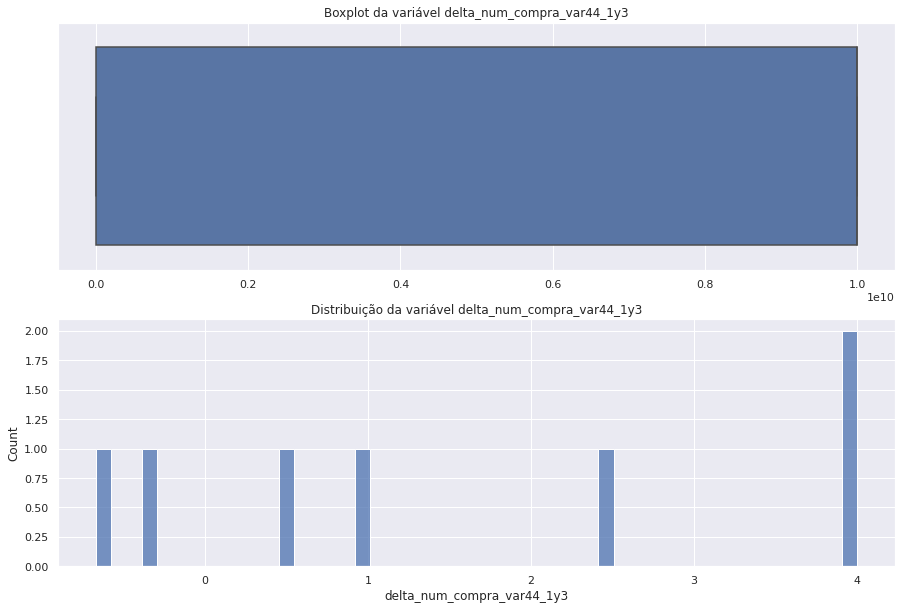

count    7.700000e+01
mean     7.142857e+09
std      4.547163e+09
min     -1.000000e+00
25%      2.500000e+00
50%      1.000000e+10
75%      1.000000e+10
max      1.000000e+10
Name: delta_num_compra_var44_1y3, dtype: float64

% de zeros: 0.998553012365167



delta_num_reemb_var13_1y3
Não existe variância!
Variável delta_num_reemb_var13_1y3 não está contida na variável features.
% de zeros: 0.9994738226782426





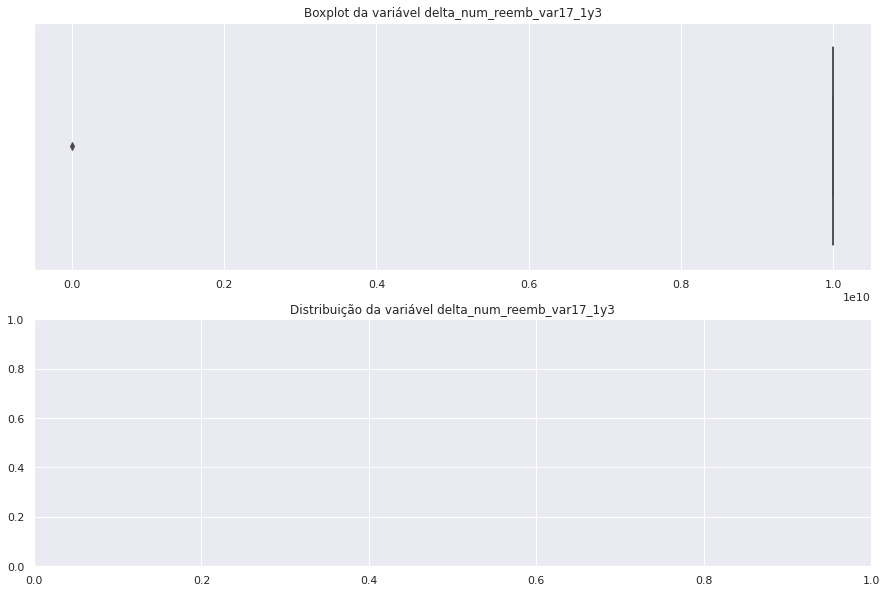

count    1.600000e+01
mean     9.375000e+09
std      2.500000e+09
min     -1.000000e+00
25%      1.000000e+10
50%      1.000000e+10
75%      1.000000e+10
max      1.000000e+10
Name: delta_num_reemb_var17_1y3, dtype: float64

% de zeros: 0.99969932724471





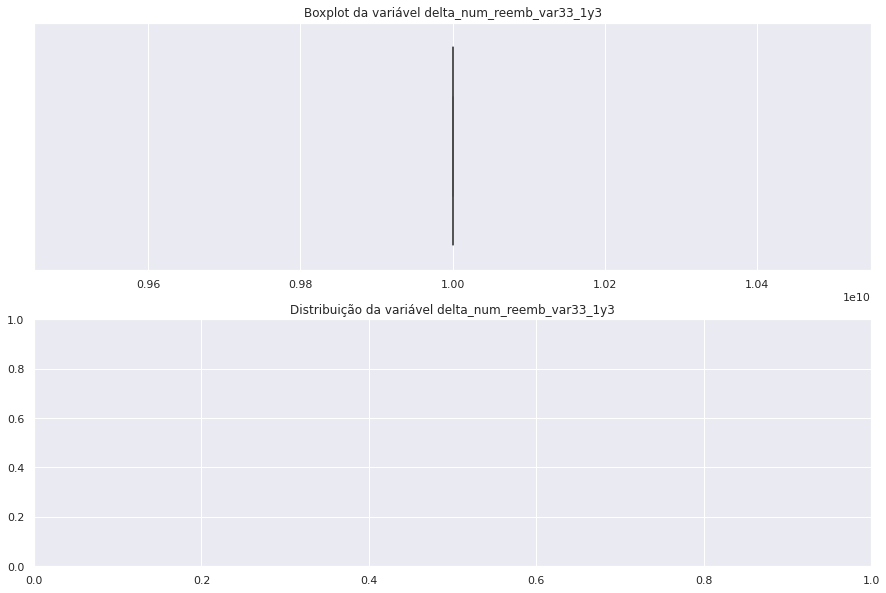

count    1.000000e+00
mean     1.000000e+10
std               NaN
min      1.000000e+10
25%      1.000000e+10
50%      1.000000e+10
75%      1.000000e+10
max      1.000000e+10
Name: delta_num_reemb_var33_1y3, dtype: float64

% de zeros: 0.9999812079527943





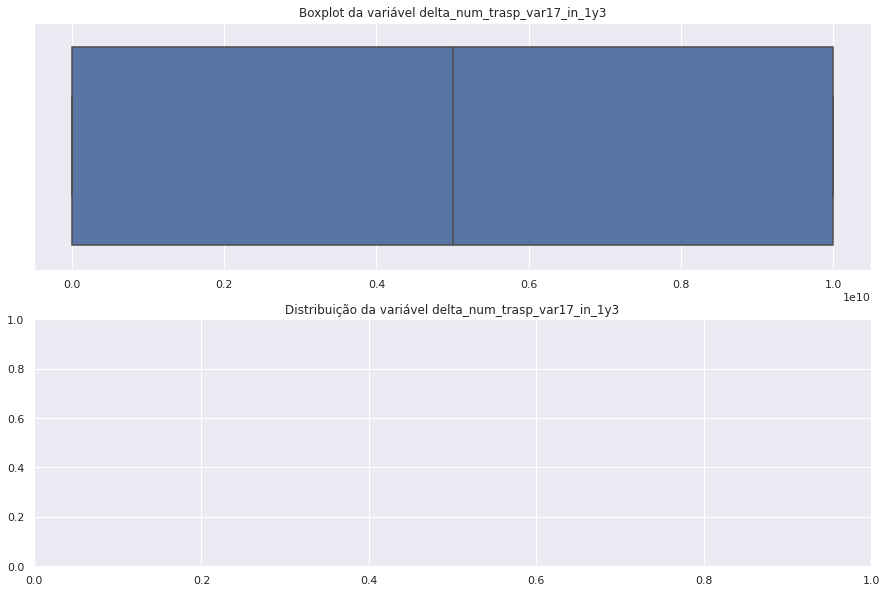

count    4.000000e+00
mean     5.000000e+09
std      5.773503e+09
min     -1.000000e+00
25%     -1.000000e+00
50%      5.000000e+09
75%      1.000000e+10
max      1.000000e+10
Name: delta_num_trasp_var17_in_1y3, dtype: float64

% de zeros: 0.9999248318111775



delta_num_trasp_var17_out_1y3
Não existe variância!
Variável delta_num_trasp_var17_out_1y3 não está contida na variável features.
% de zeros: 0.9999248318111775





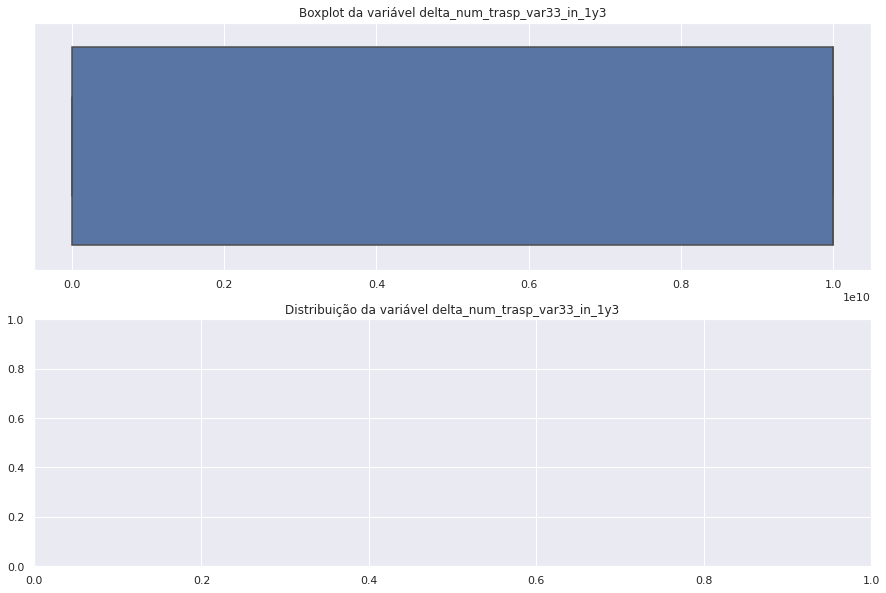

count    5.000000e+00
mean     6.000000e+09
std      5.477226e+09
min     -1.000000e+00
25%     -1.000000e+00
50%      1.000000e+10
75%      1.000000e+10
max      1.000000e+10
Name: delta_num_trasp_var33_in_1y3, dtype: float64

% de zeros: 0.9999060397639719





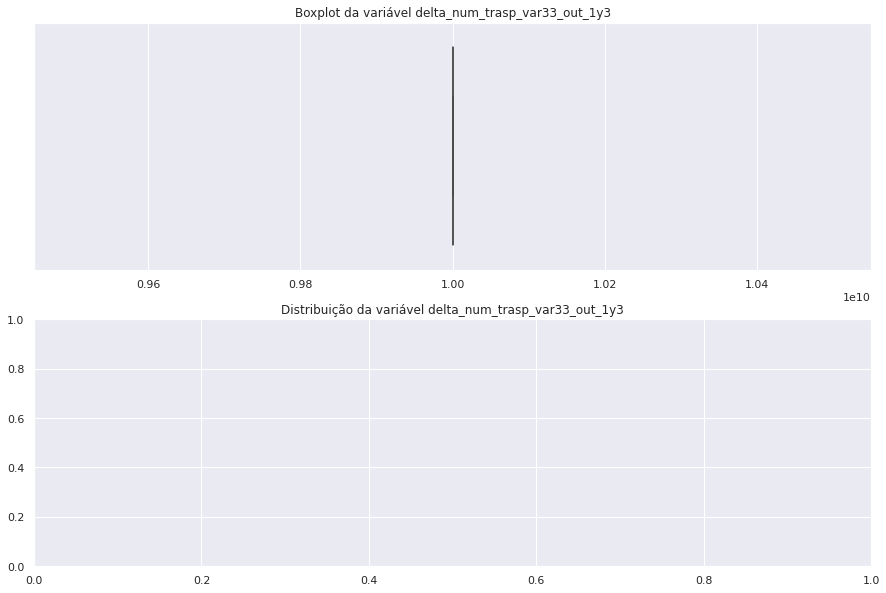

count    1.000000e+00
mean     1.000000e+10
std               NaN
min      1.000000e+10
25%      1.000000e+10
50%      1.000000e+10
75%      1.000000e+10
max      1.000000e+10
Name: delta_num_trasp_var33_out_1y3, dtype: float64

% de zeros: 0.9999812079527943





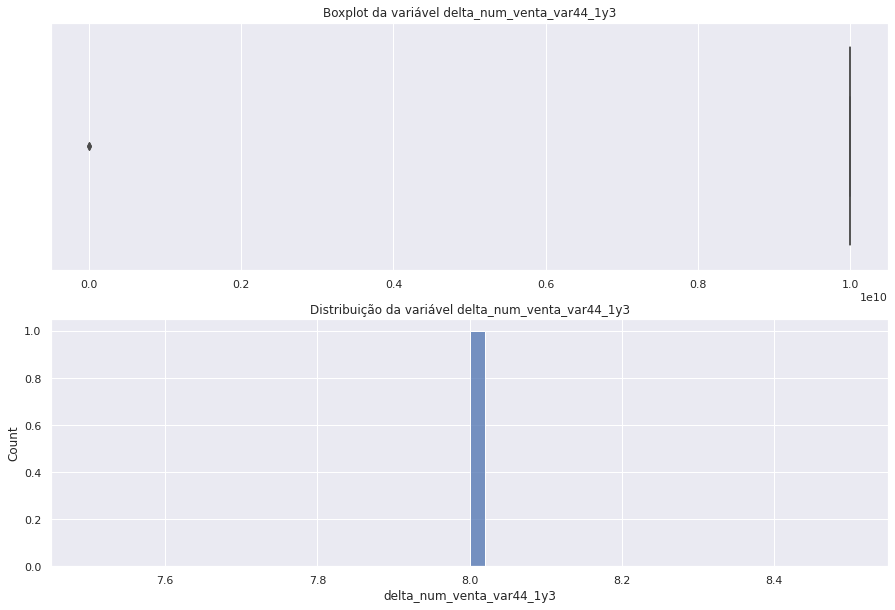

count    3.200000e+01
mean     9.375000e+09
std      2.459347e+09
min     -5.000000e-01
25%      1.000000e+10
50%      1.000000e+10
75%      1.000000e+10
max      1.000000e+10
Name: delta_num_venta_var44_1y3, dtype: float64

% de zeros: 0.9993986544894201


In [39]:
for col in delta_features:
  df_aux = df_train[df_train[col] != 0]
  numerical_summary(col, df_aux)
  print(f'% de zeros: {zeros_by_col[col]}')

Para as variáveis com prefixo `delta` a quatidade de zeros dificulta a visuaçização, mas podemso concluir que não temos muita variância.

#### Prefixo `var`

In [40]:
var_cond = zeros_by_col[var_features] < .5

var_features_low_zeros = zeros_by_col[var_features][var_cond].index
var_features_high_zeros = zeros_by_col[var_features][~var_cond].index

var_features_low_zeros

Index(['var3', 'var15', 'var36', 'var38'], dtype='object')

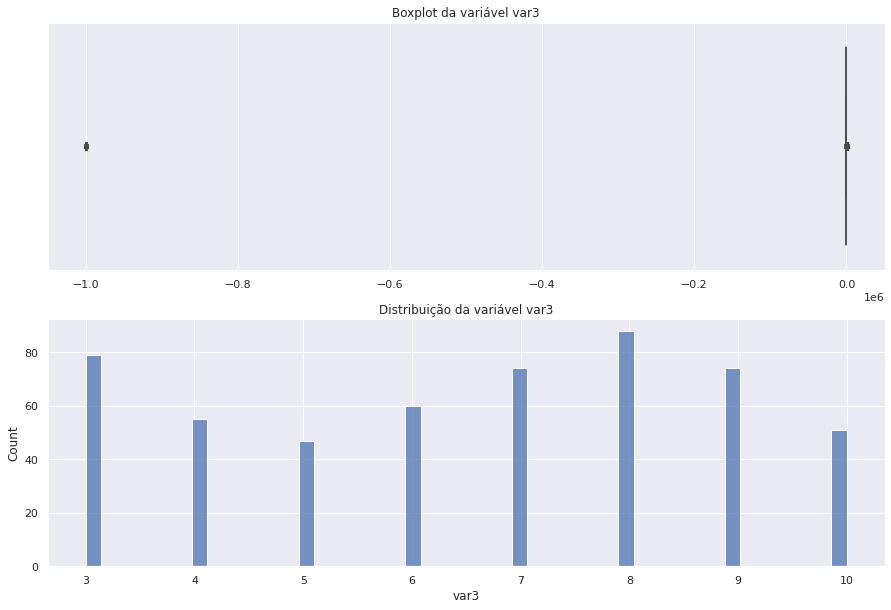

count     53214.000000
mean      -1463.045138
std       38257.860031
min     -999999.000000
25%           2.000000
50%           2.000000
75%           2.000000
max         235.000000
Name: var3, dtype: float64

% de zeros: 0.0009771864546923741





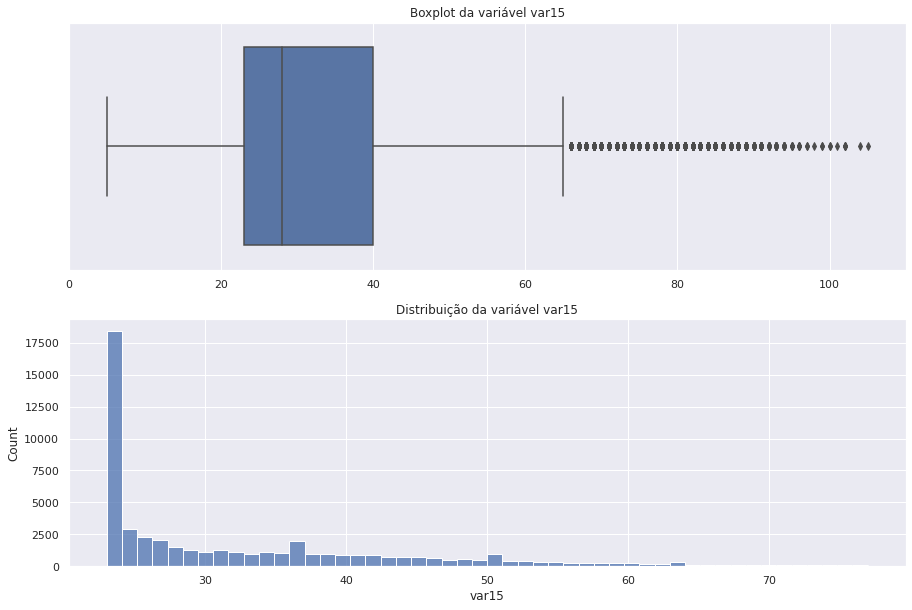

count    53214.000000
mean        33.226651
std         12.983755
min          5.000000
25%         23.000000
50%         28.000000
75%         40.000000
max        105.000000
Name: var15, dtype: float64

% de zeros: 0.0





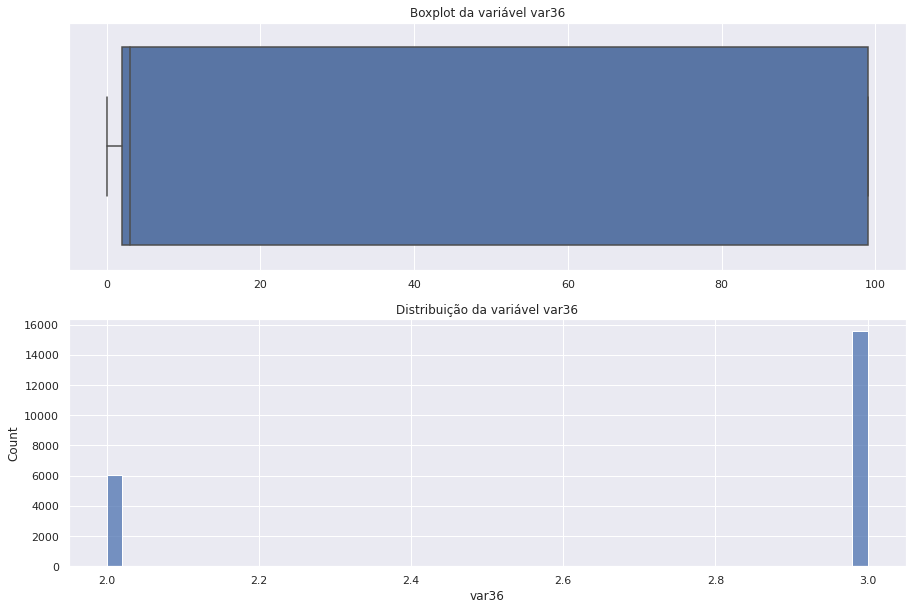

count    53214.000000
mean        40.376405
std         47.347523
min          0.000000
25%          2.000000
50%          3.000000
75%         99.000000
max         99.000000
Name: var36, dtype: float64

% de zeros: 0.005430901642424926





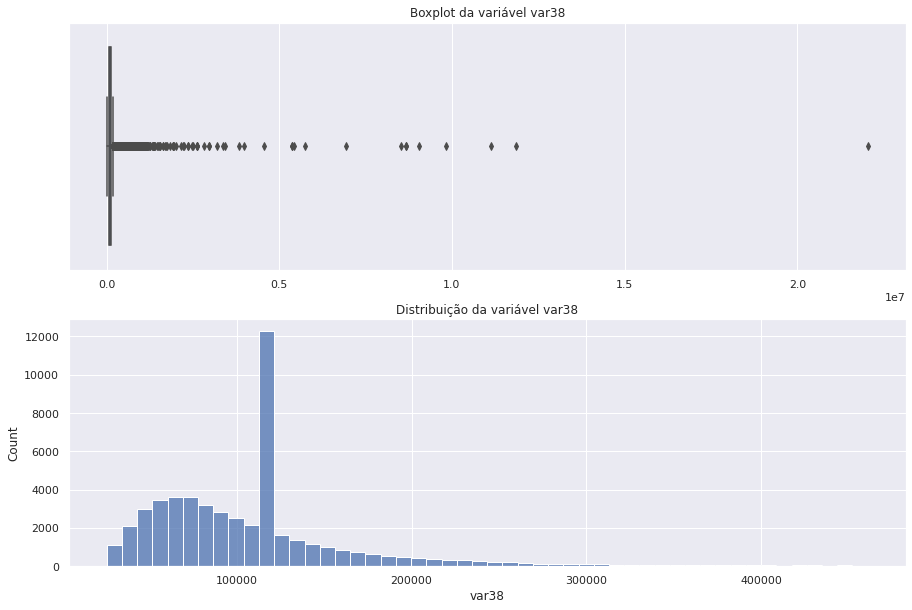

count    5.321400e+04
mean     1.174082e+05
std      1.867800e+05
min      5.163750e+03
25%      6.794788e+04
50%      1.061134e+05
75%      1.185371e+05
max      2.203474e+07
Name: var38, dtype: float64

% de zeros: 0.0


In [41]:
for col in var_features_low_zeros:
  numerical_summary(col, df_train)
  print(f'% de zeros: {zeros_by_col[col]}')

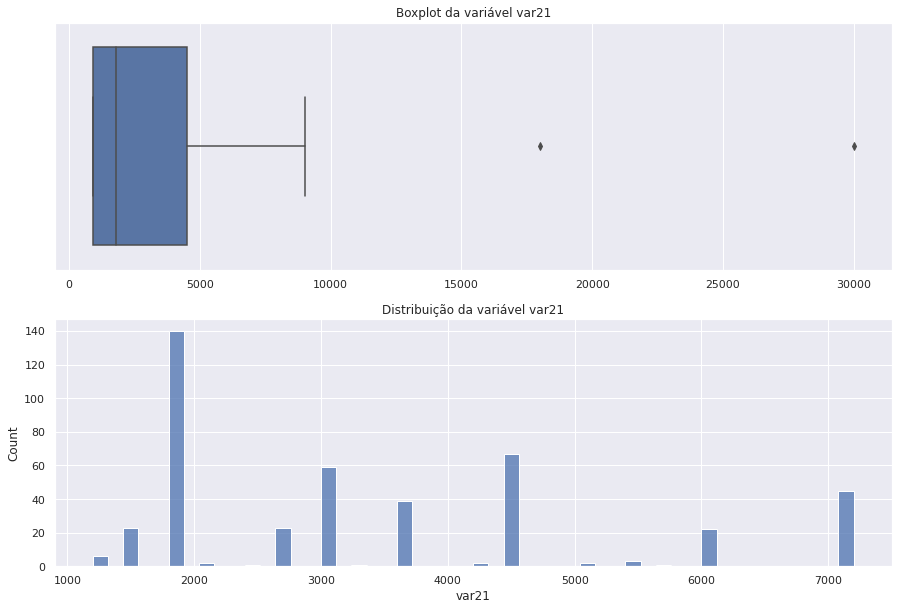

count      608.000000
mean      2926.480263
std       2418.109759
min        900.000000
25%        900.000000
50%       1800.000000
75%       4500.000000
max      30000.000000
Name: var21, dtype: float64

% de zeros: 0.9885744352989815


In [42]:
for col in var_features_high_zeros:
  df_aux = df_train[df_train[col] != 0]
  numerical_summary(col, df_aux)
  print(f'% de zeros: {zeros_by_col[col]}')

As variáveis que possuem o prefixo `var` tem alguns outliers. A variável `var38` tem um ponto que chama atenção em sua distribuição e pode ser necessário alguma análise específica.

### Correlação

Dados que não temos a informação sobre quais variáveis são propriamente categóricas e como algumas variáveis tem uma distribuição que se assemelha a uma distribuição exponencial, vamos utilizar a correlação de `Spearman` que calcula considera uma relação de "ranking" entre as variáveis.

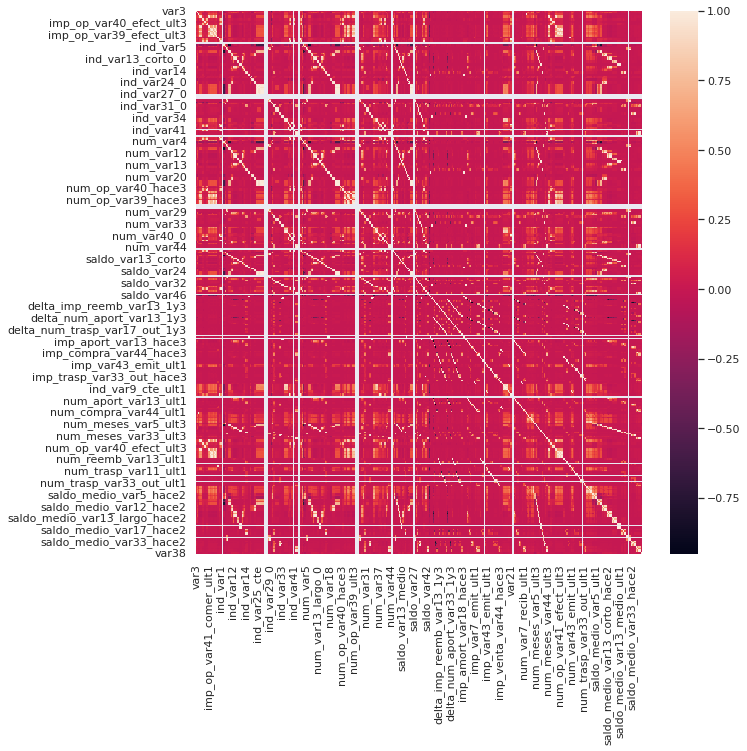

In [43]:
matrix_corr = df_train[features].corr(method='spearman')

plt.figure(figsize=(10,10))
sns.heatmap(matrix_corr, annot=False)

Observando o mapa de calor, temos alguns pontos em branco indicando variáveis com forte correlação positiva.